In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Old

loading the excel file leads to problems because something is wrong with the logits column in the excel file

In [ ]:
#file_path = "C:/Users/Manuel/OneDrive/Arbeit/HTWG/Master/results/TabPFN/results_ws10m_ws100m_pt_96_2.xlsx"
file_path_t = "C:/Users/Minu/OneDrive/Arbeit/HTWG/Master/results/TabPFN/tests/4_results_ws10m_ws100m_pt_96.xlsx"

# Define sheets to read
sheets_to_read_t = ["first_q"]

# Read the entire sheet (all columns)
sheets_dict_t = pd.read_excel(file_path_t, sheet_name=sheets_to_read_t, usecols="A:GJQ")

# Extract the DataFrame from the dictionary
df = sheets_dict_t["first_q"]  # Extracts the "first_q" sheet

# Identify logit columns (J to GJQ)
logit_columns = df.columns[9:]  # J is the 10th column (index 9)

original_columns = df.columns[:9]

#list comprehension that loops through each row (i), selecting only the logit columns and converts that row into a NumPy array.
# the resulting logits_array is a 2D NumPy array, where each row contains the logits for that specific row in the DataFrame
logits_array = np.array([df[logit_columns].iloc[i].values for i in range(len(df))])

df['Logits'] = logits_array.tolist()  # Convert numpy array to list for each row

# Step 6: Keep only the original columns plus the 'Logits' column
final_df = df[original_columns.tolist() + ['Logits']]

logits_tensor = torch.tensor(final_df['Logits'].tolist())
logits_tensor.shape

In [110]:
import numpy as np
import torch

#file_path = "C:/Users/Manuel/OneDrive/Arbeit/HTWG/Master/results/TabPFN/results_ws10m_ws100m_pt_96_2.xlsx"
file_path = "C:/Users/Minu/OneDrive/Arbeit/HTWG/Master/results/TabPFN/results_ws10m_ws100m_pt_96_2.xlsx"

sheets_to_read_t = ["first_q"]

# Read the entire sheet (all columns)
sheets_dict_t = pd.read_excel(file_path, sheet_name=sheets_to_read_t, usecols="A:J")

# Extract the DataFrame from the dictionary
df = sheets_dict_t["first_q"]  # Extracts the "first_q" sheet

print(df['logits'].tail())


# Identify the original columns and the logits columns
original_columns = df.columns[:9]
logit_columns = df.columns[9]

print("original columns", original_columns)
print("logit column", logit_columns)   # Columns after the 9th one (assumed to be the logits columns)

# Assuming the logits are stored as a list-like string in the 'logits' column
# If stored as a string (e.g., '[logit1, logit2, ..., logit5000]')
logits_array = np.array([eval(df['logits'].iloc[i]) for i in range(len(df))])

# Add the logits array as a new column
df['Logits'] = logits_array.tolist()  # Convert numpy array to list for each row

# Keep only the original columns plus the 'Logits' column
final_df = df[original_columns.tolist() + ['Logits']]

# Convert the 'Logits' column into a PyTorch tensor
logits_tensor = torch.tensor(final_df['Logits'].tolist())

# Check the shape of the logits tensor
logits_tensor.shape

8635    [-18.910179138183594, -18.504642486572266, -20...
8636    [-18.25213050842285, -18.349872589111328, -19....
8637    [-19.125953674316406, -18.67037010192871, -20....
8638    [-18.799896240234375, -19.15084457397461, -20....
8639    [-18.14811897277832, -18.900493621826172, -20....
Name: logits, dtype: object
original columns Index(['CRPS Linear', 'CRPS Hybrid', 'CRPS Normal', 'CRPS (5000 quantiles)',
       'NLL Linear', 'NLL Hybrid', 'NLL Normal', 'NLL (5000 quantiles)',
       'y values'],
      dtype='object')
logit column logits


SyntaxError: '[' was never closed (<string>, line 1)

sheets_to_read = ["first_q"]#, "second_q", "third_q", "fourth_q"]

columns_to_keep = ["CRPS Linear", "CRPS Hybrid", "CRPS Normal", "CRPS (5000 quantiles)", 
                   "NLL Linear", "NLL Hybrid", "NLL Normal", "NLL (5000 quantiles)", "y values", "logits"]

sheets_dict = pd.read_excel(file_path, sheet_name=sheets_to_read, usecols="A:J")

df = sheets_dict["first_q"]  # Extracts the "first_q" sheet

original_columns = df.columns[:9]
logit_columns = df.columns[9:]  # Columns after the 9th one (assumed to be the logits columns)


# Process the 'logits' column and convert to a list of floats
for sheet_name, df in sheets_dict.items():
    logits_array = np.array([eval(df['logits'].iloc[i]) for i in range(len(df))])


df['Logits'] = logits_array.tolist()  # Convert numpy array to list for each row


final_df = df[original_columns.tolist() + ['Logits']]

logits_tensor = torch.tensor(final_df['Logits'].tolist())

In [3]:
import numpy as np
logits = np.array(results["logits"].values)
print(logits.dtype)

object


In [26]:
type(results["logits"])

pandas.core.series.Series

# Analysis of the relationship of CRPS, NLL

In [2]:


results.describe()

bin_edges = [-10, -6, -5, -4, -3, -2, -1.5, -1, -0.5, 0]  # You can adjust the bins if necessary
bin_labels = [
    "< -6", "(-6, -5)", "(-5, -4)", "(-4, -3)", 
    "(-3, -2)", "(-2, -1.5)", "(-1.5, -1)", "(-1, -0.5)", ">= -0.5"
]

results["y_bin"] = pd.cut(results["y values"], bins=bin_edges, labels=bin_labels, include_lowest=True)

results

NameError: name 'results' is not defined

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


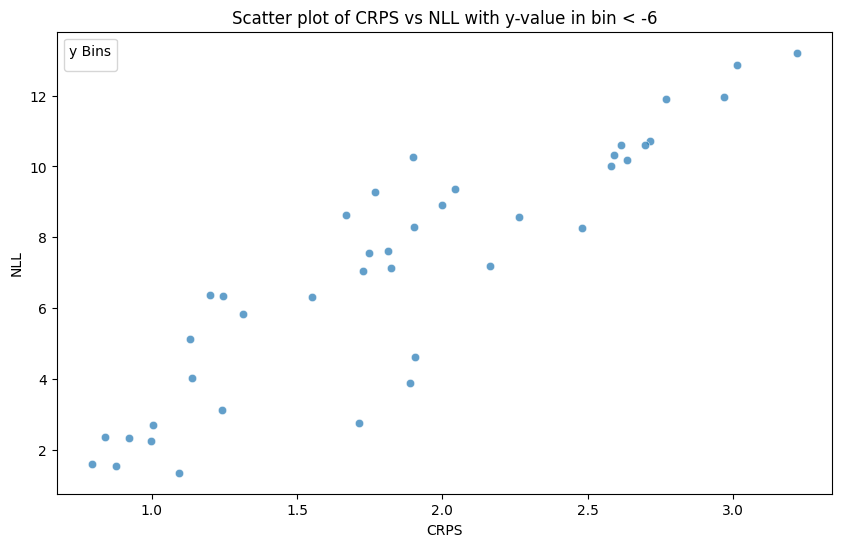

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


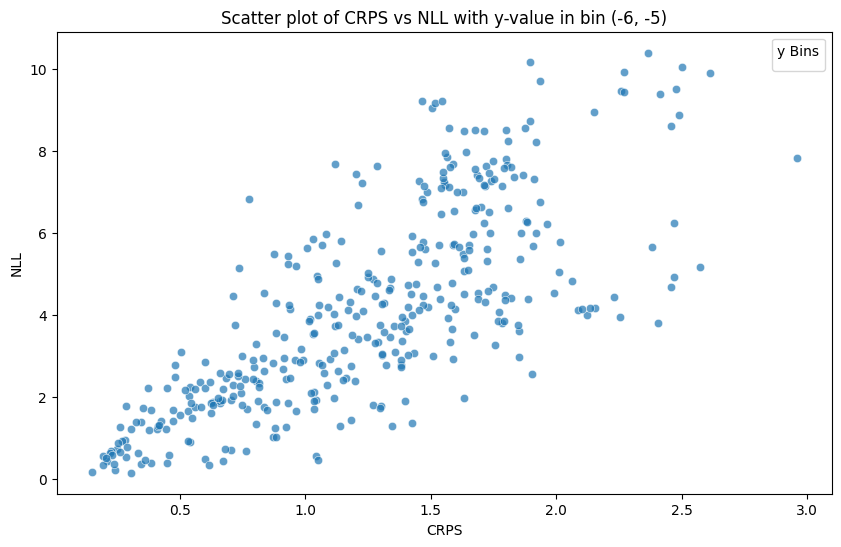

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


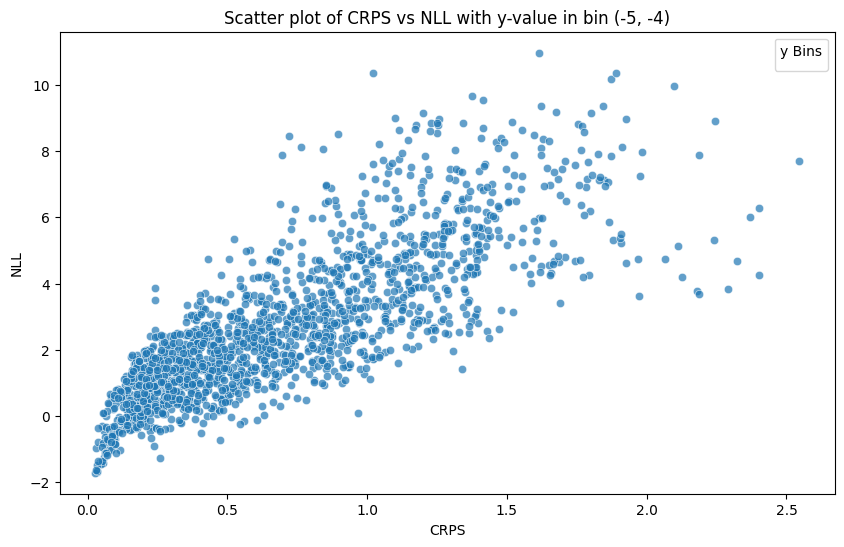

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


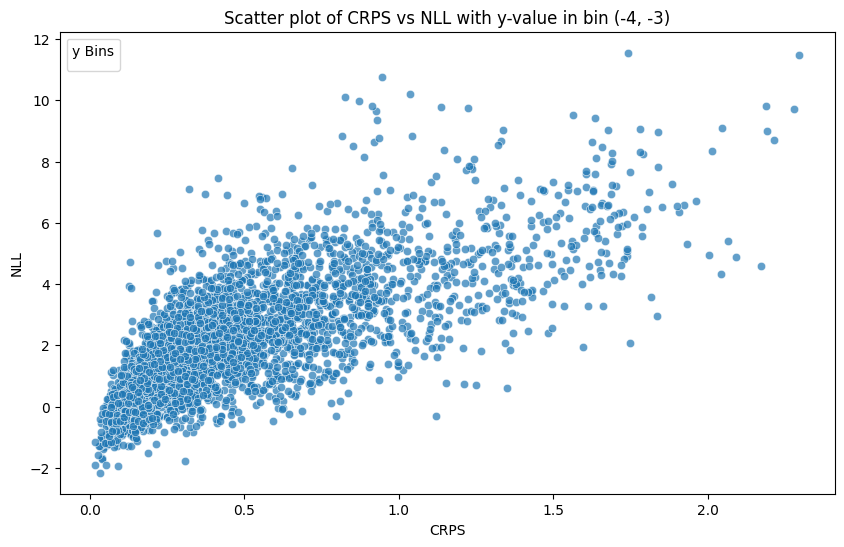

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


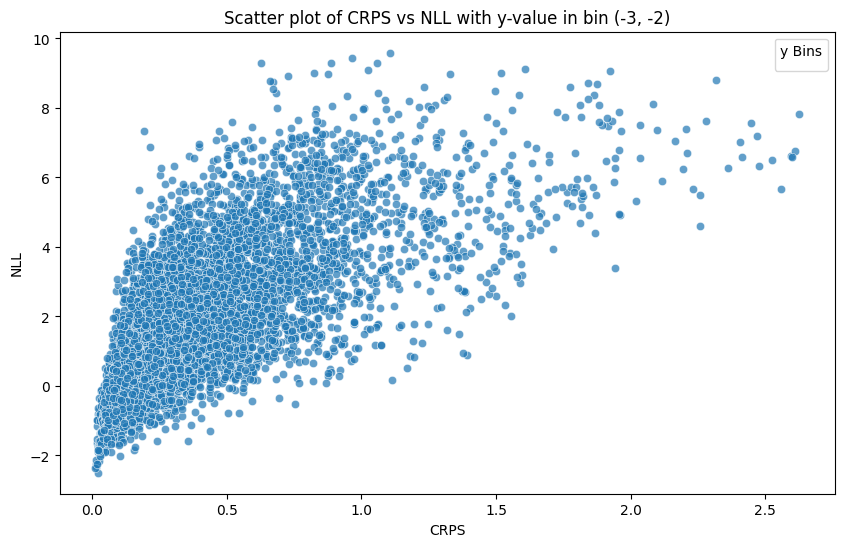

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


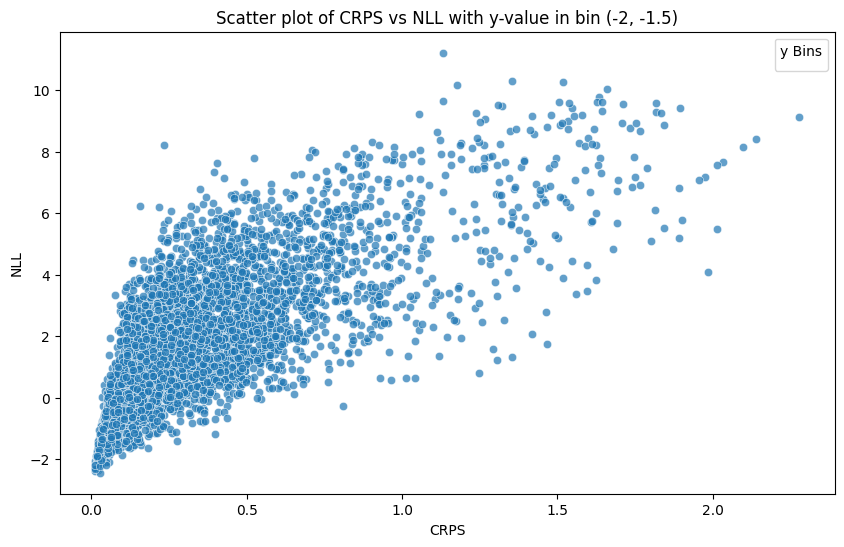

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


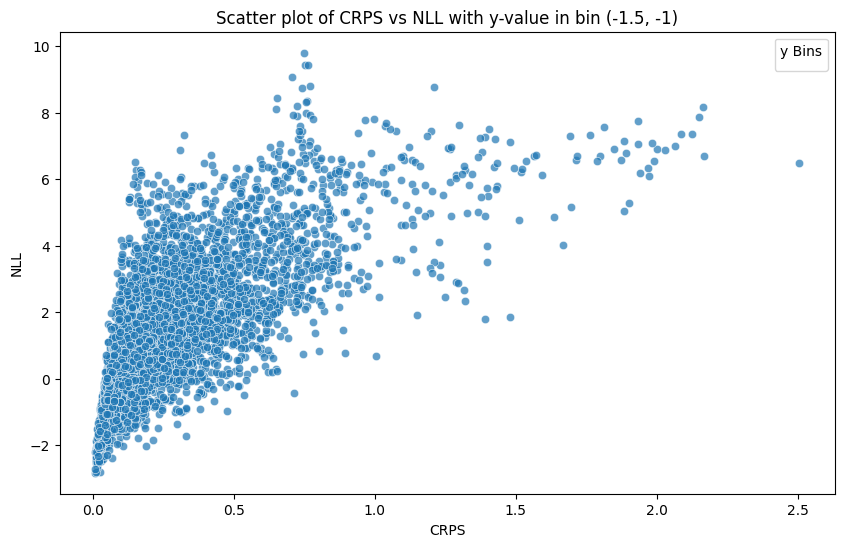

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


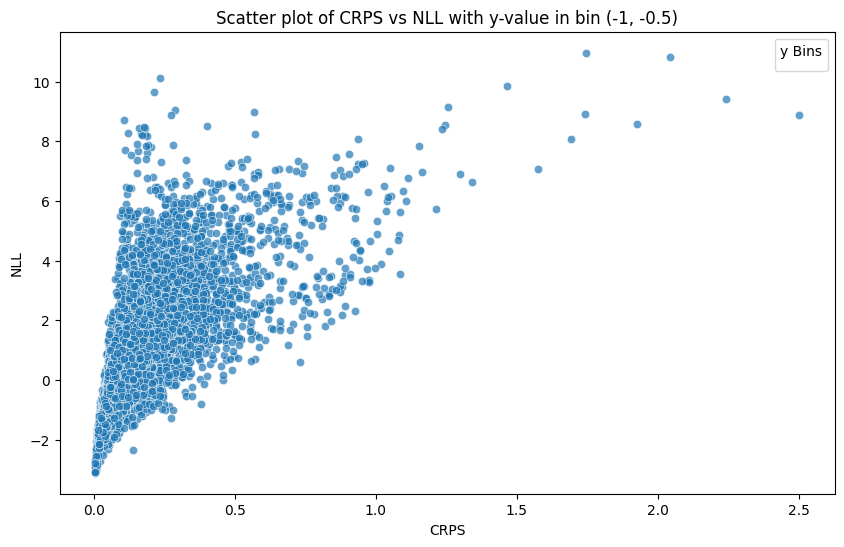

C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Minu\AppData\Local\Temp\ipykernel_17484\4262289480.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


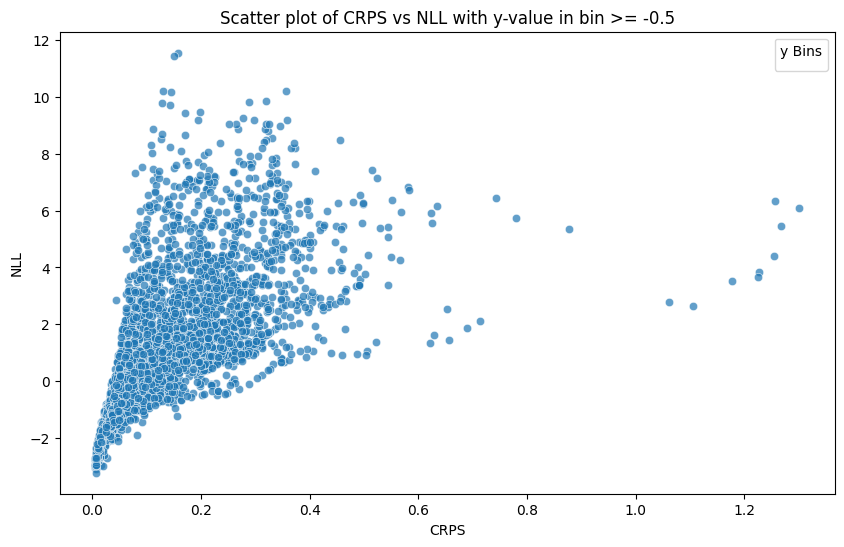

In [5]:
for i in range(0, len(bin_labels)):

    bin = bin_labels[i]
    results_bin = results[results["y_bin"] == bin]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)

    # Labels and title
    plt.xlabel("CRPS")
    plt.ylabel("NLL")
    plt.title(f"Scatter plot of CRPS vs NLL with y-value in bin {bin}")
    plt.legend(title="y Bins")

    # Show plot
    plt.show()

Text(0.5, 1.0, 'CRPS vs NLL')

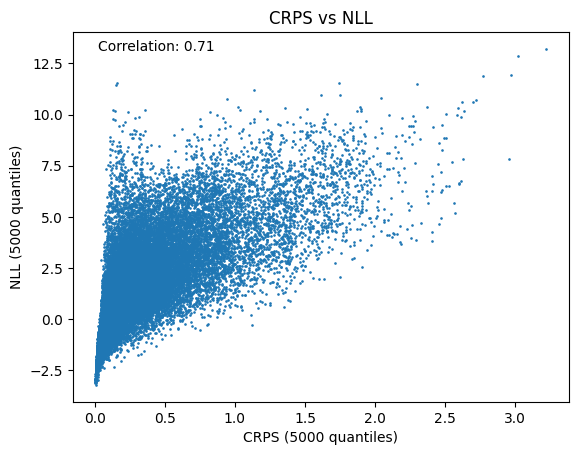

In [7]:
import numpy as np

plt.scatter(results["CRPS (5000 quantiles)"], results["NLL (5000 quantiles)"], s=0.8)

plt.xlabel("CRPS (5000 quantiles)")
plt.ylabel("NLL (5000 quantiles)")

correlation = np.corrcoef(results["CRPS (5000 quantiles)"], results["NLL (5000 quantiles)"])[0, 1]

plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=10)

# Optionally, add a title
plt.title("CRPS vs NLL")

Text(0.5, 1.0, 'y values vs CRPS')

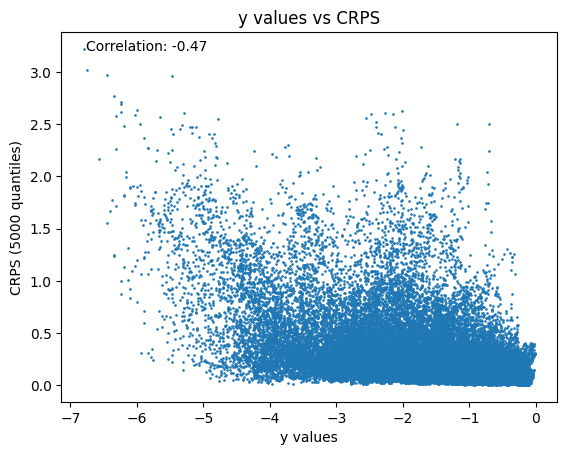

In [8]:
plt.scatter(results["y values"], results["CRPS (5000 quantiles)"], s=0.8)

corr = np.corrcoef(results["y values"], results["CRPS (5000 quantiles)"])[0,1]

plt.xlabel("y values")
plt.ylabel("CRPS (5000 quantiles)")

plt.text(0.05, 0.95, f"Correlation: {corr:.2f}", transform=plt.gca().transAxes, fontsize=10)


# Optionally, add a title
plt.title("y values vs CRPS")

Text(0.5, 1.0, 'y values vs NLL')

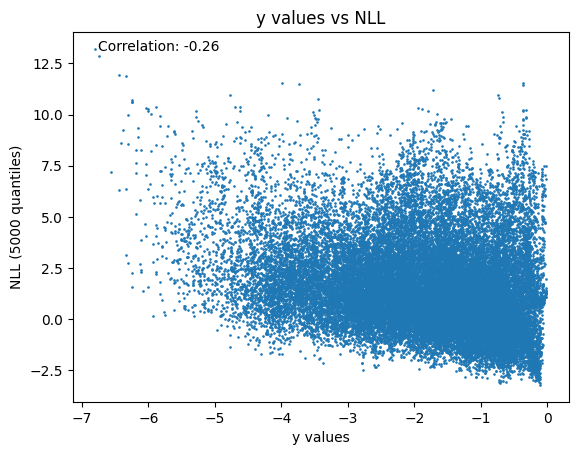

In [9]:
plt.scatter(results["y values"], results["NLL (5000 quantiles)"], s=0.8)

corr_ = np.corrcoef(results["y values"], results["NLL (5000 quantiles)"])[0,1]

plt.xlabel("y values")
plt.ylabel("NLL (5000 quantiles)")

plt.text(0.05, 0.95, f"Correlation: {corr_:.2f}", transform=plt.gca().transAxes, fontsize=10)

# Optionally, add a title
plt.title("y values vs NLL")

In [10]:
results["y values"].describe()

count    35040.000000
mean        -1.863000
std          1.174718
min         -6.796530
25%         -2.596561
50%         -1.648118
75%         -0.940704
max         -0.018224
Name: y values, dtype: float64

den plot vom meeting am 21.03 wo der PDF gezeigt wird für eine Zeile im Validierungsdatensatz zeigen für die Fälle wo der NLL groß ist aber der CRPS klein und andersherum.

In [11]:
borders = np.load("tensor.npy")
borders

array([-95.08284 , -28.01206 , -24.50613 , ...,  21.901922,  25.367764,
        85.258804], dtype=float32)

problematic cases where the NLL is high

In [12]:
import numpy as np
np.log(1e-4)

problematic_cases = results[(results["y values"] < -1.55) & (results["y values"] > -1.58) & (results["NLL (5000 quantiles)"] > 6)]
problematic_cases

,CRPS Linear,CRPS Hybrid,CRPS Normal,CRPS (5000 quantiles),NLL Linear,NLL Hybrid,NLL Normal,NLL (5000 quantiles),y values,logits,y_bin
460,0.577696,0.566201,0.580141,0.579964,4.254999,2.989063,15.545518,6.961960,-1.568240,"[-17.804929733276367, -18.633943557739258, -19...","(-2, -1.5)"
7666,1.443270,1.616771,1.596865,1.634027,4.396274,6.900997,17.388374,9.763720,-1.554226,"[-18.953983306884766, -15.717262268066406, -17...","(-2, -1.5)"
16221,0.863520,0.854462,0.874973,0.885684,4.273309,2.560494,5.154352,6.322978,-1.564858,"[-19.898113250732422, -20.565752029418945, -22...","(-2, -1.5)"
16222,0.857365,0.888165,0.900052,0.897113,4.293165,4.001174,10.713370,6.224456,-1.565984,"[-19.050254821777344, -19.528356552124023, -20...","(-2, -1.5)"
16223,0.811071,0.862399,0.864226,0.865075,4.299358,5.517999,22.053925,6.194545,-1.568522,"[-18.150318145751953, -18.707155227661133, -20...","(-2, -1.5)"
21695,0.766815,0.789740,0.739910,0.783393,4.272970,5.273041,2.001392,6.039246,-1.561208,"[-20.806800842285156, -20.67490005493164, -22....","(-2, -1.5)"
27309,1.401440,1.551668,1.581748,1.570448,4.389256,5.988329,112.227402,8.287565,-1.561769,"[-20.55599021911621, -20.765430450439453, -22....","(-2, -1.5)"
28801,1.633134,1.788548,1.766854,1.817319,4.389185,6.256498,7.094728,9.570024,-1.575889,"[-19.41883659362793, -19.639083862304688, -20....","(-2, -1.5)"
28802,1.730648,1.884073,1.883281,1.894271,4.391750,6.028814,8.977326,9.411079,-1.565140,"[-20.05913734436035, -20.222633361816406, -20....","(-2, -1.5)"
28803,1.660303,1.819093,1.804183,1.844979,4.392887,6.149602,7.785744,8.856266,-1.558130,"[-20.25731086730957, -19.96438217163086, -20.9...","(-2, -1.5)"


In [21]:
problematic_cases["logits"].values

array(['[-17.804929733276367, -18.633943557739258, -19.60558319091797, -20.070205688476562, -20.152843475341797, -20.453880310058594, -20.786075592041016, -20.653703689575195, -20.846359252929688, -20.982099533081055, -20.873798370361328, -20.916990280151367, -21.04585075378418, -20.965543746948242, -20.8706111907959, -21.111330032348633, -21.123746871948242, -21.030181884765625, -21.286483764648438, -21.008691787719727, -21.430965423583984, -21.21195411682129, -21.270322799682617, -21.314706802368164, -21.030818939208984, -21.216781616210938, -21.17868995666504, -21.201766967773438, -21.05388069152832, -21.22599983215332, -21.1942195892334, -21.390958786010742, -21.385417938232422, -20.975025177001953, -21.254606246948242, -21.29088592529297, -21.155588150024414, -21.87877655029297, -20.658161163330078, -21.676406860351562, -20.81771469116211, -21.038631439208984, -20.873552322387695, -21.65060806274414, -20.933513641357422, -21.381315231323242, -20.598979949951172, -20.95795059204101

In [15]:
import ast


inner_array_string = ast.literal_eval(problematic_cases["logits"].to_numpy())[0]  # The first element is the actual list
final_array = ast.literal_eval(inner_array_string)  # Now convert the inner string to a float array


ValueError: malformed node or string: array(['[-17.804929733276367, -18.633943557739258, -19.60558319091797, -20.070205688476562, -20.152843475341797, -20.453880310058594, -20.786075592041016, -20.653703689575195, -20.846359252929688, -20.982099533081055, -20.873798370361328, -20.916990280151367, -21.04585075378418, -20.965543746948242, -20.8706111907959, -21.111330032348633, -21.123746871948242, -21.030181884765625, -21.286483764648438, -21.008691787719727, -21.430965423583984, -21.21195411682129, -21.270322799682617, -21.314706802368164, -21.030818939208984, -21.216781616210938, -21.17868995666504, -21.201766967773438, -21.05388069152832, -21.22599983215332, -21.1942195892334, -21.390958786010742, -21.385417938232422, -20.975025177001953, -21.254606246948242, -21.29088592529297, -21.155588150024414, -21.87877655029297, -20.658161163330078, -21.676406860351562, -20.81771469116211, -21.038631439208984, -20.873552322387695, -21.65060806274414, -20.933513641357422, -21.381315231323242, -20.598979949951172, -20.957950592041016, -21.502464294433594, -20.73406219482422, -21.521137237548828, -20.562097549438477, -21.367294311523438, -20.663131713867188, -21.409751892089844, -20.426103591918945, -20.330196380615234, -21.098806381225586, -20.634815216064453, -21.054025650024414, -20.80320930480957, -21.1016845703125, -21.41360855102539, -20.49954605102539, -21.06254768371582, -20.962656021118164, -20.157041549682617, -20.763029098510742, -20.995513916015625, -20.751619338989258, -20.761625289916992, -20.752077102661133, -20.880783081054688, -20.525848388671875, -20.09792137145996, -20.821491241455078, -20.783742904663086, -20.656049728393555, -20.90810203552246, -20.58873748779297, -20.771005630493164, -20.380929946899414, -20.594106674194336, -24.185331344604492, -20.51104164123535, -20.860776901245117, -20.760150909423828, -20.530359268188477, -20.311954498291016, -20.54973030090332, -20.520864486694336, -20.26484489440918, -20.82255744934082, -20.309356689453125, -20.554521560668945, -20.257823944091797, -20.406017303466797, -20.287635803222656, -20.17206382751465, -20.041793823242188, -24.133167266845703, -20.173887252807617, -20.126998901367188, -19.882957458496094, -19.97439193725586, -20.186559677124023, -24.168298721313477, -20.161521911621094, -20.19933319091797, -20.15937042236328, -20.065479278564453, -19.972248077392578, -20.04805564880371, -23.964088439941406, -19.950942993164062, -20.053524017333984, -20.059654235839844, -19.708581924438477, -19.76325798034668, -24.034608840942383, -19.814102172851562, -19.734458923339844, -19.799015045166016, -19.93267822265625, -24.28484535217285, -19.793212890625, -19.78612518310547, -19.993581771850586, -24.359243392944336, -19.64439582824707, -19.48363494873047, -24.21657371520996, -19.77363395690918, -19.494407653808594, -24.239450454711914, -19.682310104370117, -19.811185836791992, -24.223405838012695, -19.824132919311523, -19.59518814086914, -24.29621696472168, -19.558151245117188, -19.702362060546875, -19.74155044555664, -24.125469207763672, -19.701637268066406, -19.63688850402832, -24.11916732788086, -19.853317260742188, -19.589975357055664, -24.364776611328125, -19.599300384521484, -19.635265350341797, -24.42258644104004, -19.435630798339844, -24.402353286743164, -19.450918197631836, -19.701494216918945, -24.262304306030273, -19.299535751342773, -19.417850494384766, -24.161500930786133, -19.46058464050293, -24.242704391479492, -19.511411666870117, -19.478946685791016, -24.28805160522461, -19.4506893157959, -23.780765533447266, -19.3252010345459, -19.285722732543945, -24.462854385375977, -19.552536010742188, -24.476760864257812, -19.604658126831055, -24.415307998657227, -19.1596622467041, -24.199556350708008, -19.21474838256836, -24.328603744506836, -19.21391487121582, -24.470333099365234, -19.32925796508789, -24.12119483947754, -19.52552032470703, -24.4176082611084, -19.32135581970215, -24.683040618896484, -19.355064392089844, -24.38612937927246, -19.298736572265625, -24.61927032470703, -19.090112686157227, -24.40082359313965, -19.073043823242188, -24.314382553100586, -24.462116241455078, -19.17287826538086, -24.44878387451172, -19.208961486816406, -24.75506591796875, -19.297395706176758, -19.1525821685791, -24.644468307495117, -24.268909454345703, -19.24036979675293, -24.623403549194336, -19.320068359375, -24.46908187866211, -19.123580932617188, -24.542699813842773, -19.289844512939453, -24.59151840209961, -24.435623168945312, -19.08197784423828, -24.240520477294922, -19.246002197265625, -24.140329360961914, -19.323150634765625, -24.098079681396484, -19.113130569458008, -24.32455062866211, -18.984683990478516, -24.631864547729492, -19.100692749023438, -24.168052673339844, -19.124723434448242, -24.11345863342285, -19.167850494384766, -24.6112117767334, -19.16419792175293, -24.709125518798828, -19.05206871032715, -24.938907623291016, -24.52290916442871, -18.901151657104492, -24.631975173950195, -18.97927474975586, -24.26675796508789, -24.599939346313477, -19.081741333007812, -24.528202056884766, -18.79534339904785, -24.398727416992188, -19.0036563873291, -24.381505966186523, -18.927444458007812, -24.567827224731445, -24.32789421081543, -18.7908992767334, -24.74750518798828, -18.73530387878418, -24.48281478881836, -18.883691787719727, -24.52670669555664, -18.782123565673828, -24.59235954284668, -24.264318466186523, -18.767362594604492, -24.473299026489258, -18.7824649810791, -24.430530548095703, -18.574861526489258, -24.32044219970703, -24.473590850830078, -18.592784881591797, -24.253559112548828, -24.25819206237793, -18.692893981933594, -24.469398498535156, -18.65995216369629, -24.562713623046875, -18.74056625366211, -24.452804565429688, -24.48793601989746, -18.553714752197266, -24.358558654785156, -24.377466201782227, -18.84105110168457, -24.443349838256836, -24.345468521118164, -18.74915885925293, -24.58639907836914, -18.584169387817383, -24.205656051635742, -24.40744972229004, -18.56322479248047, -24.608755111694336, -24.590255737304688, -18.73949432373047, -24.2680721282959, -18.643848419189453, -24.283727645874023, -24.2612361907959, -18.435951232910156, -24.350082397460938, -18.54845428466797, -24.35149383544922, -24.297016143798828, -18.577465057373047, -24.589183807373047, -18.636842727661133, -24.407493591308594, -24.42940902709961, -18.623722076416016, -24.31636619567871, -18.442420959472656, -24.182411193847656, -24.254369735717773, -18.3496036529541, -24.22249412536621, -24.407289505004883, -18.433324813842773, -24.797222137451172, -18.210817337036133, -24.488962173461914, -24.290632247924805, -18.317943572998047, -24.328693389892578, -18.38205337524414, -24.43512725830078, -24.475358963012695, -18.304927825927734, -24.442991256713867, -24.259479522705078, -18.490434646606445, -24.156099319458008, -18.40983009338379, -24.696901321411133, -24.330608367919922, -18.323888778686523, -24.377988815307617, -23.909828186035156, -18.514625549316406, -24.166105270385742, -18.482088088989258, -24.50093650817871, -24.529138565063477, -18.304697036743164, -24.320337295532227, -24.308320999145508, -18.232215881347656, -24.43865966796875, -24.44782257080078, -18.391521453857422, -24.21879005432129, -24.715179443359375, -18.389650344848633, -24.409395217895508, -24.312219619750977, -18.39171600341797, -24.33575439453125, -24.17808723449707, -18.282909393310547, -24.459495544433594, -24.595714569091797, -18.257909774780273, -24.3349552154541, -18.332820892333984, -24.63150978088379, -24.295015335083008, -18.29116439819336, -24.4525089263916, -24.617156982421875, -24.66741943359375, -18.246788024902344, -24.519075393676758, -24.478239059448242, -18.148347854614258, -24.707895278930664, -24.712909698486328, -18.303627014160156, -24.225112915039062, -24.48999786376953, -18.323110580444336, -24.270219802856445, -24.592933654785156, -24.75572395324707, -18.03167152404785, -24.376325607299805, -24.476694107055664, -18.144041061401367, -24.409103393554688, -24.40564727783203, -18.299327850341797, -24.7928466796875, -24.714122772216797, -24.63210678100586, -17.988147735595703, -24.21852684020996, -24.616809844970703, -18.146780014038086, -24.53448486328125, -24.852283477783203, -17.965389251708984, -24.552759170532227, -24.359037399291992, -24.322933197021484, -18.018712997436523, -24.359037399291992, -24.635244369506836, -18.36735725402832, -24.441682815551758, -24.309682846069336, -18.2116756439209, -24.59598159790039, -24.41290855407715, -24.382877349853516, -17.980167388916016, -24.40983009338379, -24.45100212097168, -18.2322998046875, -24.571300506591797, -18.035581588745117, -24.31218719482422, -24.616601943969727, -24.41322135925293, -18.300439834594727, -24.583242416381836, -24.008054733276367, -17.8762264251709, -24.580474853515625, -24.512033462524414, -18.20749282836914, -24.304405212402344, -24.276084899902344, -17.92643928527832, -24.205902099609375, -24.615022659301758, -24.43672752380371, -18.202436447143555, -24.090591430664062, -24.47613525390625, -18.123842239379883, -24.268001556396484, -24.497699737548828, -17.968244552612305, -24.32262420654297, -24.40534782409668, -17.90892791748047, -24.346500396728516, -24.526287078857422, -17.887474060058594, -24.2264461517334, -24.451038360595703, -18.408519744873047, -24.53040885925293, -24.20802116394043, -18.0599308013916, -24.269880294799805, -24.509309768676758, -17.8905086517334, -24.283985137939453, -24.39645004272461, -18.090694427490234, -24.36504364013672, -24.487552642822266, -17.92618751525879, -24.099477767944336, -24.376008987426758, -18.14715576171875, -24.29045295715332, -24.161027908325195, -18.20206069946289, -24.573530197143555, -24.270111083984375, -17.97359848022461, -24.067598342895508, -24.47354507446289, -17.948925018310547, -24.367469787597656, -24.272974014282227, -17.898052215576172, -24.205778121948242, -24.785259246826172, -17.904333114624023, -24.29188346862793, -24.528409957885742, -17.952917098999023, -24.4139404296875, -24.47176170349121, -17.744159698486328, -24.3570613861084, -24.81000518798828, -17.775650024414062, -24.122459411621094, -24.165245056152344, -24.372751235961914, -18.0389461517334, -24.574199676513672, -24.400453567504883, -17.95380973815918, -24.485124588012695, -24.16184425354004, -17.86592674255371, -24.241947174072266, -24.536344528198242, -17.843286514282227, -24.260364532470703, -24.48628044128418, -17.886117935180664, -24.424297332763672, -24.651180267333984, -18.007734298706055, -24.38248062133789, -24.581758499145508, -17.822166442871094, -24.486404418945312, -24.482318878173828, -17.912141799926758, -24.488550186157227, -24.420690536499023, -17.77706527709961, -24.15041732788086, -24.12061309814453, -17.76108741760254, -24.3626651763916, -24.848979949951172, -24.117069244384766, -17.80145263671875, -24.72916603088379, -24.527334213256836, -17.769180297851562, -24.24118995666504, -24.524070739746094, -17.79608917236328, -24.16477394104004, -24.548179626464844, -17.698667526245117, -24.465736389160156, -24.64678955078125, -24.261388778686523, -18.081937789916992, -24.51912498474121, -24.186988830566406, -17.843175888061523, -24.39365577697754, -17.815441131591797, -24.307344436645508, -24.265108108520508, -17.808259963989258, -24.411949157714844, -24.18903350830078, -24.436635971069336, -17.86223030090332, -24.381437301635742, -24.37656593322754, -17.68151092529297, -24.492815017700195, -24.302860260009766, -17.731842041015625, -24.480243682861328, -24.19231414794922, -17.555517196655273, -24.156381607055664, -24.36265754699707, -17.595050811767578, -24.38193702697754, -24.27019691467285, -17.661527633666992, -24.267148971557617, -24.392541885375977, -24.482099533081055, -17.555255889892578, -24.46493148803711, -24.349573135375977, -17.580533981323242, -24.117393493652344, -24.540950775146484, -17.597427368164062, -24.17977523803711, -24.35218048095703, -17.634668350219727, -24.155961990356445, -24.465389251708984, -17.544668197631836, -24.35906219482422, -24.406070709228516, -24.546998977661133, -17.960060119628906, -24.24640655517578, -17.430591583251953, -24.550134658813477, -24.676782608032227, -24.242815017700195, -17.62308692932129, -24.279977798461914, -24.14859962463379, -17.45121192932129, -24.35650634765625, -24.161090850830078, -24.357885360717773, -17.452619552612305, -24.29421043395996, -24.169403076171875, -17.703245162963867, -24.366323471069336, -24.384586334228516, -17.598501205444336, -24.239477157592773, -24.163137435913086, -17.60549545288086, -24.40467643737793, -24.406352996826172, -17.59012794494629, -24.3519287109375, -24.321805953979492, -24.418453216552734, -17.422775268554688, -24.300188064575195, -24.34566879272461, -23.959867477416992, -17.31066131591797, -24.189552307128906, -24.186359405517578, -17.494808197021484, -24.309490203857422, -24.253429412841797, -17.523540496826172, -24.427377700805664, -24.322120666503906, -24.030643463134766, -17.623779296875, -24.072511672973633, -24.352373123168945, -17.66901969909668, -24.399032592773438, -24.552330017089844, -17.506986618041992, -24.18625259399414, -24.2822208404541, -17.492067337036133, -24.12302589416504, -24.506542205810547, -24.52080726623535, -17.71532440185547, -24.436391830444336, -24.367496490478516, -17.4538631439209, -24.158681869506836, -24.16824722290039, -24.382938385009766, -17.505512237548828, -24.317594528198242, -24.377655029296875, -17.479286193847656, -24.362369537353516, -24.30855369567871, -24.039875030517578, -17.480302810668945, -24.28074836730957, -24.25745391845703, -17.637439727783203, -24.109344482421875, -24.455259323120117, -17.72381019592285, -24.484912872314453, -24.27320671081543, -24.033552169799805, -17.580615997314453, -24.36319923400879, -24.27382469177246, -17.62163734436035, -24.51068115234375, -24.07263946533203, -17.63490104675293, -24.191553115844727, -24.33843994140625, -17.409507751464844, -24.223787307739258, -24.140417098999023, -17.54553985595703, -24.1414794921875, -24.230268478393555, -24.40079689025879, -17.333845138549805, -24.388334274291992, -24.037208557128906, -17.539228439331055, -24.031238555908203, -24.124496459960938, -17.830455780029297, -24.09586524963379, -23.968002319335938, -17.27679443359375, -24.274986267089844, -24.41750717163086, -23.9890079498291, -17.548099517822266, -23.92462730407715, -24.086484909057617, -17.520036697387695, -24.38935089111328, -23.883556365966797, -17.386716842651367, -24.22686767578125, -24.01177406311035, -23.930452346801758, -17.36756134033203, -23.906272888183594, -24.304166793823242, -17.903112411499023, -24.062288284301758, -23.921707153320312, -17.465572357177734, -24.2631778717041, -23.997732162475586, -17.446041107177734, -23.906829833984375, -24.19244384765625, -17.263277053833008, -24.129947662353516, -23.921903610229492, -24.23088264465332, -17.47749900817871, -24.19103240966797, -23.834421157836914, -17.492572784423828, -24.285627365112305, -23.987346649169922, -17.39376449584961, -23.814889907836914, -24.046131134033203, -17.58468246459961, -24.046857833862305, -24.07376480102539, -17.449724197387695, -23.944732666015625, -24.072885513305664, -17.4857120513916, -23.808542251586914, -24.146867752075195, -17.127578735351562, -24.230504989624023, -24.265913009643555, -23.883075714111328, -17.42240333557129, -24.310516357421875, -23.739179611206055, -17.494295120239258, -23.953968048095703, -24.042264938354492, -17.360431671142578, -23.81095314025879, -24.142911911010742, -17.434711456298828, -23.872352600097656, -23.8713436126709, -23.892555236816406, -17.24797821044922, -24.032506942749023, -24.11333465576172, -17.38756561279297, -23.831737518310547, -23.93407440185547, -24.230697631835938, -17.31471824645996, -23.882049560546875, -23.82406234741211, -17.363649368286133, -24.118366241455078, -24.029123306274414, -24.024808883666992, -17.278366088867188, -23.65842628479004, -23.7420654296875, -23.936506271362305, -17.164592742919922, -23.969148635864258, -23.88823127746582, -23.892892837524414, -17.263765335083008, -23.756296157836914, -23.849668502807617, -17.154476165771484, -23.955108642578125, -23.88423728942871, -17.27748680114746, -24.272611618041992, -23.810136795043945, -17.0190486907959, -23.85541343688965, -23.84920310974121, -23.802947998046875, -23.609888076782227, -17.16202163696289, -23.55968475341797, -23.731033325195312, -17.17717170715332, -23.52931022644043, -23.636878967285156, -23.492496490478516, -17.3347110748291, -23.750852584838867, -23.561229705810547, -17.29716682434082, -23.656360626220703, -23.782732009887695, -17.16269302368164, -23.573556900024414, -23.641273498535156, -17.463228225708008, -23.638959884643555, -23.868515014648438, -17.25676918029785, -23.69985580444336, -23.667146682739258, -17.261606216430664, -23.698949813842773, -23.68887710571289, -23.43667221069336, -17.23388671875, -23.592252731323242, -23.7491397857666, -17.15622329711914, -23.68814468383789, -23.419601440429688, -23.396305084228516, -17.098495483398438, -23.49570083618164, -23.360830307006836, -17.022409439086914, -23.514490127563477, -23.133893966674805, -17.03396224975586, -23.428760528564453, -23.433183670043945, -23.497793197631836, -17.099374771118164, -23.459829330444336, -23.626768112182617, -17.271472930908203, -23.42991065979004, -23.30584716796875, -17.26807975769043, -23.467369079589844, -23.64398956298828, -23.621639251708984, -17.0318660736084, -23.44228744506836, -23.694900512695312, -17.058483123779297, -23.41815948486328, -23.499595642089844, -23.527416229248047, -17.072368621826172, -23.517789840698242, -23.476102828979492, -17.11112403869629, -23.4807186126709, -23.451345443725586, -17.094985961914062, -23.48710060119629, -23.519535064697266, -17.10400390625, -23.694589614868164, -23.269350051879883, -16.99994659423828, -23.523923873901367, -23.668800354003906, -23.353403091430664, -17.104110717773438, -23.50318145751953, -23.14317512512207, -17.022520065307617, -23.403825759887695, -23.32115364074707, -23.315702438354492, -16.982467651367188, -23.350553512573242, -23.14558982849121, -16.98861312866211, -23.36206817626953, -23.443096160888672, -23.300992965698242, -16.818035125732422, -23.240217208862305, -23.579851150512695, -16.967361450195312, -23.326068878173828, -23.242305755615234, -23.553123474121094, -17.115686416625977, -23.24712562561035, -23.208023071289062, -17.07639503479004, -23.430156707763672, -23.17962074279785, -23.1908016204834, -16.95136260986328, -23.103824615478516, -23.304672241210938, -17.08568000793457, -23.448116302490234, -23.1959171295166, -16.942777633666992, -23.131187438964844, -23.226722717285156, -23.225357055664062, -17.04642677307129, -23.207006454467773, -23.368371963500977, -16.96063995361328, -23.299060821533203, -23.365428924560547, -16.828683853149414, -23.391427993774414, -23.13491439819336, -23.14304542541504, -17.18979835510254, -23.226001739501953, -23.17266273498535, -17.15848159790039, -23.05352783203125, -23.24586296081543, -23.04138946533203, -17.261127471923828, -22.94985008239746, -23.1904354095459, -17.33114242553711, -23.152339935302734, -23.171030044555664, -16.88300132751465, -23.11841583251953, -22.943960189819336, -17.149946212768555, -22.90814971923828, -23.19394874572754, -23.216455459594727, -17.031734466552734, -23.12677574157715, -23.019596099853516, -17.02366065979004, -22.920621871948242, -23.238117218017578, -23.101259231567383, -17.00472068786621, -23.003599166870117, -23.204439163208008, -17.040462493896484, -23.055992126464844, -23.159101486206055, -22.80293083190918, -16.926786422729492, -23.090669631958008, -23.028247833251953, -23.0273494720459, -17.09244728088379, -22.97376251220703, -23.089675903320312, -17.01788902282715, -23.13541030883789, -23.12342071533203, -23.135196685791016, -17.138916015625, -22.97757339477539, -23.08209228515625, -16.941682815551758, -23.092283248901367, -22.86627960205078, -23.097110748291016, -16.973276138305664, -22.876741409301758, -23.191530227661133, -22.769248962402344, -17.130319595336914, -22.74469757080078, -22.762386322021484, -17.0329532623291, -23.353334426879883, -23.019126892089844, -22.879606246948242, -16.922622680664062, -23.18663215637207, -23.004684448242188, -22.989200592041016, -16.99798583984375, -22.863126754760742, -22.82417106628418, -23.19993019104004, -17.200254440307617, -23.005346298217773, -22.992340087890625, -17.258129119873047, -22.837276458740234, -22.97345542907715, -23.16788673400879, -17.156282424926758, -22.94640350341797, -23.002843856811523, -17.108627319335938, -22.99274253845215, -22.869871139526367, -23.143753051757812, -17.04202651977539, -23.148557662963867, -23.035112380981445, -17.10248565673828, -23.207496643066406, -22.959707260131836, -23.01942253112793, -17.07014274597168, -23.06642723083496, -23.053386688232422, -22.876190185546875, -16.832578659057617, -23.086868286132812, -22.927871704101562, -22.95501708984375, -17.261049270629883, -22.777442932128906, -22.81661033630371, -17.144121170043945, -22.94329833984375, -23.011539459228516, -17.081388473510742, -23.04792022705078, -22.97867774963379, -17.103200912475586, -22.992834091186523, -22.948253631591797, -22.89105987548828, -17.089439392089844, -22.90408706665039, -23.2466983795166, -16.97601890563965, -22.781757354736328, -22.92315101623535, -16.973331451416016, -23.031064987182617, -23.037145614624023, -22.963754653930664, -17.16800880432129, -23.086462020874023, -22.7117977142334, -17.098899841308594, -22.989276885986328, -22.845151901245117, -16.875743865966797, -22.822208404541016, -23.169187545776367, -22.99150276184082, -17.119230270385742, -23.14115333557129, -22.918888092041016, -16.97101593017578, -22.991416931152344, -22.80875015258789, -23.121131896972656, -17.104515075683594, -22.95791244506836, -22.863576889038086, -17.045366287231445, -22.65947723388672, -22.84653091430664, -16.972257614135742, -22.753263473510742, -22.982454299926758, -22.771453857421875, -17.118053436279297, -22.974821090698242, -22.760042190551758, -16.85613441467285, -22.8647403717041, -22.813329696655273, -17.10818862915039, -22.792295455932617, -22.847373962402344, -22.84713363647461, -16.991811752319336, -22.789287567138672, -22.88182258605957, -16.77935028076172, -22.838998794555664, -22.74942970275879, -16.733488082885742, -22.845474243164062, -22.90122413635254, -22.863983154296875, -16.94449806213379, -22.69013786315918, -22.9571533203125, -17.028120040893555, -23.042102813720703, -22.834928512573242, -17.080108642578125, -22.77716827392578, -22.77102279663086, -16.858470916748047, -22.775714874267578, -22.78925132751465, -22.559890747070312, -17.00473976135254, -22.686952590942383, -22.576011657714844, -17.10310935974121, -22.703317642211914, -22.943004608154297, -16.938751220703125, -22.570892333984375, -22.91815948486328, -17.0537109375, -22.954500198364258, -22.755701065063477, -16.857872009277344, -22.599763870239258, -22.628925323486328, -22.59815788269043, -16.87945556640625, -22.64892578125, -22.5669002532959, -22.69658660888672, -16.98213005065918, -22.68585777282715, -22.645654678344727, -16.936044692993164, -22.70909309387207, -22.497236251831055, -16.945693969726562, -22.798816680908203, -22.74039649963379, -22.718387603759766, -16.835721969604492, -22.202320098876953, -22.77142333984375, -16.962305068969727, -22.495954513549805, -22.630233764648438, -16.926877975463867, -22.55732536315918, -22.446517944335938, -16.838422775268555, -22.493833541870117, -22.600854873657227, -22.449039459228516, -17.012847900390625, -22.6182861328125, -22.73756980895996, -17.08679962158203, -22.689119338989258, -22.78180694580078, -17.007400512695312, -22.658771514892578, -22.53363037109375, -16.96251678466797, -22.67228889465332, -22.540178298950195, -22.6524658203125, -17.06239128112793, -22.437461853027344, -22.601701736450195, -17.141094207763672, -22.616178512573242, -22.485675811767578, -17.048763275146484, -22.5721492767334, -22.56711769104004, -16.799760818481445, -22.50301170349121, -22.35710334777832, -17.003259658813477, -22.51357650756836, -22.51256561279297, -22.45073127746582, -16.70615005493164, -22.412874221801758, -22.369895935058594, -16.679628372192383, -22.517902374267578, -22.48843765258789, -22.624835968017578, -17.099159240722656, -22.599252700805664, -22.57150650024414, -16.83045768737793, -22.65557098388672, -22.485464096069336, -16.837820053100586, -22.29005241394043, -22.592025756835938, -22.610763549804688, -16.80744171142578, -22.380352020263672, -16.608150482177734, -22.468503952026367, -22.411800384521484, -22.379993438720703, -16.87128257751465, -22.332189559936523, -22.19808006286621, -16.88567543029785, -22.423248291015625, -22.444499969482422, -16.83542823791504, -22.286046981811523, -22.36016273498535, -22.301694869995117, -16.921133041381836, -22.247802734375, -17.012056350708008, -22.368167877197266, -22.273048400878906, -16.72498893737793, -22.43323516845703, -22.535179138183594, -22.195695877075195, -16.74701690673828, -22.3751220703125, -22.222518920898438, -16.627336502075195, -22.41065788269043, -22.258045196533203, -22.388105392456055, -16.863100051879883, -22.342939376831055, -22.362625122070312, -16.765777587890625, -22.220218658447266, -22.373451232910156, -16.635828018188477, -22.195056915283203, -21.872879028320312, -16.760866165161133, -22.26315689086914, -22.278682708740234, -22.332210540771484, -16.54552459716797, -22.110355377197266, -22.244585037231445, -16.75678825378418, -22.076875686645508, -22.198471069335938, -16.696496963500977, -21.96913719177246, -22.199298858642578, -16.743244171142578, -21.895263671875, -22.069698333740234, -16.678674697875977, -21.856477737426758, -22.346742630004883, -22.089338302612305, -16.732332229614258, -21.714370727539062, -21.94133758544922, -16.607887268066406, -22.19461441040039, -22.073997497558594, -16.678070068359375, -21.894004821777344, -21.919919967651367, -16.73761749267578, -22.125192642211914, -21.810131072998047, -16.605308532714844, -21.81692123413086, -21.90664291381836, -21.954755783081055, -16.669109344482422, -21.90810775756836, -22.02617835998535, -16.809490203857422, -21.896791458129883, -21.654476165771484, -16.613698959350586, -21.763246536254883, -21.79111671447754, -22.094615936279297, -16.578983306884766, -21.810075759887695, -21.765138626098633, -21.952646255493164, -16.673423767089844, -22.23760414123535, -21.60101318359375, -22.101749420166016, -16.545682907104492, -21.809030532836914, -21.743675231933594, -21.5741024017334, -16.486248016357422, -21.76378059387207, -21.620628356933594, -21.689308166503906, -16.58094024658203, -21.712566375732422, -21.326656341552734, -21.67344856262207, -16.655447006225586, -21.65281105041504, -21.44041633605957, -16.6124267578125, -21.509220123291016, -21.42493438720703, -21.29228401184082, -16.423851013183594, -21.43798065185547, -21.723222732543945, -16.452482223510742, -21.391862869262695, -21.334808349609375, -21.43297004699707, -16.462299346923828, -21.34040069580078, -21.279708862304688, -21.437528610229492, -16.645992279052734, -21.43964195251465, -21.128711700439453, -16.61308479309082, -21.279233932495117, -21.11173439025879, -16.681106567382812, -21.074474334716797, -16.460878372192383, -21.168628692626953, -21.33587646484375, -21.409021377563477, -16.62753677368164, -21.08762550354004, -21.099824905395508, -16.751434326171875, -21.452259063720703, -21.32216453552246, -16.506519317626953, -21.35089874267578, -21.112031936645508, -21.316452026367188, -16.64087677001953, -21.126155853271484, -21.223114013671875, -16.701187133789062, -21.34590721130371, -21.315532684326172, -16.289033889770508, -21.159631729125977, -21.065732955932617, -16.513227462768555, -21.14835548400879, -21.238916397094727, -21.12540626525879, -16.672286987304688, -20.855432510375977, -21.13714599609375, -16.56725311279297, -21.088613510131836, -21.245813369750977, -16.34025001525879, -21.201656341552734, -21.077701568603516, -16.524860382080078, -20.89899444580078, -21.186786651611328, -16.460182189941406, -20.92409324645996, -20.910837173461914, -21.134004592895508, -16.295116424560547, -20.862163543701172, -20.81061553955078, -16.622047424316406, -20.795116424560547, -20.759248733520508, -16.446809768676758, -20.818382263183594, -20.80619239807129, -16.549026489257812, -20.73800277709961, -20.777009963989258, -16.62959861755371, -20.921775817871094, -20.615703582763672, -16.48585319519043, -20.675935745239258, -20.74001693725586, -16.4462833404541, -20.92641830444336, -20.43382453918457, -20.888988494873047, -16.621612548828125, -20.705482482910156, -16.418575286865234, -20.59791374206543, -20.268070220947266, -16.476972579956055, -20.296262741088867, -20.306957244873047, -16.492210388183594, -20.25331687927246, -16.26144027709961, -20.484285354614258, -20.247909545898438, -20.541173934936523, -16.36920738220215, -20.259634017944336, -20.222448348999023, -16.433879852294922, -20.47389793395996, -20.053211212158203, -20.061019897460938, -16.290714263916016, -20.09988021850586, -20.19862174987793, -16.14451789855957, -20.174718856811523, -20.20685577392578, -16.34746551513672, -19.947431564331055, -20.01293182373047, -16.382457733154297, -19.848588943481445, -19.951154708862305, -16.152639389038086, -20.1949405670166, -20.12044334411621, -20.126230239868164, -16.17691993713379, -20.13384246826172, -19.981740951538086, -16.2773380279541, -20.331754684448242, -19.880599975585938, -20.139785766601562, -16.205181121826172, -19.919198989868164, -19.97652244567871, -16.108856201171875, -19.627174377441406, -19.838485717773438, -16.14720344543457, -19.98981475830078, -19.749292373657227, -16.08936309814453, -19.700695037841797, -19.762161254882812, -16.174898147583008, -20.052270889282227, -19.571794509887695, -16.104324340820312, -19.73934555053711, -19.892614364624023, -19.951093673706055, -16.090343475341797, -19.841665267944336, -19.972328186035156, -16.056642532348633, -19.788816452026367, -19.745088577270508, -15.964300155639648, -19.968069076538086, -19.671615600585938, -19.711456298828125, -16.1215877532959, -19.796743392944336, -19.906572341918945, -16.12645149230957, -19.79556655883789, -19.745315551757812, -16.011648178100586, -19.660194396972656, -19.78880500793457, -16.020652770996094, -19.7869930267334, -19.700681686401367, -19.53514289855957, -16.18597412109375, -19.798580169677734, -19.795246124267578, -16.05582046508789, -19.713062286376953, -19.550796508789062, -15.878326416015625, -19.315614700317383, -19.663114547729492, -15.938648223876953, -19.52906036376953, -19.468673706054688, -15.986172676086426, -19.409570693969727, -19.579357147216797, -15.861245155334473, -19.623111724853516, -19.341093063354492, -19.578214645385742, -16.02093505859375, -19.320558547973633, -19.314090728759766, -15.871464729309082, -19.334699630737305, -19.31337547302246, -15.74376106262207, -19.329904556274414, -19.40134048461914, -15.9649019241333, -19.301006317138672, -19.1262149810791, -15.76728630065918, -19.34272003173828, -19.21339225769043, -19.163755416870117, -15.898591995239258, -19.358795166015625, -19.073270797729492, -16.03673553466797, -19.23912239074707, -19.229225158691406, -15.858996391296387, -19.05868911743164, -19.153396606445312, -15.816088676452637, -19.25411605834961, -19.115352630615234, -15.797327995300293, -19.300840377807617, -19.002290725708008, -15.708678245544434, -18.89382553100586, -19.064619064331055, -15.92121696472168, -18.807626724243164, -18.98006248474121, -15.628188133239746, -18.80955696105957, -18.944429397583008, -15.788100242614746, -18.757705688476562, -15.800150871276855, -18.87541961669922, -18.742738723754883, -15.567014694213867, -18.578304290771484, -18.77495002746582, -15.795817375183105, -18.896697998046875, -18.588197708129883, -15.864017486572266, -18.906803131103516, -15.704344749450684, -18.580310821533203, -18.615055084228516, -15.66458797454834, -18.65695571899414, -18.63797950744629, -15.448148727416992, -18.693185806274414, -18.66726303100586, -18.815994262695312, -15.841178894042969, -18.560611724853516, -15.771636962890625, -18.471860885620117, -18.613630294799805, -15.583251953125, -18.383609771728516, -18.637086868286133, -15.745957374572754, -18.510793685913086, -18.447959899902344, -15.546751976013184, -18.5163631439209, -18.469884872436523, -15.558321952819824, -18.351375579833984, -18.245851516723633, -15.589317321777344, -18.204164505004883, -18.32670021057129, -15.455121040344238, -18.57195281982422, -18.434730529785156, -15.510533332824707, -18.386699676513672, -18.439226150512695, -18.067501068115234, -15.552994728088379, -18.02056884765625, -18.023408889770508, -15.464420318603516, -18.142744064331055, -15.581971168518066, -18.075593948364258, -18.114503860473633, -15.350573539733887, -18.20505714416504, -17.92458152770996, -15.516261100769043, -17.877952575683594, -17.800233840942383, -15.298236846923828, -17.942150115966797, -17.85184860229492',
       '[-18.953983306884766, -15.717262268066406, -17.089000701904297, -18.11676025390625, -17.735349655151367, -18.871036529541016, -18.849468231201172, -19.201875686645508, -19.257545471191406, -19.266803741455078, -19.229413986206055, -19.411418914794922, -19.64432716369629, -19.54393768310547, -19.454513549804688, -19.79651641845703, -19.984371185302734, -19.687562942504883, -19.81671905517578, -20.159225463867188, -20.634502410888672, -20.078474044799805, -20.03113555908203, -20.075578689575195, -19.973112106323242, -19.88894271850586, -19.92987632751465, -20.18623161315918, -20.216798782348633, -19.89255714416504, -20.17725944519043, -20.312562942504883, -20.23867416381836, -20.398056030273438, -20.263227462768555, -20.129375457763672, -20.686128616333008, -20.282817840576172, -19.989538192749023, -20.212751388549805, -20.194046020507812, -20.212011337280273, -19.823715209960938, -20.53118133544922, -19.748109817504883, -20.252397537231445, -19.951894760131836, -20.239524841308594, -20.639598846435547, -20.386722564697266, -20.556400299072266, -20.50906753540039, -20.470050811767578, -20.05219078063965, -20.854589462280273, -20.03131103515625, -20.04958152770996, -20.499330520629883, -20.322612762451172, -20.275554656982422, -20.52435302734375, -20.21485137939453, -20.250911712646484, -20.24632453918457, -20.354358673095703, -20.440763473510742, -20.10240364074707, -20.33270263671875, -20.355453491210938, -20.50029182434082, -20.472532272338867, -20.447586059570312, -20.16475486755371, -20.253341674804688, -19.70664405822754, -20.60181999206543, -20.63277816772461, -20.49172592163086, -20.646780014038086, -20.494657516479492, -20.54632568359375, -20.08740234375, -20.328594207763672, -21.463809967041016, -20.537309646606445, -20.265714645385742, -20.39928436279297, -20.580575942993164, -20.370525360107422, -19.974929809570312, -20.231420516967773, -20.291156768798828, -20.24005889892578, -20.30861473083496, -20.10116958618164, -20.16355323791504, -20.32785987854004, -20.083768844604492, -19.901254653930664, -19.808002471923828, -20.931079864501953, -20.222675323486328, -20.10368537902832, -20.11033821105957, -20.375064849853516, -20.287572860717773, -21.20829963684082, -20.237916946411133, -19.889904022216797, -19.95909309387207, -20.032190322875977, -20.22385025024414, -19.80747413635254, -21.09369468688965, -19.875288009643555, -19.996295928955078, -19.97640609741211, -19.842514038085938, -19.680580139160156, -20.576618194580078, -20.13158416748047, -19.88820457458496, -19.893762588500977, -20.060745239257812, -20.872350692749023, -20.069372177124023, -19.95759391784668, -20.119220733642578, -21.142385482788086, -19.956966400146484, -19.57530975341797, -20.987308502197266, -20.323232650756836, -19.874460220336914, -20.49303436279297, -19.924304962158203, -19.872350692749023, -21.122901916503906, -19.94908905029297, -20.11594581604004, -21.036357879638672, -19.841524124145508, -19.876005172729492, -19.747617721557617, -20.769678115844727, -19.84766960144043, -20.14027214050293, -20.973169326782227, -19.95172691345215, -19.732900619506836, -20.96291160583496, -19.857860565185547, -19.460712432861328, -21.07366371154785, -19.576393127441406, -20.57880210876465, -19.772865295410156, -19.79888343811035, -20.769775390625, -19.457347869873047, -19.830995559692383, -20.755386352539062, -19.79100799560547, -20.8877010345459, -20.141450881958008, -19.437664031982422, -20.999208450317383, -19.8737850189209, -20.892841339111328, -19.692489624023438, -19.93206787109375, -20.76767921447754, -19.958803176879883, -21.06742286682129, -20.05756187438965, -21.84775161743164, -19.505308151245117, -20.901676177978516, -19.6789493560791, -20.605085372924805, -19.52877426147461, -21.112686157226562, -19.75347900390625, -20.77021026611328, -19.620513916015625, -20.907596588134766, -19.38841438293457, -21.466623306274414, -19.63347053527832, -21.20281219482422, -19.82103729248047, -21.06523895263672, -19.756900787353516, -21.331539154052734, -19.519607543945312, -21.12010383605957, -21.441177368164062, -19.604694366455078, -21.169124603271484, -19.820133209228516, -21.244731903076172, -19.71925926208496, -19.314697265625, -20.550872802734375, -21.351425170898438, -19.401262283325195, -21.071014404296875, -19.864229202270508, -21.09181785583496, -19.827192306518555, -21.308319091796875, -19.684215545654297, -21.55532455444336, -20.828868865966797, -19.868865966796875, -20.843164443969727, -19.579025268554688, -20.537391662597656, -19.625247955322266, -21.27585220336914, -19.798660278320312, -20.71310043334961, -19.553503036499023, -21.057981491088867, -19.53145408630371, -20.918094635009766, -19.663211822509766, -20.91293716430664, -19.407249450683594, -21.23385238647461, -19.370607376098633, -21.378765106201172, -19.474931716918945, -20.90484619140625, -21.237594604492188, -19.465402603149414, -21.03562355041504, -19.56206512451172, -21.21952247619629, -21.022371292114258, -19.814149856567383, -21.07597541809082, -19.224849700927734, -20.807418823242188, -19.649221420288086, -21.515165328979492, -19.41590690612793, -20.82801628112793, -20.78976058959961, -19.45805549621582, -20.74362564086914, -19.371461868286133, -21.022462844848633, -19.390850067138672, -21.180097579956055, -19.295581817626953, -21.08469581604004, -20.619525909423828, -19.381732940673828, -20.75286102294922, -19.194984436035156, -20.86798667907715, -19.084152221679688, -20.877334594726562, -21.122068405151367, -19.136661529541016, -20.785442352294922, -20.86724281311035, -18.905040740966797, -20.88075828552246, -19.248146057128906, -21.203880310058594, -19.06705093383789, -20.508527755737305, -20.91767692565918, -19.200746536254883, -20.792768478393555, -21.518428802490234, -19.27789306640625, -20.989500045776367, -21.48548126220703, -19.037330627441406, -20.806072235107422, -19.293716430664062, -20.776742935180664, -20.937755584716797, -18.983129501342773, -21.3906192779541, -21.193157196044922, -19.25337028503418, -21.289505004882812, -19.263389587402344, -20.708721160888672, -20.89266586303711, -19.056528091430664, -21.079856872558594, -18.799766540527344, -20.910369873046875, -20.715341567993164, -19.06804656982422, -21.26929473876953, -19.182607650756836, -20.78122329711914, -20.60899543762207, -19.19124984741211, -20.088951110839844, -18.993057250976562, -21.02324104309082, -21.17862892150879, -19.04559898376465, -20.511648178100586, -20.366071701049805, -18.826013565063477, -20.95844268798828, -19.163738250732422, -20.440872192382812, -20.880332946777344, -18.9395694732666, -20.880434036254883, -18.820518493652344, -20.985544204711914, -20.91561508178711, -18.934959411621094, -20.81851577758789, -20.980222702026367, -19.113325119018555, -20.626300811767578, -18.933391571044922, -21.27897834777832, -20.738771438598633, -19.117616653442383, -20.79461097717285, -20.44307518005371, -18.785938262939453, -20.1055850982666, -19.120067596435547, -20.880264282226562, -21.01850700378418, -18.954944610595703, -20.740779876708984, -20.773332595825195, -18.896961212158203, -20.870405197143555, -20.40402603149414, -18.748760223388672, -21.134672164916992, -20.84798240661621, -18.90447998046875, -20.453907012939453, -20.62848663330078, -18.805891036987305, -20.39129638671875, -20.74652671813965, -18.856725692749023, -20.354753494262695, -20.95148468017578, -18.627283096313477, -20.864004135131836, -18.843473434448242, -20.642221450805664, -20.32685089111328, -18.795156478881836, -21.027446746826172, -20.820493698120117, -20.954708099365234, -19.015811920166016, -20.623037338256836, -20.935531616210938, -18.666399002075195, -21.4722843170166, -20.51841163635254, -18.742053985595703, -20.722768783569336, -20.569473266601562, -18.743974685668945, -20.560020446777344, -20.746047973632812, -20.940528869628906, -18.582500457763672, -20.441789627075195, -20.686908721923828, -18.767793655395508, -20.963916778564453, -20.659954071044922, -18.88339614868164, -20.857677459716797, -20.487010955810547, -20.576866149902344, -18.729671478271484, -20.547100067138672, -20.595535278320312, -18.529407501220703, -20.62040901184082, -20.348356246948242, -18.482439041137695, -20.782730102539062, -20.523107528686523, -20.296127319335938, -18.472763061523438, -20.909976959228516, -21.107681274414062, -18.627946853637695, -20.51163673400879, -20.42038917541504, -18.637611389160156, -20.521760940551758, -20.28002166748047, -20.503393173217773, -18.59117889404297, -20.22028160095215, -19.973661422729492, -18.54607391357422, -20.454681396484375, -18.254716873168945, -20.354764938354492, -20.316192626953125, -20.62105369567871, -18.429746627807617, -20.600242614746094, -20.184133529663086, -18.443164825439453, -19.919071197509766, -20.597379684448242, -18.295251846313477, -20.06138801574707, -20.291851043701172, -18.22890281677246, -19.989295959472656, -20.455381393432617, -20.151248931884766, -18.11705207824707, -20.19936752319336, -20.350727081298828, -18.210983276367188, -20.453914642333984, -20.315725326538086, -18.165315628051758, -20.455781936645508, -19.94835662841797, -17.965089797973633, -20.303958892822266, -20.329023361206055, -18.12710189819336, -20.186599731445312, -19.824199676513672, -18.262149810791016, -20.418113708496094, -19.903587341308594, -18.111148834228516, -20.10177230834961, -20.743528366088867, -17.886571884155273, -20.169292449951172, -20.09978485107422, -18.231647491455078, -19.913097381591797, -19.485496520996094, -18.127798080444336, -19.6597900390625, -19.686126708984375, -18.127479553222656, -20.048660278320312, -20.160642623901367, -18.085561752319336, -20.46248435974121, -20.41364097595215, -18.096620559692383, -19.895376205444336, -20.16667366027832, -18.096654891967773, -19.772314071655273, -19.89393424987793, -17.96611785888672, -19.744081497192383, -20.14948844909668, -17.797574996948242, -19.85245704650879, -20.634811401367188, -18.343351364135742, -19.611434936523438, -19.853769302368164, -17.767478942871094, -19.38393783569336, -20.138254165649414, -17.75705337524414, -19.869211196899414, -19.75551414489746, -19.7711238861084, -18.196788787841797, -20.157081604003906, -19.526107788085938, -17.652347564697266, -19.85370445251465, -19.77745246887207, -17.85569190979004, -19.347091674804688, -19.994916915893555, -18.040512084960938, -19.632291793823242, -19.412508010864258, -18.0328311920166, -19.464204788208008, -19.905475616455078, -18.00998878479004, -19.564987182617188, -19.782941818237305, -18.019140243530273, -19.626434326171875, -19.963041305541992, -17.72951889038086, -19.45320701599121, -19.29275894165039, -17.763673782348633, -19.836605072021484, -19.98984718322754, -17.576522827148438, -20.012723922729492, -19.785459518432617, -19.26888656616211, -17.752609252929688, -19.83069610595703, -19.58240509033203, -17.825756072998047, -19.666545867919922, -19.641183853149414, -17.550325393676758, -19.238637924194336, -19.65576934814453, -17.427480697631836, -20.103134155273438, -19.325965881347656, -19.72795295715332, -17.649351119995117, -19.669864654541016, -19.643049240112305, -17.756752014160156, -20.086191177368164, -17.8705997467041, -19.11254119873047, -19.738950729370117, -17.48749351501465, -20.15369415283203, -19.54810333251953, -20.284255981445312, -17.374250411987305, -19.27277183532715, -19.312175750732422, -17.491060256958008, -19.294836044311523, -19.08741569519043, -17.730693817138672, -19.69586181640625, -19.264108657836914, -17.495851516723633, -18.95339012145996, -19.548721313476562, -17.40866470336914, -19.175546646118164, -19.404735565185547, -17.49557113647461, -19.849346160888672, -19.263580322265625, -19.3247127532959, -17.528514862060547, -19.28598403930664, -19.322900772094727, -17.224164962768555, -19.46511459350586, -19.413305282592773, -17.435739517211914, -19.54046630859375, -19.399232864379883, -17.156091690063477, -18.858503341674805, -19.313337326049805, -17.23604393005371, -19.22088050842285, -19.264333724975586, -19.178668975830078, -17.56094741821289, -18.98129653930664, -17.204187393188477, -19.94473648071289, -18.91562843322754, -19.146547317504883, -17.384130477905273, -19.141870498657227, -19.06809425354004, -17.11589241027832, -19.916671752929688, -18.716581344604492, -19.2287654876709, -17.224878311157227, -18.55484962463379, -18.81791877746582, -17.14871597290039, -19.23866844177246, -19.338518142700195, -17.208688735961914, -19.4532470703125, -19.437414169311523, -17.20811653137207, -19.400833129882812, -18.95781898498535, -16.92262840270996, -19.159236907958984, -18.962976455688477, -19.307270050048828, -16.899370193481445, -18.928281784057617, -18.714181900024414, -18.574312210083008, -17.095195770263672, -18.399717330932617, -18.751279830932617, -16.95874786376953, -18.8929386138916, -18.852415084838867, -17.175291061401367, -19.138425827026367, -18.733461380004883, -18.727806091308594, -16.90842056274414, -18.215208053588867, -19.47585678100586, -16.734468460083008, -19.06083106994629, -18.933473587036133, -16.650388717651367, -18.70677947998047, -18.969324111938477, -17.155414581298828, -18.277833938598633, -19.171987533569336, -19.28361701965332, -17.03853416442871, -19.14339256286621, -18.590782165527344, -16.81483268737793, -19.020708084106445, -19.156646728515625, -19.02762222290039, -16.783447265625, -19.072404861450195, -19.169965744018555, -16.817914962768555, -18.61102294921875, -18.849586486816406, -18.875595092773438, -16.8343448638916, -19.209060668945312, -18.553403854370117, -16.94034767150879, -18.486419677734375, -18.869075775146484, -16.90211296081543, -19.08741569519043, -18.590904235839844, -18.867450714111328, -16.64302635192871, -18.184736251831055, -18.482078552246094, -16.91695213317871, -18.690675735473633, -18.460737228393555, -16.88558578491211, -18.334333419799805, -18.038503646850586, -16.743144989013672, -18.592933654785156, -18.37028694152832, -16.727712631225586, -18.330902099609375, -18.465147018432617, -18.248586654663086, -16.453027725219727, -18.674057006835938, -18.290685653686523, -16.585411071777344, -18.2198429107666, -18.656282424926758, -17.02655792236328, -17.873004913330078, -18.98064422607422, -16.56884002685547, -18.430932998657227, -18.330738067626953, -18.234148025512695, -16.733356475830078, -18.242128372192383, -18.449125289916992, -16.59238052368164, -17.93064308166504, -17.852970123291016, -16.703887939453125, -18.518434524536133, -18.291261672973633, -18.601741790771484, -16.677715301513672, -18.288026809692383, -18.662443161010742, -16.658618927001953, -17.90599822998047, -17.69928550720215, -16.765792846679688, -18.246288299560547, -18.0391902923584, -16.54985809326172, -18.34796714782715, -18.27499008178711, -16.690814971923828, -17.67581558227539, -18.287939071655273, -17.99394416809082, -16.537546157836914, -17.978818893432617, -17.716888427734375, -16.796791076660156, -18.226821899414062, -17.72466468811035, -16.37240219116211, -17.99311637878418, -17.85500144958496, -16.45833396911621, -17.592815399169922, -17.99153709411621, -16.493616104125977, -17.695690155029297, -18.362966537475586, -16.454442977905273, -17.698040008544922, -18.197221755981445, -16.4460506439209, -18.038864135742188, -17.67751121520996, -17.468616485595703, -16.48572540283203, -18.231626510620117, -17.27260398864746, -16.46656608581543, -17.58116912841797, -18.07759666442871, -16.183618545532227, -18.05881690979004, -17.618408203125, -16.18184471130371, -18.10729217529297, -17.586645126342773, -17.56880760192871, -16.271499633789062, -17.837488174438477, -18.15802574157715, -16.295106887817383, -17.932659149169922, -17.525917053222656, -18.10738754272461, -16.27092742919922, -17.979894638061523, -17.852781295776367, -16.017261505126953, -17.719154357910156, -17.58049774169922, -17.927431106567383, -16.154714584350586, -17.11556625366211, -17.839670181274414, -17.793704986572266, -15.844206809997559, -17.565086364746094, -17.94627571105957, -18.002437591552734, -16.063325881958008, -17.38044548034668, -17.262252807617188, -16.051002502441406, -17.747987747192383, -17.94403648376465, -15.875380516052246, -18.11089515686035, -17.140722274780273, -15.798959732055664, -17.55927276611328, -17.919038772583008, -17.440994262695312, -17.55001449584961, -15.833330154418945, -17.480934143066406, -17.080476760864258, -15.750865936279297, -17.405569076538086, -17.434825897216797, -17.24524688720703, -15.81672191619873, -17.374237060546875, -17.373075485229492, -15.746556282043457, -17.067981719970703, -17.098848342895508, -15.632511138916016, -17.292251586914062, -16.987661361694336, -15.919519424438477, -17.334211349487305, -17.303211212158203, -15.633119583129883, -17.386409759521484, -17.37253761291504, -15.647302627563477, -17.19841194152832, -16.986373901367188, -16.867795944213867, -15.448046684265137, -16.67306137084961, -17.118017196655273, -15.724701881408691, -16.54139518737793, -16.818382263183594, -16.726526260375977, -15.771500587463379, -17.195335388183594, -16.359037399291992, -15.362984657287598, -16.65656280517578, -16.582061767578125, -15.42372989654541, -17.077112197875977, -16.566791534423828, -17.221046447753906, -15.371517181396484, -16.372543334960938, -16.447126388549805, -15.28126049041748, -16.741233825683594, -16.472347259521484, -15.4312105178833, -17.14210319519043, -17.074308395385742, -17.083419799804688, -15.316572189331055, -16.408164978027344, -16.84210968017578, -15.12430191040039, -16.76338005065918, -16.759241104125977, -16.626087188720703, -15.11398696899414, -16.53098487854004, -16.381229400634766, -15.472042083740234, -16.76125144958496, -16.341341018676758, -15.213727951049805, -16.496294021606445, -16.47018814086914, -15.154304504394531, -16.108989715576172, -16.098770141601562, -15.189021110534668, -16.820497512817383, -16.94041633605957, -16.46087646484375, -15.099061965942383, -16.38208770751953, -16.196043014526367, -15.001710891723633, -16.577116012573242, -16.446208953857422, -16.49907875061035, -15.110971450805664, -16.441938400268555, -15.985684394836426, -14.843482971191406, -16.083559036254883, -16.541885375976562, -16.209253311157227, -15.032978057861328, -16.207168579101562, -16.216371536254883, -15.030574798583984, -16.13982582092285, -16.366668701171875, -16.339258193969727, -15.266547203063965, -15.895513534545898, -15.934743881225586, -14.871891021728516, -16.599576950073242, -15.913779258728027, -16.15904426574707, -14.811111450195312, -15.948098182678223, -16.33492660522461, -15.105518341064453, -15.627229690551758, -15.997721672058105, -15.044135093688965, -15.880941390991211, -15.874388694763184, -16.108888626098633, -15.116323471069336, -16.269987106323242, -15.907784461975098, -14.905044555664062, -16.294525146484375, -16.611352920532227, -14.800525665283203, -15.952381134033203, -16.035436630249023, -16.38704490661621, -14.922900199890137, -15.6588716506958, -15.827078819274902, -14.790767669677734, -16.057666778564453, -15.746527671813965, -15.814881324768066, -15.354207992553711, -15.090279579162598, -15.8675537109375, -14.891484260559082, -15.820055961608887, -15.940277099609375, -15.151446342468262, -15.566697120666504, -15.345694541931152, -14.939257621765137, -15.935773849487305, -15.354777336120605, -15.612287521362305, -14.827821731567383, -15.69092845916748, -16.01826286315918, -14.764304161071777, -15.409945487976074, -16.0339298248291, -15.505369186401367, -14.802038192749023, -15.737951278686523, -15.67526912689209, -14.904876708984375, -15.386445045471191, -15.757851600646973, -15.956497192382812, -14.968035697937012, -15.363045692443848, -15.42033863067627, -15.372065544128418, -14.48336124420166, -15.515097618103027, -15.19282054901123, -14.800762176513672, -15.649434089660645, -15.725127220153809, -15.520368576049805, -14.60849380493164, -15.532414436340332, -15.431195259094238, -14.668807983398438, -15.467528343200684, -15.187285423278809, -15.358137130737305, -14.535173416137695, -15.511764526367188, -16.053159713745117, -15.332141876220703, -14.548712730407715, -15.33228588104248, -15.127447128295898, -14.517677307128906, -15.671823501586914, -15.190876007080078, -15.46478271484375, -14.40612506866455, -15.267465591430664, -15.145426750183105, -14.950676918029785, -14.30655288696289, -14.789909362792969, -15.366971015930176, -15.419029235839844, -14.45992374420166, -15.215299606323242, -15.182278633117676, -14.314736366271973, -15.447709083557129, -14.995367050170898, -15.384510040283203, -14.245463371276855, -15.523260116577148, -14.85427474975586, -14.048639297485352, -15.127138137817383, -15.002655982971191, -14.92434024810791, -14.326764106750488, -15.160787582397461, -15.180749893188477, -14.080062866210938, -14.80321216583252, -14.904145240783691, -14.960927963256836, -13.968894004821777, -15.045063018798828, -15.006741523742676, -14.57058048248291, -13.930956840515137, -14.856337547302246, -14.87186336517334, -14.630620956420898, -14.022074699401855, -14.508771896362305, -14.608750343322754, -13.725885391235352, -14.785778045654297, -14.684311866760254, -13.743021011352539, -14.7793550491333, -14.56859302520752, -13.747543334960938, -14.736616134643555, -14.873918533325195, -14.733275413513184, -13.599669456481934, -14.908291816711426, -14.947098731994629, -13.428077697753906, -14.789649963378906, -14.254504203796387, -13.205662727355957, -14.726044654846191, -14.465131759643555, -14.286619186401367, -13.366894721984863, -14.539349555969238, -14.630669593811035, -13.417287826538086, -14.520939826965332, -14.470032691955566, -13.382909774780273, -14.552513122558594, -14.741545677185059, -14.548015594482422, -13.242341995239258, -14.85175609588623, -14.59412956237793, -13.383630752563477, -14.594389915466309, -13.942500114440918, -14.50366497039795, -12.942543029785156, -14.49517822265625, -14.61030387878418, -13.395106315612793, -14.6067533493042, -14.621990203857422, -13.008766174316406, -13.953990936279297, -14.43007755279541, -13.967853546142578, -13.319551467895508, -14.323142051696777, -13.788795471191406, -12.951247215270996, -14.450328826904297, -13.969412803649902, -13.12335205078125, -13.995986938476562, -14.035237312316895, -14.075653076171875, -12.872258186340332, -14.16668701171875, -13.83997631072998, -12.82669734954834, -13.893027305603027, -13.8624267578125, -12.815346717834473, -14.02131175994873, -14.051470756530762, -14.024484634399414, -12.930852890014648, -14.149019241333008, -13.577278137207031, -12.72724723815918, -13.794106483459473, -13.912617683410645, -12.737513542175293, -13.525407791137695, -13.751192092895508, -12.887042045593262, -14.045222282409668, -13.842639923095703, -13.868946075439453, -12.781301498413086, -13.619064331054688, -13.81745433807373, -12.799327850341797, -13.918258666992188, -13.711904525756836, -12.921213150024414, -13.626402854919434, -13.602911949157715, -12.56197452545166, -13.805716514587402, -13.767778396606445, -12.52345085144043, -13.8617582321167, -13.679609298706055, -13.817472457885742, -12.594291687011719, -13.783267974853516, -13.671716690063477, -13.87256908416748, -12.552807807922363, -13.579034805297852, -13.56420612335205, -12.683445930480957, -13.788966178894043, -13.399181365966797, -12.593973159790039, -13.719367027282715, -13.935514450073242, -13.584348678588867, -12.510108947753906, -12.91563606262207, -13.585521697998047, -12.568170547485352, -13.368236541748047, -13.644301414489746, -12.73016357421875, -13.58691692352295, -13.369354248046875, -12.492807388305664, -13.38862419128418, -13.718914985656738, -13.056140899658203, -12.12492561340332, -13.567821502685547, -13.15062427520752, -12.346807479858398, -13.613251686096191, -13.634591102600098, -12.469904899597168, -13.615726470947266, -13.275769233703613, -12.1893892288208, -13.275633811950684, -13.717308044433594, -13.725410461425781, -12.23793888092041, -13.359599113464355, -13.43259048461914, -12.205132484436035, -13.476801872253418, -13.319916725158691, -12.171566009521484, -13.274909973144531, -13.12857437133789, -12.09738826751709, -13.202911376953125, -13.34165096282959, -12.100918769836426, -13.482720375061035, -13.208656311035156, -13.3994140625, -11.961980819702148, -13.227519989013672, -13.177018165588379, -12.053969383239746, -13.39797592163086, -13.233734130859375, -13.529219627380371, -12.145976066589355, -13.413954734802246, -13.431886672973633, -12.06783676147461, -13.087540626525879, -13.474717140197754, -11.971978187561035, -13.410959243774414, -13.5214262008667, -13.105621337890625, -11.976529121398926, -13.09217357635498, -11.67445182800293, -13.364771842956543, -13.025300025939941, -13.415124893188477, -11.868589401245117, -12.984559059143066, -13.311195373535156, -11.755230903625488, -13.172830581665039, -13.137636184692383, -11.623497009277344, -13.014394760131836, -13.275465965270996, -13.32465934753418, -11.450761795043945, -13.07370662689209, -11.73538875579834, -13.206405639648438, -13.11807632446289, -11.62215805053711, -13.334550857543945, -12.953710556030273, -12.981054306030273, -11.566715240478516, -13.31875228881836, -12.619695663452148, -11.392359733581543, -12.638754844665527, -13.228602409362793, -13.085412979125977, -11.419069290161133, -13.266022682189941, -13.188494682312012, -11.422894477844238, -13.460856437683105, -13.200393676757812, -11.399988174438477, -12.914113998413086, -12.66868782043457, -11.355579376220703, -13.129107475280762, -13.008158683776855, -12.943431854248047, -11.303643226623535, -12.43478012084961, -12.853982925415039, -11.201921463012695, -13.18441104888916, -12.800291061401367, -11.106983184814453, -12.680787086486816, -12.877010345458984, -11.128311157226562, -12.72344970703125, -12.982511520385742, -10.918197631835938, -12.597540855407715, -12.55041790008545, -12.777852058410645, -10.917892456054688, -12.345684051513672, -12.76094913482666, -10.728662490844727, -12.672944068908691, -12.843870162963867, -10.842422485351562, -12.789074897766113, -12.748456954956055, -10.5773286819458, -12.915216445922852, -12.607738494873047, -10.641119003295898, -12.875682830810547, -12.660893440246582, -12.772504806518555, -10.46469497680664, -13.069358825683594, -12.953775405883789, -10.631553649902344, -12.769407272338867, -12.833199501037598, -10.558621406555176, -12.919979095458984, -13.092848777770996, -12.699838638305664, -10.325270652770996, -12.742486000061035, -12.670003890991211, -12.716527938842773, -10.299396514892578, -13.119041442871094, -12.628877639770508, -12.70533275604248, -10.170086860656738, -12.701772689819336, -12.847865104675293, -13.017763137817383, -10.186244010925293, -13.150428771972656, -12.668801307678223, -12.652739524841309, -10.111607551574707, -13.1019287109375, -12.335309982299805, -12.83564567565918, -10.209737777709961, -12.744455337524414, -12.675712585449219, -9.983712196350098, -12.330527305603027, -12.450210571289062, -12.288939476013184, -10.105742454528809, -12.669965744018555, -12.63337230682373, -9.937366485595703, -12.478731155395508, -12.51165771484375, -12.263699531555176, -9.838662147521973, -12.646467208862305, -12.208425521850586, -12.318253517150879, -9.886077880859375, -12.559301376342773, -12.116568565368652, -9.818418502807617, -12.224178314208984, -11.916743278503418, -9.74633502960205, -12.138696670532227, -9.546703338623047, -11.81628131866455, -11.787225723266602, -12.030611991882324, -9.542192459106445, -12.001757621765137, -11.893387794494629, -9.450021743774414, -12.323719024658203, -12.072303771972656, -9.337015151977539, -12.339951515197754, -11.714619636535645, -11.886344909667969, -9.334848403930664, -11.92651081085205, -11.923639297485352, -9.28195571899414, -11.841537475585938, -11.720772743225098, -9.036157608032227, -11.925580024719238, -12.003999710083008, -9.011151313781738, -12.020532608032227, -11.796978950500488, -11.706754684448242, -8.95195198059082, -11.37938117980957, -11.743697166442871, -9.009123802185059, -11.945815086364746, -12.042840003967285, -8.681708335876465, -11.680129051208496, -11.337048530578613, -8.665722846984863, -11.268031120300293, -11.64625358581543, -8.566411972045898, -11.545451164245605, -11.392438888549805, -11.527450561523438, -8.456958770751953, -11.593586921691895, -11.160343170166016, -8.473679542541504, -11.505149841308594, -10.993925094604492, -8.354191780090332, -11.295713424682617, -11.321292877197266, -8.278388023376465, -11.192935943603516, -11.284887313842773, -8.09443187713623, -11.144292831420898, -11.353829383850098, -8.29190731048584, -10.983992576599121, -10.91250991821289, -8.07258129119873, -11.088231086730957, -11.134967803955078, -11.086377143859863, -8.027824401855469, -11.186742782592773, -7.916837692260742, -10.776983261108398, -10.872025489807129, -8.099907875061035, -10.819995880126953, -10.647812843322754, -7.824957370758057, -10.700410842895508, -7.824142932891846, -10.702889442443848, -10.82818603515625, -10.82315731048584, -7.660244464874268, -10.595952033996582, -10.86423110961914, -7.748544692993164, -10.862212181091309, -10.748040199279785, -10.457531929016113, -7.803390026092529, -10.537343978881836, -10.608986854553223, -7.6714043617248535, -10.753504753112793, -10.572587966918945, -7.7724528312683105, -10.464532852172852, -10.534571647644043, -7.566081523895264, -10.397427558898926, -10.380380630493164, -7.546945571899414, -10.647187232971191, -10.476957321166992, -10.305704116821289, -7.576106548309326, -10.351728439331055, -10.377846717834473, -7.542267322540283, -10.634881973266602, -10.475090026855469, -10.42921257019043, -7.362357139587402, -10.193265914916992, -10.402817726135254, -7.297963619232178, -10.085476875305176, -10.288434982299805, -7.31846284866333, -10.497654914855957, -10.120512962341309, -7.056427955627441, -10.14737319946289, -10.145520210266113, -7.16838264465332, -10.575037956237793, -9.979034423828125, -7.140547752380371, -10.123459815979004, -10.258180618286133, -10.412772178649902, -6.933525085449219, -10.20333194732666, -10.328988075256348, -6.986032009124756, -10.186942100524902, -10.148724555969238, -6.751209259033203, -10.337549209594727, -10.054728507995605, -10.317645072937012, -6.9453582763671875, -10.104792594909668, -10.176203727722168, -6.724967956542969, -10.191718101501465, -10.410924911499023, -7.061721324920654, -10.07324504852295, -10.141942977905273, -6.886870861053467, -10.232756614685059, -10.110945701599121, -10.160507202148438, -6.849686145782471, -9.99983024597168, -10.319294929504395, -6.887736797332764, -10.196822166442871, -10.166667938232422, -6.937358379364014, -10.214571952819824, -10.042803764343262, -6.89884090423584, -10.114572525024414, -9.828736305236816, -6.835588455200195, -9.887787818908691, -9.970645904541016, -6.86370849609375, -9.809245109558105, -9.973688125610352, -10.163305282592773, -6.845442771911621, -10.250102043151855, -9.830806732177734, -6.869405269622803, -10.137323379516602, -10.105709075927734, -6.9706244468688965, -9.926480293273926, -10.051372528076172, -7.0327324867248535, -10.18206787109375, -9.988024711608887, -6.883336544036865, -10.129666328430176, -10.050625801086426, -9.956181526184082, -6.941909313201904, -10.02580738067627, -10.006616592407227, -6.988369941711426, -9.941450119018555, -10.079611778259277, -6.899252414703369, -9.97930908203125, -9.889538764953613, -6.7098846435546875, -10.055708885192871, -10.010247230529785, -6.675933361053467, -9.946971893310547, -9.9696044921875, -6.770173072814941, -9.904953002929688, -10.014059066772461, -7.038596153259277, -9.92774486541748, -9.995758056640625, -6.757242202758789, -9.920694351196289, -9.827201843261719, -6.879043102264404, -9.627156257629395, -6.904422760009766, -9.950586318969727, -9.79731559753418, -6.808129787445068, -9.637616157531738, -9.862630844116211, -7.0511250495910645, -9.687307357788086, -9.688263893127441, -6.88361930847168, -9.717937469482422, -7.040481090545654, -9.552647590637207, -9.671528816223145, -6.875708103179932, -9.660833358764648, -9.411423683166504, -6.949647903442383, -9.4031982421875, -9.666898727416992, -9.605894088745117, -7.268301963806152, -9.607242584228516, -7.0547404289245605, -9.501347541809082, -9.751672744750977, -7.093079566955566, -9.428047180175781, -9.699488639831543, -7.2386322021484375, -9.4458646774292, -9.610705375671387, -7.2653117179870605, -9.662101745605469, -9.621063232421875, -7.183675289154053, -9.394556045532227, -9.551684379577637, -7.284584045410156, -9.535429000854492, -9.617630958557129, -7.325007438659668, -9.471453666687012, -9.75367259979248, -7.32645320892334, -9.395059585571289, -9.332880973815918, -9.464044570922852, -7.479196548461914, -9.342300415039062, -9.25778579711914, -7.351900577545166, -9.475343704223633, -7.608245372772217, -9.4632568359375, -9.293728828430176, -7.427372932434082, -9.81182861328125, -9.123838424682617, -7.5696258544921875, -9.244613647460938, -9.261800765991211, -7.514010906219482, -9.4093637',
       '[-19.898113250732422, -20.565752029418945, -22.141855239868164, -22.822052001953125, -22.88783073425293, -23.15373420715332, -23.65003776550293, -23.578874588012695, -23.845033645629883, -23.72818946838379, -23.75673484802246, -24.009601593017578, -24.023983001708984, -23.942716598510742, -24.108671188354492, -24.108654022216797, -24.21860694885254, -24.01015853881836, -24.223142623901367, -24.2122802734375, -24.447166442871094, -24.32225227355957, -24.263322830200195, -24.4055233001709, -24.259017944335938, -24.373973846435547, -24.288606643676758, -24.507593154907227, -24.5623836517334, -24.487285614013672, -24.51569938659668, -24.450361251831055, -24.861370086669922, -24.4100399017334, -24.48004913330078, -24.92264175415039, -24.57664680480957, -24.73247718811035, -24.422746658325195, -24.77763557434082, -24.7940673828125, -24.462453842163086, -24.621564865112305, -24.846233367919922, -24.4832763671875, -24.78362464904785, -24.809616088867188, -24.521377563476562, -24.956560134887695, -24.74667739868164, -24.75403594970703, -24.666343688964844, -24.892223358154297, -24.350378036499023, -24.85494041442871, -24.789596557617188, -24.68727684020996, -24.78734588623047, -24.785388946533203, -24.895545959472656, -25.0756893157959, -24.730480194091797, -25.058040618896484, -24.8092041015625, -24.683990478515625, -24.989938735961914, -24.693872451782227, -24.7008113861084, -25.028688430786133, -24.70143699645996, -24.725933074951172, -24.834548950195312, -24.97707748413086, -24.70089340209961, -24.791345596313477, -24.810161590576172, -25.083084106445312, -24.85874366760254, -25.099782943725586, -24.899065017700195, -25.199831008911133, -25.093994140625, -24.72389793395996, -25.149534225463867, -24.855754852294922, -25.281633377075195, -25.1185359954834, -24.897964477539062, -24.995271682739258, -25.18330955505371, -24.7513427734375, -24.97420883178711, -25.021860122680664, -24.84793472290039, -24.75099754333496, -25.124608993530273, -25.293596267700195, -25.126781463623047, -25.065441131591797, -25.105072021484375, -24.784337997436523, -25.049022674560547, -25.0932674407959, -25.162477493286133, -25.111541748046875, -24.77046775817871, -24.995376586914062, -25.016281127929688, -25.08031463623047, -25.19112205505371, -25.005369186401367, -25.20453643798828, -25.09438705444336, -24.862314224243164, -24.908552169799805, -25.04623031616211, -25.08632469177246, -24.8922176361084, -25.11488914489746, -24.9403133392334, -25.010496139526367, -24.90559959411621, -24.934173583984375, -25.58736801147461, -25.099365234375, -25.017362594604492, -25.244731903076172, -24.871793746948242, -25.00654411315918, -25.74080467224121, -24.980005264282227, -25.630491256713867, -24.996292114257812, -25.07977294921875, -24.948686599731445, -24.981243133544922, -25.277082443237305, -25.066804885864258, -25.08352279663086, -25.306291580200195, -25.010738372802734, -25.327133178710938, -24.940698623657227, -25.15419578552246, -25.403623580932617, -25.091663360595703, -25.617158889770508, -25.141202926635742, -25.716615676879883, -25.16305160522461, -25.239282608032227, -25.48909568786621, -24.935375213623047, -24.992271423339844, -25.564058303833008, -25.440284729003906, -25.207204818725586, -25.380239486694336, -25.22801399230957, -25.06525993347168, -25.626314163208008, -25.02680015563965, -25.597492218017578, -25.141328811645508, -25.528493881225586, -24.959836959838867, -25.598115921020508, -24.95348358154297, -25.477367401123047, -25.047443389892578, -25.369922637939453, -25.2673282623291, -25.322969436645508, -25.5491886138916, -25.169235229492188, -25.661745071411133, -25.790081024169922, -24.88434410095215, -25.387910842895508, -25.554840087890625, -25.50560760498047, -24.93051528930664, -25.53000831604004, -25.300458908081055, -25.527280807495117, -25.011934280395508, -25.44873809814453, -25.653533935546875, -25.47160530090332, -24.989669799804688, -25.3804874420166, -25.410181045532227, -25.497482299804688, -25.67713165283203, -25.258581161499023, -25.44920539855957, -25.56205940246582, -24.911823272705078, -25.489521026611328, -25.491966247558594, -25.696619033813477, -25.42807960510254, -24.78592300415039, -25.46518325805664, -25.417606353759766, -25.588340759277344, -25.058958053588867, -25.418136596679688, -25.463064193725586, -25.402589797973633, -25.417842864990234, -25.412904739379883, -25.336091995239258, -25.65529441833496, -25.10619354248047, -25.228466033935547, -25.389263153076172, -25.45717430114746, -25.372526168823242, -25.304855346679688, -25.59435272216797, -25.408823013305664, -25.199739456176758, -25.610626220703125, -25.69894790649414, -24.959434509277344, -25.62656021118164, -25.36748504638672, -25.528703689575195, -25.538257598876953, -24.75267219543457, -25.55217742919922, -25.188793182373047, -25.542518615722656, -25.49811553955078, -25.701942443847656, -25.41884994506836, -25.474592208862305, -25.290550231933594, -25.369735717773438, -25.38773536682129, -25.371858596801758, -25.436279296875, -25.505386352539062, -25.45402717590332, -25.489456176757812, -25.399662017822266, -24.932296752929688, -25.342737197875977, -25.242647171020508, -25.421741485595703, -25.535221099853516, -25.381702423095703, -24.989830017089844, -25.144084930419922, -25.430591583251953, -25.460079193115234, -25.512954711914062, -25.45140266418457, -25.015222549438477, -25.334962844848633, -25.450061798095703, -25.596113204956055, -25.31560707092285, -25.3093318939209, -25.428997039794922, -25.361454010009766, -24.980117797851562, -25.360387802124023, -25.46088409423828, -25.644197463989258, -25.444042205810547, -25.41500473022461, -25.568599700927734, -25.465635299682617, -25.09768295288086, -25.455602645874023, -25.274490356445312, -25.44182586669922, -26.408870697021484, -25.216428756713867, -25.38182830810547, -25.438207626342773, -25.360755920410156, -25.1929874420166, -25.493146896362305, -25.206132888793945, -25.39154815673828, -25.3560848236084, -25.5274658203125, -25.420164108276367, -25.155075073242188, -25.425701141357422, -25.330793380737305, -25.36458396911621, -25.26876449584961, -25.181758880615234, -26.306848526000977, -24.755781173706055, -26.579544067382812, -25.379194259643555, -25.43216323852539, -24.795799255371094, -25.194753646850586, -25.29046058654785, -25.28673553466797, -25.373477935791016, -25.187658309936523, -25.33586311340332, -25.379085540771484, -25.32448387145996, -26.416685104370117, -24.690580368041992, -26.82594108581543, -25.288503646850586, -25.292617797851562, -25.210908889770508, -25.284395217895508, -25.08774757385254, -25.224470138549805, -25.422006607055664, -25.15135383605957, -25.275789260864258, -25.20136070251465, -25.345497131347656, -25.416349411010742, -25.26059913635254, -25.0319766998291, -25.46184730529785, -25.02203369140625, -25.21721649169922, -25.338668823242188, -25.027273178100586, -25.31142234802246, -25.1386775970459, -25.348285675048828, -25.09400177001953, -26.706890106201172, -24.637460708618164, -26.17812156677246, -25.261707305908203, -25.209978103637695, -25.27552604675293, -25.146020889282227, -26.627397537231445, -25.223026275634766, -25.338287353515625, -25.148786544799805, -25.129873275756836, -25.159231185913086, -25.433523178100586, -25.33031463623047, -26.31133270263672, -25.04297637939453, -25.385738372802734, -25.331777572631836, -25.028276443481445, -24.97079086303711, -25.130800247192383, -25.221895217895508, -26.253250122070312, -25.155376434326172, -25.209957122802734, -25.42377281188965, -25.202245712280273, -25.068254470825195, -26.44219970703125, -25.056129455566406, -25.31720542907715, -25.444896697998047, -25.316465377807617, -26.520301818847656, -24.672090530395508, -26.500507354736328, -25.09612274169922, -25.1572265625, -25.281442642211914, -25.274612426757812, -25.178342819213867, -24.983657836914062, -24.946887969970703, -26.78765869140625, -25.218847274780273, -25.235185623168945, -25.216169357299805, -25.03108024597168, -25.012327194213867, -24.971332550048828, -25.21833038330078, -25.116329193115234, -26.66917610168457, -25.14157485961914, -24.921377182006836, -25.08316993713379, -24.694988250732422, -25.035236358642578, -25.04844856262207, -26.381568908691406, -25.130882263183594, -25.161481857299805, -25.217594146728516, -25.034631729125977, -25.19187355041504, -25.142303466796875, -26.499675750732422, -24.98357582092285, -25.140140533447266, -25.27597427368164, -25.08591079711914, -24.92728042602539, -25.038942337036133, -24.930910110473633, -24.94342803955078, -25.035886764526367, -26.324132919311523, -24.731449127197266, -24.84950065612793, -24.738887786865234, -24.992826461791992, -24.98370933532715, -24.832643508911133, -24.782085418701172, -26.496198654174805, -25.039657592773438, -25.09755516052246, -24.834835052490234, -24.767995834350586, -24.918479919433594, -26.64854621887207, -24.958847045898438, -24.873319625854492, -24.95128059387207, -25.070690155029297, -24.917728424072266, -24.891447067260742, -24.67216682434082, -26.615966796875, -24.985008239746094, -24.879390716552734, -24.81532096862793, -25.046533584594727, -24.876245498657227, -24.930742263793945, -26.25568962097168, -24.832181930541992, -24.86263656616211, -24.599077224731445, -24.712936401367188, -24.674842834472656, -24.789243698120117, -24.842905044555664, -24.723920822143555, -26.28786849975586, -24.81829071044922, -24.549800872802734, -24.910615921020508, -24.678983688354492, -24.611087799072266, -24.837093353271484, -24.83056640625, -26.165925979614258, -24.698131561279297, -24.82062339782715, -24.83346939086914, -24.775718688964844, -26.365005493164062, -24.719417572021484, -24.804601669311523, -24.833553314208984, -25.04376792907715, -24.83864974975586, -24.863439559936523, -24.743011474609375, -24.88564109802246, -24.711549758911133, -24.682287216186523, -24.82516860961914, -24.854604721069336, -26.22492027282715, -24.6221981048584, -24.6882266998291, -24.732410430908203, -24.742450714111328, -24.777494430541992, -24.659271240234375, -24.682802200317383, -26.0128116607666, -24.639259338378906, -24.717891693115234, -24.867713928222656, -24.897733688354492, -24.506996154785156, -24.624345779418945, -24.71571922302246, -24.885866165161133, -24.712234497070312, -26.191570281982422, -24.6639347076416, -24.86604118347168, -24.464189529418945, -24.699535369873047, -24.701629638671875, -26.420284271240234, -24.803524017333984, -24.579858779907227, -24.780118942260742, -24.71830177307129, -24.432113647460938, -26.576812744140625, -24.779932022094727, -24.603605270385742, -24.674951553344727, -24.48689842224121, -24.650020599365234, -24.5157413482666, -24.774232864379883, -26.354164123535156, -24.75414276123047, -24.62104606628418, -24.721467971801758, -24.847890853881836, -24.707164764404297, -24.492097854614258, -24.43202781677246, -26.631311416625977, -24.6740779876709, -24.657691955566406, -24.561769485473633, -24.34382438659668, -26.539833068847656, -24.50469398498535, -24.447280883789062, -24.578872680664062, -24.7081241607666, -24.704086303710938, -24.402259826660156, -26.61456871032715, -24.36527442932129, -24.459819793701172, -24.305238723754883, -26.65382957458496, -24.555055618286133, -24.380950927734375, -24.5183048248291, -24.506471633911133, -24.541704177856445, -26.48811149597168, -24.4997615814209, -24.600128173828125, -24.401046752929688, -24.524534225463867, -24.431547164916992, -24.404563903808594, -24.19891357421875, -26.10597038269043, -24.36527442932129, -24.319747924804688, -24.355144500732422, -24.446247100830078, -26.493223190307617, -24.446949005126953, -24.500398635864258, -24.472030639648438, -24.186079025268555, -26.398984909057617, -24.51156234741211, -24.517688751220703, -24.344951629638672, -24.32301902770996, -24.333436965942383, -24.41742515563965, -24.24065589904785, -26.32906723022461, -24.2829647064209, -24.138378143310547, -24.403362274169922, -24.30809783935547, -24.404157638549805, -24.268478393554688, -24.169715881347656, -24.235755920410156, -26.241609573364258, -24.062732696533203, -24.389772415161133, -24.12197494506836, -26.223445892333984, -24.40125274658203, -24.10416030883789, -24.33216667175293, -24.223512649536133, -24.251462936401367, -24.36027717590332, -26.430559158325195, -24.222929000854492, -24.358898162841797, -24.124258041381836, -24.248714447021484, -24.093427658081055, -24.145687103271484, -26.382125854492188, -24.08283805847168, -24.201337814331055, -24.2104549407959, -24.36572265625, -26.648910522460938, -24.31412124633789, -24.171844482421875, -24.415868759155273, -24.214073181152344, -24.120555877685547, -26.328388214111328, -24.254201889038086, -24.252288818359375, -24.1192569732666, -24.282169342041016, -24.275388717651367, -24.125202178955078, -24.416086196899414, -24.039146423339844, -24.092288970947266, -23.808034896850586, -24.119522094726562, -26.240428924560547, -24.289688110351562, -24.415422439575195, -24.13590431213379, -24.277830123901367, -24.335981369018555, -24.349157333374023, -24.27865219116211, -24.14731216430664, -26.132986068725586, -24.128131866455078, -24.09039306640625, -23.963411331176758, -24.18352699279785, -23.961490631103516, -26.35560417175293, -23.970233917236328, -24.07889747619629, -24.1773738861084, -24.04074478149414, -26.02098846435547, -24.0960636138916, -24.301111221313477, -24.03696060180664, -24.14937973022461, -24.279048919677734, -26.155590057373047, -24.090709686279297, -24.068971633911133, -24.069894790649414, -24.23323631286621, -26.10630226135254, -24.13477325439453, -24.22987937927246, -24.049833297729492, -23.97766876220703, -24.21043586730957, -26.44489288330078, -24.01163673400879, -24.085664749145508, -24.168283462524414, -24.1933650970459, -24.18436622619629, -23.9775333404541, -25.860750198364258, -24.099842071533203, -24.016984939575195, -24.158924102783203, -23.91869354248047, -23.97088050842285, -25.887653350830078, -23.807064056396484, -23.926868438720703, -26.28678321838379, -23.81119155883789, -23.915897369384766, -24.110876083374023, -24.11970329284668, -24.0054931640625, -23.991249084472656, -23.824764251708984, -26.091625213623047, -24.084537506103516, -23.925790786743164, -23.968944549560547, -25.984600067138672, -23.91737174987793, -24.060081481933594, -24.04363250732422, -23.934354782104492, -26.021615982055664, -23.752811431884766, -24.01222801208496, -23.98394012451172, -24.07029151916504, -23.989423751831055, -25.919580459594727, -23.84345054626465, -24.156105041503906, -24.033000946044922, -23.786853790283203, -25.875415802001953, -23.87317657470703, -24.002031326293945, -23.823514938354492, -24.048358917236328, -23.89860725402832, -24.14862632751465, -26.144136428833008, -24.123188018798828, -23.67210578918457, -24.090709686279297, -24.06043815612793, -23.900983810424805, -23.918893814086914, -25.858795166015625, -23.965272903442383, -24.013992309570312, -23.906885147094727, -23.89720344543457, -25.80431365966797, -23.992244720458984, -23.980051040649414, -23.733163833618164, -23.93577003479004, -23.85893440246582, -23.94154167175293, -24.0769100189209, -23.781612396240234, -25.93137550354004, -23.920568466186523, -24.127370834350586, -23.719615936279297, -23.861087799072266, -26.125314712524414, -23.78491973876953, -23.78221893310547, -23.776992797851562, -23.804548263549805, -25.946805953979492, -23.842754364013672, -23.859355926513672, -23.927934646606445, -23.773401260375977, -25.862255096435547, -23.976669311523438, -23.899166107177734, -23.962257385253906, -23.742870330810547, -26.155399322509766, -23.661457061767578, -23.805442810058594, -25.933147430419922, -23.94918441772461, -23.946666717529297, -23.688613891601562, -25.685955047607422, -23.796573638916016, -23.98557472229004, -23.757707595825195, -26.030118942260742, -23.91935157775879, -23.89836883544922, -25.568809509277344, -23.854368209838867, -23.73059844970703, -23.7531681060791, -25.62636947631836, -23.884069442749023, -23.637348175048828, -23.767210006713867, -23.706865310668945, -23.862585067749023, -25.993989944458008, -23.689300537109375, -23.63702964782715, -23.91533851623535, -25.913497924804688, -23.70742416381836, -23.869455337524414, -24.156463623046875, -23.62843894958496, -25.559221267700195, -23.839887619018555, -23.654674530029297, -23.99492645263672, -23.814119338989258, -25.354455947875977, -23.61176300048828, -23.541261672973633, -23.642778396606445, -25.744768142700195, -23.608198165893555, -23.600669860839844, -23.810115814208984, -23.568946838378906, -25.477523803710938, -23.575986862182617, -23.75757598876953, -23.668302536010742, -23.58330726623535, -25.808507919311523, -23.602163314819336, -23.75181770324707, -23.534807205200195, -23.50670051574707, -25.667415618896484, -23.63141441345215, -23.713830947875977, -23.724178314208984, -23.6899356842041, -25.802684783935547, -23.332656860351562, -23.80317497253418, -23.5510196685791, -25.480453491210938, -23.50194549560547, -23.534395217895508, -23.800020217895508, -23.551498413085938, -25.51793098449707, -23.487014770507812, -23.62689971923828, -23.560171127319336, -23.511682510375977, -25.53867530822754, -23.41506004333496, -23.3432559967041, -23.453903198242188, -23.69411277770996, -25.472055435180664, -23.534265518188477, -23.674640655517578, -23.687488555908203, -23.57513427734375, -25.58258819580078, -23.72011947631836, -23.36826515197754, -23.389375686645508, -25.36728858947754, -23.42460060119629, -23.496583938598633, -23.684024810791016, -25.364091873168945, -23.39470672607422, -23.309478759765625, -23.655467987060547, -25.48817253112793, -23.4114933013916, -23.55644989013672, -23.2117977142334, -25.527076721191406, -23.354652404785156, -23.589813232421875, -23.358779907226562, -25.3687801361084, -23.27001953125, -23.675046920776367, -23.361770629882812, -25.330291748046875, -23.664817810058594, -23.349315643310547, -23.20330047607422, -25.453012466430664, -23.423625946044922, -23.280363082885742, -23.23499870300293, -25.479270935058594, -23.285993576049805, -23.54882049560547, -23.222068786621094, -25.401687622070312, -23.32006072998047, -23.42967987060547, -23.561471939086914, -25.520490646362305, -23.40091896057129, -23.37543296813965, -23.24068260192871, -25.563405990600586, -23.43671226501465, -23.324552536010742, -23.34162712097168, -25.35959243774414, -23.265256881713867, -23.30741310119629, -23.34054946899414, -23.241426467895508, -23.173290252685547, -25.323856353759766, -23.122573852539062, -23.146032333374023, -25.118610382080078, -23.138837814331055, -23.058595657348633, -23.03858757019043, -23.066925048828125, -23.118059158325195, -25.220869064331055, -22.865007400512695, -23.121061325073242, -25.215177536010742, -23.10789680480957, -23.030397415161133, -23.11897087097168, -23.101295471191406, -25.07306671142578, -22.943042755126953, -22.741241455078125, -25.120389938354492, -22.951580047607422, -23.038990020751953, -23.035545349121094, -25.221708297729492, -23.0950927734375, -22.990543365478516, -23.246793746948242, -25.314237594604492, -23.049657821655273, -22.83494758605957, -25.13829803466797, -22.81998062133789, -23.029888153076172, -22.833932876586914, -24.79176902770996, -23.026016235351562, -22.821067810058594, -22.940155029296875, -24.959808349609375, -22.792688369750977, -22.646333694458008, -22.91925621032715, -22.822057723999023, -24.834033966064453, -22.83719253540039, -22.754980087280273, -22.939044952392578, -24.905323028564453, -22.80548095703125, -22.65721321105957, -22.456180572509766, -25.114479064941406, -22.5692195892334, -22.66533660888672, -22.759262084960938, -24.906829833984375, -22.733001708984375, -22.739065170288086, -22.545812606811523, -25.054828643798828, -22.655502319335938, -22.398902893066406, -25.136341094970703, -22.5750732421875, -22.514554977416992, -22.470380783081055, -24.98089027404785, -22.401535034179688, -22.637798309326172, -22.77805519104004, -24.83283042907715, -22.301271438598633, -22.39531898498535, -24.79825210571289, -22.388458251953125, -22.16098976135254, -25.087566375732422, -22.475234985351562, -22.37653160095215, -22.530811309814453, -25.05891227722168, -22.005474090576172, -22.26116180419922, -24.838897705078125, -22.24568748474121, -22.468687057495117, -22.3956356048584, -24.93367576599121, -22.3992919921875, -22.24214744567871, -24.717376708984375, -22.315704345703125, -22.277202606201172, -22.514238357543945, -25.027507781982422, -22.077001571655273, -22.079336166381836, -25.054494857788086, -22.164949417114258, -22.133201599121094, -24.71589469909668, -22.329145431518555, -22.413421630859375, -22.402851104736328, -24.7112979888916, -22.423002243041992, -22.290563583374023, -22.135189056396484, -22.085615158081055, -24.84547996520996, -22.213212966918945, -22.058996200561523, -24.65416145324707, -22.260530471801758, -22.216917037963867, -22.40443229675293, -22.258665084838867, -22.120582580566406, -22.020341873168945, -24.616647720336914, -22.24259376525879, -22.524625778198242, -21.983360290527344, -22.254634857177734, -21.943126678466797, -22.028064727783203, -22.173892974853516, -22.033809661865234, -24.515363693237305, -22.370649337768555, -22.2235107421875, -22.014421463012695, -21.9937686920166, -22.1260929107666, -22.18797492980957, -21.74258041381836, -22.043527603149414, -24.661102294921875, -22.245275497436523, -21.95351791381836, -21.91008186340332, -21.74689483642578, -21.785207748413086, -24.543222427368164, -21.94850730895996, -21.64515495300293, -21.90843963623047, -24.5570068359375, -21.766958236694336, -22.11479377746582, -21.771835327148438, -24.751445770263672, -21.927404403686523, -21.6506290435791, -21.821556091308594, -21.672740936279297, -21.644140243530273, -24.480281829833984, -21.742130279541016, -21.80943489074707, -24.596939086914062, -21.83810806274414, -21.703073501586914, -21.363182067871094, -21.538084030151367, -24.74832534790039, -21.60484504699707, -21.369159698486328, -24.71796989440918, -21.727876663208008, -21.416887283325195, -24.43369483947754, -21.56546974182129, -21.362689971923828, -21.541349411010742, -21.5148868560791, -24.515541076660156, -21.436084747314453, -21.28122901916504, -24.593345642089844, -21.412914276123047, -21.326221466064453, -21.799846649169922, -24.21767807006836, -21.60627555847168, -21.598039627075195, -21.59761619567871, -21.49298095703125, -24.390745162963867, -21.5867919921875, -21.535987854003906, -21.363746643066406, -24.635215759277344, -21.608123779296875, -21.35809898376465, -21.533065795898438, -21.53848648071289, -24.318483352661133, -21.28852653503418, -21.392900466918945, -21.396411895751953, -24.25619125366211, -21.38690185546875, -21.43454360961914, -21.461103439331055, -24.50146484375, -21.439598083496094, -21.306169509887695, -21.16124153137207, -24.264379501342773, -21.411705017089844, -21.59427261352539, -21.507997512817383, -21.332923889160156, -24.223390579223633, -21.408323287963867, -21.292360305786133, -21.28656005859375, -24.14550018310547, -21.086156845092773, -21.16653060913086, -24.2915096282959, -21.41734504699707, -21.101146697998047, -21.196247100830078, -24.17382049560547, -21.113418579101562, -21.26778793334961, -21.088220596313477, -24.3293399810791, -21.269214630126953, -21.03243064880371, -21.30966567993164, -21.286706924438477, -24.14251136779785, -21.058942794799805, -21.30206871032715, -24.223608016967773, -21.030132293701172, -21.277639389038086, -20.836502075195312, -24.147157669067383, -20.796802520751953, -21.172218322753906, -21.18551254272461, -21.125654220581055, -21.06862449645996, -24.31088638305664, -20.98065185546875, -21.01963996887207, -24.33662223815918, -20.979419708251953, -20.95132827758789, -21.390913009643555, -24.124805450439453, -20.982254028320312, -21.210975646972656, -20.778820037841797, -24.31705665588379, -20.99952507019043, -20.885156631469727, -20.889440536499023, -23.997989654541016, -20.771331787109375, -20.92518424987793, -20.80146026611328, -24.36583709716797, -20.821260452270508, -20.792463302612305, -20.789447784423828, -23.787080764770508, -20.81534194946289, -20.852298736572266, -23.821611404418945, -20.82054901123047, -21.06437873840332, -20.838661193847656, -20.902294158935547, -24.109249114990234, -20.714223861694336, -20.752565383911133, -20.916271209716797, -23.868125915527344, -20.659320831298828, -20.42140007019043, -20.748403549194336, -23.98494529724121, -20.626529693603516, -20.734376907348633, -20.774206161499023, -23.876373291015625, -20.761648178100586, -20.697383880615234, -20.967254638671875, -20.661258697509766, -23.6641845703125, -20.634389877319336, -20.787155151367188, -20.417068481445312, -23.68587875366211, -20.614683151245117, -20.70732307434082, -23.7119197845459, -20.67845344543457, -20.60931968688965, -20.7187557220459, -20.58143424987793, -20.715795516967773, -23.560617446899414, -20.50531578063965, -20.589752197265625, -20.92957305908203, -20.47658348083496, -20.704917907714844, -20.415353775024414, -23.697988510131836, -20.487171173095703, -20.58036231994629, -20.507984161376953, -20.242103576660156, -23.487091064453125, -20.31456756591797, -20.524805068969727, -23.399412155151367, -20.456449508666992, -20.3167781829834, -23.556251525878906, -20.41623306274414, -20.314687728881836, -20.230554580688477, -23.200376510620117, -20.352561950683594, -20.613052368164062, -20.1497859954834, -20.214357376098633, -23.124496459960938, -20.266687393188477, -20.359594345092773, -20.44349479675293, -20.264867782592773, -23.022918701171875, -20.281660079956055, -20.301700592041016, -20.156570434570312, -22.7921199798584, -20.2148380279541, -20.163972854614258, -20.263042449951172, -20.290115356445312, -22.90540313720703, -20.177282333374023, -20.291048049926758, -20.325374603271484, -22.698101043701172, -20.274658203125, -20.232114791870117, -20.24036979675293, -20.3238525390625, -22.80226707458496, -20.284460067749023, -20.172069549560547, -20.019506454467773, -22.513063430786133, -20.242578506469727, -20.23040008544922, -20.258113861083984, -20.106054306030273, -22.83753776550293, -20.196903228759766, -20.124248504638672, -20.16284942626953, -22.46845817565918, -20.241363525390625, -19.95049476623535, -22.76483726501465, -20.22439956665039, -20.108171463012695, -20.153018951416016, -22.52754783630371, -19.879127502441406, -20.10173797607422, -22.931760787963867, -19.91541290283203, -20.021753311157227, -22.3387508392334, -19.9156494140625, -19.761077880859375, -22.42289924621582, -19.953842163085938, -22.63976287841797, -20.13240623474121, -20.08163070678711, -22.54007339477539, -19.979415893554688, -19.8696346282959, -22.374736785888672, -20.171138763427734, -22.3295955657959, -19.95759391784668, -19.798357009887695, -19.788599014282227, -19.93216323852539, -22.033998489379883, -19.964384078979492, -19.751752853393555, -19.825542449951172, -19.764936447143555, -22.266260147094727, -19.730945587158203, -19.888545989990234, -21.9863224029541, -19.745880126953125, -19.66897201538086, -19.80097007751465, -22.20592498779297, -19.626737594604492, -19.702180862426758, -19.61549949645996, -21.992292404174805, -19.56206703186035, -19.801891326904297, -19.53683853149414, -19.591257095336914, -21.645105361938477, -19.633054733276367, -19.75623893737793, -19.56925392150879, -19.489343643188477, -21.7755184173584, -19.581401824951172, -19.70184898376465, -19.650972366333008, -21.96980094909668, -19.585893630981445, -19.611330032348633, -19.658124923706055, -19.549837112426758, -21.69266700744629, -19.620264053344727, -19.391481399536133, -19.462818145751953, -21.87325668334961, -19.571269989013672, -19.306476593017578, -21.768712997436523, -19.399988174438477, -19.426166534423828, -21.82878875732422, -19.238840103149414, -19.314590454101562, -19.163545608520508, -21.742300033569336, -19.307477951049805, -19.474668502807617, -21.68886947631836, -19.281333923339844, -19.288837432861328, -19.30805015563965, -21.45235824584961, -19.04412078857422, -19.222993850708008, -19.01991081237793, -21.616802215576172, -19.328243255615234, -18.9957218170166, -19.153371810913086, -21.62628173828125, -19.19240951538086, -19.026329040527344, -21.697168350219727, -19.001155853271484, -18.994112014770508, -19.317270278930664, -19.15744972229004, -21.243125915527344, -18.964933395385742, -19.073131561279297, -19.07829475402832, -21.477293014526367, -19.108339309692383, -19.136707305908203, -18.899707794189453, -21.405532836914062, -18.88214683532715, -19.04008674621582, -18.906679153442383, -21.67836570739746, -19.021635055541992, -18.79190444946289, -18.93277359008789, -21.290077209472656, -19.04395866394043, -18.833057403564453, -18.948884963989258, -18.958248138427734, -18.927444458007812, -21.216495513916016, -19.089908599853516, -18.959003448486328, -18.936214447021484, -21.52268409729004, -18.922040939331055, -18.895835876464844, -18.934473037719727, -21.22477149963379, -18.810073852539062, -18.895671844482422, -18.73716926574707, -21.261465072631836, -19.094839096069336, -18.870546340942383, -18.947519302368164, -19.004152297973633, -21.190895080566406, -18.99910545349121, -18.831499099731445, -18.85308837890625, -18.845577239990234, -20.918102264404297, -18.702625274658203, -18.81096649169922, -18.792879104614258, -21.083646774291992, -18.78693389892578, -18.71440315246582, -21.223846435546875, -18.75126075744629, -18.807239532470703, -21.394102096557617, -19.030170440673828, -18.72990608215332, -18.825803756713867, -20.984569549560547, -18.737340927124023, -18.641386032104492, -18.881683349609375, -20.758312225341797, -18.839481353759766, -18.74595069885254, -18.776607513427734, -20.89499855041504, -18.53548240661621, -18.66360855102539, -18.705875396728516, -21.115558624267578, -18.710227966308594, -18.761560440063477, -18.862024307250977, -20.840436935424805, -18.608543395996094, -18.76547622680664, -20.701950073242188, -18.898990631103516, -18.581499099731445, -18.680253982543945, -20.636707305908203, -18.796207427978516, -18.64384651184082, -18.905759811401367, -20.815258026123047, -18.91575050354004, -18.85181427001953, -18.850419998168945, -18.857769012451172, -20.773513793945312, -18.70254135131836, -18.64088249206543, -20.560773849487305, -18.513158798217773, -18.6524715423584, -18.942014694213867, -20.56414031982422, -18.468338012695312, -18.768434524536133, -18.565513610839844, -20.75710678100586, -18.586036682128906, -18.572032928466797, -20.57861328125, -18.830108642578125, -18.627656936645508, -18.592313766479492, -18.42830467224121, -20.511302947998047, -18.504575729370117, -18.51708221435547, -18.489479064941406, -20.621225357055664, -18.694772720336914, -18.412174224853516, -18.542613983154297, -18.376142501831055, -20.48398780822754, -18.395511627197266, -18.528867721557617, -18.347497940063477, -20.504207611083984, -18.3590030670166, -18.323570251464844, -20.291837692260742, -18.313369750976562, -18.423921585083008, -18.370975494384766, -20.17243766784668, -18.250850677490234, -18.146371841430664, -20.22372817993164, -18.30523681640625, -18.21319580078125, -18.30045509338379, -20.02269744873047, -18.1096248626709, -18.21916961669922, -20.310205459594727, -18.20564842224121, -18.33539390563965, -18.268356323242188, -20.250268936157227, -18.232545852661133, -18.36465072631836, -18.21257972717285, -18.138940811157227, -20.112960815429688, -18.24057388305664, -18.138080596923828, -19.9302921295166, -18.126976013183594, -17.995656967163086, -18.008174896240234, -18.067462921142578, -19.743480682373047, -18.218809127807617, -18.033994674682617, -18.018991470336914, -18.009122848510742, -19.792783737182617, -17.99945831298828, -18.031503677368164, -18.06402587890625, -18.101085662841797, -17.962820053100586, -19.88482093811035, -17.99195671081543, -17.99993896484375, -17.92040252685547, -19.547170639038086, -17.814823150634766, -17.783153533935547, -18.052230834960938, -19.6682071685791, -18.03040313720703, -17.936527252197266, -17.933725357055664, -19.667606353759766, -17.92143440246582, -17.810699462890625, -17.85924530029297, -17.810405731201172, -19.423114776611328, -17.836891174316406, -17.933958053588867, -17.948837280273438, -19.57609748840332, -17.897178649902344, -17.99551773071289, -17.72670555114746, -19.47109603881836, -17.85316276550293, -17.829326629638672, -17.7390193939209, -19.439069747924805, -17.753698348999023, -17.741125106811523, -17.58976936340332, -19.42282485961914, -17.56273078918457, -17.709264755249023, -19.339597702026367, -17.731721878051758, -17.492551803588867, -17.53783416748047, -19.311969757080078, -17.6519718170166, -17.560157775878906, -17.38436508178711, -19.30409812927246, -17.429319381713867, -17.65601921081543, -17.627286911010742, -19.222816467285156, -17.598600387573242, -17.534772872924805, -17.484500885009766, -19.334869384765625, -17.341089248657227, -17.38399314880371, -17.29910659790039, -19.308015823364258, -17.519182205200195, -17.539249420166016, -17.430801',
       '[-19.050254821777344, -19.528356552124023, -20.98763656616211, -21.641218185424805, -21.675853729248047, -22.005868911743164, -22.4858341217041, -22.406709671020508, -22.692306518554688, -22.5617618560791, -22.575336456298828, -22.798593521118164, -22.871173858642578, -22.768556594848633, -22.92462921142578, -22.92013931274414, -23.058570861816406, -22.8624324798584, -23.06116485595703, -23.07188606262207, -23.284006118774414, -23.117633819580078, -23.155675888061523, -23.256866455078125, -23.140867233276367, -23.23558235168457, -23.117130279541016, -23.370468139648438, -23.45160484313965, -23.31385040283203, -23.34324073791504, -23.31529998779297, -23.678495407104492, -23.263795852661133, -23.287702560424805, -23.746965408325195, -23.40106773376465, -23.57438087463379, -23.216352462768555, -23.605255126953125, -23.663742065429688, -23.278383255004883, -23.439619064331055, -23.60690689086914, -23.320093154907227, -23.611753463745117, -23.622177124023438, -23.3138484954834, -23.725820541381836, -23.54177474975586, -23.59041976928711, -23.449111938476562, -23.653345108032227, -23.13673210144043, -23.704341888427734, -23.54243278503418, -23.478622436523438, -23.54388427734375, -23.541276931762695, -23.669260025024414, -23.86231231689453, -23.56879997253418, -23.865652084350586, -23.59427833557129, -23.511653900146484, -23.793405532836914, -23.52193832397461, -23.511676788330078, -23.810148239135742, -23.52031707763672, -23.56846046447754, -23.626428604125977, -23.77524757385254, -23.482118606567383, -23.568017959594727, -23.606779098510742, -23.914731979370117, -23.6710262298584, -23.907865524291992, -23.712108612060547, -24.08009910583496, -23.848241806030273, -23.55894660949707, -23.980113983154297, -23.64287757873535, -24.07939338684082, -23.870500564575195, -23.736797332763672, -23.78797149658203, -23.987512588500977, -23.603242874145508, -23.74393081665039, -23.81959342956543, -23.635011672973633, -23.499866485595703, -23.905820846557617, -24.038597106933594, -23.850793838500977, -23.881776809692383, -23.87683868408203, -23.5825252532959, -23.771148681640625, -23.871599197387695, -23.92675018310547, -23.87818717956543, -23.567611694335938, -23.83388900756836, -23.80739402770996, -23.87482261657715, -23.90833282470703, -23.75802993774414, -23.94356346130371, -23.85291290283203, -23.659210205078125, -23.758930206298828, -23.788135528564453, -23.831750869750977, -23.687896728515625, -23.92368507385254, -23.712480545043945, -23.811737060546875, -23.687820434570312, -23.670738220214844, -24.408023834228516, -23.88237762451172, -23.779460906982422, -23.969451904296875, -23.676767349243164, -23.789276123046875, -24.494901657104492, -23.677419662475586, -24.361713409423828, -23.851871490478516, -23.83399772644043, -23.778236389160156, -23.758560180664062, -24.11988067626953, -23.795352935791016, -23.919475555419922, -24.10798454284668, -23.77505111694336, -24.142471313476562, -23.68819808959961, -23.886571884155273, -24.201688766479492, -23.91724395751953, -24.39534568786621, -23.848499298095703, -24.46279525756836, -23.879701614379883, -23.9395751953125, -24.278480529785156, -23.742000579833984, -23.77268409729004, -24.354461669921875, -24.32298469543457, -23.934894561767578, -24.16425323486328, -23.965084075927734, -23.820663452148438, -24.40258026123047, -23.830867767333984, -24.414539337158203, -23.939945220947266, -24.325908660888672, -23.754587173461914, -24.373685836791992, -23.740331649780273, -24.271974563598633, -23.780012130737305, -24.233394622802734, -24.010000228881836, -24.13570785522461, -24.348054885864258, -23.926464080810547, -24.447500228881836, -24.52012825012207, -23.702146530151367, -24.163715362548828, -24.338869094848633, -24.254619598388672, -23.707687377929688, -24.34669303894043, -24.090993881225586, -24.350860595703125, -23.795501708984375, -24.242712020874023, -24.397823333740234, -24.332927703857422, -23.76964569091797, -24.228553771972656, -24.21424102783203, -24.29523468017578, -24.455398559570312, -24.10504913330078, -24.198366165161133, -24.40361976623535, -23.747310638427734, -24.33218002319336, -24.300464630126953, -24.512340545654297, -24.209524154663086, -23.628755569458008, -24.297636032104492, -24.250856399536133, -24.386762619018555, -23.880632400512695, -24.242053985595703, -24.246646881103516, -24.22246551513672, -24.242515563964844, -24.193866729736328, -24.183866500854492, -24.388277053833008, -23.81193733215332, -23.991939544677734, -24.249832153320312, -24.26068687438965, -24.21357536315918, -24.060741424560547, -24.342021942138672, -24.1949405670166, -23.961444854736328, -24.392648696899414, -24.467130661010742, -23.776018142700195, -24.3995304107666, -24.155691146850586, -24.2424259185791, -24.309499740600586, -23.519319534301758, -24.311769485473633, -23.98264503479004, -24.32805824279785, -24.272512435913086, -24.430070877075195, -24.164962768554688, -24.288532257080078, -24.10031509399414, -24.15159034729004, -24.150081634521484, -24.12546730041504, -24.242820739746094, -24.271596908569336, -24.200035095214844, -24.267498016357422, -24.164356231689453, -23.709993362426758, -24.093669891357422, -24.08196258544922, -24.307798385620117, -24.364368438720703, -24.163328170776367, -23.818561553955078, -24.046859741210938, -24.209489822387695, -24.23890495300293, -24.287050247192383, -24.270782470703125, -23.807573318481445, -24.178813934326172, -24.27078628540039, -24.272411346435547, -24.089534759521484, -24.19150733947754, -24.194580078125, -24.204299926757812, -23.82655143737793, -24.24286460876465, -24.249696731567383, -24.38983154296875, -24.26613998413086, -24.157373428344727, -24.348068237304688, -24.28056526184082, -23.806241989135742, -24.294841766357422, -24.06243324279785, -24.232097625732422, -25.124399185180664, -24.095115661621094, -24.150747299194336, -24.309419631958008, -24.18071746826172, -24.050344467163086, -24.27876091003418, -23.994537353515625, -24.17990493774414, -24.245006561279297, -24.319978713989258, -24.251678466796875, -24.021831512451172, -24.21805191040039, -24.087890625, -24.083768844604492, -24.09406852722168, -23.941993713378906, -25.06386947631836, -23.553680419921875, -25.36922836303711, -24.223766326904297, -24.236858367919922, -23.636205673217773, -24.040184020996094, -24.04400634765625, -24.082731246948242, -24.17579460144043, -23.98796272277832, -24.086774826049805, -24.207653045654297, -24.153644561767578, -25.127206802368164, -23.53963851928711, -25.454936981201172, -24.1227970123291, -24.112133026123047, -24.00948715209961, -24.084238052368164, -23.91228675842285, -24.071016311645508, -24.241065979003906, -24.00534439086914, -24.092222213745117, -24.017391204833984, -24.077075958251953, -24.26483154296875, -24.050655364990234, -23.902179718017578, -24.248449325561523, -23.919321060180664, -24.10793685913086, -24.070270538330078, -23.908246994018555, -24.12820816040039, -23.93642234802246, -24.10822296142578, -23.91122817993164, -25.43576431274414, -23.482994079589844, -24.99443244934082, -24.056640625, -24.074695587158203, -24.15721321105957, -23.92212677001953, -25.326284408569336, -24.079509735107422, -24.159021377563477, -23.986268997192383, -23.936765670776367, -24.047609329223633, -24.295347213745117, -24.119916915893555, -25.01744270324707, -23.905988693237305, -24.174320220947266, -24.18992805480957, -23.808128356933594, -23.849782943725586, -24.033966064453125, -24.103445053100586, -24.9746036529541, -23.978267669677734, -23.999204635620117, -24.236257553100586, -24.081514358520508, -23.93338966369629, -25.18265724182129, -23.949840545654297, -24.113405227661133, -24.266204833984375, -24.149263381958008, -25.09059715270996, -23.507003784179688, -25.25544548034668, -23.937976837158203, -24.031049728393555, -24.14527130126953, -24.129823684692383, -24.050525665283203, -23.88849449157715, -23.860275268554688, -25.430118560791016, -24.12210464477539, -24.102767944335938, -24.022306442260742, -23.91404151916504, -23.867259979248047, -23.88465118408203, -23.99116325378418, -23.911813735961914, -25.42458724975586, -23.999725341796875, -23.842016220092773, -24.00809669494629, -23.61707305908203, -23.911029815673828, -23.947128295898438, -25.030624389648438, -23.92569923400879, -23.98963165283203, -24.06916618347168, -23.87836265563965, -24.089365005493164, -23.9434757232666, -25.120389938354492, -23.84880256652832, -23.96629524230957, -24.04168701171875, -24.002408981323242, -23.83313751220703, -23.903602600097656, -23.793336868286133, -23.765220642089844, -23.822229385375977, -25.069503784179688, -23.702991485595703, -23.764923095703125, -23.708717346191406, -23.904964447021484, -23.802425384521484, -23.72122573852539, -23.724504470825195, -25.260629653930664, -23.844114303588867, -23.907073974609375, -23.8143367767334, -23.704771041870117, -23.757081985473633, -25.302289962768555, -23.90607452392578, -23.7467098236084, -23.81523895263672, -23.92464828491211, -23.81863784790039, -23.792448043823242, -23.61675453186035, -25.2515811920166, -23.878366470336914, -23.714460372924805, -23.694137573242188, -23.909873962402344, -23.75499153137207, -23.821474075317383, -24.921653747558594, -23.645265579223633, -23.778459548950195, -23.58112144470215, -23.60835838317871, -23.594066619873047, -23.644989013671875, -23.70311164855957, -23.633167266845703, -25.012374877929688, -23.690689086914062, -23.495235443115234, -23.71000862121582, -23.6077823638916, -23.577678680419922, -23.71413803100586, -23.752246856689453, -24.849746704101562, -23.552824020385742, -23.71310806274414, -23.711624145507812, -23.70834732055664, -25.045452117919922, -23.566051483154297, -23.66639518737793, -23.728254318237305, -23.845108032226562, -23.719058990478516, -23.72126007080078, -23.64031982421875, -23.70824432373047, -23.619203567504883, -23.504173278808594, -23.665149688720703, -23.786970138549805, -24.985767364501953, -23.59319305419922, -23.57737159729004, -23.62744140625, -23.705018997192383, -23.664682388305664, -23.56774139404297, -23.575082778930664, -24.763147354125977, -23.604597091674805, -23.63152313232422, -23.75229835510254, -23.799997329711914, -23.417356491088867, -23.447750091552734, -23.70893096923828, -23.772493362426758, -23.593475341796875, -24.92570686340332, -23.52199363708496, -23.726322174072266, -23.41335105895996, -23.577152252197266, -23.62815284729004, -25.0961971282959, -23.707399368286133, -23.53225326538086, -23.75547218322754, -23.625530242919922, -23.36993408203125, -25.223018646240234, -23.61492919921875, -23.594467163085938, -23.627429962158203, -23.4130916595459, -23.597631454467773, -23.45921516418457, -23.682340621948242, -25.092548370361328, -23.669597625732422, -23.486522674560547, -23.577617645263672, -23.747600555419922, -23.60927963256836, -23.478364944458008, -23.351478576660156, -25.293306350708008, -23.5888729095459, -23.566856384277344, -23.467050552368164, -23.344770431518555, -25.14329719543457, -23.485260009765625, -23.332923889160156, -23.504812240600586, -23.6702938079834, -23.564159393310547, -23.33968734741211, -25.282154083251953, -23.355710983276367, -23.383939743041992, -23.294755935668945, -25.24970054626465, -23.481464385986328, -23.368305206298828, -23.43857765197754, -23.448984146118164, -23.55466651916504, -25.150798797607422, -23.42766571044922, -23.530908584594727, -23.38058853149414, -23.489389419555664, -23.37226676940918, -23.393362045288086, -23.182716369628906, -24.75742530822754, -23.29280662536621, -23.279329299926758, -23.285839080810547, -23.313209533691406, -25.061771392822266, -23.437519073486328, -23.405330657958984, -23.422325134277344, -23.133831024169922, -25.10379981994629, -23.42409324645996, -23.42039680480957, -23.3095645904541, -23.30636978149414, -23.221853256225586, -23.329679489135742, -23.23445701599121, -25.068513870239258, -23.223501205444336, -23.15496253967285, -23.316991806030273, -23.30390739440918, -23.380741119384766, -23.240407943725586, -23.121007919311523, -23.254981994628906, -24.971250534057617, -23.11741065979004, -23.37579917907715, -23.144912719726562, -24.8426456451416, -23.3255672454834, -23.125911712646484, -23.250640869140625, -23.14642333984375, -23.216636657714844, -23.36932945251465, -25.055660247802734, -23.1502685546875, -23.295549392700195, -23.14510726928711, -23.24565887451172, -23.137685775756836, -23.060638427734375, -25.048385620117188, -23.13111686706543, -23.193403244018555, -23.204763412475586, -23.291471481323242, -25.234546661376953, -23.29336166381836, -23.174816131591797, -23.374757766723633, -23.139957427978516, -23.15060806274414, -24.979373931884766, -23.170034408569336, -23.208358764648438, -23.112815856933594, -23.268598556518555, -23.234844207763672, -23.088380813598633, -23.377700805664062, -23.0430965423584, -23.078205108642578, -22.78823471069336, -23.011207580566406, -24.830320358276367, -23.251150131225586, -23.370378494262695, -23.16006088256836, -23.201723098754883, -23.313634872436523, -23.297897338867188, -23.14149284362793, -23.094398498535156, -24.821535110473633, -23.08992576599121, -23.066253662109375, -23.009225845336914, -23.176755905151367, -22.982433319091797, -25.000316619873047, -23.068660736083984, -23.078739166259766, -23.13190460205078, -23.030445098876953, -24.754621505737305, -23.03267478942871, -23.25034523010254, -23.064382553100586, -23.104259490966797, -23.20903968811035, -24.845233917236328, -23.12480926513672, -23.101320266723633, -23.013731002807617, -23.173490524291992, -24.858795166015625, -23.151304244995117, -23.155963897705078, -23.113187789916992, -22.96129035949707, -23.15634536743164, -25.086776733398438, -22.98388671875, -23.089523315429688, -23.157665252685547, -23.188302993774414, -23.137617111206055, -22.956256866455078, -24.63137435913086, -23.053524017333984, -23.042997360229492, -23.11814308166504, -22.901180267333984, -22.914037704467773, -24.54207420349121, -22.81944465637207, -22.933652877807617, -24.95329475402832, -22.804906845092773, -22.931638717651367, -23.067520141601562, -23.088781356811523, -23.007598876953125, -23.001203536987305, -22.868728637695312, -24.759920120239258, -23.01349449157715, -22.97351837158203, -22.982051849365234, -24.63873291015625, -22.96129035949707, -23.02292251586914, -23.07376480102539, -22.97823143005371, -24.769941329956055, -22.733375549316406, -22.939258575439453, -22.96628761291504, -23.038896560668945, -22.991384506225586, -24.650894165039062, -22.860960006713867, -23.163307189941406, -22.982725143432617, -22.776092529296875, -24.53019142150879, -22.82929039001465, -23.02088165283203, -22.825326919555664, -23.013771057128906, -22.894079208374023, -23.118133544921875, -24.82940101623535, -23.01898765563965, -22.768938064575195, -23.112953186035156, -23.00904655456543, -22.89259910583496, -22.896604537963867, -24.610504150390625, -22.899084091186523, -22.985797882080078, -22.839914321899414, -22.860015869140625, -24.520000457763672, -22.944242477416992, -22.936473846435547, -22.733198165893555, -22.9263973236084, -22.84016990661621, -22.86250114440918, -23.035934448242188, -22.754783630371094, -24.63280487060547, -22.887109756469727, -23.10548973083496, -22.705350875854492, -22.820419311523438, -24.784265518188477, -22.836044311523438, -22.733516693115234, -22.79042625427246, -22.78339195251465, -24.6246395111084, -22.792734146118164, -22.794506072998047, -22.90325355529785, -22.747705459594727, -24.529882431030273, -22.902729034423828, -22.929162979125977, -22.90672492980957, -22.70335578918457, -24.853029251098633, -22.629655838012695, -22.783491134643555, -24.643749237060547, -22.963191986083984, -22.88957977294922, -22.66851234436035, -24.39680290222168, -22.721874237060547, -22.97177505493164, -22.735078811645508, -24.654464721679688, -22.846622467041016, -22.842164993286133, -24.357593536376953, -22.833904266357422, -22.695600509643555, -22.78499412536621, -24.35856819152832, -22.836585998535156, -22.596221923828125, -22.744121551513672, -22.650915145874023, -22.764198303222656, -24.666934967041016, -22.732372283935547, -22.600574493408203, -22.896459579467773, -24.502416610717773, -22.697755813598633, -22.892608642578125, -23.0666561126709, -22.568862915039062, -24.316835403442383, -22.851842880249023, -22.7062931060791, -22.839460372924805, -22.714841842651367, -24.108932495117188, -22.529447555541992, -22.539836883544922, -22.640520095825195, -24.436098098754883, -22.58381462097168, -22.522775650024414, -22.70551872253418, -22.570632934570312, -24.230545043945312, -22.5557918548584, -22.7354793548584, -22.67925262451172, -22.5139217376709, -24.442773818969727, -22.555559158325195, -22.714218139648438, -22.494110107421875, -22.492368698120117, -24.3727970123291, -22.55934715270996, -22.689146041870117, -22.68110466003418, -22.648527145385742, -24.46927833557129, -22.267850875854492, -22.724933624267578, -22.528093338012695, -24.13466453552246, -22.49594497680664, -22.5033016204834, -22.629045486450195, -22.51308250427246, -24.16350746154785, -22.40900421142578, -22.549165725708008, -22.456945419311523, -22.523818969726562, -24.231027603149414, -22.44000816345215, -22.284221649169922, -22.456289291381836, -22.641965866088867, -24.15520668029785, -22.422985076904297, -22.646671295166016, -22.64459800720215, -22.611339569091797, -24.308937072753906, -22.658254623413086, -22.387779235839844, -22.335845947265625, -24.01681900024414, -22.4011287689209, -22.44377899169922, -22.590011596679688, -24.076597213745117, -22.334823608398438, -22.305492401123047, -22.55375862121582, -24.12349510192871, -22.39569854736328, -22.516197204589844, -22.25278663635254, -24.126161575317383, -22.37339973449707, -22.534534454345703, -22.323049545288086, -23.9088191986084, -22.307422637939453, -22.60231590270996, -22.284481048583984, -23.952396392822266, -22.573444366455078, -22.311935424804688, -22.196624755859375, -24.160568237304688, -22.371641159057617, -22.29928970336914, -22.250383377075195, -24.106626510620117, -22.211870193481445, -22.51899528503418, -22.202089309692383, -24.126567840576172, -22.28451919555664, -22.431936264038086, -22.51346206665039, -24.176076889038086, -22.356643676757812, -22.35423469543457, -22.187576293945312, -24.23116683959961, -22.355545043945312, -22.258960723876953, -22.30555534362793, -24.0522403717041, -22.264541625976562, -22.27223014831543, -22.29876136779785, -22.24620819091797, -22.1558895111084, -23.975482940673828, -22.108049392700195, -22.175617218017578, -23.760156631469727, -22.134937286376953, -22.06789207458496, -22.061628341674805, -22.03229331970215, -22.074033737182617, -23.886003494262695, -21.884952545166016, -22.181344985961914, -23.85768699645996, -22.17943000793457, -21.99353790283203, -22.130603790283203, -22.079158782958984, -23.85655403137207, -21.975248336791992, -21.764671325683594, -23.7863712310791, -21.961700439453125, -22.025802612304688, -22.0404052734375, -23.870267868041992, -22.081157684326172, -22.00208282470703, -22.189495086669922, -23.904922485351562, -22.10555648803711, -21.8995304107666, -23.802583694458008, -21.897109985351562, -22.05426597595215, -21.882274627685547, -23.50681495666504, -22.049583435058594, -21.911964416503906, -21.983537673950195, -23.63945960998535, -21.88227653503418, -21.746347427368164, -21.994014739990234, -21.93283462524414, -23.509105682373047, -21.931209564208984, -21.851667404174805, -22.001178741455078, -23.55022430419922, -21.951305389404297, -21.841251373291016, -21.551013946533203, -23.820402145385742, -21.778249740600586, -21.862796783447266, -21.83682632446289, -23.4893856048584, -21.86839485168457, -21.88693618774414, -21.677322387695312, -23.703697204589844, -21.76282501220703, -21.537857055664062, -23.802349090576172, -21.69623374938965, -21.64125633239746, -21.638084411621094, -23.62291145324707, -21.612716674804688, -21.790205001831055, -21.92630386352539, -23.475584030151367, -21.51472282409668, -21.528112411499023, -23.423765182495117, -21.464996337890625, -21.328954696655273, -23.728673934936523, -21.72462272644043, -21.521743774414062, -21.668718338012695, -23.714860916137695, -21.276479721069336, -21.4687557220459, -23.455053329467773, -21.43817901611328, -21.677474975585938, -21.581018447875977, -23.582965850830078, -21.59442901611328, -21.419891357421875, -23.444896697998047, -21.484472274780273, -21.466960906982422, -21.651784896850586, -23.6436824798584, -21.290950775146484, -21.29657745361328, -23.61151123046875, -21.344078063964844, -21.329132080078125, -23.367055892944336, -21.5274600982666, -21.537845611572266, -21.588735580444336, -23.426515579223633, -21.586885452270508, -21.49681282043457, -21.38605499267578, -21.24407386779785, -23.467849731445312, -21.410844802856445, -21.284622192382812, -23.30021858215332, -21.437057495117188, -21.42652702331543, -21.593032836914062, -21.440200805664062, -21.310914993286133, -21.272764205932617, -23.23900604248047, -21.429519653320312, -21.674076080322266, -21.183671951293945, -21.48149299621582, -21.155427932739258, -21.272090911865234, -21.36258888244629, -21.22798728942871, -23.291126251220703, -21.51631736755371, -21.3887882232666, -21.235036849975586, -21.195919036865234, -21.317554473876953, -21.336181640625, -20.95194435119629, -21.23943519592285, -23.322528839111328, -21.394968032836914, -21.214996337890625, -21.144317626953125, -20.929241180419922, -21.031749725341797, -23.150907516479492, -21.151172637939453, -20.872915267944336, -21.121240615844727, -23.206083297729492, -20.981643676757812, -21.294649124145508, -20.97353172302246, -23.410133361816406, -21.054262161254883, -20.90194320678711, -21.013736724853516, -20.855823516845703, -20.89664077758789, -23.05951690673828, -20.89724349975586, -21.002058029174805, -23.215158462524414, -21.03191566467285, -20.95801544189453, -20.62526512145996, -20.803924560546875, -23.35572624206543, -20.874176025390625, -20.67442512512207, -23.331247329711914, -20.946277618408203, -20.67510986328125, -23.100772857666016, -20.795312881469727, -20.628398895263672, -20.77981948852539, -20.793642044067383, -23.039775848388672, -20.693572998046875, -20.562137603759766, -23.14031410217285, -20.707380294799805, -20.579736709594727, -20.97075653076172, -22.81296157836914, -20.79977035522461, -20.88928985595703, -20.8406982421875, -20.67160415649414, -22.986112594604492, -20.784133911132812, -20.78044891357422, -20.62155532836914, -23.20673370361328, -20.8310604095459, -20.637592315673828, -20.7562313079834, -20.737213134765625, -22.877805709838867, -20.584365844726562, -20.589988708496094, -20.600141525268555, -22.94725799560547, -20.600584030151367, -20.651599884033203, -20.693126678466797, -23.115032196044922, -20.721118927001953, -20.4337100982666, -20.393356323242188, -22.90842056274414, -20.612388610839844, -20.750286102294922, -20.65789031982422, -20.60645294189453, -22.826229095458984, -20.619022369384766, -20.53697967529297, -20.506881713867188, -22.76557159423828, -20.258087158203125, -20.390064239501953, -22.87687110900879, -20.588214874267578, -20.36289405822754, -20.430631637573242, -22.687705993652344, -20.3557186126709, -20.528488159179688, -20.35225486755371, -22.855398178100586, -20.456979751586914, -20.264453887939453, -20.49070930480957, -20.499710083007812, -22.763837814331055, -20.33495330810547, -20.534465789794922, -22.73017692565918, -20.30329704284668, -20.407180786132812, -20.101882934570312, -22.774641036987305, -20.091825485229492, -20.395023345947266, -20.438417434692383, -20.342498779296875, -20.304607391357422, -22.87715721130371, -20.272226333618164, -20.194808959960938, -22.861360549926758, -20.22378921508789, -20.16855239868164, -20.536890029907227, -22.63576889038086, -20.16750717163086, -20.45920753479004, -20.002975463867188, -22.72031593322754, -20.25796890258789, -20.177732467651367, -20.14077377319336, -22.54098129272461, -19.997360229492188, -20.198394775390625, -20.01775360107422, -22.807214736938477, -20.06583023071289, -20.039072036743164, -20.062000274658203, -22.33633804321289, -20.070087432861328, -20.126901626586914, -22.389545440673828, -20.036209106445312, -20.27134132385254, -20.05865478515625, -20.10097312927246, -22.631040573120117, -19.93782615661621, -20.00857925415039, -20.157894134521484, -22.311967849731445, -19.92449951171875, -19.769481658935547, -20.006500244140625, -22.48660659790039, -19.9023494720459, -20.015666961669922, -20.01792335510254, -22.37544822692871, -20.02437400817871, -19.97285270690918, -20.2277774810791, -19.894241333007812, -22.284711837768555, -19.881492614746094, -19.966917037963867, -19.693622589111328, -22.313508987426758, -19.887645721435547, -19.945960998535156, -22.266843795776367, -19.946453094482422, -19.89575958251953, -19.926219940185547, -19.811565399169922, -19.952415466308594, -22.167882919311523, -19.759502410888672, -19.791311264038086, -20.114253997802734, -19.709178924560547, -19.89030647277832, -19.660478591918945, -22.285213470458984, -19.788129806518555, -19.83391761779785, -19.795936584472656, -19.48543930053711, -22.116928100585938, -19.593116760253906, -19.746519088745117, -22.103801727294922, -19.707061767578125, -19.542911529541016, -22.203805923461914, -19.620573043823242, -19.517457962036133, -19.486539840698242, -21.950042724609375, -19.606122970581055, -19.78273582458496, -19.360015869140625, -19.413663864135742, -21.854589462280273, -19.49831199645996, -19.555673599243164, -19.637601852416992, -19.495908737182617, -21.791601181030273, -19.539857864379883, -19.56834602355957, -19.409591674804688, -21.622817993164062, -19.462465286254883, -19.399581909179688, -19.4605655670166, -19.546966552734375, -21.66259765625, -19.432266235351562, -19.442075729370117, -19.52109146118164, -21.56816864013672, -19.55904769897461, -19.43550682067871, -19.412799835205078, -19.52902603149414, -21.626731872558594, -19.447620391845703, -19.398418426513672, -19.257858276367188, -21.4454288482666, -19.462512969970703, -19.474342346191406, -19.50738525390625, -19.338529586791992, -21.675809860229492, -19.365211486816406, -19.35297966003418, -19.413101196289062, -21.275510787963867, -19.445816040039062, -19.23961639404297, -21.587305068969727, -19.488842010498047, -19.35808753967285, -19.371950149536133, -21.385984420776367, -19.132551193237305, -19.381969451904297, -21.814096450805664, -19.177227020263672, -19.316442489624023, -21.226581573486328, -19.190284729003906, -19.074195861816406, -21.27981948852539, -19.26314926147461, -21.543968200683594, -19.439247131347656, -19.36031150817871, -21.448530197143555, -19.278501510620117, -19.166942596435547, -21.27476692199707, -19.408605575561523, -21.336767196655273, -19.198328018188477, -19.083227157592773, -19.05294418334961, -19.24131202697754, -20.91714096069336, -19.229402542114258, -19.06424331665039, -19.14090347290039, -19.105741500854492, -21.08055877685547, -19.089998245239258, -19.201892852783203, -20.878599166870117, -19.05963134765625, -18.978174209594727, -19.117416381835938, -21.089139938354492, -19.02505111694336, -19.002166748046875, -18.95918846130371, -20.949661254882812, -18.901269912719727, -19.147724151611328, -18.876461029052734, -18.930644989013672, -20.572967529296875, -18.978511810302734, -19.05367088317871, -18.8731689453125, -18.823570251464844, -20.729154586791992, -18.917171478271484, -19.015914916992188, -18.955141067504883, -20.91130828857422, -18.906963348388672, -18.937990188598633, -19.00838851928711, -18.91196060180664, -20.58844566345215, -18.982919692993164, -18.7406005859375, -18.837902069091797, -20.686668395996094, -18.87531280517578, -18.618711471557617, -20.594881057739258, -18.758365631103516, -18.75102996826172, -20.69162368774414, -18.605083465576172, -18.64799690246582, -18.458938598632812, -20.57177734375, -18.663793563842773, -18.788066864013672, -20.588348388671875, -18.632747650146484, -18.57114028930664, -18.65998077392578, -20.229963302612305, -18.39007568359375, -18.566455841064453, -18.424057006835938, -20.41747283935547, -18.648584365844727, -18.39732551574707, -18.521495819091797, -20.441858291625977, -18.556325912475586, -18.442903518676758, -20.485891342163086, -18.356822967529297, -18.382984161376953, -18.649566650390625, -18.475460052490234, -20.071813583374023, -18.327802658081055, -18.47876739501953, -18.451162338256836, -20.31443214416504, -18.483875274658203, -18.48246955871582, -18.3000431060791, -20.231143951416016, -18.28220558166504, -18.444211959838867, -18.269304275512695, -20.517929077148438, -18.381595611572266, -18.20838737487793, -18.288467407226562, -20.1550350189209, -18.428117752075195, -18.266801834106445, -18.3331241607666, -18.327953338623047, -18.300273895263672, -20.076797485351562, -18.41893196105957, -18.357807159423828, -18.284944534301758, -20.28883934020996, -18.28362274169922, -18.257917404174805, -18.290096282958984, -20.056928634643555, -18.157621383666992, -18.24782943725586, -18.08648681640625, -20.08809471130371, -18.422319412231445, -18.26706886291504, -18.267210006713867, -18.3231258392334, -20.018415451049805, -18.38039207458496, -18.173263549804688, -18.20018768310547, -18.199268341064453, -19.76374053955078, -18.049837112426758, -18.19993019104004, -18.18606948852539, -19.972944259643555, -18.156574249267578, -18.123126983642578, -20.023670196533203, -18.132198333740234, -18.1694278717041, -20.17723274230957, -18.324613571166992, -18.10657501220703, -18.133867263793945, -19.86838722229004, -18.111827850341797, -18.032655715942383, -18.151412963867188, -19.6923828125, -18.15815544128418, -18.071914672851562, -18.090246200561523, -19.670888900756836, -17.890888214111328, -18.010868072509766, -18.0231990814209, -19.907682418823242, -18.03758430480957, -18.031566619873047, -18.15877342224121, -19.639278411865234, -17.951923370361328, -18.102773666381836, -19.63491439819336, -18.15618324279785, -17.931833267211914, -18.010713577270508, -19.505355834960938, -18.089778900146484, -18.01707649230957, -18.18754005432129, -19.59089469909668, -18.198558807373047, -18.185895919799805, -18.17861557006836, -18.130474090576172, -19.63867950439453, -18.03815460205078, -17.989397048950195, -19.379858016967773, -17.88223648071289, -18.01547622680664, -18.26097297668457, -19.442285537719727, -17.843950271606445, -18.071380615234375, -17.97393226623535, -19.611356735229492, -17.992748260498047, -17.935049057006836, -19.470272064208984, -18.136314392089844, -17.955121994018555, -17.95279884338379, -17.79912567138672, -19.475629806518555, -17.87192153930664, -17.91534423828125, -17.827877044677734, -19.6411190032959, -18.05852508544922, -17.823949813842773, -17.932933807373047, -17.837934494018555, -19.37445068359375, -17.824718475341797, -17.911624908447266, -17.787742614746094, -19.4544734954834, -17.778182983398438, -17.75787925720215, -19.32305908203125, -17.77470588684082, -17.846538543701172, -17.82344627380371, -19.17006492614746, -17.72977638244629, -17.600757598876953, -19.266878128051758, -17.7551326751709, -17.671586990356445, -17.750234603881836, -19.08544158935547, -17.609487533569336, -17.671646118164062, -19.30666732788086, -17.656978607177734, -17.76017189025879, -17.759660720825195, -19.233823776245117, -17.688932418823242, -17.788818359375, -17.689149856567383, -17.611164093017578, -19.153432846069336, -17.68340492248535, -17.599506378173828, -19.02251625061035, -17.609519958496094, -17.45380401611328, -17.508235931396484, -17.531309127807617, -18.79144859313965, -17.673707962036133, -17.46635627746582, -17.51788330078125, -17.499019622802734, -18.82373809814453, -17.50058937072754, -17.521987915039062, -17.508716583251953, -17.58439826965332, -17.429819107055664, -18.901554107666016, -17.423620223999023, -17.455934524536133, -17.404645919799805, -18.67522621154785, -17.304702758789062, -17.30369758605957, -17.545988082885742, -18.695270538330078, -17.472129821777344, -17.408061981201172, -17.39432144165039, -18.747350692749023, -17.410625457763672, -17.30198097229004, -17.337650299072266, -17.316680908203125, -18.51003646850586, -17.347156524658203, -17.353227615356445, -17.354562759399414, -18.738792419433594, -17.352907180786133, -17.455617904663086, -17.233203887939453, -18.580781936645508, -17.315404891967773, -17.300294876098633, -17.211105346679688, -18.49892807006836, -17.21780014038086, -17.229259490966797, -17.081710815429688, -18.51578140258789, -17.04108238220215, -17.21506118774414, -18.49706268310547, -17.197433471679688, -17.005373001098633, -17.066144943237305, -18.42876434326172, -17.102584838867188, -17.0548152923584, -16.897951126098633, -18.447017669677734, -16.942779541015625, -17.11009407043457, -17.132051467895508, -18.3919677734375, -17.07903289794922, -17.02967071533203, -17.008285522460938, -18.446365356445312, -16.832603454589844, -16.891300201416016, -16.795454025268555, -18.45560646057129, -16.982398986816406, -17.001487731933594,',
       '[-18.150318145751953, -18.707155227661133, -20.008947372436523, -20.553878784179688, -20.606473922729492, -20.947025299072266, -21.38667869567871, -21.3117618560791, -21.63001823425293, -21.47426414489746, -21.465177536010742, -21.666929244995117, -21.80577278137207, -21.66163444519043, -21.818952560424805, -21.79851722717285, -21.962871551513672, -21.800617218017578, -21.953157424926758, -22.01313591003418, -22.18170738220215, -22.006956100463867, -22.105693817138672, -22.208148956298828, -22.092668533325195, -22.167770385742188, -22.009355545043945, -22.29522132873535, -22.42456817626953, -22.229867935180664, -22.214780807495117, -22.2335262298584, -22.593788146972656, -22.16094970703125, -22.184059143066406, -22.62800407409668, -22.294931411743164, -22.507461547851562, -22.084383010864258, -22.482547760009766, -22.57923698425293, -22.1763858795166, -22.321582794189453, -22.44482421875, -22.187244415283203, -22.4747314453125, -22.518274307250977, -22.195755004882812, -22.60658073425293, -22.458070755004883, -22.446998596191406, -22.317296981811523, -22.477556228637695, -22.012922286987305, -22.63623046875, -22.38162612915039, -22.311569213867188, -22.394868850708008, -22.389148712158203, -22.517560958862305, -22.724048614501953, -22.467844009399414, -22.713544845581055, -22.438682556152344, -22.37030601501465, -22.694869995117188, -22.35432243347168, -22.3746395111084, -22.650989532470703, -22.363733291625977, -22.463232040405273, -22.4872989654541, -22.64186668395996, -22.35295295715332, -22.470788955688477, -22.45722007751465, -22.76957893371582, -22.563804626464844, -22.78046226501465, -22.55573844909668, -23.053287506103516, -22.65854263305664, -22.45395851135254, -22.879131317138672, -22.484867095947266, -22.940359115600586, -22.69384002685547, -22.593902587890625, -22.658252716064453, -22.830394744873047, -22.44443130493164, -22.614328384399414, -22.664365768432617, -22.50533103942871, -22.323516845703125, -22.752017974853516, -22.90056800842285, -22.6531925201416, -22.724021911621094, -22.67333221435547, -22.422138214111328, -22.605932235717773, -22.70253562927246, -22.75874137878418, -22.697315216064453, -22.368806838989258, -22.67841148376465, -22.632478713989258, -22.718568801879883, -22.72900390625, -22.604238510131836, -22.722646713256836, -22.647329330444336, -22.5290584564209, -22.616954803466797, -22.563791275024414, -22.61467742919922, -22.526113510131836, -22.771060943603516, -22.55858039855957, -22.627859115600586, -22.494874954223633, -22.47819709777832, -23.247093200683594, -22.720619201660156, -22.570493698120117, -22.761842727661133, -22.521106719970703, -22.5776424407959, -23.336441040039062, -22.41744041442871, -23.239887237548828, -22.68747329711914, -22.61678123474121, -22.63678741455078, -22.574506759643555, -23.029277801513672, -22.576311111450195, -22.744081497192383, -22.956327438354492, -22.546483993530273, -23.00312042236328, -22.479467391967773, -22.651254653930664, -23.058948516845703, -22.75143814086914, -23.26758575439453, -22.60869789123535, -23.256637573242188, -22.6586856842041, -22.681909561157227, -23.166120529174805, -22.589481353759766, -22.573827743530273, -23.209592819213867, -23.228891372680664, -22.718881607055664, -22.998125076293945, -22.756040573120117, -22.59837532043457, -23.25669288635254, -22.63592529296875, -23.268451690673828, -22.73872947692871, -23.190673828125, -22.556411743164062, -23.239513397216797, -22.56324577331543, -23.17038917541504, -22.51981544494629, -23.085285186767578, -22.793750762939453, -23.01637840270996, -23.201852798461914, -22.701969146728516, -23.249643325805664, -23.356840133666992, -22.525745391845703, -22.966421127319336, -23.216915130615234, -23.076427459716797, -22.45865249633789, -23.175413131713867, -22.939929962158203, -23.18244171142578, -22.573974609375, -23.113147735595703, -23.13980484008789, -23.227140426635742, -22.593475341796875, -23.06867790222168, -23.0228328704834, -23.0802001953125, -23.28250503540039, -22.938955307006836, -23.01679229736328, -23.270790100097656, -22.543418884277344, -23.183956146240234, -23.148334503173828, -23.300931930541992, -23.00312042236328, -22.445995330810547, -23.12179183959961, -23.125627517700195, -23.235631942749023, -22.665294647216797, -23.066062927246094, -23.024948120117188, -23.100765228271484, -23.053739547729492, -23.002887725830078, -23.01006317138672, -23.18747329711914, -22.551036834716797, -22.79743194580078, -23.07493782043457, -23.093374252319336, -23.099592208862305, -22.886333465576172, -23.143457412719727, -23.030261993408203, -22.74396514892578, -23.186073303222656, -23.313682556152344, -22.58637237548828, -23.21538734436035, -22.95492935180664, -23.020627975463867, -23.094755172729492, -22.307357788085938, -23.083900451660156, -22.82490348815918, -23.09564781188965, -23.075698852539062, -23.19165802001953, -22.875076293945312, -23.104782104492188, -22.925567626953125, -22.955331802368164, -22.936370849609375, -22.886919021606445, -23.068960189819336, -23.069255828857422, -23.01559066772461, -23.083179473876953, -22.982627868652344, -22.483850479125977, -22.90077018737793, -22.946008682250977, -23.163284301757812, -23.177268981933594, -22.982675552368164, -22.623689651489258, -22.922426223754883, -23.060871124267578, -23.07215690612793, -23.1039981842041, -23.05042839050293, -22.570606231689453, -23.038105010986328, -23.093276977539062, -23.014528274536133, -22.884475708007812, -23.04745864868164, -22.999553680419922, -23.041593551635742, -22.62514877319336, -23.11003875732422, -23.080699920654297, -23.211942672729492, -23.073017120361328, -22.916133880615234, -23.18785858154297, -23.131229400634766, -22.56020736694336, -23.15359115600586, -22.84427833557129, -22.993934631347656, -24.140382766723633, -22.938003540039062, -22.953351974487305, -23.11632537841797, -23.00914192199707, -22.879436492919922, -23.05352020263672, -22.813983917236328, -22.97031021118164, -23.13019371032715, -23.143985748291016, -23.09935188293457, -22.865324020385742, -23.01093292236328, -22.86380958557129, -22.88655662536621, -22.90245819091797, -22.760454177856445, -24.113739013671875, -22.33346939086914, -24.446115493774414, -23.032316207885742, -23.063901901245117, -22.42104148864746, -22.866037368774414, -22.863283157348633, -22.874229431152344, -22.98533821105957, -22.791927337646484, -22.871156692504883, -23.03648567199707, -22.953163146972656, -24.121858596801758, -22.33891487121582, -24.420467376708984, -22.936357498168945, -22.930097579956055, -22.867246627807617, -22.88279914855957, -22.729860305786133, -22.87187385559082, -23.089298248291016, -22.829437255859375, -22.920934677124023, -22.800430297851562, -22.865663528442383, -23.10638427734375, -22.85860252380371, -22.705209732055664, -23.0176944732666, -22.770715713500977, -22.982025146484375, -22.831790924072266, -22.785356521606445, -22.92702293395996, -22.746421813964844, -22.87999153137207, -22.67534828186035, -24.432096481323242, -22.267932891845703, -24.035959243774414, -22.86186408996582, -22.949960708618164, -22.98554229736328, -22.712932586669922, -24.358482360839844, -22.89906120300293, -22.934158325195312, -22.77801513671875, -22.789220809936523, -22.900514602661133, -23.133159637451172, -22.949764251708984, -24.031991958618164, -22.737770080566406, -22.972585678100586, -22.997148513793945, -22.613128662109375, -22.721023559570312, -22.852201461791992, -22.944732666015625, -23.981966018676758, -22.72947883605957, -22.8065128326416, -23.052392959594727, -22.9144287109375, -22.765460968017578, -24.150054931640625, -22.818965911865234, -22.886611938476562, -23.04783058166504, -22.95242691040039, -24.026111602783203, -22.304269790649414, -24.220203399658203, -22.748876571655273, -22.88455581665039, -22.986228942871094, -22.96285057067871, -22.879106521606445, -22.747535705566406, -22.69850730895996, -24.380680084228516, -22.994552612304688, -22.947919845581055, -22.82528305053711, -22.764232635498047, -22.692096710205078, -22.75115203857422, -22.768430709838867, -22.7186222076416, -24.420528411865234, -22.830493927001953, -22.707408905029297, -22.835636138916016, -22.509340286254883, -22.745975494384766, -22.793813705444336, -23.976394653320312, -22.697978973388672, -22.84383773803711, -22.90384864807129, -22.69239044189453, -22.97591781616211, -22.742271423339844, -24.05169105529785, -22.685815811157227, -22.77587890625, -22.836952209472656, -22.826013565063477, -22.667675018310547, -22.710649490356445, -22.63663101196289, -22.547426223754883, -22.614192962646484, -24.041423797607422, -22.570430755615234, -22.63797378540039, -22.615869522094727, -22.77925682067871, -22.618650436401367, -22.56859588623047, -22.60352325439453, -24.182863235473633, -22.644248962402344, -22.701284408569336, -22.69356918334961, -22.58340835571289, -22.595722198486328, -24.229965209960938, -22.77709197998047, -22.587566375732422, -22.62836265563965, -22.76349449157715, -22.70235252380371, -22.630722045898438, -22.49904441833496, -24.18822479248047, -22.71841812133789, -22.537105560302734, -22.54752540588379, -22.764013290405273, -22.600444793701172, -22.67034912109375, -23.89690589904785, -22.453529357910156, -22.63494873046875, -22.497581481933594, -22.434354782104492, -22.48997688293457, -22.462053298950195, -22.52762794494629, -22.515344619750977, -23.955114364624023, -22.489282608032227, -22.380659103393555, -22.489343643188477, -22.476844787597656, -22.476112365722656, -22.511205673217773, -22.60196304321289, -23.79155731201172, -22.38688850402832, -22.519670486450195, -22.55907440185547, -22.568639755249023, -23.99419403076172, -22.390483856201172, -22.476621627807617, -22.57935333251953, -22.62290382385254, -22.595691680908203, -22.568172454833984, -22.470895767211914, -22.55713653564453, -22.470399856567383, -22.339914321899414, -22.491466522216797, -22.636615753173828, -23.934371948242188, -22.46696662902832, -22.44549560546875, -22.463489532470703, -22.617521286010742, -22.534536361694336, -22.4068660736084, -22.45574951171875, -23.71878433227539, -22.485265731811523, -22.504600524902344, -22.600109100341797, -22.657115936279297, -22.301294326782227, -22.256689071655273, -22.64760398864746, -22.614612579345703, -22.4450740814209, -23.847429275512695, -22.385011672973633, -22.568424224853516, -22.266855239868164, -22.39649200439453, -22.489620208740234, -24.02994728088379, -22.558887481689453, -22.428218841552734, -22.627866744995117, -22.48674201965332, -22.26027488708496, -24.080703735351562, -22.40716552734375, -22.522645950317383, -22.514135360717773, -22.298734664916992, -22.464120864868164, -22.325252532958984, -22.523719787597656, -24.06695556640625, -22.560522079467773, -22.33531379699707, -22.424619674682617, -22.564607620239258, -22.47460174560547, -22.39280128479004, -22.217927932739258, -24.166370391845703, -22.458053588867188, -22.42641830444336, -22.34469985961914, -22.244491577148438, -24.08267593383789, -22.412141799926758, -22.185312271118164, -22.334638595581055, -22.547040939331055, -22.400657653808594, -22.23837661743164, -24.18333625793457, -22.278532028198242, -22.268293380737305, -22.190372467041016, -24.16534996032715, -22.37984848022461, -22.28167152404785, -22.304941177368164, -22.371734619140625, -22.472293853759766, -24.00946617126465, -22.329782485961914, -22.405155181884766, -22.287179946899414, -22.39459991455078, -22.25732421875, -22.362716674804688, -22.12533950805664, -23.638336181640625, -22.167516708374023, -22.182241439819336, -22.181901931762695, -22.176773071289062, -23.869163513183594, -22.359556198120117, -22.276514053344727, -22.344518661499023, -22.076459884643555, -24.018964767456055, -22.299610137939453, -22.33502197265625, -22.236055374145508, -22.245941162109375, -22.113815307617188, -22.217472076416016, -22.17864990234375, -23.974294662475586, -22.170879364013672, -22.138460159301758, -22.2376766204834, -22.237712860107422, -22.300077438354492, -22.214576721191406, -22.05853271484375, -22.23073387145996, -23.926057815551758, -22.09922981262207, -22.317869186401367, -22.086647033691406, -23.73093605041504, -22.240583419799805, -22.077957153320312, -22.13546371459961, -22.05972671508789, -22.152883529663086, -22.322511672973633, -23.93563461303711, -22.085466384887695, -22.208717346191406, -22.098852157592773, -22.168989181518555, -22.123645782470703, -21.970088958740234, -23.953956604003906, -22.144014358520508, -22.133562088012695, -22.161415100097656, -22.195005416870117, -24.11571502685547, -22.198373794555664, -22.104063034057617, -22.297611236572266, -22.0589599609375, -22.12746238708496, -23.8599853515625, -22.10700798034668, -22.13518524169922, -22.089725494384766, -22.225677490234375, -22.152616500854492, -22.044849395751953, -22.327743530273438, -22.022523880004883, -22.01278305053711, -21.768321990966797, -21.939340591430664, -23.67896270751953, -22.210693359375, -22.30661392211914, -22.169675827026367, -22.105083465576172, -22.252338409423828, -22.262361526489258, -22.028594970703125, -22.042936325073242, -23.711551666259766, -22.024837493896484, -22.029909133911133, -22.05252456665039, -22.11695671081543, -21.978239059448242, -23.89371681213379, -22.093730926513672, -22.057432174682617, -22.097854614257812, -21.996999740600586, -23.62777328491211, -21.962799072265625, -22.197921752929688, -22.058391571044922, -22.072072982788086, -22.11355209350586, -23.701215744018555, -22.135072708129883, -22.092044830322266, -21.969575881958008, -22.154197692871094, -23.786022186279297, -22.16559410095215, -22.09896469116211, -22.150609970092773, -21.94745445251465, -22.11505889892578, -23.944042205810547, -21.949556350708008, -22.070066452026367, -22.127145767211914, -22.151105880737305, -22.06696891784668, -21.926097869873047, -23.56954002380371, -22.009502410888672, -22.02617645263672, -22.03386116027832, -21.83972930908203, -21.901086807250977, -23.424654006958008, -21.846397399902344, -21.946115493774414, -23.847843170166016, -21.766496658325195, -21.932880401611328, -22.068138122558594, -22.040224075317383, -22.011075973510742, -22.004566192626953, -21.871620178222656, -23.64949607849121, -21.983861923217773, -21.985769271850586, -21.991273880004883, -23.537302017211914, -21.970237731933594, -21.972043991088867, -22.05435562133789, -21.97783088684082, -23.677061080932617, -21.732009887695312, -21.89901351928711, -21.962848663330078, -22.02005386352539, -21.97349739074707, -23.573989868164062, -21.86697006225586, -22.148828506469727, -21.979108810424805, -21.765483856201172, -23.40828514099121, -21.803741455078125, -22.01028060913086, -21.82210350036621, -21.97229766845703, -21.878156661987305, -22.069303512573242, -23.74298858642578, -21.93622589111328, -21.81972312927246, -22.12259864807129, -21.949949264526367, -21.914466857910156, -21.877685546875, -23.536428451538086, -21.831743240356445, -21.987524032592773, -21.816774368286133, -21.847904205322266, -23.41946029663086, -21.927492141723633, -21.9207763671875, -21.76066017150879, -21.919078826904297, -21.824966430664062, -21.800596237182617, -22.001007080078125, -21.733022689819336, -23.5219669342041, -21.87049102783203, -22.089784622192383, -21.713111877441406, -21.80335807800293, -23.65532684326172, -21.879634857177734, -21.71392822265625, -21.825246810913086, -21.774843215942383, -23.533845901489258, -21.7584285736084, -21.78871726989746, -21.896852493286133, -21.710248947143555, -23.39097023010254, -21.806175231933594, -21.95247459411621, -21.864418029785156, -21.681262969970703, -23.742958068847656, -21.606203079223633, -21.778438568115234, -23.529809951782227, -21.940444946289062, -21.89886474609375, -21.692312240600586, -23.302356719970703, -21.664030075073242, -21.965646743774414, -21.720703125, -23.489717483520508, -21.83364486694336, -21.842998504638672, -23.31610679626465, -21.816913604736328, -21.695959091186523, -21.82659149169922, -23.262165069580078, -21.819828033447266, -21.627443313598633, -21.74370002746582, -21.630956649780273, -21.724817276000977, -23.543577194213867, -21.80077362060547, -21.625661849975586, -21.877344131469727, -23.34417724609375, -21.725570678710938, -21.91143035888672, -21.984363555908203, -21.569480895996094, -23.23938751220703, -21.857656478881836, -21.74735450744629, -21.81356430053711, -21.662578582763672, -23.057205200195312, -21.491743087768555, -21.57893180847168, -21.654117584228516, -23.307106018066406, -21.600141525268555, -21.502330780029297, -21.669031143188477, -21.589290618896484, -23.129840850830078, -21.581037521362305, -21.75391387939453, -21.7039794921875, -21.52824592590332, -23.27347755432129, -21.579641342163086, -21.706104278564453, -21.4872989654541, -21.51028823852539, -23.26044464111328, -21.565279006958008, -21.68914794921875, -21.68364143371582, -21.658443450927734, -23.332427978515625, -21.251399993896484, -21.709434509277344, -21.591989517211914, -23.001707077026367, -21.541702270507812, -21.488113403320312, -21.58333969116211, -21.510732650756836, -22.994333267211914, -21.401857376098633, -21.552474975585938, -21.414783477783203, -21.588214874267578, -23.094524383544922, -21.483488082885742, -21.265174865722656, -21.499053955078125, -21.64606285095215, -23.045516967773438, -21.394201278686523, -21.671266555786133, -21.674480438232422, -21.695329666137695, -23.245641708374023, -21.643051147460938, -21.468162536621094, -21.323286056518555, -22.933143615722656, -21.438623428344727, -21.45054054260254, -21.54169464111328, -22.960737228393555, -21.33115577697754, -21.32883071899414, -21.529918670654297, -23.0346736907959, -21.437602996826172, -21.537769317626953, -21.333126068115234, -23.000913619995117, -21.402313232421875, -21.4993839263916, -21.34698486328125, -22.771038055419922, -21.36821746826172, -21.571115493774414, -21.300308227539062, -22.846675872802734, -21.529308319091797, -21.324478149414062, -21.22797966003418, -23.04511833190918, -21.35928726196289, -21.367738723754883, -21.27029800415039, -23.008907318115234, -21.16004753112793, -21.49797248840332, -21.22105598449707, -23.067394256591797, -21.276172637939453, -21.458070755004883, -21.494701385498047, -23.062475204467773, -21.370004653930664, -21.39293098449707, -21.193273544311523, -23.084049224853516, -21.302932739257812, -21.2387752532959, -21.313901901245117, -22.974687576293945, -21.27605438232422, -21.27873420715332, -21.30368995666504, -21.264131546020508, -21.125347137451172, -22.84159278869629, -21.117952346801758, -21.21375846862793, -22.674705505371094, -21.144006729125977, -21.087339401245117, -21.095949172973633, -21.071311950683594, -21.029293060302734, -22.789167404174805, -20.92201042175293, -21.220632553100586, -22.774450302124023, -21.221538543701172, -20.985393524169922, -21.183483123779297, -21.056331634521484, -22.881553649902344, -21.031251907348633, -20.789230346679688, -22.704599380493164, -20.958091735839844, -21.057796478271484, -21.050704956054688, -22.763395309448242, -21.109596252441406, -21.028261184692383, -21.16566276550293, -22.825023651123047, -21.127302169799805, -20.955585479736328, -22.715713500976562, -20.964969635009766, -21.108020782470703, -20.944826126098633, -22.504636764526367, -21.084293365478516, -20.982952117919922, -20.994842529296875, -22.605587005615234, -20.9766902923584, -20.845701217651367, -21.0543270111084, -21.043245315551758, -22.412776947021484, -21.009220123291016, -20.89687728881836, -21.036766052246094, -22.494924545288086, -21.04781150817871, -20.988548278808594, -20.6055965423584, -22.760051727294922, -20.927183151245117, -21.00238037109375, -20.870935440063477, -22.40192985534668, -20.968778610229492, -20.993562698364258, -20.807554244995117, -22.6590518951416, -20.829198837280273, -20.644309997558594, -22.764638900756836, -20.786813735961914, -20.75197410583496, -20.753467559814453, -22.562936782836914, -20.764760971069336, -20.90445899963379, -21.008291244506836, -22.42890167236328, -20.681116104125977, -20.644290924072266, -22.345006942749023, -20.54596710205078, -20.47006607055664, -22.660856246948242, -20.919639587402344, -20.665943145751953, -20.7633113861084, -22.665687561035156, -20.509286880493164, -20.655048370361328, -22.38275146484375, -20.5716495513916, -20.824750900268555, -20.711772918701172, -22.512298583984375, -20.729488372802734, -20.571685791015625, -22.441150665283203, -20.622791290283203, -20.595518112182617, -20.756929397583008, -22.575496673583984, -20.478933334350586, -20.459365844726562, -22.510883331298828, -20.47596549987793, -20.471336364746094, -22.335084915161133, -20.6886043548584, -20.649892807006836, -20.68577766418457, -22.433374404907227, -20.692846298217773, -20.670318603515625, -20.549345016479492, -20.35862159729004, -22.431711196899414, -20.54047393798828, -20.446741104125977, -22.249553680419922, -20.559850692749023, -20.579627990722656, -20.724544525146484, -20.57080078125, -20.4818058013916, -20.455995559692383, -22.229780197143555, -20.586437225341797, -20.79129981994629, -20.3638973236084, -20.65707778930664, -20.294212341308594, -20.468639373779297, -20.512849807739258, -20.365766525268555, -22.296085357666016, -20.62238883972168, -20.47710418701172, -20.385753631591797, -20.33570098876953, -20.45099449157715, -20.46355438232422, -20.113967895507812, -20.379043579101562, -22.286344528198242, -20.5058650970459, -20.389118194580078, -20.331485748291016, -20.083650588989258, -20.202220916748047, -22.06298065185547, -20.320159912109375, -20.024505615234375, -20.272674560546875, -22.176118850708008, -20.17546272277832, -20.403125762939453, -20.124671936035156, -22.366941452026367, -20.16171646118164, -20.11369514465332, -20.157320022583008, -20.013917922973633, -20.08099937438965, -22.00904083251953, -19.997623443603516, -20.13385581970215, -22.155855178833008, -20.190670013427734, -20.15227508544922, -19.812728881835938, -19.95293426513672, -22.291061401367188, -20.02874755859375, -19.86056137084961, -22.28725242614746, -20.080739974975586, -19.836196899414062, -22.080692291259766, -19.950498580932617, -19.795927047729492, -19.91432762145996, -19.99864387512207, -21.965055465698242, -19.863100051879883, -19.73601531982422, -22.019027709960938, -19.934402465820312, -19.721498489379883, -20.078611373901367, -21.76483726501465, -19.91769027709961, -20.064640045166016, -19.988433837890625, -19.77326774597168, -21.9111328125, -19.910446166992188, -19.905235290527344, -19.779584884643555, -22.15144920349121, -19.943775177001953, -19.80731201171875, -19.8918514251709, -19.858577728271484, -21.805261611938477, -19.78074073791504, -19.725706100463867, -19.69871711730957, -21.969932556152344, -19.70730209350586, -19.76884651184082, -19.81276512145996, -22.0554141998291, -19.87445640563965, -19.488000869750977, -19.54697608947754, -21.872215270996094, -19.74074935913086, -19.805683135986328, -19.733747482299805, -19.754806518554688, -21.801780700683594, -19.714889526367188, -19.65105438232422, -19.582204818725586, -21.73294448852539, -19.348365783691406, -19.493566513061523, -21.84493637084961, -19.673561096191406, -19.5172176361084, -19.570575714111328, -21.61003303527832, -19.49421501159668, -19.661407470703125, -19.51966667175293, -21.792346954345703, -19.554580688476562, -19.408510208129883, -19.53777313232422, -19.595016479492188, -21.745635986328125, -19.479310989379883, -19.63094711303711, -21.65238380432129, -19.476266860961914, -19.460020065307617, -19.276430130004883, -21.768728256225586, -19.27428436279297, -19.54205894470215, -19.593666076660156, -19.463153839111328, -19.446617126464844, -21.856739044189453, -19.437904357910156, -19.30754280090332, -21.796438217163086, -19.360820770263672, -19.33354949951172, -19.615798950195312, -21.564151763916016, -19.284086227416992, -19.595407485961914, -19.141212463378906, -21.600297927856445, -19.447582244873047, -19.36583137512207, -19.291357040405273, -21.47763442993164, -19.14934539794922, -19.371910095214844, -19.15346908569336, -21.7155704498291, -19.218490600585938, -19.220521926879883, -19.24616241455078, -21.270008087158203, -19.228601455688477, -19.321054458618164, -21.33082389831543, -19.160465240478516, -19.36931800842285, -19.20397186279297, -19.256994247436523, -21.558673858642578, -19.113174438476562, -19.17694091796875, -19.317699432373047, -21.222684860229492, -19.125865936279297, -19.03830909729004, -19.19904327392578, -21.421274185180664, -19.108552932739258, -19.213647842407227, -19.177988052368164, -21.26695442199707, -19.199678421020508, -19.15318489074707, -19.400257110595703, -19.082815170288086, -21.266464233398438, -19.076642990112305, -19.099258422851562, -18.919132232666016, -21.272401809692383, -19.097026824951172, -19.136598587036133, -21.245975494384766, -19.142202377319336, -19.129512786865234, -19.076683044433594, -18.9954833984375, -19.13935661315918, -21.125383377075195, -18.983070373535156, -18.989973068237305, -19.258344650268555, -18.90155792236328, -19.067955017089844, -18.877565383911133, -21.274526596069336, -19.030982971191406, -19.0644474029541, -19.026182174682617, -18.713539123535156, -21.09416389465332, -18.853073120117188, -18.929828643798828, -21.129369735717773, -18.950214385986328, -18.786195755004883, -21.16705322265625, -18.830543518066406, -18.739227294921875, -18.75058364868164, -21.014238357543945, -18.841833114624023, -18.98562240600586, -18.579029083251953, -18.641704559326172, -20.908323287963867, -18.7135009765625, -18.77201271057129, -18.814924240112305, -18.74746322631836, -20.849061965942383, -18.815046310424805, -18.85845184326172, -18.673538208007812, -20.717092514038086, -18.742263793945312, -18.6490478515625, -18.703048706054688, -18.80931282043457, -20.71235466003418, -18.67184829711914, -18.617475509643555, -18.731693267822266, -20.685684204101562, -18.812652587890625, -18.66793441772461, -18.63869285583496, -18.758333206176758, -20.708471298217773, -18.646604537963867, -18.645246505737305, -18.512392044067383, -20.566390991210938, -18.690670013427734, -18.707763671875, -18.738204956054688, -18.61875343322754, -20.737571716308594, -18.57595443725586, -18.61211585998535, -18.670312881469727, -20.339927673339844, -18.697105407714844, -18.523855209350586, -20.661636352539062, -18.769176483154297, -18.621475219726562, -18.61071014404297, -20.47132110595703, -18.406246185302734, -18.629003524780273, -20.90433120727539, -18.4677734375, -18.5841064453125, -20.343658447265625, -18.47367286682129, -18.356231689453125, -20.36124038696289, -18.541824340820312, -20.619014739990234, -18.709125518798828, -18.627944946289062, -20.524572372436523, -18.56651496887207, -18.471229553222656, -20.38412094116211, -18.634706497192383, -20.464630126953125, -18.450876235961914, -18.37122917175293, -18.291568756103516, -18.544342041015625, -20.00031280517578, -18.475759506225586, -18.370840072631836, -18.460554122924805, -18.4096736907959, -20.146381378173828, -18.398239135742188, -18.493528366088867, -19.981107711791992, -18.328622817993164, -18.2681884765625, -18.415687561035156, -20.196260452270508, -18.3840274810791, -18.276159286499023, -18.29517936706543, -20.02968978881836, -18.196645736694336, -18.46188735961914, -18.16082191467285, -18.23368263244629, -19.644023895263672, -18.284637451171875, -18.32195472717285, -18.14129638671875, -18.12181854248047, -19.849544525146484, -18.20442771911621, -18.31203269958496, -18.2375545501709, -19.977008819580078, -18.19626235961914, -18.218446731567383, -18.291221618652344, -18.232494354248047, -19.629926681518555, -18.31686782836914, -18.05553436279297, -18.155136108398438, -19.691333770751953, -18.148775100708008, -17.8994083404541, -19.578685760498047, -18.07058334350586, -18.023319244384766, -19.686019897460938, -17.930238723754883, -17.937747955322266, -17.751771926879883, -19.579729080200195, -17.96563148498535, -18.0754451751709, -19.594289779663086, -17.92672348022461, -17.854843139648438, -17.96720314025879, -19.18193244934082, -17.693477630615234, -17.85808563232422, -17.790245056152344, -19.39482307434082, -17.9359073638916, -17.74270248413086, -17.835765838623047, -19.411985397338867, -17.851032257080078, -17.797178268432617, -19.44217872619629, -17.68811798095703, -17.71924591064453, -17.946943283081055, -17.747617721557617, -19.0794677734375, -17.639638900756836, -17.822689056396484, -17.767568588256836, -19.30489158630371, -17.78843116760254, -17.779634475708008, -17.631834030151367, -19.207679748535156, -17.61602783203125, -17.7928409576416, -17.577255249023438, -19.510967254638672, -17.65941047668457, -17.552762985229492, -17.568994522094727, -19.140504837036133, -17.718517303466797, -17.632282257080078, -17.64566421508789, -17.620800018310547, -17.62120246887207, -19.099609375, -17.695432662963867, -17.675067901611328, -17.55630874633789, -19.253034591674805, -17.57857894897461, -17.55708885192871, -17.602018356323242, -19.084552764892578, -17.44795799255371, -17.54487419128418, -17.390644073486328, -19.096790313720703, -17.70960235595703, -17.581226348876953, -17.555381774902344, -17.607473373413086, -19.026891708374023, -17.705089569091797, -17.47697639465332, -17.504257202148438, -17.482933044433594, -18.809818267822266, -17.361669540405273, -17.55303955078125, -17.535037994384766, -19.016666412353516, -17.471269607543945, -17.500385284423828, -19.009151458740234, -17.486745834350586, -17.49555206298828, -19.1615047454834, -17.60367202758789, -17.442514419555664, -17.454832077026367, -18.92304039001465, -17.449758529663086, -17.40047836303711, -17.452045440673828, -18.787220001220703, -17.476987838745117, -17.419902801513672, -17.421552658081055, -18.710445404052734, -17.230871200561523, -17.355850219726562, -17.362943649291992, -18.949960708618164, -17.362300872802734, -17.33237648010254, -17.469833374023438, -18.68029022216797, -17.312931060791016, -17.445011138916016, -18.7348575592041, -17.466211318969727, -17.28017234802246, -17.354202270507812, -18.562145233154297, -17.42104148864746, -17.385217666625977, -17.480445861816406, -18.594268798828125, -17.506799697875977, -17.5380802154541, -17.51515769958496, -17.441085815429688, -18.699312210083008, -17.380109786987305, -17.350366592407227, -18.40266990661621, -17.27558135986328, -17.375699996948242, -17.57790184020996, -18.538463592529297, -17.227313995361328, -17.398134231567383, -17.364059448242188, -18.68136978149414, -17.38566780090332, -17.30960464477539, -18.528156280517578, -17.477066040039062, -17.285877227783203, -17.303882598876953, -17.195274353027344, -18.541847229003906, -17.238521575927734, -17.293174743652344, -17.177339553833008, -18.747045516967773, -17.440261840820312, -17.209793090820312, -17.32217788696289, -17.282787322998047, -18.44240379333496, -17.224040985107422, -17.2830867767334, -17.2020320892334, -18.51215362548828, -17.187145233154297, -17.17808723449707, -18.437129974365234, -17.21527099609375, -17.2614688873291, -17.234092712402344, -18.27777671813965, -17.17901039123535, -17.034700393676758, -18.398229598999023, -17.193668365478516, -17.110708236694336, -17.191434860229492, -18.22343635559082, -17.076160430908203, -17.09853744506836, -18.398435592651367, -17.089815139770508, -17.17640495300293, -17.204822540283203, -18.35613250732422, -17.139509201049805, -17.212539672851562, -17.143701553344727, -17.076797485351562, -18.306154251098633, -17.13920783996582, -17.03612518310547, -18.19504737854004, -17.075239181518555, -16.895057678222656, -16.991710662841797, -16.969362258911133, -17.96562957763672, -17.11117935180664, -16.90077781677246, -17.005754470825195, -16.974761962890625, -17.966930389404297, -16.97931671142578, -17.013084411621094, -16.9349308013916, -17.045989990234375, -16.88425064086914, -18.048141479492188, -16.862895965576172, -16.90864372253418, -16.875837326049805, -17.8928279876709, -16.769451141357422, -16.80316162109375, -17.00324058532715, -17.866220474243164, -16.886524200439453, -16.863056182861328, -16.840208053588867, -17.916095733642578, -16.872798919677734, -16.77833366394043, -16.806062698364258, -16.807464599609375, -17.70277214050293, -16.8148136138916, -16.752727508544922, -16.750770568847656, -17.937820434570312, -16.793132781982422, -16.905838012695312, -16.71384048461914, -17.771404266357422, -16.778200149536133, -16.745532989501953, -16.647449493408203, -17.667875289916992, -16.644895553588867, -16.71683120727539, -16.537817001342773, -17.69388771057129, -16.502521514892578, -16.689796447753906, -17.70169448852539, -16.644187927246094, -16.47891616821289, -16.557613372802734, -17.619192123413086, -16.549699783325195, -16.513057708740234, -16.387413024902344, -17.665781021118164, -16.43222999572754, -16.55431365966797, -16.609891891479492, -17.632646560668945, -16.54985809326172, -16.529956817626953, -16.511438369750977, -17.69496726989746, -16.310150146484375, -16.369733810424805, -16.28487777709961, -17.726093292236328, -16.45662498474121, -16.47159',
       '[-20.806800842285156, -20.67490005493164, -22.116785049438477, -22.450796127319336, -22.533884048461914, -22.782991409301758, -23.21000862121582, -23.0692081451416, -23.119129180908203, -23.27484893798828, -23.31557846069336, -23.27215003967285, -23.31538963317871, -23.519439697265625, -23.252281188964844, -23.446971893310547, -23.51696014404297, -23.366992950439453, -23.342283248901367, -23.522104263305664, -23.680891036987305, -23.500404357910156, -23.588125228881836, -23.650938034057617, -23.574934005737305, -23.632213592529297, -23.45769691467285, -23.784334182739258, -23.469528198242188, -23.751489639282227, -23.730947494506836, -23.71516990661621, -23.810747146606445, -23.500247955322266, -23.900741577148438, -23.885765075683594, -23.683713912963867, -23.706064224243164, -23.63087272644043, -23.504127502441406, -23.843395233154297, -23.375337600708008, -23.895801544189453, -23.8197021484375, -23.841114044189453, -23.661497116088867, -23.256935119628906, -23.570209503173828, -23.547828674316406, -23.97430992126465, -23.578733444213867, -23.69794464111328, -23.45232582092285, -23.5279598236084, -23.944984436035156, -23.552356719970703, -23.255252838134766, -23.417936325073242, -23.68320655822754, -23.453330993652344, -23.760583877563477, -23.71782112121582, -23.670299530029297, -23.577316284179688, -23.974163055419922, -23.828880310058594, -23.872459411621094, -23.392799377441406, -23.595674514770508, -23.33379364013672, -23.66743278503418, -23.633031845092773, -23.91646385192871, -23.62050437927246, -23.480588912963867, -23.882055282592773, -23.59604835510254, -23.88027000427246, -23.818187713623047, -24.26542091369629, -23.63180160522461, -23.599658966064453, -24.16641616821289, -23.715673446655273, -23.690465927124023, -23.79482650756836, -23.80878448486328, -23.327960968017578, -24.151395797729492, -23.588764190673828, -23.422319412231445, -23.520444869995117, -24.205913543701172, -23.557619094848633, -23.388906478881836, -23.4124813079834, -24.19695472717285, -23.57196807861328, -23.592954635620117, -23.56117820739746, -24.085664749145508, -23.47730255126953, -23.21022605895996, -23.441083908081055, -24.226591110229492, -23.343931198120117, -23.291730880737305, -24.259931564331055, -23.53887939453125, -23.474441528320312, -24.133405685424805, -23.94290542602539, -23.383899688720703, -23.19317054748535, -23.89463996887207, -23.327531814575195, -23.163583755493164, -24.121980667114258, -23.176380157470703, -23.775390625, -23.487001419067383, -23.931427001953125, -23.360271453857422, -23.45091438293457, -24.02128028869629, -23.16051483154297, -23.739139556884766, -23.808002471923828, -23.471803665161133, -24.110553741455078, -23.754751205444336, -23.371814727783203, -23.914899826049805, -23.286598205566406, -23.79502296447754, -24.019351959228516, -23.335750579833984, -23.267925262451172, -23.730215072631836, -23.509008407592773, -23.9914608001709, -23.400344848632812, -23.890172958374023, -23.94356346130371, -23.538606643676758, -23.929845809936523, -23.90434455871582, -23.27031135559082, -23.7607421875, -23.77924346923828, -23.565359115600586, -23.65237045288086, -23.267303466796875, -23.775161743164062, -23.779346466064453, -23.22707748413086, -24.026939392089844, -23.943326950073242, -23.888525009155273, -23.858598709106445, -23.225767135620117, -23.94957733154297, -23.984294891357422, -23.820127487182617, -23.023738861083984, -23.639644622802734, -23.800048828125, -23.974639892578125, -23.301189422607422, -23.634113311767578, -23.90517234802246, -23.600624084472656, -23.816402435302734, -23.632646560668945, -23.725147247314453, -23.501842498779297, -23.613306045532227, -23.540298461914062, -26.19208526611328, -23.746713638305664, -23.84396743774414, -23.71752166748047, -23.75139808654785, -23.548175811767578, -23.592439651489258, -23.729293823242188, -23.610210418701172, -23.69391632080078, -23.56951141357422, -23.773725509643555, -23.748746871948242, -26.509817123413086, -23.58460235595703, -23.56905746459961, -23.547822952270508, -23.62630844116211, -26.221817016601562, -23.15325355529785, -25.889986038208008, -23.459592819213867, -23.778396606445312, -23.717985153198242, -23.443084716796875, -23.656898498535156, -23.55342674255371, -23.622297286987305, -23.656253814697266, -26.088457107543945, -23.537195205688477, -23.826725006103516, -23.818246841430664, -23.280981063842773, -23.845394134521484, -26.035951614379883, -23.813640594482422, -23.531763076782227, -23.6682186126709, -23.48881721496582, -23.617456436157227, -23.380918502807617, -23.708681106567383, -26.143835067749023, -23.756816864013672, -23.622329711914062, -23.456403732299805, -23.573719024658203, -23.446077346801758, -23.5748348236084, -23.600364685058594, -23.40746307373047, -23.65776824951172, -26.36746597290039, -23.8925838470459, -23.230493545532227, -23.452133178710938, -23.47500228881836, -23.387128829956055, -25.85964584350586, -23.470613479614258, -23.495635986328125, -26.047603607177734, -23.443830490112305, -23.308616638183594, -23.626689910888672, -23.407079696655273, -26.319299697875977, -23.520174026489258, -23.5797119140625, -23.49299430847168, -25.864776611328125, -23.213394165039062, -23.169031143188477, -23.41805076599121, -23.47081756591797, -26.211353302001953, -23.482336044311523, -23.31295394897461, -23.411237716674805, -26.471616744995117, -23.582786560058594, -23.26651382446289, -23.294628143310547, -23.491514205932617, -26.08124351501465, -23.2237548828125, -23.18131446838379, -26.15667724609375, -23.23503303527832, -23.553186416625977, -23.233062744140625, -23.34406280517578, -26.399860382080078, -23.39702796936035, -23.350881576538086, -23.13776397705078, -25.892749786376953, -23.179471969604492, -23.582311630249023, -26.30435562133789, -23.153841018676758, -23.130813598632812, -26.19147300720215, -23.563613891601562, -23.138233184814453, -25.9376277923584, -23.316869735717773, -23.089004516601562, -26.168121337890625, -23.594335556030273, -23.186532974243164, -26.406658172607422, -23.150543212890625, -23.018503189086914, -26.11652183532715, -23.153959274291992, -23.157485961914062, -25.94808578491211, -23.283506393432617, -23.320791244506836, -22.920076370239258, -26.467369079589844, -23.21089744567871, -23.31333351135254, -23.178028106689453, -25.953468322753906, -23.080583572387695, -23.202316284179688, -26.03108787536621, -23.204469680786133, -23.062114715576172, -26.134748458862305, -23.022296905517578, -23.103708267211914, -26.399049758911133, -23.374509811401367, -23.137603759765625, -23.238313674926758, -26.079612731933594, -22.609779357910156, -23.20792579650879, -25.990432739257812, -23.111339569091797, -22.950048446655273, -26.0498104095459, -22.9783935546875, -23.406978607177734, -23.052309036254883, -25.6550350189209, -22.85584259033203, -23.073936462402344, -26.07198143005371, -23.06403350830078, -23.00641632080078, -25.83616065979004, -22.834285736083984, -22.748214721679688, -26.226051330566406, -22.97915267944336, -22.986461639404297, -25.684213638305664, -23.126008987426758, -25.56312370300293, -23.111602783203125, -23.27553367614746, -26.217803955078125, -22.962257385253906, -23.20177459716797, -25.66617774963379, -22.84605598449707, -22.7442569732666, -26.312408447265625, -22.85818099975586, -26.045127868652344, -23.012548446655273, -23.215299606323242, -25.957719802856445, -22.76819610595703, -22.689361572265625, -26.30040740966797, -23.07375717163086, -25.94768714904785, -22.801151275634766, -26.00275421142578, -23.106233596801758, -22.77591896057129, -25.915603637695312, -22.691932678222656, -25.843521118164062, -23.11676597595215, -26.6202392578125, -22.74175453186035, -26.075550079345703, -22.730026245117188, -23.150711059570312, -25.562442779541016, -22.916728973388672, -26.112878799438477, -23.236927032470703, -25.914995193481445, -22.864856719970703, -22.552324295043945, -26.141904830932617, -22.79444694519043, -26.07123565673828, -22.891145706176758, -26.164663314819336, -22.56058692932129, -22.807369232177734, -25.958553314208984, -22.965904235839844, -26.2420597076416, -22.842926025390625, -25.758874893188477, -22.86205291748047, -23.041179656982422, -25.99088478088379, -22.964094161987305, -25.841005325317383, -22.954017639160156, -23.050674438476562, -25.98486328125, -22.729379653930664, -25.49576187133789, -22.964139938354492, -22.89540672302246, -25.908578872680664, -22.763654708862305, -26.02719497680664, -22.938085556030273, -22.981735229492188, -25.51922035217285, -23.0455379486084, -22.923980712890625, -25.755796432495117, -22.73641014099121, -25.90915298461914, -22.534521102905273, -25.545982360839844, -22.801145553588867, -22.680330276489258, -25.85845184326172, -22.735713958740234, -25.881105422973633, -22.467227935791016, -22.51316261291504, -25.88428497314453, -23.003332138061523, -22.585758209228516, -25.86399269104004, -22.734905242919922, -25.53803825378418, -22.779342651367188, -22.598295211791992, -25.64113426208496, -22.6715030670166, -25.665508270263672, -22.91425895690918, -25.729745864868164, -22.604909896850586, -22.25249481201172, -25.95216178894043, -22.63280487060547, -25.68532371520996, -22.690574645996094, -25.635473251342773, -22.62403106689453, -22.716310501098633, -25.485103607177734, -22.76839256286621, -25.566619873046875, -22.932825088500977, -22.550079345703125, -25.30243682861328, -22.39019012451172, -25.453081130981445, -22.60268783569336, -22.747026443481445, -25.257856369018555, -22.399822235107422, -25.199777603149414, -22.74759864807129, -25.14703941345215, -22.33933448791504, -22.728670120239258, -25.850290298461914, -22.485652923583984, -25.458200454711914, -22.209280014038086, -22.6735897064209, -25.868051528930664, -22.424461364746094, -22.603891372680664, -25.68456268310547, -22.41799545288086, -22.590791702270508, -25.38050651550293, -22.290578842163086, -22.281139373779297, -25.423215866088867, -22.0272216796875, -25.59086036682129, -22.27406883239746, -22.165800094604492, -25.520591735839844, -22.455129623413086, -25.676549911499023, -22.351564407348633, -25.527137756347656, -22.376205444335938, -22.112140655517578, -25.37855339050293, -22.29115104675293, -25.594322204589844, -22.008642196655273, -25.09532356262207, -22.222471237182617, -22.050933837890625, -25.256202697753906, -22.122764587402344, -22.002668380737305, -25.486188888549805, -22.28520965576172, -25.633981704711914, -22.547842025756836, -25.31884002685547, -21.873472213745117, -22.090225219726562, -25.539997100830078, -22.05301856994629, -25.751523971557617, -21.824207305908203, -25.255939483642578, -22.011438369750977, -25.25213623046875, -22.022130966186523, -22.20682716369629, -25.4211368560791, -21.65829086303711, -25.352846145629883, -21.77103614807129, -25.941314697265625, -21.9040470123291, -22.026893615722656, -25.139677047729492, -22.08088493347168, -25.429075241088867, -21.910337448120117, -25.43294334411621, -21.885353088378906, -21.872974395751953, -25.23474884033203, -21.782032012939453, -25.370052337646484, -22.169742584228516, -21.663728713989258, -25.216205596923828, -21.6407527923584, -25.035512924194336, -21.840984344482422, -25.039165496826172, -21.727054595947266, -21.916776657104492, -25.2039737701416, -22.024085998535156, -25.72075653076172, -22.01203727722168, -25.312105178833008, -21.880550384521484, -21.774662017822266, -25.002092361450195, -21.66943359375, -21.686878204345703, -25.143327713012695, -21.698850631713867, -25.037893295288086, -21.643869400024414, -25.140302658081055, -21.961660385131836, -21.862571716308594, -25.415102005004883, -21.939390182495117, -21.807540893554688, -25.137680053710938, -21.602874755859375, -21.507349014282227, -25.2132625579834, -21.760883331298828, -22.11338996887207, -25.428056716918945, -21.43444061279297, -21.648277282714844, -25.46476936340332, -21.62873077392578, -21.484325408935547, -25.22532081604004, -21.721635818481445, -21.600391387939453, -25.012540817260742, -21.929058074951172, -21.710474014282227, -21.53984260559082, -25.217744827270508, -21.522260665893555, -25.328947067260742, -21.606046676635742, -21.871912002563477, -25.202945709228516, -21.200529098510742, -24.944509506225586, -21.623672485351562, -21.8250732421875, -21.488727569580078, -25.151121139526367, -21.331939697265625, -21.2814884185791, -24.756145477294922, -21.24398422241211, -25.132774353027344, -21.50266456604004, -25.215669631958008, -21.096126556396484, -25.463420867919922, -21.37942123413086, -21.174768447875977, -25.50840187072754, -21.45282554626465, -25.23116683959961, -21.233516693115234, -25.083635330200195, -21.30821990966797, -21.175765991210938, -24.88886070251465, -21.149927139282227, -24.889427185058594, -21.240163803100586, -21.12993049621582, -24.974712371826172, -21.12967872619629, -24.83958625793457, -21.15847396850586, -21.45804786682129, -24.55244255065918, -21.169193267822266, -20.784955978393555, -25.441619873046875, -20.871374130249023, -25.132312774658203, -21.121414184570312, -25.351072311401367, -20.837188720703125, -25.08905601501465, -20.97684669494629, -24.76328468322754, -21.042465209960938, -25.266521453857422, -20.985103607177734, -25.345613479614258, -20.61923599243164, -24.78557586669922, -20.957679748535156, -25.040054321289062, -20.811893463134766, -24.828237533569336, -20.75839614868164, -25.202505111694336, -20.721349716186523, -24.954397201538086, -20.778217315673828, -24.980310440063477, -20.701141357421875, -25.119983673095703, -21.21576499938965, -25.165294647216797, -20.976459503173828, -25.042203903198242, -21.18606948852539, -25.49359893798828, -20.962339401245117, -25.088523864746094, -20.76756477355957, -24.935422897338867, -20.83892250061035, -25.418941497802734, -21.065174102783203, -24.786142349243164, -20.747507095336914, -21.13677978515625, -24.75830078125, -20.75880241394043, -25.02647590637207, -20.78915786743164, -24.913461685180664, -20.82219886779785, -24.673046112060547, -20.686843872070312, -25.00087547302246, -20.861793518066406, -20.78832244873047, -24.888046264648438, -20.77706527709961, -25.091304779052734, -20.822912216186523, -20.728471755981445, -24.98818588256836, -20.695571899414062, -24.981603622436523, -20.603961944580078, -24.83677101135254, -20.42981719970703, -24.716569900512695, -20.614395141601562, -24.850238800048828, -20.857826232910156, -20.989437103271484, -24.987451553344727, -20.688119888305664, -24.98707389831543, -20.796762466430664, -24.91038703918457, -20.708606719970703, -20.695985794067383, -25.07500648498535, -20.259960174560547, -24.717864990234375, -20.605609893798828, -25.133522033691406, -20.828641891479492, -24.92963218688965, -20.492855072021484, -24.91251564025879, -20.67863655090332, -24.73070526123047, -20.509632110595703, -25.19305419921875, -20.670869827270508, -24.784143447875977, -20.531944274902344, -24.80949592590332, -20.633451461791992, -20.22641372680664, -24.955596923828125, -20.72540855407715, -24.853532791137695, -20.814571380615234, -24.881519317626953, -20.23173713684082, -25.167675018310547, -20.63149070739746, -20.382062911987305, -24.853561401367188, -20.813369750976562, -24.878711700439453, -20.176111221313477, -25.082965850830078, -20.081958770751953, -24.771711349487305, -20.686267852783203, -25.0030460357666, -20.5201473236084, -20.4665470123291, -24.949583053588867, -20.516550064086914, -24.922941207885742, -20.3509464263916, -25.37640953063965, -20.482624053955078, -24.873796463012695, -20.382673263549805, -25.10257911682129, -20.57965660095215, -25.133777618408203, -20.99056625366211, -24.997751235961914, -20.571426391601562, -24.703577041625977, -20.681222915649414, -24.99641227722168, -20.18356704711914, -24.824052810668945, -20.522445678710938, -25.050947189331055, -20.352304458618164, -25.36790657043457, -20.297245025634766, -24.802799224853516, -20.27225685119629, -25.15346336364746, -20.316883087158203, -25.06096649169922, -20.387699127197266, -24.88279151916504, -20.358741760253906, -24.677257537841797, -20.37766456604004, -24.95072364807129, -20.19127082824707, -24.9299373626709, -20.402400970458984, -25.053829193115234, -20.3229923248291, -24.730375289916992, -20.3811092376709, -25.356046676635742, -20.712276458740234, -24.66375732421875, -20.453773498535156, -20.460702896118164, -24.85622215270996, -20.30931854248047, -24.646162033081055, -20.325172424316406, -24.613353729248047, -20.673856735229492, -25.111637115478516, -20.407243728637695, -24.704360961914062, -19.991962432861328, -25.15021514892578, -20.365257263183594, -20.183629989624023, -24.867326736450195, -20.32375717163086, -24.95682144165039, -20.4901180267334, -25.14441680908203, -20.428560256958008, -24.73261070251465, -20.44575309753418, -24.875877380371094, -20.71632194519043, -24.72284507751465, -20.30984115600586, -24.822303771972656, -20.380760192871094, -25.06708526611328, -20.39796257019043, -20.158422470092773, -24.8198184967041, -24.853595733642578, -20.405588150024414, -24.78828239440918, -20.485702514648438, -24.60358428955078, -20.468399047851562, -20.271121978759766, -24.878677368164062, -20.487783432006836, -24.71211814880371, -20.328214645385742, -24.604999542236328, -20.374757766723633, -20.31694984436035, -24.66778564453125, -20.211084365844727, -24.95253562927246, -20.748802185058594, -20.22271156311035, -25.02522087097168, -20.456762313842773, -24.880008697509766, -20.168031692504883, -24.653308868408203, -20.198301315307617, -24.951866149902344, -20.36109733581543, -24.79161834716797, -20.21013641357422, -24.642940521240234, -19.871362686157227, -24.946788787841797, -20.11972999572754, -24.820878982543945, -20.268312454223633, -25.084991455078125, -20.243770599365234, -25.107845306396484, -20.222810745239258, -24.982357025146484, -20.215757369995117, -25.04389762878418, -19.99901580810547, -20.063039779663086, -25.101295471191406, -20.10597038269043, -24.931310653686523, -20.440998077392578, -25.110965728759766, -19.87818717956543, -24.942197799682617, -19.943269729614258, -24.690645217895508, -20.011524200439453, -24.842382431030273, -20.171476364135742, -24.705331802368164, -20.234437942504883, -24.838319778442383, -20.00861167907715, -25.037519454956055, -20.04105567932129, -25.070579528808594, -19.97423553466797, -19.87969398498535, -24.692893981933594, -20.04053497314453, -24.92202377319336, -19.857749938964844, -24.91279411315918, -20.097518920898438, -24.51471710205078, -20.125986099243164, -24.8261661529541, -19.939857482910156, -25.019115447998047, -20.150753021240234, -20.061965942382812, -24.62921714782715, -20.083688735961914, -24.978187561035156, -19.877634048461914, -25.02220916748047, -20.184133529663086, -24.735883712768555, -20.175920486450195, -20.190265655517578, -24.78436279296875, -20.097864151000977, -24.743797302246094, -19.767709732055664, -24.556865692138672, -20.058218002319336, -24.817184448242188, -20.057985305786133, -24.904504776000977, -20.10678482055664, -24.74222755432129, -19.85428237915039, -19.99468231201172, -24.90606117248535, -19.887123107910156, -24.850341796875, -19.84071159362793, -25.040311813354492, -20.007307052612305, -24.83454704284668, -19.70045280456543, -24.873571395874023, -20.11519432067871, -24.679292678833008, -19.86634635925293, -24.71072769165039, -19.8539981842041, -24.751710891723633, -19.68735122680664, -19.842735290527344, -24.6144962310791, -19.702892303466797, -24.716365814208984, -19.788776397705078, -24.966886520385742, -19.580068588256836, -24.76700782775879, -19.58279037475586, -25.064455032348633, -24.654325485229492, -19.639389038085938, -24.630840301513672, -19.96760368347168, -19.915084838867188, -24.731487274169922, -19.66851234436035, -24.935640335083008, -19.709766387939453, -24.66300392150879, -20.012901306152344, -24.798803329467773, -19.72132682800293, -25.004602432250977, -19.718196868896484, -24.857269287109375, -19.566051483154297, -25.07256317138672, -19.67731285095215, -24.960512161254883, -19.824920654296875, -24.74574851989746, -19.55066680908203, -25.001659393310547, -19.523984909057617, -24.866621017456055, -19.525341033935547, -24.991748809814453, -19.470767974853516, -25.23453140258789, -19.566558837890625, -24.813323974609375, -19.463638305664062, -24.741146087646484, -19.381786346435547, -24.80754280090332, -19.59229278564453, -24.603120803833008, -19.41054916381836, -25.015310287475586, -19.536544799804688, -24.796276092529297, -25.079809188842773, -19.362112045288086, -24.911344528198242, -19.36029624938965, -24.896465301513672, -19.496782302856445, -24.721508026123047, -19.380165100097656, -25.08760643005371, -19.42323875427246, -24.85683822631836, -19.22319221496582, -24.963953018188477, -19.576160430908203, -24.930519104003906, -19.391239166259766, -24.84309959411621, -19.30558967590332, -24.46905517578125, -19.344743728637695, -24.63953971862793, -19.48068618774414, -24.4273681640625, -19.403549194335938, -24.419553756713867, -19.2919864654541, -19.331907272338867, -24.826845169067383, -19.470291137695312, -24.551206588745117, -19.21542739868164, -24.56662368774414, -19.325204849243164, -24.822418212890625, -19.105527877807617, -24.54851531982422, -19.12804412841797, -24.718130111694336, -19.33482551574707, -24.32838249206543, -19.040205001831055, -24.491506576538086, -18.960634231567383, -24.742895126342773, -19.17367172241211, -24.585342407226562, -24.50165557861328, -18.971323013305664, -24.46434211730957, -18.941551208496094, -24.47732925415039, -18.917593002319336, -24.579666137695312, -18.988033294677734, -24.692493438720703, -19.105125427246094, -24.134586334228516, -18.88875389099121, -24.729995727539062, -19.071327209472656, -24.61188316345215, -18.969879150390625, -24.776411056518555, -18.720796585083008, -24.64378547668457, -18.790800094604492, -24.60604476928711, -24.41362953186035, -18.77823257446289, -24.427331924438477, -18.94146156311035, -24.56671714782715, -18.667137145996094, -24.78448486328125, -18.757705688476562, -24.153032302856445, -18.824434280395508, -24.509672164916992, -18.4873104095459, -24.389307022094727, -18.586204528808594, -24.38136100769043, -18.520395278930664, -24.550186157226562, -18.944446563720703, -24.517309188842773, -18.818143844604492, -18.4775390625, -24.281145095825195, -18.541536331176758, -24.394895553588867, -18.502403259277344, -24.487314224243164, -18.638145446777344, -24.337656021118164, -18.746816635131836, -24.306344985961914, -18.473615646362305, -24.563901901245117, -18.440170288085938, -24.115530014038086, -18.56511688232422, -24.555349349975586, -18.494956970214844, -24.29440689086914, -18.58001708984375, -24.39762306213379, -18.380277633666992, -24.17144012451172, -18.572710037231445, -24.135757446289062, -18.519332885742188, -24.57981300354004, -18.385848999023438, -24.237051010131836, -18.42886734008789, -24.674240112304688, -18.56266975402832, -24.2552433013916, -18.487598419189453, -18.716907501220703, -24.06879425048828, -18.43357276916504, -24.44050407409668, -18.402423858642578, -24.234989166259766, -18.537599563598633, -23.971797943115234, -18.381820678710938, -24.143840789794922, -18.569902420043945, -24.02756118774414, -18.25689125061035, -24.110675811767578, -18.34722328186035, -24.139909744262695, -18.277883529663086, -23.625930786132812, -18.426603317260742, -24.198408126831055, -18.265186309814453, -23.829544067382812, -18.484739303588867, -23.8872127532959, -18.503446578979492, -18.30352020263672, -23.981739044189453, -18.296327590942383, -23.677505493164062, -18.337642669677734, -23.83232879638672, -18.309911727905273, -23.915132522583008, -18.179447174072266, -24.134754180908203, -18.240249633789062, -23.89764404296875, -18.30764389038086, -23.621341705322266, -18.242101669311523, -23.82139778137207, -18.307228088378906, -23.473114013671875, -18.240556716918945, -23.934415817260742, -18.277149200439453, -23.884206771850586, -18.455703735351562, -18.226139068603516, -23.894134521484375, -18.328575134277344, -23.554523468017578, -18.144695281982422, -23.76613426208496, -18.12073516845703, -23.868606567382812, -18.461931228637695, -23.607128143310547, -18.240135192871094, -23.307090759277344, -18.223466873168945, -23.708585739135742, -18.219568252563477, -23.623655319213867, -17.95536994934082, -23.608280181884766, -18.105260848999023, -23.67597198486328, -18.18779945373535, -23.471813201904297, -18.14246940612793, -23.474702835083008, -18.05699920654297, -23.72052764892578, -18.224029541015625, -23.5648136138916, -17.976322174072266, -23.264677047729492, -18.30138397216797, -23.378299713134766, -18.370140075683594, -18.09088706970215, -23.293127059936523, -18.10871124267578, -23.26154136657715, -18.17235565185547, -23.36258316040039, -17.982011795043945, -23.37717056274414, -18.40456771850586, -23.3630313873291, -18.321760177612305, -18.207067489624023, -23.401214599609375, -18.230548858642578, -23.513816833496094, -18.3698787689209, -23.690799713134766, -18.026880264282227, -23.183673858642578, -17.99289321899414, -23.437549591064453, -17.866737365722656, -23.45376205444336, -17.982540130615234, -18.394926071166992, -23.366052627563477, -17.92679786682129, -23.467041015625, -18.223045349121094, -23.48600196838379, -17.83791160583496, -23.365604400634766, -17.98070526123047, -22.953222274780273, -17.959056854248047, -23.14453125, -18.138961791992188, -23.212974548339844, -18.091510772705078, -23.251665115356445, -17.965370178222656, -17.878677368164062, -22.77953338623047, -23.13968276977539, -17.939266204833984, -17.94552993774414, -22.7657527923584, -17.89117431640625, -23.341875076293945, -18.021581649780273, -22.777626037597656, -17.799104690551758, -22.6298828125, -17.918800354003906, -22.73750877380371, -17.768936157226562, -22.661319732666016, -17.842849731445312, -22.826051712036133, -17.95256996154785, -22.868385314941406, -17.5698299407959, -17.73027992248535, -22.62303924560547, -17.675251007080078, -23.00843048095703, -17.742433547973633, -22.303884506225586, -17.824892044067383, -22.611326217651367, -17.769886016845703, -22.793283462524414, -17.59019660949707, -22.758499145507812, -22.722063064575195, -17.525625228881836, -22.572519302368164, -17.72819709777832, -22.433177947998047, -17.61708641052246, -22.759693145751953, -17.65994644165039, -22.593870162963867, -17.559797286987305, -22.33136749267578, -22.54849624633789, -17.679000854492188, -22.392513275146484, -17.62333869934082, -22.46529197692871, -17.759536743164062, -22.545970916748047, -17.79646110534668, -22.825965881347656, -22.577041625976562, -17.6052188873291, -22.4183349609375, -17.8342227935791, -22.609163284301758, -17.566831588745117, -22.213884353637695, -17.53932762145996, -22.343233108520508, -22.313945770263672, -17.593923568725586, -21.952882766723633, -17.633583068847656, -17.579587936401367, -22.135778427124023, -17.42839241027832, -22.287397384643555, -22.151687622070312, -17.528545379638672, -22.238527297973633, -17.544509887695312, -22.133615493774414, -17.726064682006836, -22.07865333557129, -17.537700653076172, -22.180709838867188, -17.479516983032227, -21.6588134765625, -17.399263381958008, -21.944787979125977, -17.404083251953125, -17.579601287841797, -21.775815963745117, -17.58806610107422, -21.46955680847168, -17.589086532592773, -21.52289581298828, -17.540935516357422, -17.426034927368164, -21.670085906982422, -17.510963439941406, -21.988914489746094, -17.367835998535156, -21.815614700317383, -17.241268157958984, -21.56903839111328, -17.29502296447754, -21.730175018310547, -17.499536514282227, -21.903059005737305, -17.52962875366211, -21.540740966796875, -17.423677444458008, -21.51031494140625, -17.53400993347168, -21.574737548828125, -17.38400650024414, -21.756460189819336, -17.27849006652832, -21.49785614013672, -17.394479751586914, -21.34033203125, -17.296424865722656, -21.662137985229492, -17.32008934020996, -21.512540817260742, -17.5268611907959, -21.362531661987305, -17.4998836517334, -21.031740188598633, -17.512693405151367, -21.61268424987793, -17.554964065551758, -17.312021255493164, -21.267173767089844, -17.433849334716797, -21.437301635742188, -17.476099014282227, -20.979656219482422, -17.378141403198242, -21.418336868286133, -17.364646911621094, -21.50641441345215, -17.365385055541992, -21.524385452270508, -17.25246238708496, -20.79843521118164, -17.20026206970215, -21.21872329711914, -17.401165008544922, -21.09845733642578, -17.417648315429688, -21.138492584228516, -17.143030166625977, -21.191396713256836, -17.30101776123047, -21.193363189697266, -17.502368927001953, -20.828054428100586, -17.37959098815918, -17.262914657592773, -20.909168243408203, -20.831432342529297, -17.190834045410156, -20.98444175720215, -17.484485626220703, -17.41166877746582, -20.859451293945312, -17.37767791748047, -17.259258270263672, -20.929216384887695, -21.16009521484375, -17.224348068237305, -17.133413314819336, -20.76673698425293, -17.189054489135742, -21.040752410888672, -20.943470001220703, -17.03988265991211, -20.82320213317871, -17.333696365356445, -17.32246208190918, -20.719972610473633, -17.333459854125977, -20.70833969116211, -17.278600692749023, -20.567914962768555, -17.236270904541016, -20.778228759765625, -17.106128692626953, -17.171165466308594, -20.71147918701172, -17.10457992553711, -20.511322021484375, -17.209434509277344, -20.658037185668945, -17.097858428955078, -20.6678409576416, -17.25088119506836, -21.04778289794922, -17.1467227935791, -20.668346405029297, -17.21912956237793, -20.495315551757812, -17.187267303466797, -20.42843246459961, -17.029754638671875, -20.38570785522461, -17.319843292236328, -20.48359489440918, -17.123830795288086, -20.601985931396484, -17.1977481842041, -17.216426849365234, -20.39999771118164, -16.961442947387695, -20.229753494262695, -17.039199829101562, -20.41385841369629, -17.258926391601562, -20.477670669555664, -17.241323471069336, -20.224714279174805, -17.126230239868164, -20.18429183959961, -17.023080825805664, -20.166667938232422, -17.10060691833496, -20.415206909179688, -17.179689407348633, -20.393329620361328, -17.05373764038086, -20.219013214111328, -17.102977752685547, -20.371469497680664, -16.946331024169922, -20.343717575073242, -16.92462730407715, -19.967599868774414, -17.1094970703125, -20.13254737854004, -17.005722045898438, -19.92387580871582, -17.131128311157227, -20.18604278564453, -17.01789093017578, -20.062572479248047, -17.15376091003418, -20.055988311767578, -17.15223503112793, -19.8873348236084, -17.00271224975586, -19.709957122802734, -17.034923553466797, -19.761398315429688, -17.077577590942383, -17.030622482299805, -19.579593658447266, -17.011449813842773, -19.828777313232422, -17.16619873046875, -19.599393844604492, -17.235084533691406, -19.627281188964844, -16.941831588745117, -19.382286071777344, -16.96160125732422, -19.594196319580078, -17.035221099853516, -19.364850997924805, -16.767803192138672, -19.307228088378906, -16.966833114624023, -19.239789962768555, -17.100196838378906, -19.299192428588867, -16.913921356201172, -19.147560119628906, -16.935836791992188, -19.13538932800293, -16.966371536254883, -16.7076473236084, -19.04143714904785, -18.978313446044922, -16.980438232421875, -19.100128173828125, -16.946142196655273, -16.842971801757812, -19.249967575073242, -17.08518409729004, -18.92806625366211, -16.985170364379883, -19.062944412231445, -16.818130493164062, -18.956167221069336, -16.74688148498535, -18.678789138793945, -16.73113441467285, -18.734331130981445, -16.811412811279297, -18.776880264282227, -16.754831314086914, -16.79090690612793, -18.650676727294922, -16.877090454101562, -18.816740036010742, -16.824766159057617, -18.769866943359375, -16.8316593170166, -16.67759895324707, -18.43335723876953, -16.76036834716797, -18.556320190429688, -16.67573356628418, -18.381990432739258, -16.669036865234375, -18.223831176757812, -16.613357543945312, -16.723318099975586, -18.630130767822266, -16.658649444580078, -18.142635345458984, -16.580852508544922, -18.27680778503418, -16.605432510375977, -18.444965362548828, -16.681245803833008, -18.138643264770508, -16.58808135986328, -18.223018646240234, -16.52342987060547, -16.596027374267578, -18.324756622314453, -16.45783233642578, -18.218708038330078, -16.4251651763916, -18.304691314697266, -18.18656349182129, -16.437253952026367, -18.13418197631836, -16.47460174560547, -16.377723693847656, -17.991943359375, -16.415735244750977, -17.892940521240234, -16.305953979492188, -17.901615142822266, -16.27472496032715, -17.931638717651367, -16.49843406677246, -18.12518882751465, -16.373598098754883, -17.866636276245117, -16.41579818725586, -17.874046325683594, -16.208911895751953, -17.70955467224121, -16.291946411132812, -17.798906326293945, -16.394609451293945, -16.313093185424805, -17.732973098754883, -18.003917694091797, -16.41912841796875, -16.451871871948242, -17.681936264038086, -16.287246704101562, -17.84347152709961, -16.3079833984375, -17.692602157592773, -',
       '[-20.55599021911621, -20.765430450439453, -22.0245361328125, -22.28916358947754, -22.42558479309082, -22.487789154052734, -22.837745666503906, -22.8488826751709, -23.018081665039062, -23.13838005065918, -23.08169937133789, -23.119600296020508, -23.271299362182617, -23.39301872253418, -23.3094482421875, -23.48238182067871, -23.570478439331055, -23.395299911499023, -23.499279022216797, -23.60862922668457, -23.61586570739746, -23.622928619384766, -23.642292022705078, -23.942298889160156, -23.563344955444336, -23.783960342407227, -23.735210418701172, -23.664955139160156, -23.733524322509766, -23.78179168701172, -24.156234741210938, -23.693052291870117, -23.802616119384766, -23.724098205566406, -24.118661880493164, -23.97415542602539, -24.195114135742188, -23.92092514038086, -23.95392417907715, -23.930147171020508, -23.972150802612305, -23.720521926879883, -24.01015853881836, -23.969806671142578, -23.692110061645508, -24.158227920532227, -23.700990676879883, -24.132070541381836, -23.637205123901367, -24.179920196533203, -23.968708038330078, -23.790496826171875, -24.01575469970703, -23.793920516967773, -23.974702835083008, -24.261808395385742, -23.74993133544922, -23.84410285949707, -24.153919219970703, -23.94523811340332, -23.938947677612305, -23.90755271911621, -23.976831436157227, -23.93752098083496, -23.8402042388916, -23.865489959716797, -24.47384262084961, -23.78400993347168, -23.938064575195312, -23.967811584472656, -23.80707359313965, -24.210485458374023, -23.724946975708008, -23.74374771118164, -23.812171936035156, -24.311649322509766, -23.79695701599121, -24.3322696685791, -23.521703720092773, -24.61343002319336, -23.73248291015625, -24.338804244995117, -23.68818473815918, -24.250232696533203, -24.499683380126953, -23.56624984741211, -24.556507110595703, -23.610891342163086, -24.008691787719727, -23.743337631225586, -24.12047004699707, -24.197031021118164, -23.53957748413086, -24.12126350402832, -23.43824005126953, -24.221338272094727, -23.573974609375, -24.000179290771484, -24.074420928955078, -23.540355682373047, -23.99354362487793, -24.046091079711914, -23.649904251098633, -24.219280242919922, -23.67135238647461, -23.505149841308594, -23.960548400878906, -23.606529235839844, -24.08415985107422, -23.803991317749023, -24.15192222595215, -23.430707931518555, -23.760751724243164, -23.636451721191406, -24.066030502319336, -23.314912796020508, -24.116371154785156, -24.134485244750977, -23.44487953186035, -23.67898941040039, -23.759151458740234, -23.720352172851562, -24.01815414428711, -23.3127498626709, -23.81353187561035, -24.034725189208984, -23.651973724365234, -23.84726333618164, -23.776046752929688, -23.650373458862305, -23.883163452148438, -23.738588333129883, -23.77604866027832, -23.872848510742188, -23.79800033569336, -24.089298248291016, -23.917348861694336, -23.774139404296875, -23.662334442138672, -23.963478088378906, -23.66436767578125, -23.70429229736328, -24.03090476989746, -23.88865089416504, -23.80478286743164, -24.122909545898438, -23.95814323425293, -24.056764602661133, -23.997699737548828, -23.49071502685547, -23.826534271240234, -23.91911506652832, -23.661100387573242, -23.78022003173828, -23.96214485168457, -23.81862449645996, -24.02484130859375, -23.5551815032959, -26.24291229248047, -23.458057403564453, -23.82429313659668, -23.664348602294922, -23.830184936523438, -23.634937286376953, -23.56357192993164, -24.055944442749023, -23.661762237548828, -26.110273361206055, -23.73375701904297, -23.770376205444336, -23.645051956176758, -23.60540008544922, -23.999343872070312, -26.339365005493164, -23.808046340942383, -23.059871673583984, -26.2300968170166, -23.78910255432129, -23.71898651123047, -23.864084243774414, -26.08373260498047, -23.80843734741211, -23.979896545410156, -24.04859733581543, -26.32691764831543, -23.83492660522461, -23.581953048706055, -23.72805404663086, -26.111602783203125, -23.728878021240234, -23.346616744995117, -26.387666702270508, -23.854135513305664, -26.357786178588867, -23.38870620727539, -23.777095794677734, -26.349136352539062, -23.69510269165039, -23.400894165039062, -26.35047721862793, -23.8804874420166, -23.69759750366211, -23.773536682128906, -23.83990478515625, -26.46990394592285, -23.87017250061035, -23.612504959106445, -26.17070960998535, -23.5153865814209, -23.296846389770508, -26.339967727661133, -23.602863311767578, -23.625957489013672, -26.033411026000977, -23.777944564819336, -23.55475425720215, -26.405630111694336, -23.684974670410156, -23.119848251342773, -26.323503494262695, -23.445825576782227, -23.365888595581055, -26.327316284179688, -23.76895523071289, -23.570823669433594, -26.14870834350586, -23.31814956665039, -23.27358627319336, -26.106109619140625, -23.517000198364258, -24.006511688232422, -23.105119705200195, -26.253307342529297, -23.51239585876465, -26.300048828125, -23.287395477294922, -23.172319412231445, -26.400314331054688, -23.280153274536133, -26.474302291870117, -23.4207706451416, -23.4956111907959, -26.28818702697754, -23.049211502075195, -23.236515045166016, -26.679058074951172, -23.2499942779541, -26.13545799255371, -23.2890682220459, -23.36200714111328, -26.025856018066406, -23.342416763305664, -23.351367950439453, -26.23442840576172, -23.337263107299805, -22.993677139282227, -26.22898292541504, -23.580692291259766, -26.48447036743164, -23.08161163330078, -22.991546630859375, -26.341602325439453, -23.342723846435547, -26.14444923400879, -23.265914916992188, -23.377180099487305, -26.231130599975586, -23.40224838256836, -26.478212356567383, -23.588260650634766, -23.364654541015625, -26.393115997314453, -23.40898323059082, -23.257713317871094, -26.306825637817383, -23.228548049926758, -23.41645050048828, -26.599822998046875, -23.31382179260254, -26.13585662841797, -23.49272346496582, -26.18227767944336, -23.287168502807617, -26.160993576049805, -23.205581665039062, -23.15868377685547, -26.310909271240234, -23.16196632385254, -26.219223022460938, -23.182456970214844, -23.196901321411133, -26.073875427246094, -23.586532592773438, -22.861299514770508, -26.035541534423828, -23.17027473449707, -22.94862174987793, -25.985836029052734, -23.05630111694336, -26.284570693969727, -23.165124893188477, -23.078475952148438, -26.31955337524414, -23.347089767456055, -23.389467239379883, -22.961605072021484, -26.192493438720703, -23.105499267578125, -23.327180862426758, -26.456993103027344, -23.402774810791016, -22.76181411743164, -26.27703094482422, -23.179798126220703, -26.623294830322266, -23.19083595275879, -23.071393966674805, -22.811445236206055, -26.112442016601562, -22.80439567565918, -26.110170364379883, -22.81540298461914, -22.826759338378906, -26.303987503051758, -22.544376373291016, -26.505826950073242, -22.873388290405273, -26.155248641967773, -22.850711822509766, -26.127201080322266, -22.79620933532715, -22.542518615722656, -26.011245727539062, -22.79214859008789, -25.889650344848633, -22.68714141845703, -22.616273880004883, -26.28269386291504, -22.708114624023438, -26.00845718383789, -22.75531578063965, -25.89325714111328, -22.67806053161621, -25.828041076660156, -22.69611358642578, -26.332839965820312, -22.84829330444336, -26.09497833251953, -22.573549270629883, -22.246618270874023, -26.32501983642578, -25.982547760009766, -22.463520050048828, -25.97555160522461, -22.46847152709961, -26.37848663330078, -22.34090232849121, -26.306161880493164, -22.49372673034668, -26.051250457763672, -22.412830352783203, -26.75491714477539, -22.333065032958984, -26.137544631958008, -26.36412239074707, -22.127845764160156, -26.134029388427734, -22.275959014892578, -26.249826431274414, -22.27879524230957, -26.109619140625, -22.03857421875, -26.14952278137207, -26.067514419555664, -22.14771842956543, -25.95712661743164, -22.067068099975586, -26.34006690979004, -22.037033081054688, -26.02738380432129, -22.57150650024414, -26.291410446166992, -22.40502166748047, -26.25320816040039, -26.064861297607422, -22.528030395507812, -26.152118682861328, -22.35544204711914, -26.194225311279297, -22.061491012573242, -26.292865753173828, -22.06601333618164, -26.269264221191406, -22.251863479614258, -25.968257904052734, -22.173376083374023, -26.11121940612793, -22.354415893554688, -26.18992042541504, -22.023500442504883, -26.440519332885742, -26.35019302368164, -22.105161666870117, -21.9299373626709, -26.07939338684082, -26.28281021118164, -21.8727970123291, -26.273611068725586, -22.055160522460938, -25.997407913208008, -22.26801109313965, -21.905996322631836, -26.21388053894043, -22.118085861206055, -26.303009033203125, -22.081954956054688, -26.193500518798828, -21.86408233642578, -26.148500442504883, -21.61753273010254, -26.353437423706055, -25.96114158630371, -21.586162567138672, -26.06058120727539, -21.989255905151367, -26.001861572265625, -22.027767181396484, -26.018535614013672, -22.207082748413086, -25.9747257232666, -22.161771774291992, -26.057199478149414, -22.02158546447754, -21.782262802124023, -26.13901710510254, -25.980979919433594, -21.8778018951416, -26.089324951171875, -21.373918533325195, -25.98992156982422, -21.681983947753906, -26.059911727905273, -21.876861572265625, -26.03384780883789, -21.54555892944336, -26.221023559570312, -26.124858856201172, -21.750764846801758, -25.789403915405273, -21.740556716918945, -26.330774307250977, -21.799306869506836, -25.870328903198242, -21.501134872436523, -25.926738739013672, -21.771812438964844, -25.768835067749023, -21.33633804321289, -25.461532592773438, -21.948511123657227, -26.034820556640625, -21.67251968383789, -25.935379028320312, -21.288021087646484, -26.267885208129883, -21.7888240814209, -25.74289321899414, -21.494834899902344, -25.954225540161133, -21.807043075561523, -25.751846313476562, -21.187042236328125, -26.393028259277344, -21.239818572998047, -26.103206634521484, -21.57038688659668, -25.83182716369629, -21.53553009033203, -25.979333877563477, -21.48480987548828, -26.05035972595215, -21.62270736694336, -25.678274154663086, -25.963212966918945, -21.277278900146484, -25.739093780517578, -21.300527572631836, -25.80170440673828, -21.275033950805664, -26.018081665039062, -21.44176483154297, -25.634387969970703, -21.682897567749023, -25.730236053466797, -21.46748924255371, -25.588502883911133, -21.411197662353516, -25.6411190032959, -21.12364959716797, -25.600431442260742, -25.991897583007812, -21.504846572875977, -26.053495407104492, -21.225412368774414, -25.863149642944336, -21.186203002929688, -26.1773738861084, -21.031702041625977, -25.934524536132812, -26.11968994140625, -21.158132553100586, -25.322303771972656, -21.17500114440918, -25.97234535217285, -20.954669952392578, -25.755916595458984, -26.133203506469727, -21.231969833374023, -25.753135681152344, -20.961814880371094, -25.904569625854492, -21.324792861938477, -26.05750274658203, -25.738901138305664, -21.095388412475586, -25.809091567993164, -21.315095901489258, -25.783418655395508, -21.357040405273438, -26.10967254638672, -21.10270118713379, -25.74714469909668, -21.170806884765625, -25.919506072998047, -21.205228805541992, -25.727270126342773, -21.117246627807617, -25.871992111206055, -21.366975784301758, -25.843679428100586, -26.045345306396484, -21.245716094970703, -25.628803253173828, -20.800260543823242, -26.13845443725586, -21.033693313598633, -25.789588928222656, -20.950664520263672, -25.893198013305664, -25.549285888671875, -20.993019104003906, -25.889982223510742, -21.155216217041016, -25.676816940307617, -21.083337783813477, -25.896974563598633, -21.08180046081543, -25.83952522277832, -21.349321365356445, -26.07790756225586, -20.89187240600586, -25.68433952331543, -25.671600341796875, -20.943971633911133, -25.746849060058594, -21.115768432617188, -25.448213577270508, -20.906661987304688, -25.813337326049805, -25.572858810424805, -21.010101318359375, -25.99759292602539, -21.08816909790039, -25.33368492126465, -21.014049530029297, -25.797853469848633, -20.978137969970703, -25.702329635620117, -21.004505157470703, -25.285001754760742, -20.941017150878906, -25.607759475708008, -25.8996639251709, -20.91963005065918, -25.671052932739258, -20.948074340820312, -25.725345611572266, -20.967449188232422, -25.46385383605957, -21.304555892944336, -25.48753547668457, -20.965713500976562, -25.96751594543457, -20.962080001831055, -25.452816009521484, -20.90018081665039, -25.887832641601562, -20.790876388549805, -25.390745162963867, -21.059297561645508, -26.003332138061523, -21.06889533996582, -25.8183536529541, -25.512678146362305, -20.64311408996582, -25.86054801940918, -20.743619918823242, -25.64902687072754, -20.916894912719727, -25.67066192626953, -25.397079467773438, -20.91526985168457, -25.774160385131836, -20.685888290405273, -25.32099151611328, -20.84471321105957, -25.707725524902344, -20.732128143310547, -25.52617073059082, -20.664949417114258, -25.5064640045166, -25.333494186401367, -20.96832275390625, -25.296998977661133, -21.064170837402344, -20.629831314086914, -25.773502349853516, -25.505615234375, -20.614200592041016, -25.40892219543457, -20.71417808532715, -25.711774826049805, -25.30994987487793, -20.833106994628906, -25.756742477416992, -20.959199905395508, -25.824935913085938, -20.63508415222168, -25.413915634155273, -25.64569091796875, -20.655200958251953, -25.98529052734375, -20.663148880004883, -25.607664108276367, -20.66367530822754, -25.419252395629883, -25.549930572509766, -20.474864959716797, -25.56920051574707, -20.49302101135254, -25.789710998535156, -20.620471954345703, -25.74958610534668, -25.39716339111328, -20.752208709716797, -25.50941276550293, -20.42167854309082, -25.581787109375, -20.782939910888672, -25.72800636291504, -25.301313400268555, -20.796846389770508, -25.528371810913086, -20.58024024963379, -25.55036735534668, -20.589624404907227, -25.12237548828125, -20.75407600402832, -25.2816162109375, -25.429706573486328, -20.629743576049805, -25.52174949645996, -20.765419006347656, -25.3944091796875, -20.617877960205078, -25.37206268310547, -20.332374572753906, -25.1915283203125, -20.404762268066406, -25.2976016998291, -25.6802921295166, -20.56756591796875, -20.586915969848633, -25.613006591796875, -25.058250427246094, -20.36709976196289, -25.47291374206543, -20.49119758605957, -25.505144119262695, -20.24028778076172, -25.20890235900879, -20.369115829467773, -25.423368453979492, -25.199905395507812, -20.43040657043457, -25.39090347290039, -20.019195556640625, -25.29810905456543, -20.46776008605957, -25.382057189941406, -20.44045639038086, -25.243358612060547, -20.20363426208496, -25.064119338989258, -25.182252883911133, -20.254114151000977, -25.040729522705078, -20.244068145751953, -25.48967170715332, -20.166366577148438, -25.67583465576172, -20.147747039794922, -25.30510711669922, -19.963733673095703, -24.931936264038086, -25.272062301635742, -19.9664363861084, -25.14529037475586, -19.982776641845703, -25.11383819580078, -20.22176742553711, -24.98842430114746, -20.128122329711914, -25.149185180664062, -19.92983055114746, -25.504058837890625, -25.264671325683594, -19.93008804321289, -25.5082950592041, -20.327171325683594, -25.254179000854492, -19.999738693237305, -25.072525024414062, -20.188901901245117, -25.424083709716797, -24.906272888183594, -19.85761070251465, -25.299724578857422, -20.058979034423828, -24.9574031829834, -20.116554260253906, -25.357017517089844, -19.826601028442383, -25.335952758789062, -19.806806564331055, -25.02820587158203, -25.460655212402344, -19.858686447143555, -25.212228775024414, -19.726455688476562, -25.083553314208984, -20.0218505859375, -25.116519927978516, -19.874130249023438, -25.11872673034668, -25.208276748657227, -19.746814727783203, -25.35808753967285, -19.732563018798828, -24.785642623901367, -25.225461959838867, -19.741329193115234, -25.31572723388672, -19.811141967773438, -24.813297271728516, -24.97182846069336, -19.616474151611328, -24.858278274536133, -19.702640533447266, -25.274194717407227, -19.776363372802734, -24.896522521972656, -24.84808921813965, -19.712514877319336, -25.295494079589844, -19.758121490478516, -25.215505599975586, -19.704097747802734, -25.48627281188965, -24.969907760620117, -19.795703887939453, -25.3065185546875, -19.660520553588867, -25.173980712890625, -19.672330856323242, -24.802936553955078, -24.81009864807129, -19.598730087280273, -24.87586212158203, -19.746788024902344, -24.889835357666016, -19.816131591796875, -24.771635055541992, -25.136259078979492, -19.619792938232422, -24.591289520263672, -19.614501953125, -25.028562545776367, -19.602195739746094, -24.76129913330078, -19.467897415161133, -24.9036922454834, -19.439985275268555, -24.969619750976562, -25.143531799316406, -19.31995964050293, -24.973241806030273, -19.3779354095459, -24.74396514892578, -24.802949905395508, -19.516326904296875, -24.83355140686035, -19.366052627563477, -24.722688674926758, -19.278331756591797, -24.6435546875, -24.55997657775879, -19.377344131469727, -24.799392700195312, -19.199670791625977, -24.396791458129883, -24.44209861755371, -19.12908363342285, -24.370264053344727, -19.010202407836914, -24.74009132385254, -24.365646362304688, -19.104473114013672, -24.67820167541504, -19.30789566040039, -24.855192184448242, -19.168699264526367, -24.51751136779785, -24.473058700561523, -19.04932403564453, -24.92453384399414, -19.12028694152832, -24.9036922454834, -24.65005874633789, -18.912540435791016, -24.907169342041016, -19.002336502075195, -24.69202995300293, -24.605005264282227, -18.90960693359375, -24.667654037475586, -24.65692138671875, -18.96421241760254, -24.875566482543945, -18.753040313720703, -24.545902252197266, -24.632511138916016, -18.785011291503906, -24.712806701660156, -18.87145233154297, -24.667022705078125, -18.48775863647461, -24.482481002807617, -24.85869026184082, -18.579442977905273, -24.608457565307617, -18.588594436645508, -24.708921432495117, -24.155094146728516, -19.068603515625, -24.698087692260742, -18.83026123046875, -24.435190200805664, -18.4344425201416, -24.611553192138672, -24.37113380432129, -18.614917755126953, -24.343116760253906, -18.433996200561523, -24.448591232299805, -24.625032424926758, -18.67020034790039, -24.628759384155273, -18.657882690429688, -24.597492218017578, -18.44322967529297, -24.591035842895508, -24.577186584472656, -18.382265090942383, -24.38129997253418, -18.426471710205078, -24.747634887695312, -24.360715866088867, -18.481979370117188, -24.361433029174805, -18.489116668701172, -24.726652145385742, -18.20781135559082, -24.440942764282227, -24.275020599365234, -18.321805953979492, -24.232566833496094, -18.500261306762695, -24.638351440429688, -18.282052993774414, -24.5808162689209, -24.423843383789062, -18.308795928955078, -24.625598907470703, -18.479291915893555, -24.31215476989746, -24.608240127563477, -18.383237838745117, -24.44099235534668, -18.431068420410156, -24.14859962463379, -18.309711456298828, -24.32563018798828, -18.11194610595703, -24.385385513305664, -24.471742630004883, -18.148088455200195, -23.90669059753418, -18.085664749145508, -24.621736526489258, -24.50310707092285, -18.19178009033203, -24.58029556274414, -18.09381866455078, -24.464902877807617, -24.53375816345215, -18.147924423217773, -24.18981170654297, -18.034839630126953, -24.470413208007812, -24.33708381652832, -18.198902130126953, -24.412864685058594, -18.137432098388672, -24.577138900756836, -18.18564224243164, -24.34690284729004, -18.157184600830078, -24.475601196289062, -24.441125869750977, -17.967870712280273, -24.35080909729004, -18.035053253173828, -24.47998809814453, -18.081823348999023, -24.37973403930664, -24.145465850830078, -17.911457061767578, -24.25440788269043, -17.86400604248047, -24.354583740234375, -24.54210662841797, -17.86052894592285, -24.329011917114258, -17.87302017211914, -24.31291389465332, -24.229867935180664, -17.901403427124023, -24.343605041503906, -17.971345901489258, -24.30493927001953, -24.573650360107422, -17.845129013061523, -24.517303466796875, -24.15241813659668, -17.836822509765625, -24.11615753173828, -18.263105392456055, -24.520471572875977, -17.755701065063477, -24.194469451904297, -24.399160385131836, -17.77422332763672, -24.531627655029297, -24.437110900878906, -17.874197006225586, -24.175437927246094, -17.60824966430664, -24.17701530456543, -24.255014419555664, -17.82303810119629, -23.969331741333008, -17.74039077758789, -24.2770938873291, -24.12395668029785, -17.807323455810547, -24.448373794555664, -24.407209396362305, -17.591827392578125, -24.23095703125, -17.433250427246094, -24.16079330444336, -24.26245880126953, -17.575538635253906, -24.379079818725586, -24.431516647338867, -17.606449127197266, -24.023344039916992, -24.284257888793945, -17.562955856323242, -24.23684310913086, -17.513513565063477, -24.249088287353516, -24.323877334594727, -17.489578247070312, -24.235294342041016, -17.316091537475586, -24.16423225402832, -23.920528411865234, -17.606782913208008, -23.715194702148438, -17.7019100189209, -23.939502716064453, -17.452898025512695, -24.15968132019043, -24.045915603637695, -17.478849411010742, -23.910076141357422, -17.45001792907715, -24.023313522338867, -24.08011817932129, -17.3856258392334, -23.643096923828125, -17.590877532958984, -24.297935485839844, -17.439306259155273, -23.82754135131836, -17.3974552154541, -23.651222229003906, -17.451229095458984, -23.84790802001953, -23.740203857421875, -17.52422523498535, -23.976497650146484, -17.36149787902832, -23.988868713378906, -23.80398178100586, -17.27400779724121, -23.941442489624023, -17.086074829101562, -24.191394805908203, -24.0164794921875, -17.14055824279785, -24.13078498840332, -17.660667419433594, -23.94685935974121, -16.983078002929688, -23.78678321838379, -23.929779052734375, -17.334125518798828, -24.01129722595215, -16.984901428222656, -23.77652359008789, -23.643115997314453, -17.141998291015625, -23.41868019104004, -17.14402961730957, -23.86334991455078, -23.715160369873047, -17.395875930786133, -24.1307315826416, -17.12023162841797, -23.70958709716797, -17.07183837890625, -23.566593170166016, -17.013822555541992, -23.7470645904541, -23.64883041381836, -17.09261703491211, -23.65938949584961, -17.10577964782715, -23.65971565246582, -16.91892433166504, -23.558982849121094, -23.658130645751953, -17.034791946411133, -23.536643981933594, -16.889354705810547, -23.68995475769043, -16.8892765045166, -23.639719009399414, -23.62228775024414, -16.81029510498047, -23.576351165771484, -16.873506546020508, -23.557308197021484, -17.048845291137695, -23.400999069213867, -16.79377555847168, -23.544157028198242, -23.516530990600586, -16.73104476928711, -23.739896774291992, -16.816970825195312, -23.408382415771484, -23.68271255493164, -16.8308048248291, -23.38240623474121, -16.810739517211914, -23.277536392211914, -16.665952682495117, -23.231639862060547, -23.548934936523438, -16.64035987854004, -23.298736572265625, -16.586130142211914, -23.250019073486328, -23.55982780456543, -16.692272186279297, -23.40102767944336, -16.524581909179688, -23.293054580688477, -23.454692840576172, -16.656999588012695, -23.203367233276367, -16.34367561340332, -23.467018127441406, -23.218652725219727, -16.596155166625977, -23.250324249267578, -23.56844711303711, -16.547361373901367, -23.441078186035156, -16.80565643310547, -23.292255401611328, -16.715185165405273, -23.20979118347168, -16.562942504882812, -23.453577041625977, -23.199634552001953, -16.760162353515625, -23.247142791748047, -16.622575759887695, -23.17332649230957, -16.47247886657715, -22.757301330566406, -23.252281188964844, -16.651325225830078, -23.082971572875977, -16.54492950439453, -23.228185653686523, -23.090070724487305, -16.451549530029297, -22.818748474121094, -16.427091598510742, -22.844987869262695, -16.3904972076416, -23.274736404418945, -22.77356719970703, -16.489097595214844, -23.05586051940918, -16.642536163330078, -23.050474166870117, -22.88121223449707, -16.602920532226562, -22.962129592895508, -16.5133056640625, -22.938814163208008, -16.39681053161621, -22.879695892333984, -16.425437927246094, -23.046709060668945, -22.739131927490234, -16.593740463256836, -22.969141006469727, -16.562477111816406, -22.73472023010254, -16.593164443969727, -22.974037170410156, -16.420352935791016, -23.152198791503906, -22.940269470214844, -16.423742294311523, -23.077280044555664, -16.37293815612793, -22.82904624938965, -16.392810821533203, -22.684776306152344, -22.859743118286133, -16.277816772460938, -22.900985717773438, -16.293420791625977, -22.530616760253906, -22.479379653930664, -16.47150993347168, -22.667665481567383, -16.41451644897461, -22.63770294189453, -16.408876419067383, -23.028167724609375, -22.75560188293457, -16.32326316833496, -22.869741439819336, -16.320144653320312, -22.598310470581055, -16.23843002319336, -22.750751495361328, -22.06671905517578, -16.25069236755371, -22.64230728149414, -16.022216796875, -22.850313186645508, -16.143613815307617, -22.986976623535156, -22.7890625, -16.4116153717041, -22.63407325744629, -16.31137466430664, -22.336837768554688, -16.43507194519043, -22.393861770629883, -16.414281845092773, -22.692441940307617, -16.146217346191406, -22.784887313842773, -22.66834831237793, -16.303386688232422, -22.73924446105957, -16.261220932006836, -22.544103622436523, -22.41575050354004, -16.22874641418457, -22.489347457885742, -16.259912490844727, -22.608041763305664, -22.458200454711914, -16.251449584960938, -22.03133201599121, -16.19582176208496, -22.34816551208496, -16.147098541259766, -22.387971878051758, -22.32722282409668, -16.212278366088867, -22.410236358642578, -16.319284439086914, -22.085891723632812, -22.300498962402344, -16.083038330078125, -22.133066177368164, -16.209877014160156, -22.284339904785156, -22.42715835571289, -16.328718185424805, -22.281719207763672, -16.29079246520996, -22.2142333984375, -16.000944137573242, -22.26572608947754, -22.215166091918945, -16.131649017333984, -21.98693084716797, -22.43825340270996, -16.436607360839844, -21.846099853515625, -16.346267700195312, -22.11960792541504, -16.12415885925293, -22.246122360229492, -16.05234146118164, -22.306299209594727, -22.294235229492188, -16.077167510986328, -22.049396514892578, -16.136646270751953, -22.168794631958008, -22.382213592529297, -15.914610862731934, -22.176101684570312, -22.00465965270996, -15.855618476867676, -22.121231079101562, -22.16283416748047, -16.17344856262207, -21.770431518554688, -16.125118255615234, -21.89618682861328, -22.03108787536621, -16.004806518554688, -21.982135772705078, -16.026168823242188, -22.28549575805664, -21.827259063720703, -16.037477493286133, -22.16641616821289, -22.205717086791992, -15.843361854553223, -22.09498405456543, -22.104135513305664, -15.830759048461914, -21.740283966064453, -15.807501792907715, -21.6706485748291, -15.894203186035156, -21.49614143371582, -21.808366775512695, -15.816154479980469, -21.786664962768555, -15.881268501281738, -21.71180534362793, -21.549217224121094, -15.860565185546875, -21.63426971435547, -15.842145919799805, -21.510334014892578, -15.938787460327148, -21.660289764404297, -21.49972915649414, -15.74852466583252, -21.421340942382812, -15.963969230651855, -21.202482223510742, -15.71648120880127, -21.292009353637695, -15.942378044128418, -21.03939437866211, -21.10881996154785, -15.783312797546387, -20.92987823486328, -15.608381271362305, -20.888330459594727, -15.626840591430664, -21.39676284790039, -21.206851959228516, -15.862682342529297, -21.14968490600586, -15.849842071533203, -20.92458152770996, -15.697994232177734, -20.94657325744629, -15.655619621276855, -20.820907592773438, -20.997032165527344, -15.659998893737793, -20.7176570892334, -15.818270683288574, -20.952556610107422, -15.699299812316895, -20.83504867553711, -20.8532772064209, -15.581319808959961, -20.41261863708496, -15.509687423706055, -20.752870559692383, -15.46300220489502, -20.951885223388672, -20.858726501464844, -15.516766548156738, -20.473398208618164, -15.50866413116455, -20.09300994873047, -15.604689598083496, -20.685943603515625, -20.25818634033203, -15.542133331298828, -20.4537353515625, -15.655044555664062, -20.23562240600586, -15.63790225982666, -20.031484603881836, -20.545223236083984, -15.47868537902832, -20.082460403442383, -15.458189964294434, -20.16810417175293, -15.560168266296387, -19.93308448791504, -15.578633308410645, -20.186870574951172, -20.29671287536621, -15.428110122680664, -20.24138069152832, -15.631935119628906, -20.03330421447754, -15.584118843078613, -20.087181091308594, -15.541522979736328, -20.070476531982422, -20.086894989013672, -15.334924697875977, -20.184846878051758, -15.45516586303711, -19.883577346801758, -15.208719253540039, -19.89665412902832, -19.858612060546875, -15.255437850952148, -19.86701774597168, -15.525947570800781, -19.95760154724121, -15.325224876403809, -19.992156982421875, -15.254495620727539, -19.85727882385254, -19.751089096069336, -15.310246467590332, -19.78594398498535, -14.924118041992188, -19.91275978088379, -19.500728607177734, -15.261964797973633, -19.66687774658203, -15.259745597839355, -19.7786808013916, -15.102452278137207, -19.724191665649414, -15.2496976852417, -19.61979866027832, -15.228131294250488, -19.752826690673828, -14.977609634399414, -19.63768196105957, -19.68968963623047, -15.02056884765625, -19.620813369750977, -14.881348609924316, -19.683860778808594, -19.599102020263672, -15.126993179321289, -19.62331199645996, -19.952213287353516, -14.990545272827148, -19.589977264404297, -14.969255447387695, -19.462825775146484, -15.073453903198242, -19.815763473510742, -15.009840965270996, -19.433406829833984, -19.577476501464844, -15.141511917114258, -19.418743133544922, -15.0516939163208, -19.392993927001953, -15.10965347290039, -19.561399459838867, -19.788347244262695, -15.111811637878418, -19.211050033569336, -15.0785551071167, -19.46916389465332, -14.92137336730957, -19.34129524230957, -19.426313400268555, -15.05003547668457, -19.25223731994629, -15.034528732299805, -19.230289459228516, -14.964544296264648, -19.402376174926758, -19.069387435913086, -14.938003540039062, -19.395891189575195, -15.059564590454102, -19.206649780273438, -14.902894020080566, -19.317859649658203, -19.394365310668945, -14.799139976501465, -19.01857566833496, -14.937307357788086, -19.26881217956543, -19.29560661315918, -14.68413257598877, -19.180540084838867, -14.642008781433105, -19.081981658935547, -19.163572311401367, -14.645426750183105, -19.136926651000977, -14.732294082641602, -18.932754516601562, -18.94944953918457, -14.646517753601074, -18.8779239654541, -14.5748291015625, -18.755483627319336, -14.653922080993652, -18.76154327392578, -18.858999252319336, -14.496606826782227, -18.655715942382812, -14.71121597290039, -18.949628829956055, -14.676996231079102, -18.833026885986328, -18.59737205505371, -14.613344192504883, -18.820579528808594, -14.510537147521973, -18.571626663208008, -18.59025764465332, -14.521736145019531, -18.751943588256836, -14.671158790588379, -18.530805587768555, -14.459888458251953, -18.49197769165039, -18.5837345123291, -14.557939529418945, -18.466304779052734, -14.642895698547363, -18.441944122314453, -14.401679992675781, -18.426420211791992, -18.525304794311523, -14.464523315429688, -18.36452865600586, -14.615581512451172, -18.47683334350586, -14.590625762939453, -18.286352157592773, -14.366976737976074, -18.323463439941406, -18.23983383178711, -14.406843185424805, -18.018529891967773, -14.320206642150879, -18.2665958404541, -14.266300201416016, -18.05508804321289, -18.111778259277344, -14.412344932556152, -17.948694229125977, -14.367729187011719, -17.904706954956055, -14.39976978302002, -17.97957992553711, -14.362035751342773, -17.964481353759766, -14.385153770446777, -17.868207931518555, -14.329258918762207, -17.795066833496094, -14.360838890075684, -17.64076042175293, -14.249731063842773, -17.409948348999023, -14.370224952697754, -17.429454803466797, -17.920520782470703, -14.209248542785645, -17.35576820373535, -14.13456916809082, -17.384437561035156, -14.068432807922363, -17.58772087097168, -14.068892478942871, -17.364566802978516, -17.322959899902344, -14.115107536315918, -17.463720321655273, -14.037391662597656, -17.27060317993164, -17.547164916992188, -14.159560203552246, -17.200708389282227, -14.223416328430176, -17.29972267150879, -14.09310531616211, -17.286415100097656, -17.144432067871094, -14.133524894714355, -17.051912307739258, -14.220293998718262, -17.053903579711914, -14.135251998901367, -16.941408157348633, -14.074390411376953, -17.144912719726562, -17.161941528320312, -14.176447868347168, -16.92840003967285, -14.087312698364258, -16.990833282470703, -16.826980590820312, -14.173093795776367, -16.813522338867188, -14.18170166015625, -16.758949279785156, -14.0897798538208, -16.684894561767578, -14.068950653076172, -17.18857192993164, -16.659221649169922, -13.914118766784668, -16.74810028076172, -14.134868621826172, -16.66357421875, -13.956222534179688, -16.687509536743164, -14.05664',
       '[-19.41883659362793, -19.639083862304688, -20.316747665405273, -20.193866729736328, -20.26622200012207, -20.227163314819336, -20.41808319091797, -20.450632095336914, -20.552593231201172, -20.688323974609375, -20.603525161743164, -20.695228576660156, -20.933855056762695, -20.93427848815918, -20.862167358398438, -20.983388900756836, -21.14227294921875, -20.89406394958496, -20.961042404174805, -21.10885238647461, -21.007984161376953, -21.14512062072754, -21.143259048461914, -21.471532821655273, -20.9223690032959, -21.11656951904297, -21.063926696777344, -20.94133949279785, -20.934890747070312, -20.974458694458008, -21.265474319458008, -20.95332908630371, -21.032855987548828, -20.81874656677246, -21.188749313354492, -20.998798370361328, -21.160892486572266, -20.963172912597656, -21.001338958740234, -20.890146255493164, -20.798879623413086, -20.80590057373047, -21.178380966186523, -20.996444702148438, -20.72027587890625, -21.041662216186523, -20.47458267211914, -21.0049991607666, -20.477664947509766, -21.076486587524414, -20.880409240722656, -20.636384963989258, -21.03713607788086, -20.59317970275879, -20.87871742248535, -21.233083724975586, -20.53515625, -20.634960174560547, -21.00229835510254, -20.949331283569336, -20.95250701904297, -20.930553436279297, -21.055299758911133, -20.902917861938477, -20.77642059326172, -20.829341888427734, -21.50541877746582, -20.83972930908203, -20.962879180908203, -20.73080062866211, -20.79996109008789, -21.073637008666992, -20.862051010131836, -20.68088150024414, -20.904191970825195, -21.203079223632812, -20.87995147705078, -21.525482177734375, -20.44902801513672, -21.678627014160156, -20.760438919067383, -21.478164672851562, -20.838151931762695, -21.434438705444336, -21.596904754638672, -20.54763412475586, -21.639982223510742, -20.482030868530273, -21.042390823364258, -20.71836280822754, -21.176074981689453, -21.286157608032227, -20.523855209350586, -21.36863136291504, -20.554227828979492, -21.49837303161621, -20.584407806396484, -21.057619094848633, -20.936756134033203, -20.37044334411621, -21.35036849975586, -21.099918365478516, -20.472986221313477, -20.93291664123535, -20.499343872070312, -20.233341217041016, -21.142234802246094, -20.437318801879883, -20.979419708251953, -20.69723129272461, -21.092937469482422, -20.33208656311035, -21.025089263916016, -20.628122329711914, -20.85026741027832, -20.0158748626709, -21.068279266357422, -21.183761596679688, -20.21367835998535, -20.7237606048584, -20.587696075439453, -20.521163940429688, -21.00860023498535, -20.150056838989258, -20.574934005737305, -20.526952743530273, -20.613283157348633, -20.899295806884766, -20.562915802001953, -20.66070556640625, -20.678129196166992, -20.550081253051758, -20.603130340576172, -20.584720611572266, -20.62322998046875, -20.921274185180664, -20.5904598236084, -20.35383415222168, -20.27785301208496, -20.767623901367188, -20.60708999633789, -20.39371681213379, -20.90560531616211, -20.65913963317871, -20.519222259521484, -20.77530288696289, -20.642559051513672, -20.778261184692383, -20.478639602661133, -20.139835357666016, -20.460535049438477, -20.617511749267578, -20.37847137451172, -20.280244827270508, -20.44446563720703, -20.471742630004883, -20.759939193725586, -20.319828033447266, -25.209474563598633, -20.067705154418945, -20.293365478515625, -20.39032554626465, -20.606273651123047, -20.126651763916016, -20.134859085083008, -20.3258113861084, -20.403507232666016, -24.76833152770996, -20.156856536865234, -20.268295288085938, -20.12152671813965, -20.090410232543945, -20.46929931640625, -25.284011840820312, -20.127960205078125, -19.85645294189453, -24.77803611755371, -20.26698875427246, -20.241804122924805, -20.396026611328125, -24.877676010131836, -20.310108184814453, -20.097183227539062, -20.22946548461914, -24.789608001708984, -20.152400970458984, -19.928241729736328, -20.175004959106445, -24.88166618347168, -20.384475708007812, -19.605314254760742, -25.022985458374023, -20.10304832458496, -25.414623260498047, -19.764055252075195, -20.128793716430664, -25.16090965270996, -20.013294219970703, -19.983997344970703, -24.939960479736328, -20.291929244995117, -20.092134475708008, -20.05693244934082, -20.472335815429688, -25.09711456298828, -20.181888580322266, -20.27480697631836, -24.455690383911133, -20.25678062438965, -19.79421043395996, -25.23350715637207, -19.916194915771484, -19.82322120666504, -24.703975677490234, -19.954965591430664, -20.1449031829834, -25.166852951049805, -19.976898193359375, -19.632230758666992, -24.95633888244629, -20.014604568481445, -19.803882598876953, -24.761966705322266, -20.125375747680664, -19.826581954956055, -24.834321975708008, -20.252840042114258, -19.798622131347656, -24.630456924438477, -20.04780387878418, -20.444915771484375, -19.774906158447266, -24.19643211364746, -19.88483428955078, -25.081954956054688, -19.690326690673828, -19.715604782104492, -24.827611923217773, -19.807619094848633, -25.370254516601562, -19.873891830444336, -19.763376235961914, -25.0346736907959, -19.484176635742188, -19.811553955078125, -25.50619888305664, -19.89657974243164, -24.7200927734375, -19.89646339416504, -19.673812866210938, -24.54747200012207, -19.710657119750977, -19.938310623168945, -25.057178497314453, -19.816802978515625, -19.57628059387207, -25.103862762451172, -19.939184188842773, -25.016206741333008, -19.767566680908203, -19.82587432861328, -24.87470817565918, -19.828357696533203, -24.47718048095703, -19.781410217285156, -19.722412109375, -25.1254825592041, -19.58660125732422, -24.760543823242188, -20.11016273498535, -20.16647720336914, -25.14394187927246, -20.03655242919922, -19.632287979125977, -24.789356231689453, -19.653085708618164, -19.749021530151367, -25.299440383911133, -19.998882293701172, -24.689685821533203, -20.121719360351562, -24.70279312133789, -19.926437377929688, -24.82575035095215, -19.647462844848633, -19.598037719726562, -25.113550186157227, -19.556045532226562, -24.86423110961914, -19.592147827148438, -19.570510864257812, -24.605472564697266, -20.1258544921875, -19.612228393554688, -24.248184204101562, -19.65161895751953, -19.515640258789062, -24.63396644592285, -19.444791793823242, -24.525386810302734, -19.74228286743164, -19.494400024414062, -24.82535171508789, -19.961841583251953, -19.760618209838867, -19.323266983032227, -24.452877044677734, -19.929759979248047, -19.717731475830078, -25.186256408691406, -20.099580764770508, -19.264429092407227, -24.257083892822266, -19.75224494934082, -24.795879364013672, -19.99826431274414, -19.58331871032715, -19.668668746948242, -24.541748046875, -19.575048446655273, -25.014867782592773, -19.464109420776367, -19.432273864746094, -24.571563720703125, -19.360593795776367, -24.93712615966797, -19.734825134277344, -24.91730308532715, -19.424612045288086, -24.6019229888916, -19.49859619140625, -19.137418746948242, -24.478548049926758, -19.323001861572266, -24.16968536376953, -19.407928466796875, -19.343318939208984, -24.913175582885742, -19.2828426361084, -24.302764892578125, -19.408031463623047, -24.414230346679688, -19.398475646972656, -24.328950881958008, -19.42780303955078, -24.658645629882812, -19.58970832824707, -24.310882568359375, -19.22698211669922, -19.161392211914062, -24.745779037475586, -24.357009887695312, -19.183053970336914, -24.711488723754883, -19.286514282226562, -24.909238815307617, -19.04009246826172, -24.906330108642578, -19.332805633544922, -24.83454704284668, -18.934232711791992, -25.566238403320312, -19.30292320251465, -24.588123321533203, -24.726577758789062, -18.865175247192383, -24.725751876831055, -19.098630905151367, -24.529882431030273, -19.0130558013916, -24.450719833374023, -19.01970863342285, -24.68292999267578, -24.937110900878906, -19.113170623779297, -24.086654663085938, -19.078638076782227, -24.88910484313965, -19.015642166137695, -24.47281265258789, -19.237991333007812, -24.627845764160156, -19.268278121948242, -24.47873878479004, -24.805816650390625, -19.561729431152344, -24.584882736206055, -19.141035079956055, -24.578542709350586, -19.021652221679688, -24.360820770263672, -18.8905086517334, -24.768939971923828, -19.19508934020996, -24.646055221557617, -19.113035202026367, -24.353063583374023, -19.04173469543457, -24.631940841674805, -18.93779754638672, -25.00555992126465, -24.478382110595703, -19.176149368286133, -19.031816482543945, -24.4688720703125, -24.613447189331055, -18.866363525390625, -24.636728286743164, -19.181396484375, -24.080337524414062, -19.161861419677734, -18.727609634399414, -24.158016204833984, -19.04373550415039, -24.79423713684082, -19.112478256225586, -24.64932632446289, -18.854019165039062, -24.701374053955078, -18.662078857421875, -24.788087844848633, -23.822368621826172, -18.619319915771484, -24.186067581176758, -19.066089630126953, -24.12339210510254, -18.853187561035156, -24.297868728637695, -19.096561431884766, -24.279603958129883, -19.06315040588379, -24.434717178344727, -18.91854476928711, -18.755056381225586, -24.615659713745117, -24.51718521118164, -18.826663970947266, -24.71904754638672, -18.539306640625, -24.094451904296875, -18.38182258605957, -23.94707489013672, -18.831682205200195, -24.293874740600586, -18.87982940673828, -24.48261833190918, -24.478506088256836, -18.50411033630371, -24.205211639404297, -18.758249282836914, -24.66221046447754, -18.647218704223633, -24.161943435668945, -18.360198974609375, -24.426773071289062, -18.716554641723633, -23.728130340576172, -18.415565490722656, -23.847414016723633, -18.66091537475586, -24.582542419433594, -18.76651954650879, -24.17179298400879, -18.42416000366211, -24.768388748168945, -18.90028190612793, -24.165220260620117, -18.649154663085938, -24.293216705322266, -18.774288177490234, -24.29024314880371, -18.303813934326172, -24.575719833374023, -18.617046356201172, -24.457176208496094, -18.660646438598633, -23.97410774230957, -18.53994369506836, -24.483762741088867, -18.64255714416504, -24.244741439819336, -18.867420196533203, -23.509227752685547, -24.391666412353516, -18.62832260131836, -23.861711502075195, -18.41378402709961, -23.81431770324707, -18.618711471557617, -24.250524520874023, -18.64715576171875, -23.354169845581055, -18.555118560791016, -24.12078285217285, -18.51653289794922, -23.810827255249023, -18.588748931884766, -24.034894943237305, -18.482177734375, -24.025999069213867, -24.046987533569336, -18.798158645629883, -24.123353958129883, -18.520843505859375, -23.786462783813477, -18.586044311523438, -24.597509384155273, -18.563098907470703, -24.139280319213867, -24.060033798217773, -18.66136932373047, -23.285207748413086, -18.451492309570312, -24.049150466918945, -18.64373779296875, -23.95555877685547, -24.394620895385742, -18.613508224487305, -23.393281936645508, -18.585567474365234, -24.05583381652832, -18.83381462097168, -24.359058380126953, -24.066570281982422, -18.42258644104004, -23.55227279663086, -18.46656036376953, -23.702993392944336, -18.42070198059082, -24.392663955688477, -18.504249572753906, -23.864336013793945, -18.5012149810791, -23.816532135009766, -18.709976196289062, -23.883041381835938, -18.62213134765625, -24.1279296875, -18.705671310424805, -24.14000701904297, -24.19305992126465, -18.694875717163086, -23.79305648803711, -18.219135284423828, -24.220233917236328, -18.660768508911133, -23.902446746826172, -18.37970733642578, -23.804670333862305, -23.461191177368164, -18.29500389099121, -23.944698333740234, -18.437170028686523, -24.02599334716797, -18.571001052856445, -24.010194778442383, -18.45374870300293, -23.906991958618164, -18.3493595123291, -24.027873992919922, -18.554729461669922, -23.61722755432129, -23.471580505371094, -18.14532470703125, -23.46303367614746, -18.622203826904297, -23.160432815551758, -18.26722526550293, -23.5892276763916, -23.27341079711914, -18.361425399780273, -23.803518295288086, -18.250551223754883, -23.211589813232422, -18.478229522705078, -23.942941665649414, -18.223556518554688, -23.888076782226562, -18.335956573486328, -23.23082733154297, -18.44446563720703, -23.608108520507812, -24.102142333984375, -18.47886085510254, -23.786123275756836, -18.466020584106445, -23.488245010375977, -18.425134658813477, -23.466516494750977, -18.427000045776367, -23.333114624023438, -18.33503532409668, -24.178495407104492, -18.502193450927734, -23.250152587890625, -18.332246780395508, -23.51470375061035, -18.318660736083984, -23.140933990478516, -18.2249813079834, -23.820207595825195, -18.33736801147461, -23.593074798583984, -23.372854232788086, -18.143239974975586, -23.461849212646484, -18.379289627075195, -23.5327205657959, -18.196569442749023, -23.326623916625977, -23.325069427490234, -18.0297794342041, -23.392433166503906, -18.191974639892578, -23.081937789916992, -18.306270599365234, -23.454113006591797, -17.888446807861328, -23.110797882080078, -17.948148727416992, -23.504112243652344, -23.070507049560547, -18.418113708496094, -23.097562789916992, -18.500476837158203, -17.916643142700195, -23.34024429321289, -23.456268310546875, -18.058351516723633, -23.06969451904297, -18.06766700744629, -23.52080535888672, -22.597164154052734, -18.172901153564453, -23.81012535095215, -18.145729064941406, -23.766176223754883, -17.933116912841797, -23.319225311279297, -23.362581253051758, -18.295446395874023, -23.610902786254883, -18.076274871826172, -23.644010543823242, -18.074331283569336, -23.147912979125977, -23.09540367126465, -17.907344818115234, -23.241003036499023, -18.146867752075195, -23.345176696777344, -18.0624942779541, -23.540332794189453, -22.929851531982422, -18.178470611572266, -23.19750213623047, -17.96518898010254, -23.2145938873291, -17.976030349731445, -23.402873992919922, -22.565263748168945, -18.080278396606445, -23.125228881835938, -17.905790328979492, -22.96601104736328, -17.90621566772461, -22.864927291870117, -18.169971466064453, -22.744735717773438, -23.060522079467773, -17.75974464416504, -22.99403953552246, -18.062976837158203, -23.018871307373047, -17.840620040893555, -22.76974868774414, -17.63755989074707, -22.724945068359375, -17.76120376586914, -22.697532653808594, -23.001911163330078, -18.024263381958008, -17.926130294799805, -23.297409057617188, -22.628158569335938, -17.598264694213867, -23.00430679321289, -17.737760543823242, -23.014768600463867, -17.6812801361084, -22.700721740722656, -17.841171264648438, -22.751338958740234, -22.498998641967773, -17.943878173828125, -22.794113159179688, -17.670879364013672, -23.13909339904785, -17.87507438659668, -22.65673828125, -17.71160316467285, -22.633455276489258, -17.55031967163086, -22.06127166748047, -22.668903350830078, -17.7571964263916, -22.43783187866211, -17.544248580932617, -22.882192611694336, -17.635257720947266, -23.15289878845215, -17.704605102539062, -22.728017807006836, -17.511554718017578, -22.397809982299805, -22.651988983154297, -17.598705291748047, -22.60458755493164, -17.290315628051758, -22.28717803955078, -17.7016544342041, -22.347333908081055, -17.560476303100586, -22.268768310546875, -17.306833267211914, -22.534690856933594, -22.36465835571289, -17.30200958251953, -22.832242965698242, -17.623859405517578, -22.418935775756836, -17.385683059692383, -22.23509979248047, -17.442798614501953, -22.4849910736084, -21.874238967895508, -17.201921463012695, -22.762908935546875, -17.55177116394043, -22.08941650390625, -17.632286071777344, -22.5551815032959, -17.268653869628906, -22.480079650878906, -17.33375358581543, -22.120290756225586, -22.707744598388672, -17.2623291015625, -22.23116683959961, -17.45675277709961, -22.364831924438477, -17.384464263916016, -22.38612937927246, -17.26097869873047, -22.029253005981445, -22.56801414489746, -17.237640380859375, -22.25244903564453, -17.06144905090332, -21.679115295410156, -22.42222785949707, -17.01021385192871, -22.427684783935547, -17.09969139099121, -21.670663833618164, -22.114620208740234, -17.07177734375, -21.606233596801758, -16.929277420043945, -22.264629364013672, -16.973857879638672, -21.71587562561035, -21.56036949157715, -16.967500686645508, -22.15323829650879, -16.93671989440918, -22.271522521972656, -16.703102111816406, -22.68600845336914, -21.663082122802734, -16.962825775146484, -22.15298843383789, -16.653154373168945, -22.186460494995117, -16.639575958251953, -21.678918838500977, -21.905902862548828, -16.696868896484375, -21.93926429748535, -16.832256317138672, -21.954811096191406, -16.680927276611328, -21.543601989746094, -21.812484741210938, -16.493534088134766, -21.505836486816406, -16.446531295776367, -21.348873138427734, -16.32763671875, -21.852527618408203, -16.301708221435547, -21.772111892700195, -16.21456527709961, -21.79888916015625, -22.014936447143555, -15.970648765563965, -22.02192497253418, -16.22364616394043, -21.523378372192383, -21.43248748779297, -16.341007232666016, -21.09795570373535, -16.117002487182617, -21.559038162231445, -15.912652015686035, -21.21893310546875, -21.39438819885254, -16.079524993896484, -21.549909591674805, -15.935962677001953, -20.97649383544922, -21.168184280395508, -15.990910530090332, -20.954326629638672, -16.023406982421875, -21.824983596801758, -21.1102237701416, -15.828184127807617, -21.233688354492188, -16.078689575195312, -21.28163719177246, -15.93985652923584, -21.102693557739258, -21.112754821777344, -15.678072929382324, -21.695777893066406, -15.739898681640625, -21.94525146484375, -21.330150604248047, -15.446584701538086, -21.224153518676758, -15.71834659576416, -21.322097778320312, -21.07935905456543, -15.627968788146973, -20.87407875061035, -21.09882164001465, -15.759760856628418, -21.643779754638672, -15.579167366027832, -20.70307159423828, -20.981325149536133, -15.600154876708984, -21.21999740600586, -15.523563385009766, -20.931425094604492, -15.332226753234863, -20.90547752380371, -21.36861801147461, -15.374846458435059, -20.85407257080078, -15.393597602844238, -21.222532272338867, -20.597915649414062, -15.817031860351562, -21.150074005126953, -15.447318077087402, -21.06607437133789, -15.430134773254395, -21.041120529174805, -20.451454162597656, -15.490565299987793, -20.656747817993164, -15.250347137451172, -20.86802864074707, -21.139450073242188, -15.3347749710083, -21.0753173828125, -15.308445930480957, -21.0151424407959, -15.51312255859375, -21.237567901611328, -21.37493324279785, -15.382603645324707, -20.65567970275879, -15.123716354370117, -21.112960815429688, -20.72430992126465, -15.205979347229004, -20.618600845336914, -15.439454078674316, -21.05976104736328, -15.160039901733398, -20.22149658203125, -20.60417366027832, -14.996381759643555, -20.617673873901367, -15.372764587402344, -20.915279388427734, -15.111518859863281, -21.03781509399414, -20.66339111328125, -15.17805290222168, -21.18609046936035, -15.319366455078125, -20.30225944519043, -20.632543563842773, -15.36097526550293, -20.95285987854004, -15.239739418029785, -20.390422821044922, -14.983537673950195, -20.544322967529297, -14.952784538269043, -20.585268020629883, -20.428157806396484, -14.842744827270508, -19.927762985229492, -15.119893074035645, -20.349870681762695, -20.53036117553711, -15.001985549926758, -20.750934600830078, -14.910468101501465, -19.839244842529297, -20.59245491027832, -15.16497802734375, -20.261459350585938, -15.049633026123047, -20.45841407775879, -20.18124008178711, -15.124799728393555, -20.53400993347168, -15.180137634277344, -20.755151748657227, -15.067794799804688, -20.198444366455078, -14.963160514831543, -20.704835891723633, -20.62928009033203, -14.951448440551758, -20.49980354309082, -14.930109024047852, -20.40297508239746, -15.114004135131836, -20.289140701293945, -20.188081741333008, -14.812392234802246, -20.35554313659668, -14.669999122619629, -20.173030853271484, -20.391529083251953, -14.803624153137207, -20.005836486816406, -14.991453170776367, -20.348403930664062, -20.179946899414062, -14.780547142028809, -20.11028289794922, -14.801227569580078, -20.347702026367188, -20.38386344909668, -14.677153587341309, -20.57548713684082, -19.855894088745117, -14.731247901916504, -19.856935501098633, -15.17154312133789, -20.277362823486328, -14.669560432434082, -19.876527786254883, -20.01781463623047, -14.775593757629395, -19.996931076049805, -20.08892250061035, -14.656421661376953, -19.705448150634766, -14.720444679260254, -19.690383911132812, -20.26180648803711, -14.68709659576416, -19.685932159423828, -14.716150283813477, -19.900787353515625, -19.885610580444336, -14.847415924072266, -20.263784408569336, -20.251022338867188, -14.435449600219727, -19.28960609436035, -14.423579216003418, -19.583654403686523, -19.6353759765625, -14.536772727966309, -20.263578414916992, -19.800363540649414, -14.508028984069824, -19.619529724121094, -19.681499481201172, -14.611234664916992, -19.509078979492188, -14.310660362243652, -19.6723690032959, -19.7220516204834, -14.47441291809082, -19.75859832763672, -14.281606674194336, -19.3114070892334, -19.340377807617188, -14.609932899475098, -18.998498916625977, -14.464216232299805, -19.27566909790039, -14.354520797729492, -19.484783172607422, -19.411823272705078, -14.242565155029297, -19.30914878845215, -14.461943626403809, -19.0793514251709, -19.624963760375977, -14.42220401763916, -18.74334716796875, -14.367459297180176, -19.4008731842041, -14.289139747619629, -19.32909393310547, -14.232995986938477, -18.539630889892578, -14.383880615234375, -19.10487174987793, -19.091732025146484, -14.46717643737793, -18.90976333618164, -14.347294807434082, -19.157373428344727, -19.146726608276367, -14.152725219726562, -19.094215393066406, -13.983229637145996, -19.32716941833496, -19.195568084716797, -14.060937881469727, -19.432025909423828, -14.635375022888184, -19.089618682861328, -14.014281272888184, -18.623271942138672, -19.26087188720703, -14.219646453857422, -19.2551212310791, -14.01958179473877, -19.00226593017578, -19.15359878540039, -14.048822402954102, -18.483959197998047, -14.06509780883789, -19.055837631225586, -18.426633834838867, -14.260757446289062, -18.980188369750977, -14.040373802185059, -18.640369415283203, -14.072837829589844, -18.635900497436523, -13.86280632019043, -18.60798454284668, -18.588747024536133, -14.037652969360352, -18.746715545654297, -14.134820938110352, -18.490158081054688, -13.862818717956543, -18.602312088012695, -18.708770751953125, -13.918668746948242, -18.653478622436523, -13.920458793640137, -18.665760040283203, -13.767720222473145, -18.553104400634766, -18.501808166503906, -13.9879732131958, -18.605749130249023, -13.938261032104492, -18.330312728881836, -14.10814094543457, -18.2902889251709, -13.938673973083496, -18.614892959594727, -18.259260177612305, -13.646063804626465, -18.767375946044922, -13.765328407287598, -18.391008377075195, -18.417783737182617, -13.785717964172363, -18.414533615112305, -13.730781555175781, -18.215831756591797, -13.50185489654541, -18.13144874572754, -18.55195426940918, -13.422516822814941, -18.0963077545166, -13.333230972290039, -18.126049041748047, -18.439695358276367, -13.335286140441895, -18.319772720336914, -13.368942260742188, -18.223934173583984, -18.303558349609375, -13.208946228027344, -18.05474281311035, -12.931063652038574, -18.095911026000977, -18.016550064086914, -12.88974380493164, -18.0465145111084, -18.22150421142578, -12.96778392791748, -18.026554107666016, -13.144607543945312, -17.933176040649414, -13.051822662353516, -17.691543579101562, -12.89509105682373, -18.164567947387695, -17.750242233276367, -13.098820686340332, -17.872896194458008, -12.810436248779297, -18.074180603027344, -12.734635353088379, -17.46266746520996, -17.934490203857422, -12.628133773803711, -17.482295989990234, -12.531342506408691, -18.066320419311523, -17.68694305419922, -12.709705352783203, -17.828468322753906, -12.516735076904297, -17.45035743713379, -12.496203422546387, -17.973785400390625, -17.490154266357422, -12.645079612731934, -17.54199981689453, -12.763978958129883, -17.692914962768555, -17.340213775634766, -12.614338874816895, -17.30217170715332, -12.652061462402344, -17.61590576171875, -12.514322280883789, -17.456832885742188, -12.49931812286377, -17.630615234375, -17.193666458129883, -12.547453880310059, -17.605262756347656, -12.500194549560547, -17.04836082458496, -12.49468994140625, -17.39629554748535, -12.381178855895996, -17.58167839050293, -17.580875396728516, -12.327865600585938, -17.609066009521484, -12.356789588928223, -16.988479614257812, -12.37617301940918, -17.040035247802734, -17.08799171447754, -12.14366626739502, -17.07941246032715, -12.163504600524902, -16.956533432006836, -16.603805541992188, -12.228918075561523, -17.03537368774414, -12.258424758911133, -17.16082763671875, -12.049590110778809, -16.974042892456055, -16.801292419433594, -12.011519432067871, -17.033416748046875, -12.063488006591797, -16.90005874633789, -11.98792839050293, -16.859716415405273, -16.284290313720703, -12.098001480102539, -16.788806915283203, -11.811447143554688, -16.935441970825195, -11.878605842590332, -16.9733829498291, -16.70414161682129, -11.994613647460938, -16.95584487915039, -11.786872863769531, -16.418697357177734, -12.289206504821777, -16.46794319152832, -11.974435806274414, -16.582855224609375, -11.660523414611816, -17.040771484375, -16.84678077697754, -11.789543151855469, -16.9523868560791, -11.696395874023438, -16.580324172973633, -16.615318298339844, -11.702041625976562, -16.70345115661621, -11.674552917480469, -16.525968551635742, -16.701515197753906, -11.573240280151367, -16.001169204711914, -11.556720733642578, -16.31783103942871, -11.499342918395996, -16.205718994140625, -16.654401779174805, -11.464178085327148, -16.632905960083008, -11.599666595458984, -16.0849552154541, -16.395015716552734, -11.427783966064453, -16.13821029663086, -11.42543888092041, -16.149572372436523, -16.393648147583008, -11.635916709899902, -16.026594161987305, -11.549674987792969, -15.938920974731445, -11.334559440612793, -15.98263168334961, -16.149070739746094, -11.211679458618164, -15.992788314819336, -16.26582908630371, -11.741331100463867, -15.736470222473145, -11.668935775756836, -16.02220916748047, -11.395751953125, -16.017066955566406, -11.382450103759766, -16.514772415161133, -16.250492095947266, -11.38282299041748, -15.956854820251465, -11.477116584777832, -15.938387870788574, -16.393028259277344, -11.304926872253418, -16.070465087890625, -16.02949333190918, -11.325957298278809, -15.857282638549805, -16.05687141418457, -11.504944801330566, -15.697722434997559, -11.462514877319336, -15.669479370117188, -15.64267349243164, -11.421363830566406, -16.088180541992188, -11.417322158813477, -16.204683303833008, -15.693564414978027, -11.41456127166748, -16.07594871520996, -16.227529525756836, -11.302596092224121, -15.852807998657227, -16.19891929626465, -11.109167098999023, -15.648661613464355, -11.182313919067383, -15.452451705932617, -11.252140045166016, -15.281757354736328, -15.81778621673584, -11.274266242980957, -15.740205764770508, -11.33149242401123, -15.346735000610352, -15.31494140625, -11.197304725646973, -15.447829246520996, -11.221352577209473, -15.132963180541992, -11.220389366149902, -15.674493789672852, -15.486772537231445, -11.030502319335938, -15.116374969482422, -11.208752632141113, -14.838303565979004, -11.071386337280273, -14.89401626586914, -11.26993465423584, -14.734786033630371, -14.840309143066406, -11.008635520935059, -14.664618492126465, -10.749198913574219, -14.984572410583496, -10.937362670898438, -15.039125442504883, -14.945412635803223, -11.072629928588867, -14.980782508850098, -10.96843147277832, -14.801856994628906, -10.875492095947266, -14.840592384338379, -10.98132610321045, -14.662737846374512, -14.73006820678711, -10.923616409301758, -14.799304008483887, -10.996139526367188, -14.762243270874023, -10.851252555847168, -14.81232738494873, -14.748863220214844, -10.670570373535156, -14.17590045928955, -10.72028636932373, -14.464958190917969, -10.599298477172852, -14.7147216796875, -14.793386459350586, -10.71980094909668, -14.349770545959473, -10.666180610656738, -13.931940078735352, -10.64235782623291, -14.742307662963867, -14.023018836975098, -10.464510917663574, -14.381765365600586, -10.600457191467285, -14.269216537475586, -10.673032760620117, -14.045978546142578, -14.323987007141113, -10.566673278808594, -13.921817779541016, -10.215716361999512, -13.963407516479492, -10.509356498718262, -13.72307300567627, -10.512872695922852, -14.271522521972656, -13.990340232849121, -10.286567687988281, -14.062393188476562, -10.455775260925293, -13.676405906677246, -10.499123573303223, -14.110429763793945, -10.583206176757812, -13.709370613098145, -13.837401390075684, -10.294604301452637, -14.176087379455566, -10.377449989318848, -13.521843910217285, -10.063526153564453, -13.789319038391113, -13.641706466674805, -10.231534004211426, -13.457088470458984, -10.298757553100586, -13.654952049255371, -10.24856185913086, -13.453561782836914, -10.279641151428223, -13.589339256286621, -13.214177131652832, -10.217382431030273, -13.431517601013184, -9.965784072875977, -13.507834434509277, -13.181466102600098, -10.223355293273926, -13.1450777053833, -10.222232818603516, -13.27267074584961, -10.187512397766113, -13.18639087677002, -10.186771392822266, -13.042787551879883, -10.240765571594238, -13.253849029541016, -9.926679611206055, -12.904412269592285, -12.962817192077637, -10.117643356323242, -12.986021041870117, -9.877050399780273, -13.066245079040527, -12.736837387084961, -10.104642868041992, -13.030220985412598, -13.247138023376465, -9.975909233093262, -13.073959350585938, -9.970869064331055, -12.680627822875977, -10.081993103027344, -13.089448928833008, -9.924544334411621, -12.581131935119629, -12.686163902282715, -9.994294166564941, -12.709774017333984, -9.949307441711426, -12.596967697143555, -10.030773162841797, -13.039124488830566, -13.026643753051758, -10.01356315612793, -12.344982147216797, -10.128129959106445, -12.666455268859863, -10.013524055480957, -12.386029243469238, -12.569482803344727, -10.101773262023926, -12.471918106079102, -9.95363998413086, -12.696497917175293, -10.03085708618164, -12.601358413696289, -12.179837226867676, -9.837331771850586, -12.692398071289062, -10.04991626739502, -12.611759185791016, -9.95946979522705, -12.401979446411133, -12.677931785583496, -9.93027114868164, -12.384005546569824, -9.905051231384277, -12.379471778869629, -12.375149726867676, -9.751222610473633, -12.288776397705078, -9.765141487121582, -12.066848754882812, -12.444005012512207, -9.672569274902344, -12.269486427307129, -9.791382789611816, -12.142353057861328, -12.260700225830078, -9.707466125488281, -12.172722816467285, -9.699570655822754, -11.878667831420898, -9.667880058288574, -11.805068969726562, -11.79458999633789, -9.624245643615723, -11.641002655029297, -9.635498046875, -11.913369178771973, -9.62005615234375, -12.038846015930176, -11.504023551940918, -9.63355827331543, -11.978168487548828, -9.628527641296387, -11.708806037902832, -11.589338302612305, -9.62568187713623, -11.87567138671875, -9.626365661621094, -11.760733604431152, -9.51108455657959, -11.584300994873047, -11.67359447479248, -9.56251335144043, -11.574559211730957, -9.579988479614258, -11.533474922180176, -9.422847747802734, -11.428975105285645, -11.681682586669922, -9.436197280883789, -11.510571479797363, -9.504992485046387, -11.508196830749512, -9.512374877929688, -11.536234855651855, -9.311110496520996, -11.399284362792969, -11.400618553161621, -9.285686492919922, -11.21917724609375, -9.236368179321289, -11.33105754852295, -9.330288887023926, -11.117504119873047, -11.446210861206055, -9.291617393493652, -11.051401138305664, -9.248517990112305, -10.97255802154541, -9.289632797241211, -11.171921730041504, -9.234102249145508, -11.115531921386719, -9.1882963180542, -11.128593444824219, -9.182121276855469, -10.96633529663086, -9.247845649719238, -10.926713943481445, -9.059646606445312, -10.768653869628906, -9.148395538330078, -10.82119083404541, -11.052911758422852, -8.921168327331543, -10.723323822021484, -8.916522979736328, -10.751069068908691, -8.883528709411621, -10.72598934173584, -8.877436637878418, -10.849574089050293, -10.666675567626953, -8.866323471069336, -11.052714347839355, -8.804015159606934, -10.534954071044922, -10.933921813964844, -8.968689918518066, -10.616803169250488, -8.935818672180176, -10.729508399963379, -8.912984848022461, -10.689123153686523, -10.570456504821777, -9.001079559326172, -10.430791854858398, -9.174393653869629, -10.476545333862305, -9.02225112915039, -10.323493003845215, -9.124892234802246, -10.679963111877441, -10.71192455291748, -9.050232887268066, -10.338777542114258, -8.992083549499512, -10.627381324768066, -10.336750984191895, -9.095208168029785, -10.317170143127441, -9.116347312927246, -10.301097869873047, -8.937820434570312, -10.13696575164795, -9.008261680603027, -10.6642427444458, -10.118486404418945, -8.854187965393066, -10.119904518127441, -9.03075122833252, -10.237621307373047, -9.0',
       '[-20.05913734436035, -20.222633361816406, -20.968250274658203, -20.880592346191406, -20.91942024230957, -20.900712966918945, -21.07358169555664, -21.103666305541992, -21.181324005126953, -21.31191635131836, -21.21019172668457, -21.296836853027344, -21.534650802612305, -21.498693466186523, -21.452320098876953, -21.55040740966797, -21.71749496459961, -21.465791702270508, -21.513010025024414, -21.66473960876465, -21.581947326660156, -21.73828887939453, -21.67732810974121, -22.01548957824707, -21.48615837097168, -21.657129287719727, -21.628826141357422, -21.48866081237793, -21.4770565032959, -21.50183868408203, -21.824718475341797, -21.492305755615234, -21.601978302001953, -21.31318473815918, -21.73624038696289, -21.540266036987305, -21.67457389831543, -21.498619079589844, -21.56452751159668, -21.460535049438477, -21.340635299682617, -21.379718780517578, -21.717666625976562, -21.567222595214844, -21.296777725219727, -21.583026885986328, -21.010473251342773, -21.58281898498535, -21.085391998291016, -21.64044189453125, -21.431270599365234, -21.18634796142578, -21.5681209564209, -21.148645401000977, -21.4385986328125, -21.807979583740234, -21.09381103515625, -21.206106185913086, -21.555965423583984, -21.527698516845703, -21.518239974975586, -21.50396728515625, -21.620973587036133, -21.49294090270996, -21.317703247070312, -21.386289596557617, -22.105730056762695, -21.43058967590332, -21.55620765686035, -21.293113708496094, -21.40275764465332, -21.695863723754883, -21.459674835205078, -21.277956008911133, -21.51407241821289, -21.800268173217773, -21.507984161376953, -22.154842376708984, -21.083297729492188, -22.293378829956055, -21.376819610595703, -22.062843322753906, -21.419343948364258, -22.054306030273438, -22.232086181640625, -21.158828735351562, -22.2703857421875, -21.06814193725586, -21.6534423828125, -21.294313430786133, -21.801916122436523, -21.864164352416992, -21.127090454101562, -22.0073299407959, -21.1376895904541, -22.074813842773438, -21.21354866027832, -21.67420196533203, -21.519254684448242, -20.94268226623535, -21.985443115234375, -21.641027450561523, -21.027645111083984, -21.515869140625, -21.13811492919922, -20.804237365722656, -21.786638259887695, -21.00176239013672, -21.569738388061523, -21.28595542907715, -21.655256271362305, -20.919410705566406, -21.7290096282959, -21.238428115844727, -21.433490753173828, -20.603172302246094, -21.693429946899414, -21.771608352661133, -20.794126510620117, -21.293012619018555, -21.106056213378906, -21.060379028320312, -21.520233154296875, -20.676321029663086, -21.097978591918945, -21.050411224365234, -21.186628341674805, -21.455867767333984, -21.132600784301758, -21.25882911682129, -21.241090774536133, -21.12550163269043, -21.13103485107422, -21.142454147338867, -21.175579071044922, -21.480093002319336, -21.086872100830078, -20.8316707611084, -20.772968292236328, -21.248781204223633, -21.151578903198242, -20.899019241333008, -21.418153762817383, -21.180513381958008, -20.985692977905273, -21.266918182373047, -21.135896682739258, -21.305227279663086, -20.93537139892578, -20.582395553588867, -20.99649429321289, -21.18178939819336, -20.875789642333984, -20.766279220581055, -20.948360443115234, -20.960227966308594, -21.280742645263672, -20.831714630126953, -25.718746185302734, -20.522809982299805, -20.77271842956543, -20.86915397644043, -21.08111572265625, -20.571748733520508, -20.594486236572266, -20.79206657409668, -20.87950897216797, -25.297264099121094, -20.576112747192383, -20.76662254333496, -20.56767463684082, -20.49968147277832, -20.895605087280273, -25.816869735717773, -20.56348991394043, -20.308534622192383, -25.295875549316406, -20.68452262878418, -20.674556732177734, -20.833433151245117, -25.407947540283203, -20.73999786376953, -20.48727035522461, -20.618694305419922, -25.30436897277832, -20.623680114746094, -20.356321334838867, -20.61114501953125, -25.35222053527832, -20.818748474121094, -20.029760360717773, -25.508316040039062, -20.496490478515625, -25.915803909301758, -20.157987594604492, -20.574926376342773, -25.68620491027832, -20.359333038330078, -20.423078536987305, -25.454383850097656, -20.67955780029297, -20.45829200744629, -20.397558212280273, -20.870580673217773, -25.609132766723633, -20.59882164001465, -20.714305877685547, -24.936044692993164, -20.67693328857422, -20.23595428466797, -25.744102478027344, -20.231027603149414, -20.240591049194336, -25.188077926635742, -20.3121395111084, -20.56033706665039, -25.697734832763672, -20.389867782592773, -20.08318328857422, -25.47696876525879, -20.437314987182617, -20.16025733947754, -25.298587799072266, -20.54573631286621, -20.235187530517578, -25.37090301513672, -20.659799575805664, -20.205320358276367, -25.1103458404541, -20.438825607299805, -20.821510314941406, -20.197282791137695, -24.685089111328125, -20.310518264770508, -25.576692581176758, -20.10398292541504, -20.14664649963379, -25.341493606567383, -20.243051528930664, -25.858186721801758, -20.268871307373047, -20.075050354003906, -25.571746826171875, -19.8824520111084, -20.247425079345703, -26.01276206970215, -20.28742027282715, -25.190948486328125, -20.365489959716797, -20.01230812072754, -25.058212280273438, -20.14980125427246, -20.334012985229492, -25.585081100463867, -20.182580947875977, -19.942861557006836, -25.63901138305664, -20.271577835083008, -25.513626098632812, -20.180622100830078, -20.259366989135742, -25.353044509887695, -20.192859649658203, -24.97245216369629, -20.156835556030273, -20.092905044555664, -25.606006622314453, -19.93697166442871, -25.238065719604492, -20.5516300201416, -20.525672912597656, -25.640642166137695, -20.420976638793945, -20.000885009765625, -25.267675399780273, -20.01344108581543, -20.16573143005371, -25.80406951904297, -20.342214584350586, -25.191864013671875, -20.478391647338867, -25.196420669555664, -20.303924560546875, -25.290870666503906, -19.98430061340332, -19.939729690551758, -25.634750366210938, -19.923202514648438, -25.345420837402344, -19.930648803710938, -19.952306747436523, -25.105510711669922, -20.48837661743164, -20.01546859741211, -24.714176177978516, -20.017902374267578, -19.86823272705078, -25.11511993408203, -19.783153533935547, -24.972902297973633, -20.11347198486328, -19.77374839782715, -25.303556442260742, -20.377620697021484, -20.05112648010254, -19.664337158203125, -24.92894744873047, -20.336585998535156, -20.029556274414062, -25.681358337402344, -20.50730323791504, -19.581499099731445, -24.718549728393555, -20.082719802856445, -25.23610496520996, -20.360897064208984, -19.962411880493164, -20.026018142700195, -25.022960662841797, -20.00948715209961, -25.53287696838379, -19.89793586730957, -19.728830337524414, -25.052289962768555, -19.746803283691406, -25.445993423461914, -20.07698631286621, -25.402175903320312, -19.748327255249023, -25.096242904663086, -19.859268188476562, -19.491382598876953, -24.951541900634766, -19.66002655029297, -24.60818099975586, -19.780426025390625, -19.718881607055664, -25.377946853637695, -19.611351013183594, -24.789630889892578, -19.763608932495117, -24.870573043823242, -19.785680770874023, -24.75667953491211, -19.812349319458008, -25.131105422973633, -19.92820930480957, -24.780893325805664, -19.551223754882812, -19.536081314086914, -25.209972381591797, -24.827571868896484, -19.51972198486328, -25.209247589111328, -19.657190322875977, -25.365859985351562, -19.406387329101562, -25.383363723754883, -19.708648681640625, -25.28455924987793, -19.223764419555664, -26.071292877197266, -19.69160270690918, -25.037349700927734, -25.217575073242188, -19.213544845581055, -25.186922073364258, -19.470014572143555, -25.013813018798828, -19.4013614654541, -24.910579681396484, -19.38698959350586, -25.18308448791504, -25.417999267578125, -19.451866149902344, -24.542861938476562, -19.435182571411133, -25.355487823486328, -19.384273529052734, -24.96394157409668, -19.55923843383789, -25.114154815673828, -19.63060760498047, -24.90923309326172, -25.30496597290039, -19.802228927612305, -25.023710250854492, -19.484012603759766, -25.031641006469727, -19.351552963256836, -24.822263717651367, -19.255264282226562, -25.244083404541016, -19.542875289916992, -25.155799865722656, -19.520700454711914, -24.819868087768555, -19.427875518798828, -25.099889755249023, -19.299570083618164, -25.498760223388672, -24.958515167236328, -19.601167678833008, -19.44549560546875, -24.896677017211914, -25.036209106445312, -19.19788932800293, -25.09303092956543, -19.53359031677246, -24.540681838989258, -19.48368263244629, -19.105979919433594, -24.581844329833984, -19.364503860473633, -25.259668350219727, -19.475631713867188, -25.112422943115234, -19.22875213623047, -25.13962173461914, -19.08976936340332, -25.265499114990234, -24.245567321777344, -19.074363708496094, -24.645336151123047, -19.471765518188477, -24.557714462280273, -19.225269317626953, -24.74432945251465, -19.420133590698242, -24.73696517944336, -19.46806526184082, -24.90654945373535, -19.294265747070312, -19.129358291625977, -25.07111930847168, -25.010417938232422, -19.21241569519043, -25.213104248046875, -18.970436096191406, -24.529903411865234, -18.747669219970703, -24.364959716796875, -19.13921546936035, -24.73443603515625, -19.36881446838379, -24.931936264038086, -24.944639205932617, -18.915821075439453, -24.655622482299805, -19.174053192138672, -25.129756927490234, -18.999359130859375, -24.609901428222656, -18.735612869262695, -24.891855239868164, -19.10159683227539, -24.171066284179688, -18.886903762817383, -24.256149291992188, -19.051889419555664, -25.058427810668945, -19.156705856323242, -24.623720169067383, -18.880748748779297, -25.210920333862305, -19.33019256591797, -24.60797691345215, -19.106298446655273, -24.738786697387695, -19.185752868652344, -24.69559669494629, -18.770889282226562, -24.978696823120117, -19.094518661499023, -24.888824462890625, -19.032283782958984, -24.419254302978516, -19.0147762298584, -24.92195701599121, -19.124008178710938, -24.690563201904297, -19.347553253173828, -23.93834686279297, -24.79863929748535, -19.0963077545166, -24.271808624267578, -18.92365837097168, -24.256179809570312, -19.062374114990234, -24.692323684692383, -19.08149528503418, -23.744537353515625, -19.02412986755371, -24.515317916870117, -18.970596313476562, -24.20038604736328, -19.09733009338379, -24.47712516784668, -18.994873046875, -24.42487335205078, -24.478713989257812, -19.24309730529785, -24.538347244262695, -19.069766998291016, -24.211877822875977, -19.12836456298828, -25.021947860717773, -19.10369300842285, -24.559982299804688, -24.487855911254883, -19.293569564819336, -23.700101852416992, -18.970788955688477, -24.474172592163086, -19.24615478515625, -24.36280059814453, -24.84467887878418, -19.15641975402832, -23.81266212463379, -19.181379318237305, -24.44684600830078, -19.361783981323242, -24.76951789855957, -24.489408493041992, -19.020503997802734, -23.924945831298828, -18.991168975830078, -24.086870193481445, -19.032169342041016, -24.83643913269043, -19.031726837158203, -24.27117919921875, -19.082965850830078, -24.201539993286133, -19.269020080566406, -24.257640838623047, -19.224830627441406, -24.548093795776367, -19.28219985961914, -24.546140670776367, -24.641246795654297, -19.27924346923828, -24.203332901000977, -18.795669555664062, -24.630840301513672, -19.286558151245117, -24.287561416625977, -18.98651885986328, -24.221113204956055, -23.88032341003418, -18.879358291625977, -24.350112915039062, -19.04772186279297, -24.429462432861328, -19.194900512695312, -24.411052703857422, -19.087581634521484, -24.284242630004883, -18.91069984436035, -24.402620315551758, -19.210126876831055, -23.998729705810547, -23.867300033569336, -18.759050369262695, -23.860031127929688, -19.275388717651367, -23.518735885620117, -18.890920639038086, -23.95450782775879, -23.62806510925293, -19.027862548828125, -24.200288772583008, -18.882322311401367, -23.581880569458008, -19.13821792602539, -24.340574264526367, -18.90502166748047, -24.287738800048828, -19.0061092376709, -23.603225708007812, -19.11746597290039, -24.027755737304688, -24.52459144592285, -19.191280364990234, -24.160017013549805, -19.139875411987305, -23.85562515258789, -19.055784225463867, -23.843591690063477, -19.046001434326172, -23.695663452148438, -19.017105102539062, -24.594642639160156, -19.161245346069336, -23.631406784057617, -19.01069450378418, -23.887250900268555, -19.037717819213867, -23.490110397338867, -18.84412956237793, -24.219112396240234, -19.00839614868164, -23.955793380737305, -23.739694595336914, -18.840837478637695, -23.84274673461914, -19.100357055664062, -23.921354293823242, -18.869125366210938, -23.734460830688477, -23.665712356567383, -18.689844131469727, -23.736839294433594, -18.873830795288086, -23.44698143005371, -18.97951889038086, -23.836393356323242, -18.57540512084961, -23.442750930786133, -18.624267578125, -23.890003204345703, -23.481019973754883, -19.118982315063477, -23.440284729003906, -19.196462631225586, -18.594385147094727, -23.689741134643555, -23.824235916137695, -18.774232864379883, -23.44327735900879, -18.76107406616211, -23.871091842651367, -22.930830001831055, -18.860876083374023, -24.198177337646484, -18.829055786132812, -24.152559280395508, -18.629549026489258, -23.696659088134766, -23.735408782958984, -19.001190185546875, -23.993194580078125, -18.742948532104492, -23.98407554626465, -18.781091690063477, -23.490833282470703, -23.478410720825195, -18.579296112060547, -23.58005142211914, -18.844579696655273, -23.745990753173828, -18.718366622924805, -23.89021110534668, -23.262741088867188, -18.8585147857666, -23.554035186767578, -18.647035598754883, -23.593360900878906, -18.592681884765625, -23.767192840576172, -22.898536682128906, -18.74915313720703, -23.463909149169922, -18.562673568725586, -23.32072639465332, -18.57543182373047, -23.22747039794922, -18.786151885986328, -23.134990692138672, -23.407949447631836, -18.42194366455078, -23.365638732910156, -18.667131423950195, -23.38323402404785, -18.491905212402344, -23.10515594482422, -18.293832778930664, -23.068546295166016, -18.428661346435547, -23.027202606201172, -23.334836959838867, -18.658363342285156, -18.55971908569336, -23.646345138549805, -22.98868751525879, -18.224300384521484, -23.339553833007812, -18.34534454345703, -23.359115600585938, -18.32534408569336, -23.013442993164062, -18.514781951904297, -23.078962326049805, -22.829750061035156, -18.59926986694336, -23.123634338378906, -18.31313133239746, -23.48175048828125, -18.51871109008789, -23.00958824157715, -18.34734535217285, -23.003023147583008, -18.18886947631836, -22.38107681274414, -23.02780532836914, -18.398637771606445, -22.74258804321289, -18.153696060180664, -23.21726417541504, -18.239078521728516, -23.457653045654297, -18.320192337036133, -23.077404022216797, -18.093215942382812, -22.715879440307617, -22.979948043823242, -18.2507381439209, -22.928903579711914, -17.92039680480957, -22.596534729003906, -18.343448638916016, -22.663166046142578, -18.142492294311523, -22.57817268371582, -17.923797607421875, -22.842979431152344, -22.681537628173828, -17.88944435119629, -23.168882369995117, -18.204364776611328, -22.74248695373535, -17.99579429626465, -22.522180557250977, -18.041507720947266, -22.81132698059082, -22.175952911376953, -17.76581382751465, -23.1052303314209, -18.160215377807617, -22.418832778930664, -18.176191329956055, -22.857824325561523, -17.861772537231445, -22.772193908691406, -17.9178466796875, -22.404020309448242, -23.05730628967285, -17.831584930419922, -22.523841857910156, -18.028743743896484, -22.669342041015625, -17.940229415893555, -22.694326400756836, -17.787925720214844, -22.315898895263672, -22.90142059326172, -17.792417526245117, -22.569305419921875, -17.583925247192383, -21.974525451660156, -22.726158142089844, -17.53311538696289, -22.739145278930664, -17.620874404907227, -21.985431671142578, -22.41436004638672, -17.58802032470703, -21.883031845092773, -17.44707679748535, -22.559289932250977, -17.525724411010742, -21.978595733642578, -21.837371826171875, -17.435935974121094, -22.43940544128418, -17.444942474365234, -22.57270050048828, -17.221210479736328, -23.00761604309082, -21.919097900390625, -17.47260284423828, -22.449663162231445, -17.130741119384766, -22.500879287719727, -17.091638565063477, -21.95277976989746, -22.19719696044922, -17.147428512573242, -22.225473403930664, -17.313217163085938, -22.27464485168457, -17.160465240478516, -21.82735824584961, -22.102453231811523, -16.939353942871094, -21.789936065673828, -16.864479064941406, -21.627023696899414, -16.779865264892578, -22.131555557250977, -16.727779388427734, -22.060029983520508, -16.68956756591797, -22.055673599243164, -22.27406120300293, -16.40228271484375, -22.30513572692871, -16.656787872314453, -21.781171798706055, -21.68956184387207, -16.754648208618164, -21.345674514770508, -16.533784866333008, -21.84208106994629, -16.340967178344727, -21.494068145751953, -21.65768051147461, -16.42715072631836, -21.789268493652344, -16.33350944519043, -21.201791763305664, -21.421274185180664, -16.45549964904785, -21.22320556640625, -16.414443969726562, -22.117013931274414, -21.376314163208008, -16.240999221801758, -21.50615119934082, -16.48727035522461, -21.5181884765625, -16.35818099975586, -21.364097595214844, -21.339664459228516, -16.073801040649414, -21.957542419433594, -16.132469177246094, -22.20765495300293, -21.581098556518555, -15.861078262329102, -21.449161529541016, -16.133934020996094, -21.578153610229492, -21.32227897644043, -16.02654457092285, -21.08674430847168, -21.31981658935547, -16.186908721923828, -21.87623405456543, -15.973554611206055, -20.892112731933594, -21.203506469726562, -15.97575569152832, -21.448238372802734, -15.919534683227539, -21.140953063964844, -15.760772705078125, -21.09764862060547, -21.619237899780273, -15.761878967285156, -21.08306884765625, -15.78529167175293, -21.46484375, -20.80310821533203, -16.224590301513672, -21.387365341186523, -15.84036636352539, -21.28438377380371, -15.852486610412598, -21.23830223083496, -20.631601333618164, -15.879925727844238, -20.859952926635742, -15.677886962890625, -21.069732666015625, -21.335906982421875, -15.719585418701172, -21.245250701904297, -15.688068389892578, -21.234172821044922, -15.925875663757324, -21.455604553222656, -21.58645248413086, -15.742989540100098, -20.84684181213379, -15.49084186553955, -21.333154678344727, -20.935293197631836, -15.593236923217773, -20.796682357788086, -15.770468711853027, -21.261274337768555, -15.5602388381958, -20.412837982177734, -20.800739288330078, -15.359365463256836, -20.816802978515625, -15.763818740844727, -21.094636917114258, -15.476551055908203, -21.19947052001953, -20.82553482055664, -15.548091888427734, -21.36026382446289, -15.682991027832031, -20.471946716308594, -20.80733299255371, -15.718689918518066, -21.149763107299805, -15.601969718933105, -20.544797897338867, -15.332006454467773, -20.714784622192383, -15.280445098876953, -20.761465072631836, -20.598806381225586, -15.200664520263672, -20.068817138671875, -15.482464790344238, -20.507524490356445, -20.689645767211914, -15.356142044067383, -20.927392959594727, -15.26171875, -20.004175186157227, -20.73137664794922, -15.50843334197998, -20.42180061340332, -15.418414115905762, -20.62307357788086, -20.351394653320312, -15.4817476272583, -20.698562622070312, -15.523541450500488, -20.938705444335938, -15.377514839172363, -20.368227005004883, -15.310389518737793, -20.84467315673828, -20.794841766357422, -15.312430381774902, -20.679597854614258, -15.288541793823242, -20.54736328125, -15.440537452697754, -20.442344665527344, -20.333351135253906, -15.16488265991211, -20.516998291015625, -14.980428695678711, -20.324256896972656, -20.52870750427246, -15.161999702453613, -20.162851333618164, -15.31753921508789, -20.51112174987793, -20.324905395507812, -15.098838806152344, -20.26732635498047, -15.149042129516602, -20.505605697631836, -20.51743507385254, -15.020047187805176, -20.721519470214844, -19.99333953857422, -15.104347229003906, -19.986854553222656, -15.516045570373535, -20.416481018066406, -14.989182472229004, -20.023330688476562, -20.143056869506836, -15.122000694274902, -20.126708984375, -20.23175048828125, -14.979551315307617, -19.840465545654297, -15.063030242919922, -19.835891723632812, -20.392244338989258, -15.005703926086426, -19.837038040161133, -15.055630683898926, -20.039901733398438, -20.009723663330078, -15.226993560791016, -20.383813858032227, -20.393844604492188, -14.781652450561523, -19.415637969970703, -14.751967430114746, -19.711902618408203, -19.75459098815918, -14.871665954589844, -20.376773834228516, -19.89845848083496, -14.845603942871094, -19.741069793701172, -19.778356552124023, -14.9432373046875, -19.626304626464844, -14.656196594238281, -19.794618606567383, -19.854949951171875, -14.810103416442871, -19.90248680114746, -14.636122703552246, -19.44878387451172, -19.46176528930664, -14.947914123535156, -19.114564895629883, -14.807089805603027, -19.405742645263672, -14.66894245147705, -19.601909637451172, -19.534780502319336, -14.594334602355957, -19.440702438354492, -14.807111740112305, -19.20440101623535, -19.756114959716797, -14.772038459777832, -18.87049674987793, -14.7118558883667, -19.5136661529541, -14.615527153015137, -19.444538116455078, -14.570124626159668, -18.660682678222656, -14.705269813537598, -19.21894645690918, -19.19851303100586, -14.808774948120117, -19.007705688476562, -14.70421314239502, -19.24514389038086, -19.276195526123047, -14.496005058288574, -19.22214698791504, -14.326364517211914, -19.431589126586914, -19.318607330322266, -14.387312889099121, -19.57439613342285, -14.958333015441895, -19.21510124206543, -14.343578338623047, -18.736326217651367, -19.364675521850586, -14.507251739501953, -19.35622787475586, -14.359172821044922, -19.106027603149414, -19.288057327270508, -14.371312141418457, -18.572288513183594, -14.37463092803955, -19.16721534729004, -18.523141860961914, -14.576817512512207, -19.06829071044922, -14.364412307739258, -18.73297119140625, -14.409920692443848, -18.73666000366211, -14.21047306060791, -18.69856071472168, -18.648487091064453, -14.332448959350586, -18.863191604614258, -14.460506439208984, -18.575227737426758, -14.20861530303955, -18.687610626220703, -18.795791625976562, -14.219114303588867, -18.75609588623047, -14.251520156860352, -18.75729751586914, -14.083192825317383, -18.647981643676758, -18.572046279907227, -14.353348731994629, -18.70755386352539, -14.283665657043457, -18.41179847717285, -14.424325942993164, -18.391939163208008, -14.280667304992676, -18.693035125732422, -18.334917068481445, -13.9435453414917, -18.85047149658203, -14.08514404296875, -18.47850227355957, -18.51131248474121, -14.079675674438477, -18.491731643676758, -14.058515548706055, -18.293399810791016, -13.803607940673828, -18.210798263549805, -18.61202049255371, -13.712470054626465, -18.157339096069336, -13.652725219726562, -18.205020904541016, -18.52960205078125, -13.637731552124023, -18.362661361694336, -13.663825035095215, -18.308032989501953, -18.39818572998047, -13.51196575164795, -18.122907638549805, -13.209426879882812, -18.167306900024414, -18.06052589416504, -13.162717819213867, -18.123340606689453, -18.29547882080078, -13.210809707641602, -18.124454498291016, -13.425383567810059, -18.016122817993164, -13.313440322875977, -17.768545150756836, -13.165013313293457, -18.22142219543457, -17.84626579284668, -13.32706069946289, -17.94337272644043, -13.063767433166504, -18.150014877319336, -12.972938537597656, -17.533143997192383, -18.014028549194336, -12.861067771911621, -17.526348114013672, -12.751960754394531, -18.142986297607422, -17.74522590637207, -12.94078254699707, -17.902524948120117, -12.768835067749023, -17.518449783325195, -12.706033706665039, -18.032072067260742, -17.55770492553711, -12.866365432739258, -17.584333419799805, -12.98757553100586, -17.75428009033203, -17.404218673706055, -12.846229553222656, -17.348987579345703, -12.888955116271973, -17.671676635742188, -12.749855995178223, -17.51154327392578, -12.742411613464355, -17.688501358032227, -17.227170944213867, -12.754942893981934, -17.66390609741211, -12.695258140563965, -17.103500366210938, -12.736062049865723, -17.464344024658203, -12.60983657836914, -17.629587173461914, -17.642427444458008, -12.505366325378418, -17.67042350769043, -12.588910102844238, -17.036846160888672, -12.59892749786377, -17.078622817993164, -17.144676208496094, -12.32712173461914, -17.1265869140625, -12.351675033569336, -17.003753662109375, -16.624391555786133, -12.42465591430664, -17.072284698486328, -12.42309856414795, -17.21878433227539, -12.201376914978027, -17.022809982299805, -16.83272361755371, -12.164515495300293, -17.069042205810547, -12.229477882385254, -16.934907913208008, -12.183992385864258, -16.907390594482422, -16.304889678955078, -12.271944999694824, -16.806636810302734, -12.000415802001953, -16.96986198425293, -12.064749717712402, -17.004812240600586, -16.755308151245117, -12.168342590332031, -16.987937927246094, -11.95871353149414, -16.44647979736328, -12.465108871459961, -16.472612380981445, -12.139171600341797, -16.614904403686523, -11.837892532348633, -17.082788467407227, -16.898014068603516, -11.959426879882812, -16.979888916015625, -11.888713836669922, -16.609434127807617, -16.62646484375, -11.903761863708496, -16.7159481048584, -11.847273826599121, -16.544591903686523, -16.733877182006836, -11.759552001953125, -16.005067825317383, -11.72809886932373, -16.307161331176758, -11.690887451171875, -16.19399070739746, -16.665393829345703, -11.672919273376465, -16.650087356567383, -11.794639587402344, -16.108320236206055, -16.423072814941406, -11.628061294555664, -16.138587951660156, -11.61246395111084, -16.152040481567383, -16.392406463623047, -11.79440689086914, -16.027801513671875, -11.739225387573242, -15.948832511901855, -11.546547889709473, -15.980504989624023, -16.134902954101562, -11.400067329406738, -15.99591064453125, -16.230445861816406, -11.924030303955078, -15.719064712524414, -11.829245567321777, -16.022037506103516, -11.57604694366455, -15.995536804199219, -11.57497787475586, -16.510717391967773, -16.25250244140625, -11.532515525817871, -15.954527854919434, -11.63424301147461, -15.911907196044922, -16.40586280822754, -11.477858543395996, -16.0771484375, -16.032461166381836, -11.492775917053223, -15.848731994628906, -16.069820404052734, -11.643506050109863, -15.682282447814941, -11.62917423248291, -15.628430366516113, -15.626103401184082, -11.570347785949707, -16.072359085083008, -11.547978401184082, -16.218700408935547, -15.68829345703125, -11.543850898742676, -16.0743465423584, -16.229286193847656, -11.460756301879883, -15.829407691955566, -16.212574005126953, -11.234256744384766, -15.617963790893555, -11.320960998535156, -15.429754257202148, -11.396621704101562, -15.242995262145996, -15.80137825012207, -11.41118335723877, -15.743298530578613, -11.466545104980469, -15.32420539855957, -15.281083106994629, -11.329792022705078, -15.421878814697266, -11.370349884033203, -15.0839262008667, -11.376250267028809, -15.666954040527344, -15.468527793884277, -11.177253723144531, -15.08118724822998, -11.3257474899292, -14.795595169067383, -11.20007610321045, -14.854071617126465, -11.411299705505371, -14.681845664978027, -14.801841735839844, -11.148890495300293, -14.59249210357666, -10.89107608795166, -14.944921493530273, -11.093605041503906, -14.988736152648926, -14.883371353149414, -11.205270767211914, -14.960078239440918, -11.0866117477417, -14.756306648254395, -10.986832618713379, -14.797845840454102, -11.112824440002441, -14.60910415649414, -14.691156387329102, -11.022451400756836, -14.756087303161621, -11.122943878173828, -14.696709632873535, -10.957368850708008, -14.747637748718262, -14.710285186767578, -10.779516220092773, -14.114232063293457, -10.844260215759277, -14.39344310760498, -10.707171440124512, -14.65579891204834, -14.764646530151367, -10.802877426147461, -14.30195140838623, -10.771028518676758, -13.880346298217773, -10.707103729248047, -14.67683219909668, -13.963679313659668, -10.520590782165527, -14.336199760437012, -10.646360397338867, -14.22996711730957, -10.70234489440918, -13.98787784576416, -14.282050132751465, -10.605029106140137, -13.876226425170898, -10.252408981323242, -13.900032043457031, -10.555359840393066, -13.663288116455078, -10.513616561889648, -14.208638191223145, -13.934969902038574, -10.296920776367188, -14.03014087677002, -10.466153144836426, -13.632745742797852, -10.524412155151367, -14.084633827209473, -10.609347343444824, -13.631420135498047, -13.8003568649292, -10.31928825378418, -14.123781204223633, -10.393339157104492, -13.465738296508789, -10.102378845214844, -13.808838844299316, -13.629233360290527, -10.250748634338379, -13.42033863067627, -10.334036827087402, -13.608416557312012, -10.285618782043457, -13.417319297790527, -10.332381248474121, -13.573325157165527, -13.180052757263184, -10.258796691894531, -13.437585830688477, -10.021406173706055, -13.4888916015625, -13.16818618774414, -10.282129287719727, -13.12911319732666, -10.284311294555664, -13.273569107055664, -10.255834579467773, -13.189213752746582, -10.240330696105957, -13.029911041259766, -10.303589820861816, -13.251835823059082, -10.004400253295898, -12.898189544677734, -12.9501953125, -10.219267845153809, -12.980302810668945, -9.990297317504883, -13.073633193969727, -12.71847152709961, -10.205787658691406, -13.025282859802246, -13.264335632324219, -10.085565567016602, -13.090953826904297, -10.069826126098633, -12.703214645385742, -10.19714641571045, -13.130030632019043, -10.052626609802246, -12.590639114379883, -12.70107364654541, -10.13702392578125, -12.739606857299805, -10.086005210876465, -12.630806922912598, -10.163143157958984, -13.090380668640137, -13.082085609436035, -10.161323547363281, -12.36854076385498, -10.265103340148926, -12.696410179138184, -10.172820091247559, -12.412304878234863, -12.60482120513916, -10.25169563293457, -12.513659477233887, -10.12765884399414, -12.756221771240234, -10.20984935760498, -12.640466690063477, -12.207218170166016, -9.993023872375488, -12.75389289855957, -10.202418327331543, -12.677525520324707, -10.137758255004883, -12.45592212677002, -12.728291511535645, -10.105804443359375, -12.462258338928223, -10.09021282196045, -12.43307876586914, -12.42778491973877, -9.931010246276855, -12.337666511535645, -9.950484275817871, -12.126737594604492, -12.525202751159668, -9.853348731994629, -12.346231460571289, -9.964730262756348, -12.224327087402344, -12.331852912902832, -9.884395599365234, -12.254304885864258, -9.876540184020996, -11.944704055786133, -9.82940673828125, -11.892135620117188, -11.856656074523926, -9.78214168548584, -11.699328422546387, -9.793619155883789, -11.99592399597168, -9.78092098236084, -12.129383087158203, -11.551928520202637, -9.786421775817871, -12.035752296447754, -9.789111137390137, -11.78038215637207, -11.671175956726074, -9.795220375061035, -11.96281909942627, -9.77988052368164, -11.841039657592773, -9.672297477722168, -11.669508934020996, -11.754122734069824, -9.710905075073242, -11.66011905670166, -9.734458923339844, -11.597098350524902, -9.594230651855469, -11.523015022277832, -11.767247200012207, -9.59738540649414, -11.5841703414917, -9.652692794799805, -11.58811092376709, -9.657356262207031, -11.624127388000488, -9.472960472106934, -11.501948356628418, -11.500819206237793, -9.446681022644043, -11.334202766418457, -9.387629508972168, -11.416349411010742, -9.49172592163086, -11.228880882263184, -11.550562858581543, -9.447863578796387, -11.134840965270996, -9.420305252075195, -11.060253143310547, -9.454041481018066, -11.266684532165527, -9.402687072753906, -11.210189819335938, -9.345842361450195, -11.229391098022461, -9.348043441772461, -11.062634468078613, -9.4173583984375, -11.035264015197754, -9.229386329650879, -10.897316932678223, -9.294846534729004, -10.933094024658203, -11.137267112731934, -9.082846641540527, -10.839794158935547, -9.08659839630127, -10.8833589553833, -9.056014060974121, -10.833828926086426, -9.05003547668457, -10.971510887145996, -10.782618522644043, -9.037768363952637, -11.178927421569824, -8.97963809967041, -10.653697967529297, -11.075072288513184, -9.14687442779541, -10.73464584350586, -9.103983879089355, -10.858184814453125, -9.099088668823242, -10.839235305786133, -10.696770668029785, -9.198576927185059, -10.570216178894043, -9.358312606811523, -10.617817878723145, -9.224331855773926, -10.449207305908203, -9.326081275939941, -10.80263614654541, -10.84688949584961, -9.245162963867188, -10.472981452941895, -9.197648048400879, -10.774126052856445, -10.485565185546875, -9.295926094055176, -10.472236633300781, -9.320202827453613, -10.449897766113281, -9.145650863647461, -10.26959228515625, -9.2158784866333, -10.809972763061523, -10.24336051940918, -9.068022727966309, -10.264503479003906, -9.2465238571',
       '[-20.25731086730957, -19.96438217163086, -20.950111389160156, -21.0150203704834, -21.003536224365234, -21.083402633666992, -21.25432014465332, -21.30138397216797, -21.359495162963867, -21.505525588989258, -21.378955841064453, -21.470138549804688, -21.710708618164062, -21.67714500427246, -21.634431838989258, -21.73322296142578, -21.896162033081055, -21.65300178527832, -21.682830810546875, -21.834129333496094, -21.785024642944336, -21.900794982910156, -21.852699279785156, -22.17542839050293, -21.662843704223633, -21.823646545410156, -21.80128288269043, -21.66278839111328, -21.641637802124023, -21.64798355102539, -21.99985694885254, -21.67170524597168, -21.764421463012695, -21.483184814453125, -21.910314559936523, -21.71511459350586, -21.86479949951172, -21.677268981933594, -21.73771095275879, -21.62612533569336, -21.527048110961914, -21.563613891601562, -21.902013778686523, -21.75374984741211, -21.467708587646484, -21.7636775970459, -21.20099449157715, -21.76347541809082, -21.29692268371582, -21.828086853027344, -21.615962982177734, -21.370569229125977, -21.762374877929688, -21.360855102539062, -21.643138885498047, -21.992189407348633, -21.295032501220703, -21.379077911376953, -21.763755798339844, -21.741443634033203, -21.719297409057617, -21.69803810119629, -21.79785919189453, -21.691585540771484, -21.508319854736328, -21.595657348632812, -22.313425064086914, -21.627487182617188, -21.770530700683594, -21.497413635253906, -21.62645721435547, -21.920927047729492, -21.6521053314209, -21.5070858001709, -21.708925247192383, -22.007518768310547, -21.724061965942383, -22.368165969848633, -21.327552795410156, -22.495296478271484, -21.59652328491211, -22.25885772705078, -21.65839385986328, -22.260284423828125, -22.44590950012207, -21.37517738342285, -22.4884090423584, -21.30217170715332, -21.876514434814453, -21.504371643066406, -22.005212783813477, -22.065505981445312, -21.34888458251953, -22.20648765563965, -21.337129592895508, -22.291940689086914, -21.433448791503906, -21.877300262451172, -21.729093551635742, -21.156709671020508, -22.204418182373047, -21.8524227142334, -21.248563766479492, -21.759172439575195, -21.372644424438477, -21.039194107055664, -22.00298309326172, -21.237018585205078, -21.809415817260742, -21.51484489440918, -21.906824111938477, -21.175012588500977, -21.96955108642578, -21.45803451538086, -21.673372268676758, -20.86236572265625, -21.93120574951172, -22.01385498046875, -21.05821990966797, -21.53155517578125, -21.36237144470215, -21.3243408203125, -21.772754669189453, -20.923160552978516, -21.33416748046875, -21.299734115600586, -21.43289566040039, -21.686620712280273, -21.404802322387695, -21.520421981811523, -21.489498138427734, -21.37174415588379, -21.388429641723633, -21.41105842590332, -21.43256187438965, -21.775230407714844, -21.3292179107666, -21.109407424926758, -21.0306396484375, -21.499826431274414, -21.397533416748047, -21.158952713012695, -21.673625946044922, -21.443939208984375, -21.214609146118164, -21.500993728637695, -21.419492721557617, -21.56502342224121, -21.172449111938477, -20.83338165283203, -21.2829647064209, -21.46784210205078, -21.113906860351562, -21.018369674682617, -21.208229064941406, -21.19754981994629, -21.5201473236084, -21.112266540527344, -25.328380584716797, -20.747995376586914, -21.05721092224121, -21.127511978149414, -21.325122833251953, -20.808029174804688, -20.82453155517578, -21.06298065185547, -21.1395206451416, -24.983257293701172, -20.811725616455078, -21.01386833190918, -20.806081771850586, -20.758974075317383, -21.144630432128906, -25.432832717895508, -20.81035804748535, -20.53752899169922, -24.969972610473633, -20.93238067626953, -20.910642623901367, -21.050840377807617, -25.07896614074707, -20.994272232055664, -20.73937225341797, -20.882991790771484, -24.94623565673828, -20.85964012145996, -20.6025333404541, -20.868881225585938, -24.944026947021484, -21.04213523864746, -20.2745418548584, -25.120330810546875, -20.74087142944336, -25.528621673583984, -20.387243270874023, -20.846948623657227, -25.36971664428711, -20.567270278930664, -20.6190242767334, -25.125804901123047, -20.909393310546875, -20.67917823791504, -20.61029624938965, -21.121707916259766, -25.230653762817383, -20.810148239135742, -20.941856384277344, -24.550601959228516, -20.90945816040039, -20.447290420532227, -25.397497177124023, -20.464021682739258, -20.471464157104492, -24.810977935791016, -20.522661209106445, -20.79074478149414, -25.35563087463379, -20.625732421875, -20.30799674987793, -25.129392623901367, -20.650529861450195, -20.373233795166016, -24.979887008666992, -20.780824661254883, -20.461362838745117, -25.002212524414062, -20.8597412109375, -20.41753387451172, -24.733848571777344, -20.646533966064453, -21.044628143310547, -20.44025421142578, -24.353683471679688, -20.545001983642578, -25.238380432128906, -20.318368911743164, -20.36066436767578, -25.029403686523438, -20.476228713989258, -25.467578887939453, -20.46367073059082, -20.262577056884766, -25.236129760742188, -20.085792541503906, -20.425840377807617, -25.662519454956055, -20.491743087768555, -24.82425308227539, -20.56330108642578, -20.228984832763672, -24.689302444458008, -20.369352340698242, -20.519826889038086, -25.21457862854004, -20.390552520751953, -20.13067054748535, -25.313690185546875, -20.44214630126953, -25.19343376159668, -20.380369186401367, -20.46704864501953, -24.994422912597656, -20.406431198120117, -24.641971588134766, -20.378082275390625, -20.286121368408203, -25.214637756347656, -20.127676010131836, -24.867263793945312, -20.757221221923828, -20.695110321044922, -25.30523681640625, -20.596908569335938, -20.20079231262207, -24.926374435424805, -20.227134704589844, -20.374916076660156, -25.494752883911133, -20.530475616455078, -24.862390518188477, -20.661346435546875, -24.847660064697266, -20.469741821289062, -24.93935775756836, -20.142974853515625, -20.116600036621094, -25.2937068939209, -20.095991134643555, -24.984512329101562, -20.089540481567383, -20.155744552612305, -24.766748428344727, -20.683969497680664, -20.197534561157227, -24.36992835998535, -20.17782974243164, -20.033571243286133, -24.779163360595703, -19.940811157226562, -24.635560989379883, -20.299560546875, -19.929636001586914, -24.9240665435791, -20.530254364013672, -20.198734283447266, -19.822032928466797, -24.551212310791016, -20.514978408813477, -20.187911987304688, -25.29265785217285, -20.686269760131836, -19.73722267150879, -24.381162643432617, -20.23723793029785, -24.876272201538086, -20.512454986572266, -20.12346649169922, -20.19648551940918, -24.68796730041504, -20.171371459960938, -25.186464309692383, -20.054794311523438, -19.84524154663086, -24.727066040039062, -19.894420623779297, -25.109020233154297, -20.22779083251953, -25.024089813232422, -19.920263290405273, -24.777734756469727, -20.022159576416016, -19.66006851196289, -24.57322883605957, -19.80699920654297, -24.210901260375977, -19.925874710083008, -19.86086082458496, -25.01586151123047, -19.748483657836914, -24.52222442626953, -19.919578552246094, -24.469289779663086, -19.937297821044922, -24.344762802124023, -19.974925994873047, -24.7792911529541, -20.090959548950195, -24.38208770751953, -19.69743537902832, -19.65790557861328, -24.867368698120117, -24.491857528686523, -19.656147003173828, -24.861909866333008, -19.811899185180664, -25.00383186340332, -19.561792373657227, -25.03816032409668, -19.84968376159668, -24.894010543823242, -19.36555290222168, -25.695913314819336, -19.817485809326172, -24.709753036499023, -24.88521957397461, -19.368370056152344, -24.83323860168457, -19.620527267456055, -24.658788681030273, -19.532325744628906, -24.559497833251953, -19.51426124572754, -24.86301040649414, -24.998916625976562, -19.58193016052246, -24.193891525268555, -19.58740234375, -24.96884536743164, -19.49881362915039, -24.630741119384766, -19.69566535949707, -24.802444458007812, -19.764820098876953, -24.53139305114746, -24.981611251831055, -19.927478790283203, -24.601943969726562, -19.642353057861328, -24.6834659576416, -19.476131439208984, -24.42049789428711, -19.388729095458984, -24.841480255126953, -19.707548141479492, -24.785459518432617, -19.6611270904541, -24.440731048583984, -19.582759857177734, -24.742931365966797, -19.4327392578125, -25.1480712890625, -24.60239028930664, -19.744556427001953, -19.60944175720215, -24.51411247253418, -24.65176010131836, -19.341718673706055, -24.711040496826172, -19.661617279052734, -24.165151596069336, -19.618572235107422, -19.257923126220703, -24.222997665405273, -19.507055282592773, -24.835922241210938, -19.620561599731445, -24.730728149414062, -19.372190475463867, -24.73920440673828, -19.254329681396484, -24.875530242919922, -23.807004928588867, -19.227895736694336, -24.241077423095703, -19.596172332763672, -24.188873291015625, -19.36603355407715, -24.351825714111328, -19.561201095581055, -24.35392189025879, -19.643207550048828, -24.508281707763672, -19.450769424438477, -19.313156127929688, -24.69509506225586, -24.622055053710938, -19.37119483947754, -24.827678680419922, -19.127132415771484, -24.122812271118164, -18.919836044311523, -23.96979522705078, -19.27692413330078, -24.33902931213379, -19.537944793701172, -24.590068817138672, -24.570493698120117, -19.097293853759766, -24.27610206604004, -19.32575798034668, -24.785581588745117, -19.14445686340332, -24.234281539916992, -18.88513946533203, -24.485057830810547, -19.226701736450195, -23.781959533691406, -19.06751823425293, -23.821754455566406, -19.211416244506836, -24.635032653808594, -19.30378532409668, -24.252275466918945, -19.013927459716797, -24.82164192199707, -19.476646423339844, -24.216657638549805, -19.28411293029785, -24.35532569885254, -19.3343505859375, -24.267641067504883, -18.907590866088867, -24.5803165435791, -19.252788543701172, -24.47553062438965, -19.170612335205078, -24.062137603759766, -19.19635772705078, -24.500450134277344, -19.296594619750977, -24.26524543762207, -19.512126922607422, -23.521211624145508, -24.366947174072266, -19.259769439697266, -23.90876007080078, -19.08696174621582, -23.88123321533203, -19.19559669494629, -24.291109085083008, -19.233726501464844, -23.317522048950195, -19.161691665649414, -24.088272094726562, -19.123558044433594, -23.744709014892578, -19.241859436035156, -24.079992294311523, -19.135194778442383, -23.97364616394043, -24.106107711791992, -19.375673294067383, -24.105976104736328, -19.237367630004883, -23.755889892578125, -19.281131744384766, -24.557411193847656, -19.26804542541504, -24.122665405273438, -24.08560562133789, -19.45918083190918, -23.28446388244629, -19.132495880126953, -24.030025482177734, -19.417667388916016, -23.915433883666992, -24.447214126586914, -19.31302261352539, -23.413585662841797, -19.337709426879883, -24.00159454345703, -19.49475860595703, -24.313980102539062, -24.05645751953125, -19.180566787719727, -23.471893310546875, -19.13258171081543, -23.629749298095703, -19.178056716918945, -24.443817138671875, -19.17459487915039, -23.850996017456055, -19.244522094726562, -23.77313232421875, -19.39940071105957, -23.80088233947754, -19.38768768310547, -24.122188568115234, -19.412992477416992, -24.090063095092773, -24.239551544189453, -19.433807373046875, -23.807090759277344, -18.940601348876953, -24.18561553955078, -19.437175750732422, -23.82565689086914, -19.12761116027832, -23.799640655517578, -23.436689376831055, -19.036130905151367, -23.929954528808594, -19.19658088684082, -23.913009643554688, -19.34703254699707, -23.982114791870117, -19.23794937133789, -23.828140258789062, -19.045839309692383, -23.9805965423584, -19.354650497436523, -23.522981643676758, -23.436830520629883, -18.9202823638916, -23.43235206604004, -19.438533782958984, -23.051591873168945, -19.066747665405273, -23.506587982177734, -23.127559661865234, -19.18250274658203, -23.76729393005371, -19.01398277282715, -23.118745803833008, -19.298763275146484, -23.908771514892578, -19.063623428344727, -23.82326316833496, -19.183198928833008, -23.151681900024414, -19.267515182495117, -23.614185333251953, -24.090198516845703, -19.335834503173828, -23.67598533630371, -19.277956008911133, -23.389535903930664, -19.198060989379883, -23.346630096435547, -19.18660545349121, -23.191997528076172, -19.173595428466797, -24.121536254882812, -19.307598114013672, -23.155061721801758, -19.173931121826172, -23.43012809753418, -19.177730560302734, -22.98800277709961, -19.001068115234375, -23.783935546875, -19.166227340698242, -23.4952392578125, -23.265575408935547, -19.008686065673828, -23.403444290161133, -19.259138107299805, -23.477144241333008, -19.027244567871094, -23.295732498168945, -23.162498474121094, -18.8604679107666, -23.24352264404297, -19.013877868652344, -22.963598251342773, -19.133005142211914, -23.3790340423584, -18.735637664794922, -22.93942642211914, -18.805137634277344, -23.433717727661133, -23.03420066833496, -19.276084899902344, -22.951608657836914, -19.372238159179688, -18.758129119873047, -23.215274810791016, -23.359575271606445, -18.943511962890625, -23.006425857543945, -18.93254852294922, -23.369510650634766, -22.456878662109375, -19.024686813354492, -23.759662628173828, -18.975971221923828, -23.696619033813477, -18.771289825439453, -23.231979370117188, -23.302974700927734, -19.13677406311035, -23.528644561767578, -18.88747215270996, -23.477901458740234, -18.943403244018555, -22.999439239501953, -22.97543716430664, -18.728782653808594, -23.120203018188477, -18.987728118896484, -23.33861541748047, -18.8826904296875, -23.400100708007812, -22.788616180419922, -19.015609741210938, -23.11020278930664, -18.810468673706055, -23.1086368560791, -18.74428939819336, -23.307096481323242, -22.444910049438477, -18.909374237060547, -23.009862899780273, -18.73434829711914, -22.859874725341797, -18.732858657836914, -22.776329040527344, -18.943334579467773, -22.684398651123047, -22.89703369140625, -18.56839370727539, -22.904033660888672, -18.804868698120117, -22.904054641723633, -18.68256187438965, -22.61151695251465, -18.44086456298828, -22.599708557128906, -18.583059310913086, -22.5279541015625, -22.848556518554688, -18.78339385986328, -18.693618774414062, -23.211685180664062, -22.497699737548828, -18.382034301757812, -22.813430786132812, -18.48187828063965, -22.851932525634766, -18.45807456970215, -22.560516357421875, -18.66344451904297, -22.559297561645508, -22.32969093322754, -18.740291595458984, -22.683792114257812, -18.438676834106445, -23.02896499633789, -18.664146423339844, -22.55441665649414, -18.484350204467773, -22.550634384155273, -18.331872940063477, -21.898483276367188, -22.54477310180664, -18.520679473876953, -22.277976989746094, -18.28993797302246, -22.73316192626953, -18.363006591796875, -22.948562622070312, -18.43458366394043, -22.589317321777344, -18.201662063598633, -22.246984481811523, -22.49385643005371, -18.3676700592041, -22.433704376220703, -18.035371780395508, -22.096256256103516, -18.446853637695312, -22.204957962036133, -18.239980697631836, -22.088483810424805, -18.04059410095215, -22.355236053466797, -22.203401565551758, -18.00518798828125, -22.706375122070312, -18.31309700012207, -22.260589599609375, -18.114330291748047, -22.059795379638672, -18.170116424560547, -22.342700958251953, -21.681018829345703, -17.871599197387695, -22.660776138305664, -18.27437400817871, -21.983789443969727, -18.28120231628418, -22.380603790283203, -17.96771812438965, -22.314571380615234, -18.014009475708008, -21.902721405029297, -22.598804473876953, -17.942773818969727, -22.004146575927734, -18.117023468017578, -22.181516647338867, -18.03049659729004, -22.19319725036621, -17.901626586914062, -21.825672149658203, -22.431373596191406, -17.896738052368164, -22.13312339782715, -17.682706832885742, -21.493803024291992, -22.239337921142578, -17.640567779541016, -22.29178237915039, -17.70915985107422, -21.529918670654297, -21.984359741210938, -17.6778621673584, -21.429059982299805, -17.5421142578125, -22.08561134338379, -17.629438400268555, -21.514083862304688, -21.3735294342041, -17.532466888427734, -21.967323303222656, -17.54219627380371, -22.107606887817383, -17.34465217590332, -22.562631607055664, -21.462528228759766, -17.577320098876953, -22.01479721069336, -17.24285125732422, -22.04700469970703, -17.18259048461914, -21.517913818359375, -21.751556396484375, -17.235103607177734, -21.73421287536621, -17.410205841064453, -21.820661544799805, -17.259506225585938, -21.356868743896484, -21.688222885131836, -17.033653259277344, -21.323223114013672, -16.930313110351562, -21.17176055908203, -16.901742935180664, -21.683094024658203, -16.8354549407959, -21.618507385253906, -16.794137954711914, -21.600162506103516, -21.78819465637207, -16.509550094604492, -21.83203887939453, -16.75458526611328, -21.336645126342773, -21.274259567260742, -16.83429527282715, -20.871122360229492, -16.6073055267334, -21.406940460205078, -16.436250686645508, -21.00261116027832, -21.190744400024414, -16.505874633789062, -21.347185134887695, -16.433324813842773, -20.733009338378906, -20.94480323791504, -16.533601760864258, -20.75746726989746, -16.482112884521484, -21.651857376098633, -20.918859481811523, -16.313690185546875, -21.050235748291016, -16.55403709411621, -21.06249237060547, -16.428096771240234, -20.909486770629883, -20.876781463623047, -16.144554138183594, -21.516347885131836, -16.21192169189453, -21.740543365478516, -21.071590423583984, -15.937820434570312, -21.00249481201172, -16.213769912719727, -21.13591766357422, -20.887283325195312, -16.109722137451172, -20.643688201904297, -20.867252349853516, -16.255157470703125, -21.415283203125, -16.0435791015625, -20.428627014160156, -20.719160079956055, -16.0341796875, -20.993330001831055, -16.002445220947266, -20.629898071289062, -15.81075668334961, -20.623165130615234, -21.16181182861328, -15.837947845458984, -20.633983612060547, -15.837945938110352, -20.98529815673828, -20.33816146850586, -16.25998878479004, -20.918302536010742, -15.898940086364746, -20.842653274536133, -15.914196014404297, -20.74043083190918, -20.164411544799805, -15.942412376403809, -20.352054595947266, -15.733261108398438, -20.581340789794922, -20.812808990478516, -15.78222942352295, -20.730056762695312, -15.735246658325195, -20.74453353881836, -15.987732887268066, -20.942331314086914, -21.112136840820312, -15.796150207519531, -20.356979370117188, -15.538482666015625, -20.873170852661133, -20.42778778076172, -15.644457817077637, -20.303970336914062, -15.807612419128418, -20.77484130859375, -15.59732437133789, -19.915388107299805, -20.318586349487305, -15.4092435836792, -20.318050384521484, -15.794782638549805, -20.59446907043457, -15.505090713500977, -20.706005096435547, -20.31346321105957, -15.605451583862305, -20.855457305908203, -15.733316421508789, -19.992292404174805, -20.309816360473633, -15.76251220703125, -20.655994415283203, -15.64086627960205, -20.022560119628906, -15.367033004760742, -20.182600021362305, -15.305304527282715, -20.231779098510742, -20.102346420288086, -15.257502555847168, -19.5374755859375, -15.535316467285156, -20.018465042114258, -20.197994232177734, -15.407454490661621, -20.431928634643555, -15.30447006225586, -19.494426727294922, -20.203041076660156, -15.515103340148926, -19.876564025878906, -15.463936805725098, -20.07213020324707, -19.86278533935547, -15.519584655761719, -20.205501556396484, -15.569761276245117, -20.440019607543945, -15.414266586303711, -19.84070587158203, -15.352367401123047, -20.31241798400879, -20.267337799072266, -15.345372200012207, -20.15943145751953, -15.319552421569824, -20.017560958862305, -15.48479175567627, -19.922374725341797, -19.82806396484375, -15.2025785446167, -19.99399185180664, -15.019164085388184, -19.793907165527344, -19.99067497253418, -15.220788955688477, -19.673795700073242, -15.362642288208008, -19.97300910949707, -19.766969680786133, -15.148324012756348, -19.754528045654297, -15.20326042175293, -19.960254669189453, -20.012426376342773, -15.07075309753418, -20.19788932800293, -19.479867935180664, -15.170821189880371, -19.462587356567383, -15.566264152526855, -19.890214920043945, -15.032809257507324, -19.510648727416992, -19.59976577758789, -15.156564712524414, -19.575040817260742, -19.677284240722656, -15.035757064819336, -19.334918975830078, -15.112014770507812, -19.329904556274414, -19.811267852783203, -15.050610542297363, -19.34027671813965, -15.129756927490234, -19.535367965698242, -19.506757736206055, -15.289142608642578, -19.822322845458984, -19.86497688293457, -14.8436279296875, -18.882408142089844, -14.806171417236328, -19.23027229309082, -19.211044311523438, -14.941948890686035, -19.831188201904297, -19.347633361816406, -14.926277160644531, -19.222408294677734, -19.230276107788086, -15.022068977355957, -19.093978881835938, -14.728819847106934, -19.263702392578125, -19.333219528198242, -14.87777042388916, -19.41448974609375, -14.69692325592041, -18.92107391357422, -18.93158721923828, -15.022992134094238, -18.57417869567871, -14.878189086914062, -18.873188018798828, -14.746132850646973, -19.06364631652832, -18.9796085357666, -14.671711921691895, -18.893070220947266, -14.871824264526367, -18.684423446655273, -19.21919822692871, -14.826187133789062, -18.351404190063477, -14.792373657226562, -19.014423370361328, -14.676399230957031, -18.941621780395508, -14.627384185791016, -18.105684280395508, -14.770343780517578, -18.713708877563477, -18.649431228637695, -14.870660781860352, -18.477481842041016, -14.785273551940918, -18.744430541992188, -18.7347412109375, -14.575553894042969, -18.678316116333008, -14.389925003051758, -18.903385162353516, -18.80069351196289, -14.441703796386719, -19.087806701660156, -15.026288986206055, -18.70278549194336, -14.398512840270996, -18.182462692260742, -18.84067153930664, -14.556594848632812, -18.84004783630371, -14.417933464050293, -18.584440231323242, -18.767091751098633, -14.436714172363281, -18.010976791381836, -14.43151569366455, -18.633731842041016, -18.001691818237305, -14.643956184387207, -18.517982482910156, -14.423391342163086, -18.17949104309082, -14.465607643127441, -18.179115295410156, -14.287129402160645, -18.171859741210938, -18.07212257385254, -14.38338565826416, -18.314823150634766, -14.525215148925781, -18.012168884277344, -14.261707305908203, -18.113361358642578, -18.213794708251953, -14.2750825881958, -18.20024299621582, -14.32377815246582, -18.23303985595703, -14.141891479492188, -18.101102828979492, -17.974252700805664, -14.41047477722168, -18.14064598083496, -14.348649978637695, -17.83164405822754, -14.472722053527832, -17.84480094909668, -14.319506645202637, -18.13446807861328, -17.786195755004883, -13.981457710266113, -18.261882781982422, -14.12515926361084, -17.90876007080078, -17.96299171447754, -14.1135892868042, -17.920690536499023, -14.119054794311523, -17.730976104736328, -13.842935562133789, -17.620328903198242, -18.035598754882812, -13.762713432312012, -17.549903869628906, -13.711990356445312, -17.630632400512695, -17.95469856262207, -13.688178062438965, -17.77852439880371, -13.702521324157715, -17.752695083618164, -17.83966827392578, -13.56088638305664, -17.570098876953125, -13.259325981140137, -17.618833541870117, -17.4691104888916, -13.215736389160156, -17.581132888793945, -17.753108978271484, -13.227100372314453, -17.588891983032227, -13.452802658081055, -17.46735382080078, -13.353788375854492, -17.224895477294922, -13.194729804992676, -17.67368507385254, -17.31307029724121, -13.346866607666016, -17.390953063964844, -13.091043472290039, -17.621829986572266, -12.988716125488281, -16.98126983642578, -17.479829788208008, -12.905402183532715, -16.97593879699707, -12.790452003479004, -17.58891487121582, -17.208690643310547, -12.97036361694336, -17.3187255859375, -12.816441535949707, -16.990331649780273, -12.737859725952148, -17.492813110351562, -16.99372100830078, -12.886366844177246, -17.04294204711914, -13.015166282653809, -17.224353790283203, -16.88506507873535, -12.86192512512207, -16.80167579650879, -12.902904510498047, -17.168214797973633, -12.773521423339844, -16.94662857055664, -12.767199516296387, -17.13164520263672, -16.716083526611328, -12.76761245727539, -17.129451751708984, -12.710857391357422, -16.567790985107422, -12.749308586120605, -16.925941467285156, -12.634892463684082, -17.0987606048584, -17.120141983032227, -12.51137924194336, -17.13826560974121, -12.598311424255371, -16.514137268066406, -12.620903015136719, -16.556318283081055, -16.668228149414062, -12.344853401184082, -16.589765548706055, -12.365589141845703, -16.482820510864258, -16.09078025817871, -12.436184883117676, -16.540725708007812, -12.437825202941895, -16.70094108581543, -12.190741539001465, -16.520219802856445, -16.329612731933594, -12.164294242858887, -16.557472229003906, -12.233394622802734, -16.408241271972656, -12.208669662475586, -16.42081069946289, -15.762004852294922, -12.288450241088867, -16.297887802124023, -12.018441200256348, -16.452163696289062, -12.085856437683105, -16.524566650390625, -16.26262664794922, -12.174609184265137, -16.466211318969727, -11.9767484664917, -15.958597183227539, -12.481101989746094, -15.965035438537598, -12.134136199951172, -16.138580322265625, -11.854681968688965, -16.603723526000977, -16.421255111694336, -11.974709510803223, -16.488981246948242, -11.905755043029785, -16.097734451293945, -16.123546600341797, -11.935386657714844, -16.240739822387695, -11.862220764160156, -16.06541633605957, -16.237714767456055, -11.790273666381836, -15.520934104919434, -11.758771896362305, -15.81971549987793, -11.72146224975586, -15.722891807556152, -16.149110794067383, -11.715739250183105, -16.13236427307129, -11.82518196105957, -15.631662368774414, -15.957815170288086, -11.64168643951416, -15.667903900146484, -11.662921905517578, -15.6820707321167, -15.885518074035645, -11.814723014831543, -15.568401336669922, -11.770979881286621, -15.472494125366211, -11.584000587463379, -15.505461692810059, -15.67452335357666, -11.444329261779785, -15.49730396270752, -15.738349914550781, -11.964788436889648, -15.252016067504883, -11.835200309753418, -15.563024520874023, -11.613237380981445, -15.531933784484863, -11.616809844970703, -16.00651741027832, -15.7648286819458, -11.571830749511719, -15.50698471069336, -11.663132667541504, -15.448829650878906, -15.95408821105957, -11.514884948730469, -15.593598365783691, -15.57300853729248, -11.519937515258789, -15.404212951660156, -15.628744125366211, -11.66257095336914, -15.214215278625488, -11.646333694458008, -15.164485931396484, -15.172350883483887, -11.615039825439453, -15.610852241516113, -11.573487281799316, -15.779805183410645, -15.256250381469727, -11.575891494750977, -15.615116119384766, -15.786109924316406, -11.491887092590332, -15.379807472229004, -15.748310089111328, -11.253841400146484, -15.149191856384277, -11.348411560058594, -14.956833839416504, -11.431386947631836, -14.774084091186523, -15.314129829406738, -11.424107551574707, -15.271854400634766, -11.486757278442383, -14.861066818237305, -14.821036338806152, -11.35667610168457, -14.964049339294434, -11.394143104553223, -14.615463256835938, -11.415310859680176, -15.228907585144043, -15.025461196899414, -11.20489501953125, -14.590800285339355, -11.35390853881836, -14.328871726989746, -11.237241744995117, -14.410042762756348, -11.424643516540527, -14.182709693908691, -14.319693565368652, -11.169168472290039, -14.09142780303955, -10.93116283416748, -14.461095809936523, -11.1331148147583, -14.526708602905273, -14.383246421813965, -11.24194049835205, -14.505595207214355, -11.109108924865723, -14.299419403076172, -11.01253604888916, -14.31176471710205, -11.135207176208496, -14.1300630569458, -14.192499160766602, -11.04710578918457, -14.288809776306152, -11.149432182312012, -14.222625732421875, -10.98098373413086, -14.280219078063965, -14.229069709777832, -10.824836730957031, -13.623714447021484, -10.879509925842285, -13.918298721313477, -10.7535982131958, -14.185446739196777, -14.326815605163574, -10.833925247192383, -13.860299110412598, -10.81090259552002, -13.400367736816406, -10.753453254699707, -14.180329322814941, -13.48182487487793, -10.558246612548828, -13.867327690124512, -10.687592506408691, -13.776227951049805, -10.745112419128418, -13.537776947021484, -13.8256254196167, -10.643023490905762, -13.377496719360352, -10.301854133605957, -13.427839279174805, -10.61120891571045, -13.201825141906738, -10.546615600585938, -13.730572700500488, -13.464118957519531, -10.339689254760742, -13.573080062866211, -10.506072044372559, -13.178054809570312, -10.573899269104004, -13.61645793914795, -10.646580696105957, -13.18875503540039, -13.329355239868164, -10.362602233886719, -13.646605491638184, -10.434050559997559, -13.007059097290039, -10.158635139465332, -13.377243041992188, -13.1594877243042, -10.283563613891602, -12.995150566101074, -10.386239051818848, -13.158577919006348, -10.34300708770752, -12.987093925476074, -10.37231731414795, -13.14431095123291, -12.73593521118164, -10.311092376708984, -12.981396675109863, -10.087766647338867, -13.045228958129883, -12.731001853942871, -10.318670272827148, -12.662877082824707, -10.324827194213867, -12.863664627075195, -10.297867774963379, -12.764053344726562, -10.288475036621094, -12.581236839294434, -10.339475631713867, -12.813002586364746, -10.065110206604004, -12.467267990112305, -12.537748336791992, -10.255571365356445, -12.584160804748535, -10.045868873596191, -12.655603408813477, -12.307461738586426, -10.25373649597168, -12.601521492004395, -12.843481063842773, -10.141663551330566, -12.65500259399414, -10.119207382202148, -12.283914566040039, -10.245919227600098, -12.77062702178955, -10.106980323791504, -12.190464973449707, -12.311701774597168, -10.215042114257812, -12.330872535705566, -10.161620140075684, -12.256209373474121, -10.218426704406738, -12.669177055358887, -12.706929206848145, -10.198418617248535, -12.000765800476074, -10.30966567993164, -12.297821044921875, -10.234108924865723, -12.043599128723145, -12.212657928466797, -10.325181007385254, -12.13292407989502, -10.194355964660645, -12.357345581054688, -10.276114463806152, -12.278203964233398, -11.840261459350586, -10.05508804321289, -12.378254890441895, -10.258569717407227, -12.3006010055542, -10.202766418457031, -12.111884117126465, -12.357666015625, -10.159835815429688, -12.113309860229492, -10.14437484741211, -12.063946723937988, -12.083219528198242, -9.989277839660645, -11.994691848754883, -9.993833541870117, -11.767606735229492, -12.193562507629395, -9.901895523071289, -11.999573707580566, -10.013360977172852, -11.87308120727539, -11.992035865783691, -9.916067123413086, -11.90868854522705, -9.921107292175293, -11.586434364318848, -9.837663650512695, -11.55068588256836, -11.497156143188477, -9.812646865844727, -11.363471984863281, -9.825834274291992, -11.666702270507812, -9.821257591247559, -11.822843551635742, -11.217151641845703, -9.809640884399414, -11.692834854125977, -9.811808586120605, -11.45615291595459, -11.34339714050293, -9.829639434814453, -11.64724349975586, -9.80243968963623, -11.50437068939209, -9.685956001281738, -11.35612964630127, -11.446283340454102, -9.718902587890625, -11.345536231994629, -9.751175880432129, -11.267027854919434, -9.623886108398438, -11.212397575378418, -11.447396278381348, -9.618108749389648, -11.276960372924805, -9.669492721557617, -11.277222633361816, -9.665226936340332, -11.288671493530273, -9.510437965393066, -11.200933456420898, -11.184280395507812, -9.48475456237793, -11.037053108215332, -9.417580604553223, -11.113068580627441, -9.496808052062988, -10.932257652282715, -11.230478286743164, -9.45762825012207, -10.830082893371582, -9.416121482849121, -10.738764762878418, -9.466675758361816, -10.954045295715332, -9.413628578186035, -10.900856018066406, -9.334753036499023, -10.91787338256836, -9.342924118041992, -10.746318817138672, -9.40735912322998, -10.710787773132324, -9.224910736083984, -10.588759422302246, -9.275359153747559, -10.623723030090332, -10.815279960632324, -9.094202041625977, -10.521452903747559, -9.112388610839844, -10.573949813842773, -9.071900367736816, -10.526521682739258, -9.057670593261719, -10.64114761352539, -10.463221549987793, -9.03494930267334, -10.84744930267334, -8.979240417480469, -10.345947265625, -10.749551773071289, -9.130072593688965, -10.401989936828613, -9.10208797454834, -10.542458534240723, -9.107549667358398, -10.534113883972168, -10.372814178466797, -9.166382789611816, -10.261096954345703, -9.305171966552734, -10.329861640930176, -9.196577072143555, -10.138923645019531, -9.281952857971191, -10.509725570678711, -10.533610343933105, -9.19174861907959, -10.149091720581055, -9.15499210357666, -10.46517562866211, -10.177536964416504, -9.227341651916504, -10.176027297973633, -9.267427444458008, -10.161419868469238, -9.08801555633545, -9.985031127929688, -9.14091968536377, -10.515880584716797, -9.943284034729004, -9.006246566772461, -9.964609146118164, -9.165851593017578, -10.',
       '[-19.811859130859375, -18.004444122314453, -19.495569229125977, -19.95826530456543, -19.777156829833984, -20.28179931640625, -20.441667556762695, -20.572290420532227, -20.583078384399414, -20.760087966918945, -20.566699981689453, -20.72806167602539, -20.968219757080078, -20.933658599853516, -20.8781795501709, -21.015884399414062, -21.17872428894043, -20.975486755371094, -21.016916275024414, -21.134889602661133, -21.236591339111328, -21.186908721923828, -21.192182540893555, -21.411415100097656, -21.006874084472656, -21.12933921813965, -21.136072158813477, -21.058881759643555, -21.033100128173828, -20.964357376098633, -21.331357955932617, -21.096954345703125, -21.105562210083008, -20.965717315673828, -21.295793533325195, -21.128437042236328, -21.38323974609375, -21.119266510009766, -21.15496253967285, -21.040597915649414, -21.047822952270508, -21.02051544189453, -21.30890655517578, -21.263696670532227, -20.78780746459961, -21.264667510986328, -20.726726531982422, -21.206768035888672, -20.835254669189453, -21.32928466796875, -21.1075496673584, -20.915998458862305, -21.266569137573242, -20.90656089782715, -21.195850372314453, -21.354673385620117, -20.822277069091797, -20.9111385345459, -21.284570693969727, -21.267967224121094, -21.244421005249023, -21.171918869018555, -21.263795852661133, -21.18998146057129, -21.008508682250977, -21.141176223754883, -21.810293197631836, -21.12016487121582, -21.242679595947266, -21.0588321685791, -21.15755844116211, -21.45782470703125, -21.08680534362793, -21.04317283630371, -21.179853439331055, -21.49711799621582, -21.223636627197266, -21.78952407836914, -20.93099594116211, -21.819738388061523, -21.106304168701172, -21.64506721496582, -21.1925106048584, -21.769628524780273, -21.830198287963867, -20.956628799438477, -21.964141845703125, -20.925151824951172, -21.381174087524414, -21.03290557861328, -21.423782348632812, -21.492826461791992, -20.93628692626953, -21.59221076965332, -20.880502700805664, -21.77408218383789, -20.985103607177734, -21.32042121887207, -21.258094787597656, -20.743940353393555, -21.623184204101562, -21.40865135192871, -20.883115768432617, -21.33173370361328, -21.001739501953125, -20.726831436157227, -21.518964767456055, -20.875993728637695, -21.3185977935791, -21.101980209350586, -21.478740692138672, -20.841434478759766, -21.39866828918457, -21.049924850463867, -21.19153594970703, -20.522249221801758, -21.45493507385254, -21.45570945739746, -20.723472595214844, -21.13420295715332, -21.063135147094727, -20.988971710205078, -21.358768463134766, -20.61771011352539, -21.000585556030273, -20.974729537963867, -21.01538848876953, -21.27520751953125, -21.102872848510742, -21.17007827758789, -21.083744049072266, -21.039230346679688, -21.105161666870117, -21.05890655517578, -21.03512191772461, -21.401750564575195, -21.018531799316406, -20.88194465637207, -20.765026092529297, -21.175703048706055, -21.044076919555664, -20.874069213867188, -21.30097007751465, -21.147659301757812, -20.906583786010742, -21.12018585205078, -21.1781005859375, -21.177871704101562, -20.90816879272461, -20.554075241088867, -20.965063095092773, -21.112655639648438, -20.77528190612793, -20.672527313232422, -20.899778366088867, -20.830524444580078, -21.068431854248047, -20.762969970703125, -23.238819122314453, -20.473108291625977, -20.84056282043457, -20.800979614257812, -21.008840560913086, -20.578332901000977, -20.561038970947266, -20.68896484375, -20.773860931396484, -22.96363639831543, -20.55963897705078, -20.715343475341797, -20.550155639648438, -20.524188995361328, -20.849456787109375, -23.273515701293945, -20.517961502075195, -20.268539428710938, -23.015275955200195, -20.64899444580078, -20.592918395996094, -20.678997039794922, -23.085275650024414, -20.71047592163086, -20.579652786254883, -20.611909866333008, -22.893339157104492, -20.556949615478516, -20.32842445373535, -20.604354858398438, -22.878875732421875, -20.752544403076172, -20.053346633911133, -23.095901489257812, -20.526662826538086, -23.434131622314453, -20.181842803955078, -20.555980682373047, -23.316768646240234, -20.265005111694336, -20.27001953125, -23.110525131225586, -20.5986385345459, -20.397571563720703, -20.299358367919922, -20.737985610961914, -23.151103973388672, -20.484037399291992, -20.56728172302246, -22.549448013305664, -20.556657791137695, -20.16090202331543, -23.3375301361084, -20.254894256591797, -20.205249786376953, -22.805171966552734, -20.256685256958008, -20.477746963500977, -23.34159278869629, -20.299480438232422, -19.982452392578125, -23.055179595947266, -20.3124942779541, -20.06574249267578, -22.926259994506836, -20.45416831970215, -20.1336612701416, -22.834739685058594, -20.510555267333984, -20.031253814697266, -22.629796981811523, -20.314048767089844, -20.696796417236328, -20.11421012878418, -22.449321746826172, -20.197534561157227, -23.16501235961914, -20.011573791503906, -20.022729873657227, -23.049734115600586, -20.120941162109375, -23.340709686279297, -20.126766204833984, -19.988441467285156, -23.173988342285156, -19.7497615814209, -20.013809204101562, -23.621248245239258, -20.143966674804688, -22.797517776489258, -20.14509391784668, -19.953969955444336, -22.65839195251465, -19.994489669799805, -20.084806442260742, -23.082992553710938, -20.04749298095703, -19.824750900268555, -23.31064224243164, -20.064029693603516, -23.24391746520996, -19.958118438720703, -20.00658416748047, -22.9813175201416, -20.098175048828125, -22.75614356994629, -20.056333541870117, -19.899263381958008, -23.064123153686523, -19.83272361755371, -22.802515029907227, -20.30632781982422, -20.317790985107422, -23.26290512084961, -20.183040618896484, -19.791576385498047, -22.87050437927246, -19.874025344848633, -20.03215217590332, -23.439144134521484, -20.102333068847656, -22.87774085998535, -20.257246017456055, -22.889015197753906, -20.02543067932129, -22.91533660888672, -19.816635131835938, -19.778274536132812, -23.244945526123047, -19.76827621459961, -22.94957160949707, -19.756704330444336, -19.840417861938477, -22.79834747314453, -20.236007690429688, -19.748703002929688, -22.400161743164062, -19.827722549438477, -19.653390884399414, -22.800033569335938, -19.595504760742188, -22.702510833740234, -19.923076629638672, -19.618879318237305, -22.85093879699707, -20.071611404418945, -19.869226455688477, -19.43231773376465, -22.53101921081543, -20.0760440826416, -19.81595230102539, -23.17011260986328, -20.235607147216797, -19.39558219909668, -22.417020797729492, -19.85881996154785, -22.862430572509766, -20.056156158447266, -19.76327133178711, -19.76449203491211, -22.65131378173828, -19.751266479492188, -23.12789535522461, -19.61821746826172, -19.414276123046875, -22.706016540527344, -19.501089096069336, -23.003368377685547, -19.8330078125, -22.97368621826172, -19.620405197143555, -22.78273582458496, -19.64375877380371, -19.303855895996094, -22.439729690551758, -19.41779327392578, -22.219877243041992, -19.516525268554688, -19.47955894470215, -22.981929779052734, -19.411239624023438, -22.68341636657715, -19.55287742614746, -22.39936065673828, -19.508487701416016, -22.316774368286133, -19.581876754760742, -22.76234245300293, -19.69127082824707, -22.33739471435547, -19.332778930664062, -19.229290008544922, -22.836034774780273, -22.4951171875, -19.310094833374023, -22.802658081054688, -19.349031448364258, -23.000158309936523, -19.151958465576172, -23.01717758178711, -19.483980178833008, -22.82554817199707, -19.01665496826172, -23.54570960998535, -19.31547737121582, -22.6949520111084, -22.83829116821289, -19.02800941467285, -22.78565216064453, -19.274932861328125, -22.604238510131836, -19.159875869750977, -22.561120986938477, -19.109943389892578, -22.86180305480957, -22.883983612060547, -19.179698944091797, -22.204187393188477, -19.209232330322266, -22.901880264282227, -19.070903778076172, -22.558927536010742, -19.336528778076172, -22.860551834106445, -19.374731063842773, -22.49460220336914, -22.915002822875977, -19.543556213378906, -22.506425857543945, -19.262855529785156, -22.698511123657227, -19.060163497924805, -22.347436904907227, -19.02401351928711, -22.694711685180664, -19.30837059020996, -22.66324806213379, -19.207782745361328, -22.361013412475586, -19.156787872314453, -22.70291519165039, -19.061559677124023, -23.006715774536133, -22.51727867126465, -19.31072235107422, -19.223907470703125, -22.49423599243164, -22.562097549438477, -18.965726852416992, -22.600351333618164, -19.238048553466797, -22.141626358032227, -19.2166748046875, -18.819538116455078, -22.218915939331055, -19.098068237304688, -22.65078353881836, -19.16742515563965, -22.634620666503906, -18.952720642089844, -22.665081024169922, -18.8212947845459, -22.732715606689453, -21.681655883789062, -18.769601821899414, -22.082996368408203, -19.1455078125, -22.101516723632812, -18.96988868713379, -22.235492706298828, -19.15150260925293, -22.278034210205078, -19.207515716552734, -22.348979949951172, -19.0371150970459, -18.922481536865234, -22.634626388549805, -22.442068099975586, -18.930538177490234, -22.662742614746094, -18.69370460510254, -22.022443771362305, -18.57615089416504, -21.917469024658203, -18.902843475341797, -22.25990104675293, -19.040464401245117, -22.52985191345215, -22.506797790527344, -18.6722412109375, -22.261438369750977, -18.85373306274414, -22.731395721435547, -18.685155868530273, -22.133934020996094, -18.45882225036621, -22.317768096923828, -18.79320526123047, -21.760587692260742, -18.644866943359375, -21.71543312072754, -18.746278762817383, -22.389005661010742, -18.81888198852539, -22.1168270111084, -18.560503005981445, -22.659513473510742, -18.98110580444336, -22.134428024291992, -18.7884521484375, -22.244096755981445, -18.865015029907227, -22.210390090942383, -18.41832733154297, -22.486536026000977, -18.710494995117188, -22.271806716918945, -18.672237396240234, -22.026269912719727, -18.736955642700195, -22.27260398864746, -18.760379791259766, -22.09949493408203, -18.982851028442383, -21.45962142944336, -22.238800048828125, -18.69807243347168, -21.9550838470459, -18.55000114440918, -21.726415634155273, -18.640424728393555, -22.184993743896484, -18.70142936706543, -21.25025177001953, -18.649404525756836, -21.985179901123047, -18.571632385253906, -21.597841262817383, -18.65894317626953, -21.947891235351562, -18.551803588867188, -21.75760269165039, -22.030887603759766, -18.826976776123047, -22.024635314941406, -18.65035057067871, -21.496633529663086, -18.61243438720703, -22.294286727905273, -18.594755172729492, -21.908828735351562, -21.984546661376953, -18.796659469604492, -21.21391487121582, -18.52630043029785, -21.737022399902344, -18.735671997070312, -21.734811782836914, -22.286285400390625, -18.63306999206543, -21.34481430053711, -18.67578125, -21.849716186523438, -18.82414436340332, -22.070087432861328, -21.909997940063477, -18.5206298828125, -21.36780548095703, -18.510494232177734, -21.492664337158203, -18.509645462036133, -22.222225189208984, -18.489187240600586, -21.741580963134766, -18.55569839477539, -21.637521743774414, -18.694433212280273, -21.61753273010254, -18.689863204956055, -21.906570434570312, -18.68694496154785, -21.892309188842773, -22.06656837463379, -18.72536277770996, -21.686920166015625, -18.26002311706543, -21.982410430908203, -18.680524826049805, -21.583816528320312, -18.425878524780273, -21.64000129699707, -21.24479103088379, -18.412551879882812, -21.838109970092773, -18.44710922241211, -21.58786392211914, -18.58592414855957, -21.782024383544922, -18.44428253173828, -21.59893226623535, -18.376178741455078, -21.740249633789062, -18.53317642211914, -21.305904388427734, -21.249408721923828, -18.18984603881836, -21.245513916015625, -18.651941299438477, -20.941036224365234, -18.364473342895508, -21.388490676879883, -20.948650360107422, -18.438753128051758, -21.596372604370117, -18.258934020996094, -20.966947555541992, -18.563112258911133, -21.783782958984375, -18.288013458251953, -21.604019165039062, -18.439790725708008, -21.03451156616211, -18.454288482666016, -21.492136001586914, -21.855119705200195, -18.50509262084961, -21.429519653320312, -18.457386016845703, -21.233402252197266, -18.416053771972656, -21.10186767578125, -18.450439453125, -20.93920135498047, -18.39470100402832, -21.775897979736328, -18.480684280395508, -20.960647583007812, -18.32967758178711, -21.23161506652832, -18.3356990814209, -20.756275177001953, -18.25115966796875, -21.58156394958496, -18.356782913208008, -21.324613571166992, -21.07426643371582, -18.20685386657715, -21.241775512695312, -18.40541648864746, -21.314319610595703, -18.246923446655273, -21.106327056884766, -20.95693016052246, -18.135276794433594, -21.00885009765625, -18.123157501220703, -20.72027015686035, -18.294042587280273, -21.173372268676758, -17.91930389404297, -20.685693740844727, -18.041767120361328, -21.231698989868164, -20.817007064819336, -18.449840545654297, -20.734840393066406, -18.548412322998047, -17.93429183959961, -21.015432357788086, -21.1489315032959, -18.108423233032227, -20.86598777770996, -18.080596923828125, -21.08137321472168, -20.373985290527344, -18.2175350189209, -21.521156311035156, -18.10759735107422, -21.510461807250977, -17.910064697265625, -21.053871154785156, -21.12738800048828, -18.25094223022461, -21.245952606201172, -18.056150436401367, -21.263940811157227, -18.06102752685547, -20.801626205444336, -20.744247436523438, -17.87236785888672, -20.9064998626709, -18.097763061523438, -21.136608123779297, -18.034025192260742, -21.152761459350586, -20.607742309570312, -18.1094913482666, -20.91844940185547, -17.938997268676758, -20.843259811401367, -17.888729095458984, -21.073667526245117, -20.35911750793457, -18.082700729370117, -20.88400650024414, -17.900747299194336, -20.611751556396484, -17.85568618774414, -20.5014705657959, -18.05246925354004, -20.52267074584961, -20.565595626831055, -17.725826263427734, -20.703590393066406, -17.92454719543457, -20.657493591308594, -17.88701820373535, -20.408489227294922, -17.600566864013672, -20.394197463989258, -17.682628631591797, -20.26268768310547, -20.621891021728516, -17.879512786865234, -17.811763763427734, -21.022205352783203, -20.301284790039062, -17.582576751708984, -20.55437660217285, -17.68311309814453, -20.581087112426758, -17.579280853271484, -20.452068328857422, -17.743974685668945, -20.32523536682129, -20.13797378540039, -17.863245010375977, -20.5859375, -17.547800064086914, -20.811630249023438, -17.745235443115234, -20.286991119384766, -17.63648223876953, -20.336868286132812, -17.43745231628418, -19.791635513305664, -20.277095794677734, -17.60647964477539, -20.076082229614258, -17.450157165527344, -20.486053466796875, -17.504169464111328, -20.737255096435547, -17.501041412353516, -20.322439193725586, -17.29326057434082, -20.061683654785156, -20.26645278930664, -17.429140090942383, -20.24329948425293, -17.149507522583008, -19.854665756225586, -17.45880889892578, -20.061859130859375, -17.377216339111328, -19.861125946044922, -17.145910263061523, -20.108266830444336, -19.976194381713867, -17.14320945739746, -20.499788284301758, -17.362560272216797, -20.10460090637207, -17.24435043334961, -19.899290084838867, -17.292985916137695, -20.10179328918457, -19.52594757080078, -17.006324768066406, -20.48756980895996, -17.30959129333496, -19.874975204467773, -17.359289169311523, -20.210067749023438, -17.06839942932129, -20.130144119262695, -17.10174560546875, -19.690521240234375, -20.359437942504883, -17.0296630859375, -19.740623474121094, -17.174739837646484, -19.988550186157227, -17.153732299804688, -19.984371185302734, -17.03801155090332, -19.599042892456055, -20.289213180541992, -17.01630210876465, -19.97128677368164, -16.849647521972656, -19.365259170532227, -20.09575653076172, -16.785476684570312, -20.17745590209961, -16.825754165649414, -19.398012161254883, -19.908409118652344, -16.79547882080078, -19.23362922668457, -16.726459503173828, -19.894731521606445, -16.80343246459961, -19.419523239135742, -19.274925231933594, -16.699447631835938, -19.756765365600586, -16.724538803100586, -19.887422561645508, -16.52634048461914, -20.33051109313965, -19.405319213867188, -16.7379150390625, -19.88671875, -16.457239151000977, -19.859630584716797, -16.368728637695312, -19.452512741088867, -19.564104080200195, -16.440288543701172, -19.52604103088379, -16.594837188720703, -19.642913818359375, -16.452754974365234, -19.17178726196289, -19.57598304748535, -16.274797439575195, -19.179061889648438, -16.140483856201172, -18.978235244750977, -16.15654945373535, -19.46546173095703, -16.088237762451172, -19.521955490112305, -16.042430877685547, -19.482105255126953, -19.60649299621582, -15.803915023803711, -19.655319213867188, -16.012025833129883, -19.260223388671875, -19.19900894165039, -16.05839729309082, -18.739839553833008, -15.847420692443848, -19.244054794311523, -15.721567153930664, -18.799209594726562, -19.078176498413086, -15.774064064025879, -19.254941940307617, -15.727255821228027, -18.613739013671875, -18.81775665283203, -15.768436431884766, -18.676076889038086, -15.699203491210938, -19.476608276367188, -18.79287338256836, -15.569602966308594, -18.89105796813965, -15.764350891113281, -18.864343643188477, -15.649259567260742, -18.791248321533203, -18.706865310668945, -15.431805610656738, -19.406375885009766, -15.517053604125977, -19.582387924194336, -18.860227584838867, -15.233260154724121, -18.909862518310547, -15.510746002197266, -19.05470848083496, -18.795856475830078, -15.372846603393555, -18.608604431152344, -18.75159454345703, -15.486133575439453, -19.308494567871094, -15.310598373413086, -18.3518009185791, -18.561656951904297, -15.3064546585083, -18.892192840576172, -15.295548439025879, -18.443965911865234, -15.05035400390625, -18.516752243041992, -19.008359909057617, -15.135953903198242, -18.540725708007812, -15.09669303894043, -18.80093002319336, -18.249834060668945, -15.464935302734375, -18.780038833618164, -15.155938148498535, -18.74736785888672, -15.162947654724121, -18.58911895751953, -18.101110458374023, -15.21230411529541, -18.21144676208496, -15.002540588378906, -18.433029174804688, -18.598670959472656, -15.055542945861816, -18.564908981323242, -14.987972259521484, -18.621618270874023, -15.213464736938477, -18.76202964782715, -18.93497085571289, -15.064762115478516, -18.22859001159668, -14.81507682800293, -18.719318389892578, -18.23461151123047, -14.90271282196045, -18.172893524169922, -15.078725814819336, -18.584503173828125, -14.838626861572266, -17.724288940429688, -18.154266357421875, -14.680411338806152, -18.166738510131836, -14.997415542602539, -18.473060607910156, -14.726112365722656, -18.551109313964844, -18.164979934692383, -14.849443435668945, -18.687572479248047, -14.976858139038086, -17.873952865600586, -18.175050735473633, -15.011540412902832, -18.509746551513672, -14.900794982910156, -17.902976989746094, -14.621438026428223, -17.973114013671875, -14.545132637023926, -18.037267684936523, -17.908145904541016, -14.514820098876953, -17.45741081237793, -14.757582664489746, -17.934476852416992, -18.094802856445312, -14.663711547851562, -18.30362892150879, -14.571784973144531, -17.31940269470215, -18.029855728149414, -14.692474365234375, -17.690378189086914, -14.677939414978027, -17.874954223632812, -17.726919174194336, -14.780823707580566, -18.065439224243164, -14.820440292358398, -18.26287078857422, -14.67350959777832, -17.677453994750977, -14.607291221618652, -18.143259048461914, -18.076154708862305, -14.567418098449707, -17.975658416748047, -14.586034774780273, -17.927968978881836, -14.70119571685791, -17.77733039855957, -17.734724044799805, -14.447848320007324, -17.866411209106445, -14.303625106811523, -17.63820457458496, -17.798477172851562, -14.481098175048828, -17.576780319213867, -14.630870819091797, -17.761642456054688, -17.57199478149414, -14.438947677612305, -17.618288040161133, -14.4780912399292, -17.74971580505371, -17.866535186767578, -14.353379249572754, -18.057598114013672, -17.35850715637207, -14.402910232543945, -17.389738082885742, -14.82919979095459, -17.746179580688477, -14.298596382141113, -17.397594451904297, -17.48392677307129, -14.396171569824219, -17.427637100219727, -17.498188018798828, -14.279424667358398, -17.2163143157959, -14.365008354187012, -17.241125106811523, -17.64072608947754, -14.311934471130371, -17.256731033325195, -14.413971900939941, -17.417844772338867, -17.45691680908203, -14.478538513183594, -17.635120391845703, -17.73279571533203, -14.129396438598633, -16.778879165649414, -14.069437026977539, -17.164817810058594, -17.04737091064453, -14.18596363067627, -17.659671783447266, -17.20926284790039, -14.196935653686523, -17.125085830688477, -17.1402587890625, -14.305072784423828, -16.994171142578125, -14.0325345993042, -17.118209838867188, -17.243026733398438, -14.156305313110352, -17.344268798828125, -13.955316543579102, -16.801162719726562, -16.8228759765625, -14.2929048538208, -16.515424728393555, -14.146102905273438, -16.766571044921875, -14.029220581054688, -16.970781326293945, -16.889806747436523, -13.974968910217285, -16.776430130004883, -14.097896575927734, -16.592998504638672, -17.12749481201172, -14.061982154846191, -16.28597068786621, -14.075658798217773, -16.95502281188965, -13.95569896697998, -16.886558532714844, -13.884008407592773, -16.036163330078125, -14.060843467712402, -16.744766235351562, -16.542083740234375, -14.123812675476074, -16.410730361938477, -14.020735740661621, -16.733308792114258, -16.638864517211914, -13.873144149780273, -16.595495223999023, -13.677332878112793, -16.80867576599121, -16.737646102905273, -13.739320755004883, -17.055452346801758, -14.291790962219238, -16.63838005065918, -13.680463790893555, -16.092025756835938, -16.791946411132812, -13.829084396362305, -16.787853240966797, -13.721205711364746, -16.51470947265625, -16.719383239746094, -13.74003791809082, -15.928136825561523, -13.709181785583496, -16.605833053588867, -15.999892234802246, -13.979622840881348, -16.44715118408203, -13.706360816955566, -16.166505813598633, -13.730313301086426, -16.13988494873047, -13.599879264831543, -16.133739471435547, -15.989506721496582, -13.673741340637207, -16.296064376831055, -13.797673225402832, -15.980940818786621, -13.534929275512695, -16.073171615600586, -16.154823303222656, -13.594995498657227, -16.188268661499023, -13.588671684265137, -16.206768035888672, -13.483414649963379, -16.0948486328125, -15.932647705078125, -13.648882865905762, -16.119293212890625, -13.61866283416748, -15.784975051879883, -13.726630210876465, -15.850763320922852, -13.572617530822754, -16.10492706298828, -15.80768871307373, -13.313774108886719, -16.20452308654785, -13.412178039550781, -15.901683807373047, -15.966565132141113, -13.447628021240234, -15.896336555480957, -13.458276748657227, -15.730587005615234, -13.185601234436035, -15.643357276916504, -16.03072166442871, -13.13012981414795, -15.500015258789062, -13.06338119506836, -15.680429458618164, -15.96707820892334, -13.072122573852539, -15.825084686279297, -13.069700241088867, -15.779425621032715, -15.891461372375488, -12.948793411254883, -15.624333381652832, -12.66450309753418, -15.660531997680664, -15.471278190612793, -12.649837493896484, -15.651679992675781, -15.760215759277344, -12.648293495178223, -15.635891914367676, -12.781253814697266, -15.518471717834473, -12.760736465454102, -15.328872680664062, -12.61518383026123, -15.766982078552246, -15.375977516174316, -12.762462615966797, -15.449605941772461, -12.524933815002441, -15.694297790527344, -12.418049812316895, -15.095730781555176, -15.568889617919922, -12.377588272094727, -15.072004318237305, -12.314900398254395, -15.676297187805176, -15.35230827331543, -12.416646957397461, -15.368802070617676, -12.281559944152832, -15.088561058044434, -12.22873306274414, -15.586461067199707, -15.066770553588867, -12.33051872253418, -15.17703628540039, -12.46176528930664, -15.361100196838379, -15.028108596801758, -12.322274208068848, -14.894074440002441, -12.332481384277344, -15.331941604614258, -12.22734546661377, -14.987725257873535, -12.212114334106445, -15.21542739868164, -14.88175106048584, -12.24504280090332, -15.239202499389648, -12.193049430847168, -14.71325397491455, -12.212019920349121, -15.045287132263184, -12.132121086120605, -15.228922843933105, -15.237244606018066, -12.0223388671875, -15.291622161865234, -12.055678367614746, -14.69225788116455, -12.08116626739502, -14.721476554870605, -14.9073486328125, -11.869607925415039, -14.751765251159668, -11.873308181762695, -14.65186595916748, -14.279837608337402, -11.933867454528809, -14.712904930114746, -11.952144622802734, -14.87915325164795, -11.70991039276123, -14.668560028076172, -14.542219161987305, -11.660998344421387, -14.748923301696777, -11.743182182312012, -14.573419570922852, -11.707715034484863, -14.628304481506348, -13.981990814208984, -11.800030708312988, -14.47343921661377, -11.530646324157715, -14.629138946533203, -11.605816841125488, -14.71530818939209, -14.480583190917969, -11.665038108825684, -14.658404350280762, -11.502459526062012, -14.203109741210938, -11.950387001037598, -14.2218656539917, -11.653136253356934, -14.406770706176758, -11.364598274230957, -14.83594036102295, -14.628454208374023, -11.495274543762207, -14.70370864868164, -11.418394088745117, -14.315628051757812, -14.307158470153809, -11.420368194580078, -14.466578483581543, -11.37913990020752, -14.313539505004883, -14.449567794799805, -11.320377349853516, -13.822566032409668, -11.281510353088379, -14.104181289672852, -11.25271224975586, -14.00373363494873, -14.367920875549316, -11.192105293273926, -14.38518238067627, -11.309542655944824, -13.904141426086426, -14.217615127563477, -11.087000846862793, -13.997457504272461, -11.173364639282227, -13.987862586975098, -14.14547348022461, -11.268500328063965, -13.907455444335938, -11.242424011230469, -13.78503704071045, -11.042067527770996, -13.78748607635498, -13.95704174041748, -10.932454109191895, -13.773075103759766, -14.028348922729492, -11.388437271118164, -13.56573486328125, -11.268179893493652, -13.827917098999023, -11.068899154663086, -13.843208312988281, -11.059771537780762, -14.287549018859863, -14.054707527160645, -11.0477933883667, -13.80953311920166, -11.079606056213379, -13.723625183105469, -14.230022430419922, -10.930333137512207, -13.892789840698242, -13.876789093017578, -10.896600723266602, -13.754919052124023, -13.955168724060059, -11.08753490447998, -13.530909538269043, -11.030872344970703, -13.549980163574219, -13.55024528503418, -11.04572868347168, -13.928353309631348, -11.014796257019043, -14.11522388458252, -13.631928443908691, -11.00287914276123, -13.909829139709473, -14.07133960723877, -10.856095314025879, -13.720958709716797, -14.045164108276367, -10.688475608825684, -13.4561185836792, -10.760552406311035, -13.288043022155762, -10.833614349365234, -13.126357078552246, -13.591964721679688, -10.801576614379883, -13.580434799194336, -10.844048500061035, -13.2225980758667, -13.162877082824707, -10.744413375854492, -13.32705307006836, -10.798690795898438, -12.967351913452148, -10.793906211853027, -13.572813987731934, -13.373550415039062, -10.598526954650879, -12.898215293884277, -10.755353927612305, -12.669384956359863, -10.656599998474121, -12.773760795593262, -10.740992546081543, -12.512747764587402, -12.657060623168945, -10.559769630432129, -12.437553405761719, -10.361023902893066, -12.77242660522461, -10.502482414245605, -12.901540756225586, -12.685711860656738, -10.663872718811035, -12.853633880615234, -10.500995635986328, -12.679304122924805, -10.466649055480957, -12.643570899963379, -10.536656379699707, -12.491608619689941, -12.525713920593262, -10.460539817810059, -12.617513656616211, -10.56387996673584, -12.562814712524414, -10.385436058044434, -12.618779182434082, -12.55777645111084, -10.298287391662598, -11.983102798461914, -10.28042221069336, -12.30724048614502, -10.227205276489258, -12.509086608886719, -12.700860977172852, -10.310711860656738, -12.243626594543457, -10.248580932617188, -11.792607307434082, -10.21558666229248, -12.517415046691895, -11.859390258789062, -10.06149959564209, -12.240934371948242, -10.188364028930664, -12.169927597045898, -10.254069328308105, -11.950772285461426, -12.198534965515137, -10.143752098083496, -11.752464294433594, -9.891687393188477, -11.81917953491211, -10.14259147644043, -11.669661521911621, -10.072683334350586, -12.098801612854004, -11.884824752807617, -9.91188907623291, -11.994573593139648, -10.035513877868652, -11.634016036987305, -10.090217590332031, -12.034502983093262, -10.15402889251709, -11.64500617980957, -11.7564697265625, -9.858298301696777, -12.029913902282715, -9.945577621459961, -11.467357635498047, -9.701292991638184, -11.8153715133667, -11.546900749206543, -9.750432014465332, -11.467225074768066, -9.889641761779785, -11.590785026550293, -9.846349716186523, -11.491572380065918, -9.853765487670898, -11.634218215942383, -11.21811294555664, -9.83096694946289, -11.417961120605469, -9.632145881652832, -11.510937690734863, -11.231350898742676, -9.802538871765137, -11.132087707519531, -9.831096649169922, -11.38347053527832, -9.77992057800293, -11.234577178955078, -9.837711334228516, -11.067464828491211, -9.787757873535156, -11.259371757507324, -9.566142082214355, -10.977304458618164, -11.049005508422852, -9.703810691833496, -11.144787788391113, -9.523749351501465, -11.157367706298828, -10.852479934692383, -9.707625389099121, -11.121023178100586, -11.362000465393066, -9.638437271118164, -11.156819343566895, -9.56493854522705, -10.805537223815918, -9.698304176330566, -11.332045555114746, -9.507796287536621, -10.740303039550781, -10.881217002868652, -9.687228202819824, -10.883760452270508, -9.630708694458008, -10.845650672912598, -9.633088111877441, -11.168612480163574, -11.25564956665039, -9.521196365356445, -10.56522274017334, -9.662483215332031, -10.85127067565918, -9.612709045410156, -10.658931732177734, -10.769730567932129, -9.721604347229004, -10.687675476074219, -9.56721305847168, -10.87940502166748, -9.641267776489258, -10.87003231048584, -10.441215515136719, -9.45029067993164, -10.907344818115234, -9.621790885925293, -10.874533653259277, -9.583048820495605, -10.748077392578125, -10.923393249511719, -9.529504776000977, -10.717341423034668, -9.490577697753906, -10.628393173217773, -10.696276664733887, -9.368035316467285, -10.5982666015625, -9.34510326385498, -10.363025665283203, -10.799233436584473, -9.247932434082031, -10.586917877197266, -9.395171165466309, -10.490017890930176, -10.603887557983398, -9.267816543579102, -10.536174774169922, -9.283184051513672, -10.200918197631836, -9.142364501953125, -10.216035842895508, -10.123191833496094, -9.168166160583496, -10.03055191040039, -9.178927421569824, -10.320005416870117, -9.219196319580078, -10.503870010375977, -9.901266098022461, -9.167207717895508, -10.352127075195312, -9.152312278747559, -10.164871215820312, -10.017773628234863, -9.193758964538574, -10.33920669555664, -9.182501792907715, -10.177804946899414, -9.031120300292969, -10.072193145751953, -10.177471160888672, -9.043367385864258, -10.064769744873047, -9.11496639251709, -9.954595565795898, -8.972688674926758, -9.963801383972168, -10.155220985412598, -8.955147743225098, -10.01303768157959, -9.013459205627441, -9.992437362670898, -9.005797386169434, -10.005964279174805, -8.884202003479004, -9.944390296936035, -9.914435386657715, -8.873841285705566, -9.79042911529541, -8.808524131774902, -9.861146926879883, -8.799825668334961, -9.687262535095215, -9.905723571777344, -8.79605484008789, -9.609589576721191, -8.694329261779785, -9.488265037536621, -8.815255165100098, -9.6774320602417, -8.753912925720215, -9.647334098815918, -8.635026931762695, -9.671441078186035, -8.630387306213379, -9.501358985900879, -8.696555137634277, -9.448195457458496, -8.533913612365723, -9.3695068359375, -8.561697959899902, -9.403829574584961, -9.614418983459473, -8.463629722595215, -9.2906494140625, -8.486978530883789, -9.350600242614746, -8.433845520019531, -9.339237213134766, -8.391810417175293, -9.392861366271973, -9.257872581481934, -8.339510917663574, -9.581573486328125, -8.283446311950684, -9.134559631347656, -9.505157470703125, -8.40854549407959, -9.160688400268555, -8.403804779052734, -9.304863929748535, -8.427055358886719, -9.324013710021973, -9.1643648147583, -8.410749435424805, -9.06937026977539, -8.513981819152832, -9.152132034301758, -8.433892250061035, -8.972524642944336, -8.494296073913574, -9.332321166992188, -9.307947158813477, -8.413032531738281, -8.977907180786133, -8.388411521911621, -9.257311820983887, -8.989480972290039, -8.403911590576172, -9.027844429016113, -8.459693908691406, -9.009079933166504, -8.308548927307129, -8.86606216430664, -8.3074951171875, -9.372614860534668, -8.813876152038574, -8.220949172973633, -8.825774192810059, -8.341423034667969, -8.972077369689941, -8.360285758972168, -8.912125587463379, -8.17013740539',
       '[-16.86321258544922, -18.31975555419922, -18.718820571899414, -18.62546157836914, -18.96402359008789, -18.950143814086914, -19.237539291381836, -19.39972686767578, -19.5484619140625, -19.665517807006836, -19.699554443359375, -19.863712310791016, -20.059234619140625, -20.00631332397461, -20.008163452148438, -20.07160758972168, -20.518362045288086, -20.11044692993164, -20.16434097290039, -20.36971092224121, -20.082298278808594, -20.04750633239746, -20.28598403930664, -20.359073638916016, -19.8592529296875, -20.41866111755371, -20.16924285888672, -19.880491256713867, -19.904443740844727, -19.891433715820312, -20.234031677246094, -19.980466842651367, -20.256664276123047, -19.768648147583008, -20.078826904296875, -19.92839813232422, -19.867551803588867, -19.930248260498047, -19.989030838012695, -19.410118103027344, -19.313371658325195, -19.691532135009766, -19.898422241210938, -19.680269241333008, -19.565391540527344, -19.957866668701172, -19.68733787536621, -20.0042667388916, -19.574636459350586, -19.993038177490234, -19.95039939880371, -19.333221435546875, -19.91957664489746, -19.672025680541992, -20.118793487548828, -20.168916702270508, -19.701519012451172, -19.502031326293945, -20.154953002929688, -19.967754364013672, -20.14691925048828, -20.101350784301758, -20.017417907714844, -20.215307235717773, -20.459545135498047, -20.097187042236328, -20.6596622467041, -20.129150390625, -20.23957061767578, -20.024229049682617, -20.025564193725586, -20.193157196044922, -20.44618034362793, -20.050628662109375, -20.165264129638672, -20.630891799926758, -20.425922393798828, -21.150686264038086, -20.041006088256836, -21.457712173461914, -20.527299880981445, -21.10883331298828, -20.682668685913086, -20.8214111328125, -21.2578182220459, -20.00609588623047, -20.941377639770508, -20.22686004638672, -21.128211975097656, -20.3487548828125, -20.920513153076172, -21.104299545288086, -20.14763069152832, -21.013565063476562, -20.413034439086914, -21.11614227294922, -20.214570999145508, -20.674213409423828, -20.87980842590332, -20.03487777709961, -21.21394920349121, -20.800678253173828, -20.214418411254883, -20.647687911987305, -20.81022071838379, -20.109153747558594, -21.36823272705078, -20.36542510986328, -21.443021774291992, -21.09564208984375, -20.78603172302246, -20.377199172973633, -21.08292007446289, -20.514787673950195, -20.847049713134766, -20.12358283996582, -21.209688186645508, -21.161388397216797, -20.343198776245117, -20.852540969848633, -20.988075256347656, -20.60711669921875, -21.02254295349121, -19.958885192871094, -20.695466995239258, -21.039377212524414, -21.441762924194336, -21.399993896484375, -20.61530303955078, -20.628026962280273, -20.8476619720459, -20.70035743713379, -20.899885177612305, -20.572830200195312, -20.88327407836914, -21.739410400390625, -21.26458740234375, -20.569835662841797, -20.775938034057617, -20.978187561035156, -20.970928192138672, -21.124868392944336, -21.11990737915039, -20.881181716918945, -21.228382110595703, -21.213558197021484, -21.119468688964844, -21.55823516845703, -21.243083953857422, -21.357154846191406, -21.282047271728516, -21.140222549438477, -21.153217315673828, -21.222177505493164, -20.876996994018555, -21.234760284423828, -21.244840621948242, -21.091306686401367, -25.866586685180664, -20.687150955200195, -20.884727478027344, -21.42839813232422, -20.976049423217773, -20.72372817993164, -20.925434112548828, -21.187040328979492, -21.635948181152344, -26.26535987854004, -20.979032516479492, -21.370012283325195, -20.722515106201172, -20.407243728637695, -21.295955657958984, -25.94440460205078, -20.798009872436523, -21.011404037475586, -26.093366622924805, -21.139204025268555, -21.464797973632812, -21.346084594726562, -26.304656982421875, -21.6766357421875, -20.655620574951172, -21.363874435424805, -26.422164916992188, -21.19593620300293, -20.869619369506836, -21.229204177856445, -26.277347564697266, -21.407564163208008, -20.751373291015625, -26.34235954284668, -20.88547706604004, -26.479721069335938, -21.0321102142334, -21.689735412597656, -26.341516494750977, -21.383514404296875, -21.337833404541016, -26.200088500976562, -21.604143142700195, -21.41132926940918, -21.512739181518555, -21.470584869384766, -26.221267700195312, -21.3404541015625, -21.92432403564453, -26.03696632385254, -21.555051803588867, -21.175453186035156, -26.364185333251953, -21.277565002441406, -20.957908630371094, -26.40737533569336, -21.480976104736328, -20.871280670166016, -26.805503845214844, -21.539718627929688, -21.436172485351562, -26.393301010131836, -21.67355728149414, -21.59734344482422, -26.558393478393555, -21.015365600585938, -20.93101692199707, -25.340702056884766, -21.493762969970703, -21.64980697631836, -26.365671157836914, -21.988866806030273, -21.59442901611328, -21.69550132751465, -25.901100158691406, -21.304967880249023, -26.339014053344727, -21.1546573638916, -21.506778717041016, -26.311250686645508, -21.56305503845215, -26.282032012939453, -21.37723731994629, -21.395496368408203, -26.496341705322266, -21.23625373840332, -21.814817428588867, -26.40528678894043, -21.54578399658203, -26.009323120117188, -21.766881942749023, -21.05832290649414, -26.400606155395508, -21.559309005737305, -21.846710205078125, -26.23589324951172, -21.584360122680664, -21.449684143066406, -26.59223175048828, -21.51620864868164, -26.6502628326416, -21.448230743408203, -21.710927963256836, -26.523698806762695, -20.94089698791504, -26.07102394104004, -21.06208038330078, -21.55790901184082, -26.05129623413086, -20.798791885375977, -26.45720863342285, -21.413190841674805, -21.655569076538086, -26.382619857788086, -21.839204788208008, -21.18500328063965, -26.325096130371094, -21.298290252685547, -20.942258834838867, -26.605838775634766, -21.504838943481445, -26.449106216430664, -21.5533504486084, -26.06108856201172, -21.76949691772461, -26.25864028930664, -20.897844314575195, -21.075597763061523, -26.153491973876953, -21.187786102294922, -26.504459381103516, -21.09809112548828, -21.191843032836914, -26.859529495239258, -21.46103286743164, -21.24924659729004, -26.222488403320312, -20.945270538330078, -21.307388305664062, -25.856172561645508, -21.12267303466797, -26.272113800048828, -21.239572525024414, -20.757753372192383, -26.452653884887695, -21.767953872680664, -20.99100685119629, -21.007436752319336, -26.639474868774414, -21.333539962768555, -21.173463821411133, -26.580299377441406, -21.290756225585938, -20.65505599975586, -26.1374454498291, -20.98875617980957, -26.017837524414062, -21.538898468017578, -21.291900634765625, -21.034231185913086, -26.036911010742188, -20.52852439880371, -26.23746109008789, -20.572364807128906, -20.855443954467773, -26.65961265563965, -20.541013717651367, -26.507522583007812, -21.096193313598633, -25.793964385986328, -20.57180404663086, -26.627233505249023, -21.06719970703125, -20.36680030822754, -25.86688995361328, -20.72629737854004, -25.99840545654297, -20.726900100708008, -20.337461471557617, -26.437089920043945, -20.527099609375, -26.34128761291504, -20.92466163635254, -25.6824951171875, -20.501659393310547, -26.188581466674805, -20.83053207397461, -26.15757942199707, -20.404855728149414, -26.0109806060791, -20.263744354248047, -19.961627960205078, -26.486873626708984, -25.89765167236328, -20.30329132080078, -26.646812438964844, -20.911178588867188, -26.539003372192383, -19.995986938476562, -26.390920639038086, -20.485958099365234, -26.448272705078125, -19.929346084594727, -27.099201202392578, -20.496797561645508, -26.198497772216797, -26.71257972717285, -20.272560119628906, -25.937633514404297, -19.9816837310791, -26.26889419555664, -20.37748908996582, -26.24419403076172, -20.525848388671875, -26.45506477355957, -25.921934127807617, -19.952966690063477, -26.664140701293945, -20.193632125854492, -26.448339462280273, -20.185726165771484, -26.294103622436523, -20.116050720214844, -26.386274337768555, -19.94304847717285, -26.683170318603516, -26.77667236328125, -20.143184661865234, -25.90867805480957, -19.96845245361328, -26.36885643005371, -19.942100524902344, -26.56674575805664, -19.830991744995117, -26.219560623168945, -20.344179153442383, -25.869956970214844, -19.93529510498047, -26.398014068603516, -20.016056060791016, -26.04058074951172, -19.714862823486328, -26.738479614257812, -26.80094337463379, -20.074596405029297, -20.2503604888916, -26.71297836303711, -26.624835968017578, -19.668123245239258, -25.390531539916992, -20.050947189331055, -26.509546279907227, -20.10402488708496, -19.950395584106445, -27.152450561523438, -19.65801429748535, -26.23504066467285, -20.15548324584961, -26.643230438232422, -19.726715087890625, -26.323322296142578, -20.465167999267578, -26.543970108032227, -26.228437423706055, -19.621702194213867, -25.996227264404297, -19.967029571533203, -26.38576316833496, -19.83388900756836, -26.22505760192871, -20.090723037719727, -25.858970642089844, -19.912025451660156, -26.505882263183594, -20.052690505981445, -19.85736083984375, -26.02986717224121, -26.325607299804688, -19.98769760131836, -26.392995834350586, -19.4420108795166, -26.437259674072266, -19.1661319732666, -26.01709747314453, -19.777299880981445, -26.222949981689453, -19.599395751953125, -26.06391143798828, -26.240732192993164, -19.53243637084961, -26.203611373901367, -19.745088577270508, -26.956525802612305, -19.917882919311523, -26.19053840637207, -20.104299545288086, -26.24599838256836, -19.74866485595703, -26.29229736328125, -19.186731338500977, -25.66889762878418, -19.585552215576172, -25.99284553527832, -20.113866806030273, -26.565061569213867, -19.722740173339844, -26.754756927490234, -19.590248107910156, -26.38753890991211, -19.676321029663086, -26.056629180908203, -19.952754974365234, -26.08649444580078, -19.370223999023438, -26.79476547241211, -19.85966682434082, -26.176025390625, -19.841766357421875, -26.341333389282227, -19.788259506225586, -25.889602661132812, -19.95264434814453, -26.2593994140625, -19.83370018005371, -25.82925033569336, -26.333749771118164, -19.89735984802246, -26.184967041015625, -19.675880432128906, -26.206707000732422, -19.596799850463867, -26.292545318603516, -19.709266662597656, -26.175392150878906, -19.7189998626709, -26.195955276489258, -19.302413940429688, -25.995092391967773, -20.000164031982422, -26.3260440826416, -19.441471099853516, -26.11019515991211, -26.075550079345703, -19.740434646606445, -26.446165084838867, -19.804058074951172, -26.104581832885742, -20.50532341003418, -26.45384979248047, -20.24150848388672, -26.23652458190918, -25.8929443359375, -19.903322219848633, -25.63113021850586, -19.724327087402344, -25.824024200439453, -19.65578269958496, -26.181013107299805, -26.09963607788086, -19.707439422607422, -26.07590103149414, -19.880159378051758, -26.281845092773438, -19.70267677307129, -26.27338218688965, -25.848251342773438, -19.858970642089844, -25.885969161987305, -19.20453453063965, -26.41330337524414, -19.70095443725586, -26.196868896484375, -19.85333824157715, -26.320249557495117, -20.001686096191406, -26.31568145751953, -19.75289535522461, -25.802980422973633, -19.95668601989746, -26.130537033081055, -19.867300033569336, -25.474878311157227, -26.587841033935547, -19.929101943969727, -25.529985427856445, -19.660579681396484, -25.892690658569336, -19.98272705078125, -25.872364044189453, -20.128311157226562, -26.175586700439453, -26.387474060058594, -19.389739990234375, -26.34917449951172, -19.609804153442383, -25.34591293334961, -19.677738189697266, -26.028457641601562, -19.90848159790039, -26.352802276611328, -19.661542892456055, -26.7413272857666, -20.17687225341797, -26.045207977294922, -25.843278884887695, -19.603120803833008, -25.50771141052246, -19.908023834228516, -25.842323303222656, -19.437685012817383, -26.12441635131836, -25.868337631225586, -19.51789093017578, -25.919897079467773, -19.54510498046875, -25.410415649414062, -19.83995246887207, -26.12084197998047, -19.708341598510742, -26.061931610107422, -19.801265716552734, -25.742380142211914, -20.031719207763672, -25.732553482055664, -26.06066131591797, -19.570539474487305, -25.907339096069336, -19.87396240234375, -25.754716873168945, -19.300046920776367, -25.70318603515625, -19.8762264251709, -26.099624633789062, -19.7054443359375, -25.663698196411133, -20.024349212646484, -25.580699920654297, -19.747732162475586, -25.668460845947266, -19.71816062927246, -25.34104347229004, -19.857643127441406, -25.509199142456055, -20.230712890625, -25.591552734375, -25.45184326171875, -19.62465476989746, -26.257543563842773, -19.871614456176758, -26.481002807617188, -19.495830535888672, -26.208900451660156, -25.422435760498047, -19.35079002380371, -26.021671295166016, -20.03916358947754, -25.309606552124023, -19.585479736328125, -25.76932716369629, -19.726409912109375, -25.271909713745117, -19.5987606048584, -26.00484848022461, -25.283740997314453, -19.986061096191406, -25.463275909423828, -20.37472152709961, -19.831022262573242, -25.692089080810547, -25.454936981201172, -19.664518356323242, -25.81114959716797, -20.095033645629883, -25.55278205871582, -25.321565628051758, -19.872970581054688, -26.091899871826172, -20.144775390625, -25.77280044555664, -19.92949867248535, -25.10649299621582, -25.36543846130371, -20.30858612060547, -25.57168960571289, -20.17919921875, -26.132421493530273, -20.13641357421875, -25.53166389465332, -25.229007720947266, -20.09036636352539, -25.3267822265625, -20.5120849609375, -26.449344635009766, -20.09572410583496, -25.6375732421875, -24.997066497802734, -20.525346755981445, -26.078458786010742, -20.272890090942383, -25.61378288269043, -20.202709197998047, -26.084115982055664, -25.661853790283203, -20.0935115814209, -25.699140548706055, -19.9168701171875, -25.344100952148438, -20.033437728881836, -25.52183723449707, -19.826831817626953, -25.431760787963867, -25.331893920898438, -20.154592514038086, -25.459800720214844, -20.240863800048828, -24.731473922729492, -19.62640380859375, -25.58073616027832, -19.553300857543945, -25.51796531677246, -20.115222930908203, -25.31775665283203, -25.415447235107422, -20.484390258789062, -20.221683502197266, -25.825464248657227, -25.02643585205078, -19.942607879638672, -25.09446144104004, -19.88308334350586, -24.718992233276367, -20.34571647644043, -25.25957489013672, -20.337505340576172, -25.024999618530273, -24.763877868652344, -20.581951141357422, -25.387041091918945, -20.057113647460938, -25.266199111938477, -20.298297882080078, -25.717876434326172, -19.903575897216797, -25.157255172729492, -20.630163192749023, -25.06097412109375, -24.9744873046875, -19.932601928710938, -24.7382869720459, -19.9442138671875, -24.948328018188477, -20.39801788330078, -25.204925537109375, -20.243865966796875, -25.091970443725586, -20.568614959716797, -24.880136489868164, -25.129592895507812, -20.12579345703125, -24.665185928344727, -20.129850387573242, -25.213340759277344, -20.5062198638916, -25.207155227661133, -20.611572265625, -24.952627182006836, -20.094390869140625, -24.868188858032227, -25.166078567504883, -20.04048728942871, -24.608251571655273, -20.866506576538086, -24.570425033569336, -20.30289077758789, -24.785491943359375, -20.483722686767578, -24.70174789428711, -24.730772018432617, -20.820783615112305, -25.101409912109375, -20.976884841918945, -24.710494995117188, -21.257667541503906, -25.01612091064453, -20.510019302368164, -24.975391387939453, -20.368488311767578, -24.280269622802734, -24.48105239868164, -20.89377212524414, -24.83656120300293, -20.951452255249023, -24.47626304626465, -20.51858139038086, -24.559473037719727, -20.861936569213867, -24.58733558654785, -25.07227897644043, -20.811861038208008, -25.21145248413086, -20.6202449798584, -24.27055549621582, -24.703445434570312, -20.792821884155273, -25.33241844177246, -20.69991683959961, -24.7628231048584, -24.743450164794922, -20.87053108215332, -24.88783836364746, -20.3870849609375, -25.058462142944336, -20.766721725463867, -24.389545440673828, -24.57338523864746, -20.828458786010742, -24.376548767089844, -20.716197967529297, -24.6027889251709, -20.646543502807617, -24.821334838867188, -24.641643524169922, -21.006778717041016, -24.89350700378418, -20.611753463745117, -24.737340927124023, -20.53721809387207, -24.579570770263672, -24.210853576660156, -20.982412338256836, -24.089702606201172, -21.17376708984375, -24.685115814208984, -20.777870178222656, -24.36880111694336, -24.86652183532715, -20.95701789855957, -23.76817512512207, -20.622982025146484, -24.579084396362305, -20.8421630859375, -24.81897735595703, -20.698165893554688, -24.34218406677246, -20.567584991455078, -24.6675968170166, -24.70583152770996, -20.5097599029541, -24.58743667602539, -20.748287200927734, -24.304170608520508, -24.733076095581055, -20.867740631103516, -24.440654754638672, -20.50634002685547, -24.56134796142578, -20.35788917541504, -24.11583709716797, -24.061580657958984, -20.691062927246094, -24.71729278564453, -20.60707664489746, -24.104381561279297, -24.354856491088867, -20.494007110595703, -23.98196029663086, -20.575307846069336, -24.108379364013672, -23.81891632080078, -20.380985260009766, -24.566587448120117, -20.58911895751953, -24.21190643310547, -20.328266143798828, -24.090316772460938, -24.70735740661621, -20.41912269592285, -24.525575637817383, -20.404876708984375, -24.77535629272461, -24.077810287475586, -20.226533889770508, -24.77768325805664, -20.56024932861328, -24.684602737426758, -24.485271453857422, -20.2767391204834, -24.013858795166016, -24.12070083618164, -20.300661087036133, -24.51563262939453, -20.269311904907227, -24.22201156616211, -24.040082931518555, -20.47734832763672, -24.60572052001953, -20.16281509399414, -24.0788631439209, -20.149019241333008, -24.43203353881836, -24.66360855102539, -20.312942504882812, -24.172767639160156, -20.179460525512695, -24.203405380249023, -24.147802352905273, -20.2813720703125, -24.213577270507812, -20.382335662841797, -24.259700775146484, -20.325023651123047, -24.25102996826172, -24.24810028076172, -20.395912170410156, -23.79069709777832, -20.389257431030273, -24.305370330810547, -23.982410430908203, -20.368017196655273, -24.555009841918945, -20.649011611938477, -24.565040588378906, -20.48115348815918, -24.3610782623291, -24.597530364990234, -20.375408172607422, -24.156856536865234, -20.113367080688477, -24.263023376464844, -24.29961585998535, -20.041671752929688, -24.152647018432617, -20.58747673034668, -24.589183807373047, -20.3312931060791, -24.282955169677734, -24.182031631469727, -20.436893463134766, -24.30475616455078, -20.481014251708984, -24.104982376098633, -20.642847061157227, -24.524934768676758, -24.601654052734375, -20.39957618713379, -24.275596618652344, -20.749540328979492, -24.295774459838867, -24.18363380432129, -20.88892364501953, -24.51901626586914, -20.926006317138672, -24.119611740112305, -20.53471565246582, -23.97467803955078, -20.669876098632812, -24.04402732849121, -24.13715362548828, -20.572994232177734, -23.760087966918945, -21.169111251831055, -24.477357864379883, -24.509719848632812, -20.88597297668457, -24.259227752685547, -20.453533172607422, -24.116422653198242, -24.436710357666016, -20.902929306030273, -23.950363159179688, -20.73033332824707, -24.219097137451172, -24.18691062927246, -20.741714477539062, -24.314592361450195, -20.725414276123047, -23.87795066833496, -21.200023651123047, -24.06800079345703, -20.527027130126953, -24.186534881591797, -24.378231048583984, -20.980224609375, -24.134775161743164, -20.88666534423828, -24.526865005493164, -20.859901428222656, -23.6175537109375, -23.944103240966797, -20.809377670288086, -24.04508399963379, -20.663490295410156, -24.38031768798828, -24.324600219726562, -21.063331604003906, -24.052099227905273, -20.788969039916992, -24.175617218017578, -23.881067276000977, -20.448936462402344, -24.121437072753906, -20.742740631103516, -23.522066116333008, -24.443450927734375, -20.711198806762695, -24.352924346923828, -24.150991439819336, -21.067237854003906, -24.51689338684082, -20.80756187438965, -24.368064880371094, -20.57961082458496, -23.996118545532227, -24.0302791595459, -20.782550811767578, -24.14986228942871, -24.24687385559082, -20.882596969604492, -24.272232055664062, -20.972375869750977, -24.398096084594727, -23.870031356811523, -20.692319869995117, -23.75424575805664, -21.143468856811523, -24.736597061157227, -24.066823959350586, -21.191587448120117, -24.52587890625, -24.21248435974121, -20.57560920715332, -24.10924530029297, -20.735280990600586, -24.251914978027344, -24.189645767211914, -20.703556060791016, -24.537450790405273, -24.326318740844727, -20.85149383544922, -24.314157485961914, -24.27342987060547, -20.72901153564453, -24.287797927856445, -20.76390838623047, -24.204774856567383, -24.064512252807617, -20.746566772460938, -24.594871520996094, -20.759994506835938, -24.490142822265625, -24.13262939453125, -20.85785484313965, -23.85173988342285, -20.631547927856445, -23.878047943115234, -21.02524757385254, -24.050872802734375, -23.92759895324707, -20.59227752685547, -23.87775230407715, -21.08025550842285, -23.765581130981445, -24.008665084838867, -20.8260498046875, -23.968002319335938, -20.627962112426758, -24.151742935180664, -20.664403915405273, -24.25664710998535, -20.829450607299805, -24.04408836364746, -20.376937866210938, -24.105792999267578, -23.58256721496582, -20.92690086364746, -24.515377044677734, -20.640625, -24.52928924560547, -23.886266708374023, -20.592273712158203, -23.93340301513672, -20.17020034790039, -24.694671630859375, -23.83287239074707, -20.33167839050293, -24.440467834472656, -21.078176498413086, -24.12063980102539, -20.49599266052246, -23.97909164428711, -24.174760818481445, -20.631149291992188, -24.26186180114746, -20.487674713134766, -24.29378318786621, -23.845855712890625, -20.293106079101562, -23.825815200805664, -20.05217170715332, -23.80415153503418, -23.71381187438965, -20.10048484802246, -24.305522918701172, -20.2916259765625, -24.24091339111328, -20.295881271362305, -24.144302368164062, -19.89191436767578, -23.753589630126953, -23.846601486206055, -19.9762020111084, -24.110485076904297, -20.29307746887207, -23.68709373474121, -20.31476593017578, -23.828853607177734, -23.869670867919922, -19.86344337463379, -24.00263214111328, -20.113527297973633, -24.31224250793457, -19.771251678466797, -23.845617294311523, -23.525617599487305, -20.09662628173828, -24.299623489379883, -20.277463912963867, -23.575946807861328, -20.22975730895996, -24.180063247680664, -19.88362693786621, -24.036849975585938, -24.130979537963867, -19.74493980407715, -23.902406692504883, -19.522008895874023, -23.892284393310547, -23.898712158203125, -19.52495574951172, -23.59705352783203, -19.357542037963867, -23.572834014892578, -19.520130157470703, -23.4398250579834, -23.821117401123047, -19.458486557006836, -23.599462509155273, -19.10147476196289, -23.72169303894043, -23.577604293823242, -19.136152267456055, -23.62409210205078, -18.985010147094727, -23.969125747680664, -23.616727828979492, -19.04037094116211, -23.78860092163086, -18.872028350830078, -23.89718246459961, -23.93693733215332, -18.678163528442383, -23.6600284576416, -24.111583709716797, -18.934057235717773, -24.144922256469727, -18.93889617919922, -23.975475311279297, -18.84556007385254, -24.34965705871582, -18.516826629638672, -24.178762435913086, -23.9435977935791, -18.701690673828125, -24.19776153564453, -18.488149642944336, -24.42181968688965, -18.28444480895996, -23.675334930419922, -24.3941707611084, -18.395631790161133, -24.28519630432129, -18.451812744140625, -24.391887664794922, -24.331697463989258, -18.695491790771484, -24.084760665893555, -18.262575149536133, -23.977890014648438, -18.23940086364746, -24.158916473388672, -23.983959197998047, -18.56452178955078, -24.569032669067383, -18.755413055419922, -24.294723510742188, -24.241451263427734, -18.261629104614258, -24.224538803100586, -18.16998863220215, -24.31724739074707, -18.1689510345459, -24.19708824157715, -18.09366798400879, -24.63893699645996, -24.380155563354492, -18.270736694335938, -24.750825881958008, -18.109333038330078, -24.506366729736328, -18.193925857543945, -24.34404945373535, -18.08530616760254, -25.023059844970703, -24.582168579101562, -18.031187057495117, -24.90702247619629, -18.04218864440918, -24.26836395263672, -18.101879119873047, -24.550582885742188, -24.841228485107422, -18.029207229614258, -24.856430053710938, -18.068828582763672, -24.490585327148438, -24.36521339416504, -17.943111419677734, -24.63584327697754, -18.422334671020508, -24.661542892456055, -18.000267028808594, -25.344282150268555, -25.060260772705078, -18.272422790527344, -24.979393005371094, -18.18696403503418, -24.787893295288086, -18.06661033630371, -25.203405380249023, -24.343900680541992, -18.12822914123535, -24.899677276611328, -18.260162353515625, -24.78567123413086, -18.123125076293945, -25.140159606933594, -24.906557083129883, -17.84569549560547, -25.249603271484375, -18.342899322509766, -24.38804817199707, -18.2800350189209, -24.91480255126953, -18.0194149017334, -25.650114059448242, -17.862302780151367, -25.355762481689453, -24.862934112548828, -18.005416870117188, -25.098052978515625, -17.88837432861328, -24.82070541381836, -25.144065856933594, -18.030202865600586, -25.348712921142578, -17.65666389465332, -25.538257598876953, -24.984386444091797, -17.91411590576172, -25.16078758239746, -17.709482192993164, -24.94485092163086, -17.493783950805664, -25.453388214111328, -24.769670486450195, -17.846960067749023, -25.475006103515625, -17.744131088256836, -25.140195846557617, -25.322370529174805, -17.759296417236328, -25.30925941467285, -17.29644775390625, -25.245712280273438, -24.866928100585938, -17.535905838012695, -25.193540573120117, -17.571582794189453, -24.97280502319336, -17.713275909423828, -25.72237777709961, -25.43568229675293, -17.24531364440918, -24.741695404052734, -25.193384170532227, -17.72596549987793, -25.03084373474121, -17.61847686767578, -24.926084518432617, -17.698476791381836, -25.49725914001465, -17.540802001953125, -24.953237533569336, -24.838096618652344, -17.590866088867188, -25.189281463623047, -17.606931686401367, -24.82908058166504, -25.356584548950195, -17.59027671813965, -24.639917373657227, -25.232351303100586, -17.927879333496094, -24.896501541137695, -24.661975860595703, -17.60410499572754, -24.84777069091797, -17.41333770751953, -24.752397537231445, -25.271093368530273, -17.420412063598633, -25.024564743041992, -17.837133407592773, -25.07901382446289, -24.916744232177734, -17.682384490966797, -25.498153686523438, -25.02768325805664, -17.452533721923828, -25.098194122314453, -25.248085021972656, -17.2740421295166, -24.742189407348633, -17.646961212158203, -24.84598731994629, -17.604684829711914, -24.260196685791016, -24.73760414123535, -17.777009963989258, -24.673006057739258, -17.853361129760742, -24.26985740661621, -24.698768615722656, -17.78040313720703, -24.613197326660156, -17.628690719604492, -24.305889129638672, -18.04477882385254, -24.557031631469727, -24.449737548828125, -17.8008975982666, -24.265689849853516, -17.69149398803711, -24.286888122558594, -18.035917282104492, -24.24859046936035, -17.860942840576172, -23.972793579101562, -23.992061614990234, -18.05477523803711, -23.73002815246582, -17.825040817260742, -24.047216415405273, -18.118330001831055, -23.877216339111328, -23.927352905273438, -18.265012741088867, -23.74237060546875, -18.21446418762207, -23.713956832885742, -18.19379425048828, -23.87191390991211, -18.42201042175293, -23.78607940673828, -23.83696174621582, -18.44219970703125, -23.51775360107422, -18.32387924194336, -23.985408782958984, -18.409961700439453, -23.957242965698242, -23.642087936401367, -18.29772186279297, -23.449594497680664, -18.27777099609375, -23.44599151611328, -18.569690704345703, -23.982572555541992, -23.91057014465332, -18.434053421020508, -23.631078720092773, -18.587026596069336, -22.862987518310547, -18.64175796508789, -23.559358596801758, -23.30419158935547, -18.504528045654297, -23.338443756103516, -18.56357192993164, -23.701433181762695, -18.67429542541504, -23.157209396362305, -23.63673210144043, -18.981285095214844, -22.753477096557617, -18.526390075683594, -23.01714515686035, -18.997962951660156, -22.78167152404785, -18.682466506958008, -22.933645248413086, -23.062686920166016, -19.040138244628906, -22.949729919433594, -18.965373992919922, -23.150150299072266, -19.429824829101562, -23.195316314697266, -19.399473190307617, -23.166484832763672, -22.912433624267578, -19.327449798583984, -22.82462501525879, -19.497282028198242, -23.12693214416504, -19.356689453125, -22.65035629272461, -23.041046142578125, -19.81633186340332, -22.97161102294922, -19.60526466369629, -22.797555923461914, -19.79298210144043, -22.76158905029297, -19.886276245117188, -22.625774383544922, -22.74285316467285, -19.707651138305664, -22.724336624145508, -19.974756240844727, -22.75916862487793, -22.71407127380371, -20.00123405456543, -22.587665557861328, -19.86416244506836, -22.865163803100586, -19.92838478088379, -22.642147064208984, -20.17730712890625, -22.513582229614258, -20.251554489135742, -22.50840187072754, -19.986459732055664, -22.531513214111328, -22.980552673339844, -20.11760711669922, -22.85830307006836, -20.239675521850586, -22.529050827026367, -22.58053207397461, -20.26957893371582, -22.289920806884766, -22.883459091186523, -20.30046844482422, -22.72934913635254, -20.423749923706055, -22.349367141723633, -20.450096130371094, -22.896371841430664, -20.57512855529785, -22.551607131958008, -22.292905807495117, -20.50050926208496, -22.63701057434082, -20.477663040161133, -22.331703186035156, -20.673816680908203, -22.750286102294922, -22.67408561706543, -20.586462020874023, -22.520143508911133, -20.742565155029297, -22.604745864868164, -20.783174514770508, -22.40066909790039, -22.517955780029297, -21.048757553100586, -22.780839920043945, -20.864831924438477, -22.315959930419922, -20.779254913330078, -22.705224990844727, -22.633527755737305, -20.72722625732422, -22.576826095581055, -20.701078414916992, -22.596473693847656, -20.87632179260254, -22.578563690185547, -22.806299209594727, -20.902223587036133, -21.926128387451172, -20.7664852142334, -22.177595138549805, -22.39519500732422, -20.670438766479492, -22.19417381286621, -20.796846389770508, -22.29718780517578, -22.393342971801758, -20.48941421508789, -22.156328201293945, -20.66678237915039, -21.955163955688477, -21.94597816467285, -20.700252532958984, -22.057064056396484, -20.685815811157227, -21.712635040283203, -20.66487693786621, -21.92958641052246, -21.887346267700195, -20.818387985229492, -21.701431274414062, -20.658653259277344, -22.3359375, -20.561767578125, -22.145570755004883, -21.849252700805664, -20.72930908203125, -22.201719284057617, -20.680274963378906, -21.420360565185547, -21.681852340698242, -20.58643913269043, -21.808231353759766, -20.66777801513672, -21.33390235900879, -20.66795539855957, -21.70553970336914, -21.750858306884766, -20.714624404907227, -21.459672927856445, -20.61383819580078, -21.435829162597656, -20.743371963500977, -21.27655792236328, -21.47900390625, -20.694421768188477, -21.222488403320312, -20.83701515197754, -21.66216278076172, -20.968990325927734, -21.27155876159668, -20.636320114135742, -21.330738067626953, -21.04317855834961, -20.597461700439453, -21.156234741210938, -20.495433807373047, -21.098417282104492, -20.68332290649414, -20.870298385620117, -20.972524642944336, -20.651872634887695, -20.852375030517578, -20.534719467163086, -20.644773483276367, -20.614564895629883, -20.54129409790039, -20.475679397583008, -20.63486099243164, -20.305633544921875, -20.738061904907227, -20.270235061645508, -20.33841323852539, -20.229415893554688, -20.309873580932617, -20.273996353149414, -20.072507858276367, -20.081607818603516, -20.32585334777832, -20.558208465576172, -20.121124267578125, -19.96768569946289, -20.01091957092285, -20.129362106323242, -20.18000602722168, -20.465192794799805, -19.8344669342041, -19.85025978088379, -20.048925399780273, -19.863121032714844, -19.93756103515625, -19.837718963623047, -19.702899932861328, -19.944725036621094, -19.784801483154297, -19.85625648498535, -19.8927001953125, -20.075761795043945, -19.875904083251953, -19.998397827148438, -19.582462310791016, -19.65340805053711, -19.67491912841797, -19.876480102539062, -19.659347534179688, -19.612754821777344, -19.653169631958008, -19.63410186767578, -19.90924644470215, -19.534709930419922, -19.424137115478516, -19.27846336364746, -19.554128646850586, -19.46484375, -19.498178482055664, -19.53154945373535, -19.419509887695312, -19.00072479248047, -19.318601608276367, -19.58712387084961, -19.685752868652344, -19.632144927978516, -19.739002227783203, -18.99114990234375, -19.251869201660156, -19.338848114013672, -19.08504867553711, -19.675500869750977, -19.540437698364258, -19.215911865234375, -19.326204299926758, -19.038284301757812, -18.852519',
       '[-19.802417755126953, -18.99907112121582, -20.94493865966797, -21.41011619567871, -21.392715454101562, -21.83338165283203, -22.104293823242188, -22.03546714782715, -22.16542625427246, -22.198888778686523, -22.158578872680664, -22.273998260498047, -22.376205444335938, -22.3586483001709, -22.4400634765625, -22.44300651550293, -22.739179611206055, -22.445642471313477, -22.53546142578125, -22.47396469116211, -22.774600982666016, -22.85108757019043, -22.709827423095703, -22.90020179748535, -22.724252700805664, -22.88466453552246, -22.865114212036133, -22.710527420043945, -22.77902603149414, -22.97603416442871, -23.265483856201172, -22.73273277282715, -23.021848678588867, -22.785804748535156, -23.111225128173828, -23.12548065185547, -23.22344398498535, -23.010652542114258, -23.199504852294922, -23.05190086364746, -23.072933197021484, -22.894136428833008, -23.187774658203125, -23.21324348449707, -22.9035701751709, -23.48468589782715, -22.92723846435547, -23.398666381835938, -22.991558074951172, -23.500261306762695, -23.370330810546875, -23.055274963378906, -23.28006362915039, -23.077430725097656, -23.235902786254883, -23.326162338256836, -22.997509002685547, -23.165496826171875, -23.434080123901367, -23.149066925048828, -23.168975830078125, -23.149761199951172, -23.31389808654785, -23.140005111694336, -23.214088439941406, -23.07339859008789, -23.638240814208984, -23.190410614013672, -23.145549774169922, -23.272010803222656, -23.278263092041016, -23.407838821411133, -23.17626190185547, -23.02509880065918, -23.050325393676758, -23.534690856933594, -23.269325256347656, -23.71175193786621, -22.858118057250977, -23.714323043823242, -22.956621170043945, -23.437990188598633, -23.05272674560547, -23.448665618896484, -23.58791732788086, -23.102890014648438, -23.95587730407715, -23.205278396606445, -23.491443634033203, -23.223163604736328, -23.513179779052734, -23.31076431274414, -23.101930618286133, -23.45159912109375, -23.115768432617188, -23.549894332885742, -23.157079696655273, -23.321956634521484, -23.459217071533203, -23.05474853515625, -23.297176361083984, -23.466156005859375, -23.067914962768555, -23.593137741088867, -23.355506896972656, -23.130773544311523, -23.48769760131836, -23.289737701416016, -23.653400421142578, -23.453102111816406, -23.45038604736328, -22.970104217529297, -23.324234008789062, -23.21755599975586, -23.313859939575195, -22.90452766418457, -23.36185073852539, -23.71354103088379, -23.029512405395508, -23.10618782043457, -23.43572425842285, -23.317773818969727, -23.50027084350586, -22.93467903137207, -23.241025924682617, -23.31443214416504, -23.21240234375, -23.617265701293945, -23.37407875061035, -23.37518310546875, -23.220468521118164, -23.297298431396484, -23.42180824279785, -23.241052627563477, -23.330270767211914, -23.39042854309082, -23.36408042907715, -23.24108123779297, -23.056093215942383, -23.175186157226562, -23.332082748413086, -23.164888381958008, -23.400131225585938, -23.57894515991211, -23.489744186401367, -23.346996307373047, -23.403282165527344, -23.21430015563965, -23.583755493164062, -22.918155670166016, -23.37360382080078, -23.423385620117188, -23.07976722717285, -23.006826400756836, -23.220680236816406, -23.093698501586914, -22.94508171081543, -22.920774459838867, -24.2625732421875, -23.07192611694336, -23.185590744018555, -23.139190673828125, -23.310897827148438, -23.215497970581055, -23.336843490600586, -23.154024124145508, -23.020864486694336, -23.986661911010742, -23.156843185424805, -23.0300235748291, -22.995235443115234, -22.964250564575195, -23.261581420898438, -24.62689208984375, -23.069217681884766, -22.812829971313477, -24.052814483642578, -22.95158576965332, -23.208288192749023, -23.087642669677734, -24.0952091217041, -23.21992301940918, -23.343172073364258, -23.178590774536133, -24.057043075561523, -23.1276798248291, -23.119842529296875, -23.173242568969727, -24.241559982299805, -23.386579513549805, -22.957599639892578, -24.173603057861328, -23.30567741394043, -24.256420135498047, -23.032310485839844, -23.010805130004883, -24.38910675048828, -23.14776039123535, -22.99837875366211, -24.139909744262695, -23.289073944091797, -23.27799415588379, -23.03643226623535, -22.91333770751953, -24.433765411376953, -23.107803344726562, -22.819969177246094, -24.28069305419922, -22.844141006469727, -22.907522201538086, -24.382057189941406, -22.760459899902344, -23.13751220703125, -24.449665069580078, -23.198686599731445, -22.75802230834961, -24.442689895629883, -22.960237503051758, -22.77741241455078, -24.416587829589844, -23.036535263061523, -22.95155906677246, -24.40204429626465, -22.97931480407715, -22.6840877532959, -24.346866607666016, -22.930044174194336, -22.64994239807129, -24.178375244140625, -23.01091957092285, -23.064085006713867, -22.609338760375977, -23.98748016357422, -22.842857360839844, -24.402414321899414, -22.758880615234375, -22.688030242919922, -24.31938934326172, -22.931453704833984, -24.482376098632812, -22.914466857910156, -22.764812469482422, -24.146718978881836, -22.5291690826416, -22.88711929321289, -24.421022415161133, -22.7036075592041, -24.50929832458496, -23.077678680419922, -22.73921775817871, -23.965761184692383, -22.858325958251953, -22.684486389160156, -24.03611183166504, -22.739376068115234, -22.810705184936523, -24.368404388427734, -22.989093780517578, -24.74656105041504, -22.68878936767578, -22.55717658996582, -23.960941314697266, -22.88053321838379, -24.171432495117188, -22.73200035095215, -22.669660568237305, -24.30699348449707, -23.009557723999023, -24.11948013305664, -22.859203338623047, -23.018346786499023, -24.26322364807129, -23.068435668945312, -22.62919807434082, -24.315141677856445, -22.41773223876953, -22.73830795288086, -24.040658950805664, -22.533855438232422, -24.246896743774414, -22.95086097717285, -24.044309616088867, -23.001188278198242, -24.311134338378906, -22.81955909729004, -22.74628448486328, -24.10614013671875, -22.918752670288086, -24.503746032714844, -22.830585479736328, -22.897584915161133, -24.232105255126953, -22.857027053833008, -22.53495216369629, -24.129552841186523, -22.78710174560547, -22.550933837890625, -24.058202743530273, -22.60084342956543, -23.706241607666016, -22.763933181762695, -22.889232635498047, -23.93722915649414, -23.06380271911621, -22.805112838745117, -22.53338623046875, -24.187868118286133, -22.729841232299805, -22.90912437438965, -24.35257339477539, -22.86893081665039, -22.497360229492188, -24.044322967529297, -23.134950637817383, -24.22344970703125, -22.90859603881836, -22.86212730407715, -22.331138610839844, -23.972209930419922, -22.6724796295166, -24.37405776977539, -22.559181213378906, -22.71501350402832, -24.268156051635742, -22.694387435913086, -23.870868682861328, -22.70858383178711, -24.546348571777344, -22.671035766601562, -23.978452682495117, -22.82373046875, -22.511035919189453, -23.717924118041992, -22.688669204711914, -23.816587448120117, -22.524232864379883, -22.620990753173828, -24.366867065429688, -22.696300506591797, -23.57193374633789, -22.715879440307617, -23.708738327026367, -22.568910598754883, -23.908191680908203, -22.652393341064453, -24.09748649597168, -22.4366512298584, -23.90084457397461, -22.616487503051758, -22.46259307861328, -24.214990615844727, -24.387598037719727, -22.508275985717773, -24.25681495666504, -22.25971794128418, -24.159177780151367, -22.385631561279297, -24.203216552734375, -22.811473846435547, -24.485286712646484, -22.378562927246094, -24.479312896728516, -22.344209671020508, -23.94363021850586, -24.0893497467041, -22.318723678588867, -23.846834182739258, -22.347740173339844, -23.956369400024414, -22.619583129882812, -24.17288589477539, -22.17203140258789, -24.42632293701172, -24.41248321533203, -22.23442268371582, -24.538890838623047, -22.137149810791016, -24.71042823791504, -22.41451072692871, -24.067434310913086, -22.433368682861328, -24.43343734741211, -22.645341873168945, -24.032676696777344, -24.31669044494629, -22.40350914001465, -24.28717041015625, -22.28799057006836, -24.385520935058594, -22.21699333190918, -24.336519241333008, -22.439350128173828, -24.203195571899414, -22.096345901489258, -24.37944984436035, -22.22931480407715, -24.452665328979492, -22.28398323059082, -24.285917282104492, -22.02924919128418, -24.43498992919922, -24.075090408325195, -22.229633331298828, -22.115108489990234, -23.88620948791504, -24.17522430419922, -22.083721160888672, -24.066434860229492, -22.137086868286133, -23.778467178344727, -22.166324615478516, -21.8674373626709, -24.48033905029297, -21.943687438964844, -24.350149154663086, -21.984106063842773, -24.054698944091797, -22.011981964111328, -24.49249839782715, -21.933521270751953, -24.139909744262695, -23.848934173583984, -21.677509307861328, -24.400814056396484, -22.035951614379883, -24.11979866027832, -22.17121124267578, -23.938213348388672, -22.09646987915039, -23.788476943969727, -22.09107780456543, -23.566680908203125, -21.983795166015625, -21.686397552490234, -24.110288619995117, -24.27814292907715, -21.817651748657227, -23.846893310546875, -21.571657180786133, -23.900978088378906, -21.638904571533203, -23.66579818725586, -21.964479446411133, -23.97409439086914, -21.75691795349121, -24.013608932495117, -24.036842346191406, -21.60548973083496, -24.05234146118164, -21.78485679626465, -24.37767219543457, -21.7512264251709, -23.822219848632812, -21.775314331054688, -24.076143264770508, -21.787946701049805, -23.80082893371582, -21.558534622192383, -23.427978515625, -21.614608764648438, -24.09761619567871, -21.686012268066406, -23.908668518066406, -21.480064392089844, -24.264516830444336, -21.75218963623047, -23.75958251953125, -21.495952606201172, -23.95477867126465, -21.828174591064453, -23.97932243347168, -21.3621883392334, -24.256685256958008, -21.255504608154297, -24.224876403808594, -21.632646560668945, -23.96075439453125, -21.666166305541992, -24.18812370300293, -21.55829429626465, -23.921859741210938, -21.3559513092041, -23.382671356201172, -24.4194278717041, -21.395612716674805, -23.52477264404297, -21.51841163635254, -24.23517417907715, -21.42152976989746, -23.836721420288086, -21.428531646728516, -23.72372055053711, -21.940174102783203, -23.639854431152344, -21.2658634185791, -23.944398880004883, -21.612567901611328, -23.99333953857422, -21.345291137695312, -24.086753845214844, -24.536937713623047, -21.549692153930664, -24.622711181640625, -21.261409759521484, -23.97893714904785, -21.20025634765625, -24.332836151123047, -21.227096557617188, -23.99755096435547, -23.728910446166992, -21.47067642211914, -23.350149154663086, -21.257991790771484, -23.416990280151367, -21.04364013671875, -23.85110092163086, -23.79442024230957, -21.138662338256836, -23.536333084106445, -21.229351043701172, -23.998153686523438, -21.326942443847656, -23.89762306213379, -23.6787109375, -21.324039459228516, -23.983016967773438, -21.29445457458496, -24.144832611083984, -21.596420288085938, -24.262405395507812, -21.127416610717773, -23.478885650634766, -21.10811996459961, -24.191694259643555, -21.163436889648438, -23.816471099853516, -21.289833068847656, -23.966323852539062, -21.39246940612793, -23.808605194091797, -24.064857482910156, -21.18315315246582, -23.82735824584961, -21.197324752807617, -23.91421890258789, -21.169763565063477, -23.7616024017334, -21.042837142944336, -24.038442611694336, -23.786346435546875, -21.187171936035156, -24.10807228088379, -21.391916275024414, -23.689722061157227, -20.968904495239258, -24.012065887451172, -21.232261657714844, -23.66387939453125, -21.348636627197266, -23.992294311523438, -21.217082977294922, -23.998537063598633, -23.62400245666504, -20.914546966552734, -23.71906089782715, -21.152467727661133, -23.661922454833984, -21.058799743652344, -23.76145362854004, -23.534902572631836, -21.10808753967285, -23.64035415649414, -21.358983993530273, -23.31443977355957, -21.223112106323242, -23.665773391723633, -21.110811233520508, -23.898149490356445, -21.001182556152344, -23.298715591430664, -21.318485260009766, -23.51996421813965, -24.240283966064453, -21.13064193725586, -23.965675354003906, -21.233078002929688, -23.601482391357422, -21.071277618408203, -24.084915161132812, -21.383197784423828, -23.35723114013672, -21.085596084594727, -24.026201248168945, -20.991085052490234, -23.549068450927734, -21.070232391357422, -23.65435218811035, -20.857898712158203, -23.49383544921875, -21.04947853088379, -23.83427619934082, -21.18759536743164, -23.55023193359375, -23.658105850219727, -20.66847801208496, -23.585430145263672, -21.02390480041504, -23.714248657226562, -21.016754150390625, -23.58331871032715, -23.67898941040039, -21.037044525146484, -23.814538955688477, -20.90509605407715, -23.66990852355957, -21.047399520874023, -23.543495178222656, -20.93340301513672, -23.33551025390625, -20.938508987426758, -23.237476348876953, -23.439395904541016, -20.986209869384766, -23.151670455932617, -21.305011749267578, -20.77226448059082, -23.332735061645508, -23.71615982055664, -20.839679718017578, -23.03078842163086, -20.7049560546875, -23.559078216552734, -22.955120086669922, -20.949459075927734, -23.618389129638672, -21.059982299804688, -23.45711898803711, -20.8184814453125, -23.367521286010742, -23.130619049072266, -20.818084716796875, -23.625328063964844, -20.728513717651367, -23.803546905517578, -20.69782829284668, -23.27092742919922, -23.7657527923584, -20.842647552490234, -23.629972457885742, -20.594690322875977, -23.497365951538086, -20.806211471557617, -23.589502334594727, -23.357038497924805, -20.726285934448242, -23.499366760253906, -20.693655014038086, -23.191802978515625, -20.626054763793945, -23.511180877685547, -23.180635452270508, -20.894079208374023, -23.591571807861328, -20.5432071685791, -23.030685424804688, -20.664457321166992, -23.143339157104492, -20.661029815673828, -23.212257385253906, -23.3148250579834, -20.803367614746094, -23.190948486328125, -20.895959854125977, -23.176069259643555, -20.52460479736328, -23.30982208251953, -20.42026138305664, -22.98456573486328, -20.423673629760742, -23.02398681640625, -23.36793327331543, -20.702390670776367, -20.610143661499023, -23.284482955932617, -23.227642059326172, -20.528520584106445, -23.475963592529297, -20.516036987304688, -23.033201217651367, -20.489408493041992, -23.145198822021484, -20.50782012939453, -23.641307830810547, -22.653873443603516, -20.562156677246094, -23.07202911376953, -20.230899810791016, -23.136117935180664, -20.463516235351562, -23.085613250732422, -20.345123291015625, -22.6555233001709, -20.19913101196289, -22.87391471862793, -22.8092041015625, -20.324892044067383, -23.006534576416016, -20.169580459594727, -22.76803970336914, -20.081989288330078, -23.335399627685547, -19.98109245300293, -23.03797721862793, -20.14859962463379, -22.255043029785156, -22.927396774291992, -20.08584213256836, -22.859683990478516, -20.078210830688477, -22.682004928588867, -20.13639259338379, -22.52296257019043, -20.0905704498291, -22.97930145263672, -20.129533767700195, -23.0848445892334, -23.040552139282227, -19.960500717163086, -22.860090255737305, -20.15643310546875, -22.658540725708008, -20.0982723236084, -22.772245407104492, -20.002521514892578, -22.670202255249023, -22.516904830932617, -19.863887786865234, -23.092267990112305, -20.00795555114746, -22.454078674316406, -19.950702667236328, -22.671916961669922, -19.739368438720703, -22.722190856933594, -19.83726692199707, -22.528051376342773, -22.484237670898438, -19.824560165405273, -22.64031219482422, -19.99454116821289, -22.874345779418945, -20.02004623413086, -22.489070892333984, -19.73406982421875, -22.289743423461914, -23.043132781982422, -19.707868576049805, -22.451936721801758, -19.72970962524414, -22.086389541625977, -22.949861526489258, -19.636682510375977, -22.60969352722168, -19.80870246887207, -22.476747512817383, -22.128284454345703, -19.54979133605957, -21.860002517700195, -19.859148025512695, -22.6860408782959, -19.79387092590332, -22.139055252075195, -22.326566696166992, -19.73672103881836, -22.11482048034668, -19.793912887573242, -22.726638793945312, -19.524351119995117, -22.57225799560547, -22.182273864746094, -19.771726608276367, -22.760961532592773, -19.698400497436523, -22.316781997680664, -19.614734649658203, -22.15714454650879, -22.193466186523438, -19.648237228393555, -22.335176467895508, -19.74593162536621, -22.3408260345459, -19.73937225341797, -22.368684768676758, -22.509437561035156, -19.56807518005371, -21.88336181640625, -19.609848022460938, -22.44038200378418, -19.64885711669922, -22.24152946472168, -19.412555694580078, -22.416324615478516, -19.640287399291992, -22.28620719909668, -22.004100799560547, -19.346208572387695, -22.23956298828125, -19.646638870239258, -22.13858413696289, -22.053316116333008, -19.723413467407227, -22.120386123657227, -19.49993324279785, -22.019439697265625, -19.528770446777344, -22.166810989379883, -21.712139129638672, -19.599809646606445, -21.829065322875977, -19.478240966796875, -21.67769432067871, -21.772476196289062, -19.523677825927734, -21.816293716430664, -19.318016052246094, -22.0704288482666, -21.510934829711914, -19.4654541015625, -21.638458251953125, -19.607637405395508, -21.92009735107422, -19.46856117248535, -21.863941192626953, -21.839914321899414, -19.392032623291016, -22.22715950012207, -19.645870208740234, -22.04637908935547, -21.893651962280273, -19.29262351989746, -22.269365310668945, -19.486291885375977, -21.906126022338867, -21.717653274536133, -19.246919631958008, -21.983478546142578, -21.73875617980957, -19.473264694213867, -21.993852615356445, -19.21185874938965, -21.581268310546875, -21.73019790649414, -19.261573791503906, -21.948131561279297, -19.33744239807129, -21.645498275756836, -19.080913543701172, -21.586685180664062, -21.809234619140625, -19.0600643157959, -21.728734970092773, -18.96119499206543, -21.747577667236328, -21.409204483032227, -19.463336944580078, -22.057947158813477, -19.189231872558594, -21.572689056396484, -19.17265510559082, -21.621713638305664, -21.53535270690918, -19.17568588256836, -21.25869369506836, -19.081592559814453, -21.155752182006836, -21.9146785736084, -19.21600914001465, -21.974393844604492, -19.259849548339844, -21.756202697753906, -19.134387969970703, -22.143430709838867, -21.724178314208984, -18.995384216308594, -21.258087158203125, -19.030426025390625, -21.814359664916992, -21.248491287231445, -19.058395385742188, -21.475168228149414, -19.00977325439453, -21.509885787963867, -18.924713134765625, -21.667892456054688, -21.36920928955078, -18.92455291748047, -21.34869384765625, -19.171445846557617, -21.715837478637695, -19.02642059326172, -21.441709518432617, -21.483871459960938, -19.008777618408203, -21.90186882019043, -18.876968383789062, -21.139846801757812, -21.191186904907227, -18.947561264038086, -21.719966888427734, -19.06136703491211, -21.415851593017578, -18.992868423461914, -21.102672576904297, -18.99000358581543, -21.441509246826172, -21.48541831970215, -18.919132232666016, -20.87932014465332, -18.753225326538086, -21.563655853271484, -21.396623611450195, -18.872846603393555, -21.667490005493164, -18.924997329711914, -20.814653396606445, -21.198331832885742, -18.755475997924805, -21.4263858795166, -18.647029876708984, -21.7092342376709, -21.290523529052734, -18.99100112915039, -20.928396224975586, -18.786314010620117, -21.731443405151367, -18.890491485595703, -21.4157772064209, -18.704622268676758, -21.605710983276367, -21.321950912475586, -18.67426872253418, -21.304861068725586, -18.654741287231445, -21.416170120239258, -18.40891456604004, -21.34636688232422, -21.266836166381836, -18.64289093017578, -21.264461517333984, -18.400360107421875, -21.43700408935547, -21.219953536987305, -18.446025848388672, -21.269973754882812, -18.48211097717285, -21.22722053527832, -21.152738571166992, -18.352754592895508, -21.263105392456055, -18.41187858581543, -21.406890869140625, -21.362350463867188, -18.217609405517578, -21.5039119720459, -20.861045837402344, -18.276077270507812, -21.034038543701172, -18.47777557373047, -21.225324630737305, -18.213911056518555, -21.079038619995117, -21.258054733276367, -18.296213150024414, -21.07403564453125, -21.37833023071289, -18.115358352661133, -21.101974487304688, -18.021785736083984, -21.304744720458984, -21.1721134185791, -18.205276489257812, -21.156583786010742, -18.112836837768555, -20.73989486694336, -21.254854202270508, -18.0826473236084, -21.282682418823242, -21.170568466186523, -18.05230712890625, -21.01837730407715, -17.94169807434082, -20.73207664489746, -21.12510108947754, -17.684436798095703, -21.298583984375, -21.054311752319336, -17.93328094482422, -21.10725975036621, -20.8699893951416, -17.883983612060547, -20.950847625732422, -17.95813751220703, -21.354238510131836, -21.1348934173584, -17.828041076660156, -20.96396827697754, -17.868471145629883, -20.928003311157227, -21.188318252563477, -18.03264808654785, -20.758121490478516, -18.046112060546875, -20.8880615234375, -17.908830642700195, -20.87029266357422, -21.39224624633789, -17.863737106323242, -20.731281280517578, -17.75213050842285, -20.785690307617188, -20.81013298034668, -17.840620040893555, -20.40827751159668, -17.804805755615234, -21.109678268432617, -17.907197952270508, -20.974802017211914, -17.806638717651367, -20.78791046142578, -17.909122467041016, -20.908475875854492, -20.703388214111328, -18.024829864501953, -20.680025100708008, -17.642284393310547, -20.869342803955078, -20.83202362060547, -17.846147537231445, -20.810039520263672, -17.676034927368164, -20.97126007080078, -20.93329429626465, -17.77337074279785, -20.947471618652344, -18.03709602355957, -20.79287338256836, -17.518701553344727, -20.322818756103516, -20.962753295898438, -17.752511978149414, -20.80792999267578, -17.67462158203125, -20.67180061340332, -20.730716705322266, -17.704227447509766, -20.754222869873047, -17.63161277770996, -20.967660903930664, -20.77973747253418, -17.846994400024414, -20.855314254760742, -17.745563507080078, -20.583101272583008, -17.70724868774414, -20.472145080566406, -17.600582122802734, -20.362823486328125, -20.539546966552734, -17.6893310546875, -20.76030158996582, -17.65517807006836, -20.469039916992188, -17.51740264892578, -20.46385383605957, -20.69228744506836, -17.600683212280273, -20.726516723632812, -17.526092529296875, -20.572315216064453, -17.55954933166504, -20.552448272705078, -20.658416748046875, -17.400135040283203, -20.52971076965332, -17.431123733520508, -20.666534423828125, -17.694446563720703, -20.367427825927734, -17.34922981262207, -20.561906814575195, -20.4661808013916, -17.526540756225586, -20.531259536743164, -17.325786590576172, -20.466773986816406, -20.66806983947754, -17.474313735961914, -20.295394897460938, -17.372684478759766, -19.926822662353516, -17.380502700805664, -20.227766036987305, -20.493894577026367, -17.23879623413086, -20.0561466217041, -17.187423706054688, -20.272661209106445, -20.33513069152832, -17.366344451904297, -20.55304527282715, -17.243045806884766, -20.505929946899414, -20.456695556640625, -17.377464294433594, -20.291181564331055, -17.191871643066406, -20.459697723388672, -20.225568771362305, -17.352073669433594, -20.24480628967285, -20.399961471557617, -17.319639205932617, -20.276290893554688, -17.45384979248047, -20.37047004699707, -17.39939308166504, -20.410722732543945, -17.414548873901367, -20.40038299560547, -20.200557708740234, -17.613386154174805, -20.30097198486328, -17.35249900817871, -20.039962768554688, -17.435327529907227, -20.046663284301758, -20.07007598876953, -17.29652214050293, -19.988924026489258, -17.357816696166992, -20.404735565185547, -20.213520050048828, -17.340845108032227, -19.972793579101562, -17.219959259033203, -20.001596450805664, -17.330318450927734, -20.115337371826172, -19.915668487548828, -17.40880012512207, -19.844308853149414, -17.343748092651367, -20.4598331451416, -20.0262451171875, -17.462284088134766, -20.04537010192871, -17.156118392944336, -19.779802322387695, -17.2342472076416, -19.820270538330078, -17.260297775268555, -19.9815616607666, -19.792125701904297, -17.382644653320312, -19.863935470581055, -17.161258697509766, -19.84893798828125, -17.294363021850586, -19.94943618774414, -17.220773696899414, -19.884235382080078, -20.029380798339844, -17.172679901123047, -19.948558807373047, -17.165416717529297, -19.836477279663086, -17.033300399780273, -19.66977310180664, -19.486194610595703, -16.96219253540039, -19.87908172607422, -16.856510162353516, -19.657312393188477, -19.5086612701416, -17.207792282104492, -19.557207107543945, -17.075946807861328, -19.503896713256836, -17.06458282470703, -19.480159759521484, -19.363372802734375, -16.7706298828125, -19.571489334106445, -17.012834548950195, -19.377099990844727, -16.841552734375, -19.37798309326172, -19.102758407592773, -16.863096237182617, -19.352216720581055, -16.823089599609375, -19.297576904296875, -16.639406204223633, -19.444448471069336, -19.527996063232422, -17.004907608032227, -19.23505973815918, -16.916133880615234, -19.228591918945312, -16.94552993774414, -19.105653762817383, -17.033226013183594, -19.46278190612793, -16.594078063964844, -19.485660552978516, -19.231157302856445, -16.80413055419922, -19.248001098632812, -16.872291564941406, -19.31267547607422, -19.09357452392578, -16.643909454345703, -18.743146896362305, -16.66447639465332, -19.361221313476562, -19.21844482421875, -16.64581298828125, -18.904850006103516, -16.55326271057129, -18.883018493652344, -16.50606346130371, -19.080541610717773, -19.168935775756836, -16.51276397705078, -19.13456916809082, -16.529603958129883, -18.742271423339844, -19.17006492614746, -16.454368591308594, -18.955238342285156, -16.295747756958008, -19.11076545715332, -18.82450294494629, -16.40471649169922, -19.010116577148438, -16.32086181640625, -18.98309898376465, -16.327836990356445, -18.76967430114746, -18.830955505371094, -16.204872131347656, -18.874879837036133, -18.987934112548828, -16.54194450378418, -18.85409164428711, -16.395296096801758, -18.73758888244629, -16.351228713989258, -18.895383834838867, -16.190380096435547, -19.390666961669922, -19.12354278564453, -16.19159507751465, -18.44504165649414, -16.127853393554688, -18.76981544494629, -18.925399780273438, -16.102020263671875, -18.827116012573242, -18.6307430267334, -15.967763900756836, -18.87005043029785, -18.757369995117188, -16.368375778198242, -18.6313419342041, -16.280132293701172, -18.630334854125977, -18.46892738342285, -16.145780563354492, -18.580026626586914, -16.12082290649414, -19.041236877441406, -18.61292266845703, -16.082923889160156, -18.845399856567383, -18.93368148803711, -15.85385513305664, -18.83483123779297, -19.126220703125, -16.01708221435547, -18.578815460205078, -15.979613304138184, -18.726755142211914, -15.921576499938965, -18.654312133789062, -18.781015396118164, -15.918066024780273, -18.720714569091797, -15.914264678955078, -18.575965881347656, -18.499969482421875, -15.819192886352539, -18.673686981201172, -15.82938003540039, -18.627647399902344, -15.922232627868652, -18.62141990661621, -18.570972442626953, -15.925150871276855, -18.28670310974121, -15.90939712524414, -18.336332321166992, -15.672985076904297, -18.06039047241211, -15.84988784790039, -18.108600616455078, -18.521791458129883, -15.80228042602539, -18.392305374145508, -15.558548927307129, -18.160293579101562, -15.420928001403809, -18.51533317565918, -18.603017807006836, -15.707428932189941, -18.42451286315918, -15.64150619506836, -18.473979949951172, -15.708850860595703, -18.170133590698242, -15.51892375946045, -18.25067710876465, -18.39379119873047, -15.584237098693848, -18.304237365722656, -15.744053840637207, -18.408458709716797, -15.514703750610352, -18.179046630859375, -18.323179244995117, -15.531086921691895, -18.132061004638672, -15.452239990234375, -18.40224838256836, -15.388252258300781, -18.334022521972656, -18.370817184448242, -15.590432167053223, -18.20342254638672, -15.411286354064941, -18.102073669433594, -15.558117866516113, -18.302589416503906, -18.355371475219727, -15.395088195800781, -18.077167510986328, -15.417646408081055, -17.980783462524414, -15.492539405822754, -18.02836036682129, -18.033599853515625, -15.468100547790527, -17.970970153808594, -15.381999015808105, -17.934152603149414, -15.442655563354492, -17.95452880859375, -15.358809471130371, -18.05959701538086, -18.20122718811035, -15.302083969116211, -18.050966262817383, -15.33035945892334, -18.261049270629883, -15.264188766479492, -18.121347427368164, -15.147838592529297, -17.87655258178711, -18.349714279174805, -15.01877212524414, -18.171911239624023, -15.08547592163086, -18.032146453857422, -14.897915840148926, -18.44611930847168, -18.137924194335938, -14.901900291442871, -18.019834518432617, -15.188689231872559, -18.15713882446289, -14.979490280151367, -18.1061954498291, -14.99810791015625, -17.990230560302734, -18.09618377685547, -14.942876815795898, -18.10369873046875, -14.736637115478516, -18.003829956054688, -17.981409072875977, -14.883007049560547, -17.898651123046875, -14.939977645874023, -18.197195053100586, -14.782380104064941, -18.14380645751953, -14.9290771484375, -17.964134216308594, -14.978095054626465, -18.15425682067871, -14.690402030944824, -18.151809692382812, -18.094619750976562, -14.826763153076172, -18.065166473388672, -14.629862785339355, -18.19510269165039, -18.359556198120117, -14.78947925567627, -18.142351150512695, -18.49802017211914, -14.695331573486328, -18.275991439819336, -14.56825065612793, -18.108154296875, -14.720531463623047, -18.295560836791992, -14.511299133300781, -18.134794235229492, -18.06827735900879, -14.568499565124512, -18.023916244506836, -14.546393394470215, -17.687530517578125, -14.65233039855957, -17.993581771850586, -18.46807861328125, -14.536026000976562, -18.046571731567383, -14.540617942810059, -18.079090118408203, -14.470508575439453, -18.039127349853516, -18.047571182250977, -14.4734525680542, -17.80217742919922, -14.527727127075195, -17.907421112060547, -14.476943016052246, -17.973806381225586, -17.829214096069336, -14.363300323486328, -18.030561447143555, -14.465399742126465, -17.84869956970215, -14.34877872467041, -17.920507431030273, -17.944948196411133, -14.255979537963867, -17.741655349731445, -14.342491149902344, -17.9848690032959, -18.004032135009766, -14.130547523498535, -17.753921508789062, -14.24903678894043, -17.777957916259766, -17.9809627532959, -14.151973724365234, -17.780616760253906, -14.259560585021973, -17.46059226989746, -17.567035675048828, -14.094097137451172, -17.583393096923828, -14.07170581817627, -17.47263526916504, -14.120092391967773, -17.309831619262695, -17.6351318359375, -13.895464897155762, -17.479816436767578, -14.088712692260742, -17.640209197998047, -14.091794967651367, -17.443878173828125, -17.242246627807617, -14.050832748413086, -17.527639389038086, -13.926756858825684, -17.208538055419922, -17.210752487182617, -14.008399963378906, -17.382164001464844, -14.188932418823242, -17.07648468017578, -13.927059173583984, -16.9046688079834, -17.021780014038086, -14.003219604492188, -17.07684326171875, -14.053059577941895, -16.81777572631836, -13.738158226013184, -16.61750030517578, -16.972349166870117, -13.85172176361084, -16.508392333984375, -13.947534561157227, -16.814048767089844, -13.881601333618164, -16.50165557861328, -13.663596153259277, -16.413923263549805, -16.443363189697266, -13.836709976196289, -16.134183883666992, -13.7310209274292, -16.396841049194336, -13.55659294128418, -16.082080841064453, -16.179401397705078, -13.814696311950684, -16.24611473083496, -13.647847175598145, -15.898152351379395, -13.818572998046875, -16.041580200195312, -13.759576797485352, -15.966001510620117, -13.670966148376465, -15.881768226623535, -13.588732719421387, -16.049243927001953, -13.616997718811035, -15.64577579498291, -13.571497917175293, -15.560320854187012, -13.723588943481445, -15.504810333251953, -15.961167335510254, -13.667051315307617, -15.578675270080566, -13.422355651855469, -15.491886138916016, -13.49950885772705, -15.610527038574219, -13.601974487304688, -15.330244064331055, -15.334816932678223, -13.529093742370605, -15.556947708129883, -13.354338645935059, -15.305656433105469, -15.440881729125977, -13.410676956176758, -15.335258483886719, -13.460186004638672, -15.489716529846191, -13.28372859954834, -15.325749397277832, -15.233450889587402, -13.289518356323242, -15.232118606567383, -13.38965892791748, -15.171241760253906, -13.316835403442383, -15.048076629638672, -13.254814147949219, -15.396591186523438, -15.144137382507324, -13.394634246826172, -15.154844284057617, -13.369452476501465, -15.165688514709473, -15.075518608093262, -13.372709274291992, -15.077570915222168, -13.315675735473633, -14.973666191101074, -13.392258644104004, -15.005956649780273, -13.281713485717773, -15.24481201171875, -14.829367637634277, -13.108534812927246, -14.860057830810547, -13.28643798828125, -14.954203605651855, ',
       '[-19.59523582458496, -18.549949645996094, -20.62866973876953, -21.007762908935547, -21.012245178222656, -21.679550170898438, -21.92550277709961, -21.825380325317383, -21.921852111816406, -22.002479553222656, -21.983001708984375, -22.083833694458008, -22.278518676757812, -22.105289459228516, -22.27724838256836, -22.293926239013672, -22.608612060546875, -22.248512268066406, -22.407970428466797, -22.358055114746094, -22.748374938964844, -22.708045959472656, -22.574743270874023, -22.642683029174805, -22.660259246826172, -22.779850006103516, -22.647937774658203, -22.625713348388672, -22.704212188720703, -22.804122924804688, -23.04966926574707, -22.633832931518555, -22.889549255371094, -22.732738494873047, -22.833229064941406, -22.945674896240234, -23.03780174255371, -22.817644119262695, -22.930965423583984, -22.84677505493164, -22.92768669128418, -22.642833709716797, -23.023534774780273, -23.0679931640625, -22.67335319519043, -23.317903518676758, -22.77293586730957, -23.06310272216797, -22.84222412109375, -23.300113677978516, -23.123533248901367, -22.897239685058594, -23.16615867614746, -22.884687423706055, -23.025991439819336, -23.01911163330078, -22.835641860961914, -22.93853759765625, -23.16498565673828, -22.983722686767578, -22.967082977294922, -22.954797744750977, -22.951833724975586, -22.821796417236328, -22.878040313720703, -22.752573013305664, -23.470163345336914, -23.054630279541016, -22.76837921142578, -22.96113395690918, -23.080917358398438, -23.262691497802734, -22.839506149291992, -22.7042236328125, -22.862564086914062, -23.228450775146484, -23.041452407836914, -23.413171768188477, -22.638397216796875, -23.479686737060547, -22.69789695739746, -23.127532958984375, -22.85650634765625, -23.169254302978516, -23.251869201660156, -22.863849639892578, -23.631235122680664, -22.945940017700195, -23.246885299682617, -22.947404861450195, -23.159221649169922, -23.01038360595703, -22.76519012451172, -23.169912338256836, -22.76763343811035, -23.365459442138672, -22.977916717529297, -22.920055389404297, -23.11107635498047, -22.73619270324707, -23.039915084838867, -23.009056091308594, -22.80196762084961, -23.28171157836914, -23.090482711791992, -22.856489181518555, -23.207311630249023, -22.973819732666016, -23.133010864257812, -23.063100814819336, -23.13132095336914, -22.7592716217041, -22.97665023803711, -22.85628890991211, -23.02237892150879, -22.56443214416504, -23.070999145507812, -23.286754608154297, -22.734800338745117, -22.684127807617188, -23.20549774169922, -23.0034236907959, -23.10505485534668, -22.63901710510254, -22.83530616760254, -23.00688934326172, -22.856124877929688, -23.315902709960938, -22.981042861938477, -22.997406005859375, -22.827259063720703, -22.97172737121582, -23.004728317260742, -22.74407958984375, -22.87920570373535, -23.046884536743164, -23.078231811523438, -22.911741256713867, -22.662214279174805, -22.88465690612793, -22.946426391601562, -22.75337028503418, -23.032724380493164, -23.116661071777344, -23.167835235595703, -23.066240310668945, -23.039182662963867, -22.861799240112305, -23.31391716003418, -22.555015563964844, -22.916975021362305, -22.993778228759766, -22.59089469909668, -22.606975555419922, -22.750720977783203, -22.628700256347656, -22.54231834411621, -22.431304931640625, -23.56640625, -22.711456298828125, -22.751115798950195, -22.75095558166504, -22.878623962402344, -22.97684097290039, -22.9537353515625, -22.559152603149414, -22.660053253173828, -23.61888313293457, -22.67087173461914, -22.511323928833008, -22.511415481567383, -22.49850845336914, -22.901792526245117, -24.069860458374023, -22.65138816833496, -22.336137771606445, -23.59190559387207, -22.45876121520996, -22.819080352783203, -22.55345344543457, -23.578227996826172, -22.877971649169922, -22.877323150634766, -22.626121520996094, -23.49237823486328, -22.57624626159668, -22.591167449951172, -22.670082092285156, -23.702800750732422, -22.816116333007812, -22.395023345947266, -23.802289962768555, -22.780054092407227, -23.91640853881836, -22.669158935546875, -22.509328842163086, -23.845502853393555, -22.75145149230957, -22.41497802734375, -23.630672454833984, -22.855573654174805, -22.95462417602539, -22.604049682617188, -22.384429931640625, -23.94987678527832, -22.566268920898438, -22.255895614624023, -23.78543472290039, -22.38936996459961, -22.45749855041504, -24.012136459350586, -22.294919967651367, -22.739879608154297, -23.900787353515625, -22.683334350585938, -22.193744659423828, -23.981266021728516, -22.45226287841797, -22.124435424804688, -23.95329475402832, -22.498950958251953, -22.436410903930664, -23.807992935180664, -22.50515365600586, -22.129898071289062, -23.878047943115234, -22.518953323364258, -22.096433639526367, -23.42316246032715, -22.443082809448242, -22.552392959594727, -22.118680953979492, -23.39841079711914, -22.244083404541016, -23.776758193969727, -22.32611656188965, -22.238367080688477, -23.79289436340332, -22.428394317626953, -23.93192481994629, -22.425926208496094, -22.228906631469727, -23.684568405151367, -22.060298919677734, -22.3693790435791, -24.01597785949707, -22.228422164916992, -23.824575424194336, -22.478626251220703, -22.324378967285156, -23.327791213989258, -22.23898696899414, -22.154451370239258, -23.548612594604492, -22.17892074584961, -22.271095275878906, -23.675317764282227, -22.57187843322754, -24.162479400634766, -22.104373931884766, -21.905029296875, -23.318567276000977, -22.313648223876953, -23.559062957763672, -22.17560386657715, -22.245073318481445, -23.82609748840332, -22.486379623413086, -23.560312271118164, -22.364887237548828, -22.428749084472656, -23.61405372619629, -22.596641540527344, -22.062387466430664, -23.61522102355957, -21.969478607177734, -22.169370651245117, -23.480409622192383, -21.997150421142578, -23.621034622192383, -22.440595626831055, -23.357421875, -22.47080421447754, -23.645341873168945, -22.343528747558594, -22.14904022216797, -23.490203857421875, -22.391063690185547, -23.868896484375, -22.256732940673828, -22.448158264160156, -23.670989990234375, -22.353498458862305, -21.933326721191406, -23.53371238708496, -22.261547088623047, -21.865100860595703, -23.309303283691406, -22.069114685058594, -23.16781997680664, -22.120946884155273, -22.209684371948242, -23.3299503326416, -22.419559478759766, -22.338619232177734, -21.967437744140625, -23.51167106628418, -22.10923194885254, -22.29591941833496, -23.729938507080078, -22.280990600585938, -22.044143676757812, -23.110824584960938, -22.553129196166992, -23.599706649780273, -22.396717071533203, -22.416534423828125, -21.769275665283203, -23.349828720092773, -22.081846237182617, -23.60438346862793, -22.044940948486328, -22.148422241210938, -23.546613693237305, -22.17750358581543, -23.358766555786133, -22.227048873901367, -23.93354034423828, -22.159828186035156, -23.29133415222168, -22.339317321777344, -21.767173767089844, -22.899986267089844, -22.005756378173828, -23.131990432739258, -22.004653930664062, -22.002742767333984, -23.696758270263672, -22.104154586791992, -22.84626007080078, -22.206106185913086, -22.959640502929688, -21.952268600463867, -23.25241470336914, -22.035659790039062, -23.453210830688477, -21.818334579467773, -23.394981384277344, -22.094491958618164, -21.84886932373047, -23.503225326538086, -23.60076332092285, -21.940227508544922, -23.543710708618164, -21.653488159179688, -23.266189575195312, -21.75521469116211, -23.52281379699707, -22.124372482299805, -23.70782470703125, -21.81330108642578, -23.843015670776367, -21.64045524597168, -23.109888076782227, -23.280092239379883, -21.72214698791504, -23.092599868774414, -21.692235946655273, -23.25591278076172, -21.924306869506836, -23.46966552734375, -21.574129104614258, -23.747684478759766, -23.76482391357422, -21.61205291748047, -23.64175033569336, -21.56502914428711, -24.067672729492188, -21.79831886291504, -23.317455291748047, -21.745290756225586, -23.69951629638672, -22.108972549438477, -23.175851821899414, -23.65420913696289, -21.80351448059082, -23.600770950317383, -21.669231414794922, -23.648052215576172, -21.590211868286133, -23.537883758544922, -21.771148681640625, -23.690515518188477, -21.423608779907227, -23.628324508666992, -21.605783462524414, -23.65923309326172, -21.56720733642578, -23.627368927001953, -21.405967712402344, -23.708669662475586, -23.123676300048828, -21.681007385253906, -21.443973541259766, -23.03225326538086, -23.3308048248291, -21.53514862060547, -23.3448429107666, -21.480480194091797, -23.018056869506836, -21.508913040161133, -21.164241790771484, -23.548372268676758, -21.35258674621582, -23.614452362060547, -21.32648277282715, -23.341270446777344, -21.365571975708008, -23.649948120117188, -21.32728385925293, -23.480682373046875, -22.97189712524414, -21.005617141723633, -23.694007873535156, -21.3956298828125, -23.078510284423828, -21.492511749267578, -23.154312133789062, -21.55756187438965, -23.146024703979492, -21.50797462463379, -22.8305606842041, -21.354446411132812, -20.94933319091797, -23.318828582763672, -23.481481552124023, -21.241703033447266, -23.034759521484375, -21.024492263793945, -22.940134048461914, -21.12571907043457, -22.825925827026367, -21.441404342651367, -23.251834869384766, -21.11429214477539, -23.195674896240234, -23.439664840698242, -21.03316307067871, -23.216842651367188, -21.24312400817871, -23.664249420166016, -21.190732955932617, -23.073318481445312, -21.201004028320312, -23.27503204345703, -21.19163703918457, -22.81703758239746, -20.87783432006836, -22.61916160583496, -21.06093978881836, -23.40692901611328, -21.126834869384766, -22.984941482543945, -20.954565048217773, -23.26909637451172, -21.1279239654541, -22.783267974853516, -20.967721939086914, -23.168777465820312, -21.177156448364258, -23.225557327270508, -20.83655548095703, -23.599918365478516, -20.74921989440918, -23.413738250732422, -20.927093505859375, -23.067251205444336, -21.213205337524414, -23.329511642456055, -20.888778686523438, -23.030668258666992, -20.91143035888672, -22.41141700744629, -23.583341598510742, -20.952409744262695, -22.423641204833984, -20.90945816040039, -23.278959274291992, -20.90949249267578, -22.979700088500977, -20.974777221679688, -22.823793411254883, -21.374963760375977, -22.79205322265625, -20.819225311279297, -23.09109115600586, -21.147079467773438, -23.06591796875, -20.979753494262695, -23.13473129272461, -23.603551864624023, -21.059551239013672, -23.713647842407227, -20.7600040435791, -22.931631088256836, -20.76238441467285, -23.547422409057617, -20.83672332763672, -23.141925811767578, -22.91417121887207, -20.93434715270996, -22.230770111083984, -20.784637451171875, -22.569169998168945, -20.59142303466797, -22.94405174255371, -23.033679962158203, -20.648094177246094, -22.586580276489258, -20.868194580078125, -23.006786346435547, -20.86475944519043, -23.083667755126953, -22.84722137451172, -20.871334075927734, -23.026765823364258, -20.913236618041992, -23.178165435791016, -21.08970069885254, -23.44663429260254, -20.636028289794922, -22.7033634185791, -20.68350601196289, -23.234172821044922, -20.763431549072266, -22.88042449951172, -20.78028678894043, -23.2309513092041, -20.860248565673828, -22.973072052001953, -23.18264389038086, -20.851398468017578, -22.907726287841797, -20.8220272064209, -23.020456314086914, -20.742687225341797, -22.89847183227539, -20.62263298034668, -23.029382705688477, -22.827333450317383, -20.744810104370117, -23.022676467895508, -20.769180297851562, -22.920515060424805, -20.501482009887695, -23.069002151489258, -20.68082618713379, -22.898496627807617, -20.881059646606445, -23.066204071044922, -20.833288192749023, -23.07788848876953, -22.563068389892578, -20.500139236450195, -22.55720329284668, -20.775127410888672, -22.865402221679688, -20.599809646606445, -22.81700897216797, -22.53618049621582, -20.666866302490234, -22.695749282836914, -20.818153381347656, -22.377256393432617, -20.722030639648438, -22.637893676757812, -20.601606369018555, -22.976972579956055, -20.503501892089844, -22.349245071411133, -20.840171813964844, -22.493192672729492, -23.064495086669922, -20.608190536499023, -22.926334381103516, -20.725135803222656, -22.630508422851562, -20.652986526489258, -23.168704986572266, -20.825355529785156, -22.405439376831055, -20.598257064819336, -23.21392250061035, -20.413488388061523, -22.69986343383789, -20.595685958862305, -22.58254623413086, -20.43334197998047, -22.508831024169922, -20.653718948364258, -22.906030654907227, -20.79100799560547, -22.55015754699707, -22.636629104614258, -20.22716522216797, -22.61605453491211, -20.593130111694336, -22.726472854614258, -20.515052795410156, -22.598377227783203, -22.600894927978516, -20.65549659729004, -23.03812026977539, -20.253042221069336, -22.734167098999023, -20.52604866027832, -22.585773468017578, -20.484874725341797, -22.48263168334961, -20.46356964111328, -22.319215774536133, -22.401596069335938, -20.471595764160156, -22.166885375976562, -20.757322311401367, -20.312841415405273, -22.285449981689453, -22.652008056640625, -20.330106735229492, -22.071861267089844, -20.094453811645508, -22.5733699798584, -21.790508270263672, -20.369089126586914, -22.56296157836914, -20.389442443847656, -22.510723114013672, -20.23969078063965, -22.372081756591797, -22.150537490844727, -20.38507843017578, -22.648286819458008, -20.265432357788086, -22.978816986083984, -20.182329177856445, -22.255165100097656, -22.643997192382812, -20.24124526977539, -22.68004035949707, -20.109617233276367, -22.404502868652344, -20.198503494262695, -22.549560546875, -22.42424964904785, -20.24732208251953, -22.32427406311035, -20.108285903930664, -22.18627166748047, -20.143978118896484, -22.37445068359375, -21.932153701782227, -20.35702133178711, -22.53111457824707, -19.94915199279785, -21.9946346282959, -20.113662719726562, -22.185983657836914, -20.14647102355957, -22.119590759277344, -22.38457679748535, -20.251220703125, -22.101058959960938, -20.314716339111328, -22.243837356567383, -19.94286346435547, -22.200153350830078, -19.9613037109375, -21.989788055419922, -19.901500701904297, -21.96946907043457, -22.416797637939453, -20.19710350036621, -19.970951080322266, -22.2557315826416, -22.180011749267578, -19.93439483642578, -22.42286491394043, -20.07389259338379, -21.950836181640625, -19.862163543701172, -22.098161697387695, -20.000144958496094, -22.62762451171875, -21.580434799194336, -19.981956481933594, -21.991374969482422, -19.599647521972656, -22.089139938354492, -19.916851043701172, -22.053081512451172, -19.869144439697266, -21.49545669555664, -19.721820831298828, -21.773759841918945, -21.814678192138672, -19.7957820892334, -21.97901725769043, -19.704111099243164, -21.73221778869629, -19.685035705566406, -22.355804443359375, -19.605207443237305, -22.039899826049805, -19.838485717773438, -21.122709274291992, -21.776905059814453, -19.529659271240234, -21.735858917236328, -19.54210662841797, -21.53024673461914, -19.561758041381836, -21.395721435546875, -19.652379989624023, -21.890653610229492, -19.587453842163086, -21.9852352142334, -21.841270446777344, -19.545936584472656, -21.783416748046875, -19.58903694152832, -21.653512954711914, -19.573286056518555, -21.557519912719727, -19.466541290283203, -21.452472686767578, -21.290035247802734, -19.486534118652344, -21.911767959594727, -19.435754776000977, -21.44097328186035, -19.401899337768555, -21.5776309967041, -19.32267951965332, -21.618789672851562, -19.323875427246094, -21.362512588500977, -21.507240295410156, -19.4316463470459, -21.53888702392578, -19.557607650756836, -21.688194274902344, -19.583335876464844, -21.44353675842285, -19.338769912719727, -21.252803802490234, -21.936166763305664, -19.310659408569336, -21.3832950592041, -19.32914924621582, -20.93247413635254, -21.723857879638672, -19.280757904052734, -21.501340866088867, -19.404563903808594, -21.215431213378906, -21.003984451293945, -19.17938232421875, -20.910045623779297, -19.432079315185547, -21.65684700012207, -19.366031646728516, -21.122041702270508, -21.04660987854004, -19.33490753173828, -21.06755256652832, -19.439010620117188, -21.54163360595703, -19.120901107788086, -21.457250595092773, -21.014869689941406, -19.276729583740234, -21.582561492919922, -19.32259178161621, -21.122112274169922, -19.195714950561523, -21.0388240814209, -21.048486709594727, -19.291593551635742, -21.04294204711914, -19.190595626831055, -21.201095581054688, -19.351282119750977, -21.0970458984375, -21.41986846923828, -19.071041107177734, -20.6894474029541, -19.184005737304688, -21.10886001586914, -19.0985107421875, -21.129858016967773, -18.95256996154785, -21.22467041015625, -19.201026916503906, -21.13348960876465, -20.914888381958008, -18.88054847717285, -21.15546417236328, -19.143081665039062, -21.033910751342773, -20.833011627197266, -19.186826705932617, -20.79782485961914, -19.018884658813477, -20.765939712524414, -19.054224014282227, -20.823505401611328, -20.46375274658203, -19.10682487487793, -20.695444107055664, -19.00497817993164, -20.425626754760742, -20.52754020690918, -18.94989013671875, -20.512826919555664, -18.876728057861328, -20.954465866088867, -20.27195930480957, -18.981586456298828, -20.325332641601562, -19.03384017944336, -20.58768653869629, -18.910160064697266, -20.647090911865234, -20.618366241455078, -18.895341873168945, -21.094436645507812, -19.076616287231445, -20.832120895385742, -20.63014030456543, -18.760713577270508, -20.885955810546875, -18.917688369750977, -20.706457138061523, -20.50080108642578, -18.802812576293945, -20.627222061157227, -20.490398406982422, -18.874221801757812, -20.776161193847656, -18.64174461364746, -20.20631217956543, -20.448755264282227, -18.63498878479004, -20.62114906311035, -18.742176055908203, -20.1010799407959, -18.517974853515625, -20.480121612548828, -20.48456382751465, -18.548355102539062, -20.331113815307617, -18.359375, -20.336700439453125, -20.04435157775879, -18.93997573852539, -20.80586814880371, -18.70632553100586, -20.25169563293457, -18.646377563476562, -20.33253288269043, -20.228656768798828, -18.73362159729004, -19.986736297607422, -18.643695831298828, -19.940673828125, -20.639352798461914, -18.718656539916992, -20.59210205078125, -18.683446884155273, -20.458873748779297, -18.649381637573242, -20.646587371826172, -20.477619171142578, -18.515647888183594, -19.954328536987305, -18.573171615600586, -20.325443267822266, -19.98308753967285, -18.57262420654297, -20.033674240112305, -18.643096923828125, -20.288829803466797, -18.594345092773438, -20.13640022277832, -19.932170867919922, -18.454395294189453, -19.944072723388672, -18.81969451904297, -20.203231811523438, -18.686357498168945, -20.153812408447266, -20.045936584472656, -18.63669776916504, -20.434608459472656, -18.545740127563477, -19.78857421875, -19.722488403320312, -18.51897621154785, -20.32862091064453, -18.53936767578125, -20.093212127685547, -18.64502716064453, -19.72981071472168, -18.5400333404541, -19.978168487548828, -20.03172492980957, -18.53343391418457, -19.38759994506836, -18.330114364624023, -20.073009490966797, -19.934755325317383, -18.45670509338379, -20.236909866333008, -18.470205307006836, -19.450368881225586, -19.74618911743164, -18.406002044677734, -19.917640686035156, -18.294523239135742, -20.276107788085938, -19.692012786865234, -18.56618309020996, -19.502992630004883, -18.37399673461914, -20.327363967895508, -18.49264144897461, -19.84661865234375, -18.338594436645508, -20.139429092407227, -19.846654891967773, -18.28013038635254, -19.793867111206055, -18.358631134033203, -19.934099197387695, -18.114501953125, -19.937397003173828, -19.711484909057617, -18.23105812072754, -19.959087371826172, -18.073270797729492, -19.88070297241211, -19.787874221801758, -18.188182830810547, -19.636064529418945, -18.15897560119629, -19.51768684387207, -19.64430046081543, -18.044023513793945, -19.62377166748047, -18.093687057495117, -19.735288619995117, -19.763896942138672, -17.884614944458008, -20.15556526184082, -19.328323364257812, -17.95222282409668, -19.490856170654297, -18.139514923095703, -19.665512084960938, -18.005126953125, -19.491744995117188, -19.723302841186523, -18.054458618164062, -19.378192901611328, -19.773075103759766, -17.800737380981445, -19.462299346923828, -17.721221923828125, -19.694684982299805, -19.735671997070312, -17.841039657592773, -19.619295120239258, -17.88180160522461, -19.148387908935547, -19.691020965576172, -17.759126663208008, -19.790536880493164, -19.572229385375977, -17.74641227722168, -19.388540267944336, -17.630138397216797, -19.242151260375977, -19.525178909301758, -17.38117790222168, -19.657989501953125, -19.321929931640625, -17.54825210571289, -19.41486358642578, -19.229448318481445, -17.621538162231445, -19.49407196044922, -17.69236946105957, -19.632530212402344, -19.526002883911133, -17.524959564208984, -19.354114532470703, -17.555328369140625, -19.213598251342773, -19.48403549194336, -17.735471725463867, -19.06726837158203, -17.72258758544922, -19.200599670410156, -17.615524291992188, -19.187232971191406, -19.6768798828125, -17.60684585571289, -19.079242706298828, -17.442855834960938, -19.103870391845703, -19.128137588500977, -17.574604034423828, -18.709728240966797, -17.537925720214844, -19.35013771057129, -17.46563720703125, -19.228931427001953, -17.45523452758789, -18.91852378845215, -17.62300682067871, -19.189640045166016, -18.958545684814453, -17.66669464111328, -18.89751434326172, -17.338014602661133, -19.102182388305664, -19.224716186523438, -17.606733322143555, -19.03274154663086, -17.471668243408203, -19.15970230102539, -19.10362434387207, -17.50775718688965, -19.20404624938965, -17.815372467041016, -19.01201057434082, -17.288854598999023, -18.633073806762695, -19.156545639038086, -17.438661575317383, -19.085525512695312, -17.45770263671875, -18.96493148803711, -18.926517486572266, -17.432676315307617, -18.90154457092285, -17.393850326538086, -19.124853134155273, -19.11370277404785, -17.665950775146484, -19.150300979614258, -17.511552810668945, -18.936721801757812, -17.478601455688477, -18.597278594970703, -17.367280960083008, -18.57917022705078, -18.73810386657715, -17.415197372436523, -18.94436264038086, -17.392642974853516, -18.678096771240234, -17.275665283203125, -18.80035972595215, -18.854633331298828, -17.321609497070312, -18.883806228637695, -17.31304168701172, -18.718610763549805, -17.270116806030273, -18.809083938598633, -18.806259155273438, -17.205322265625, -18.612531661987305, -17.2664737701416, -18.828779220581055, -17.37338638305664, -18.553462982177734, -17.258583068847656, -18.75432777404785, -18.673480987548828, -17.394596099853516, -18.613893508911133, -17.12415885925293, -18.64461326599121, -18.803422927856445, -17.210308074951172, -18.46684455871582, -17.265911102294922, -17.947765350341797, -17.2454776763916, -18.369977951049805, -18.51398468017578, -17.09117889404297, -18.278186798095703, -16.896753311157227, -18.473196029663086, -18.57844352722168, -17.196388244628906, -18.70831298828125, -17.015058517456055, -18.57429313659668, -18.554807662963867, -17.10068702697754, -18.34915542602539, -16.89429473876953, -18.450023651123047, -18.2799015045166, -17.096637725830078, -18.395549774169922, -18.50193214416504, -17.074275970458984, -18.277015686035156, -17.029216766357422, -18.263912200927734, -16.98213768005371, -18.481321334838867, -17.10761260986328, -18.4287109375, -18.096900939941406, -17.176158905029297, -18.129426956176758, -17.015857696533203, -18.106245040893555, -17.133012771606445, -18.124460220336914, -18.03924560546875, -16.876157760620117, -17.90692138671875, -17.02758026123047, -18.320405960083008, -18.12846565246582, -16.9344425201416, -17.924135208129883, -16.740354537963867, -17.895002365112305, -16.914352416992188, -18.143049240112305, -17.9114933013916, -16.93038558959961, -17.652023315429688, -16.848554611206055, -18.456464767456055, -17.92385482788086, -16.947006225585938, -17.892650604248047, -16.722766876220703, -17.77863883972168, -16.73119354248047, -17.710126876831055, -16.817277908325195, -17.86632537841797, -17.594257354736328, -16.80316925048828, -17.735639572143555, -16.753528594970703, -17.75171661376953, -16.918865203857422, -17.833152770996094, -16.738920211791992, -17.846494674682617, -17.962648391723633, -16.599937438964844, -17.805200576782227, -16.475650787353516, -17.765512466430664, -16.541807174682617, -17.607301712036133, -17.407123565673828, -16.509613037109375, -17.750316619873047, -16.47006607055664, -17.625635147094727, -17.426254272460938, -16.65274429321289, -17.454803466796875, -16.59493637084961, -17.4598445892334, -16.48335838317871, -17.333959579467773, -17.329660415649414, -16.273618698120117, -17.516155242919922, -16.445180892944336, -17.308223724365234, -16.30661392211914, -17.24132537841797, -17.10268783569336, -16.384044647216797, -17.2077693939209, -16.41478729248047, -17.229854583740234, -16.09226417541504, -17.28973960876465, -17.389266967773438, -16.287109375, -17.221519470214844, -16.396669387817383, -17.1334285736084, -16.309040069580078, -17.059385299682617, -16.336898803710938, -17.298555374145508, -16.050676345825195, -17.318470001220703, -17.18018341064453, -16.163728713989258, -17.321914672851562, -16.288192749023438, -17.344106674194336, -17.07765769958496, -16.058345794677734, -16.804466247558594, -16.008970260620117, -17.189632415771484, -17.164451599121094, -16.05803108215332, -16.860153198242188, -16.00092124938965, -16.87449073791504, -15.963485717773438, -16.978858947753906, -17.186317443847656, -15.815359115600586, -17.135774612426758, -15.897323608398438, -16.721261978149414, -17.073833465576172, -15.746540069580078, -16.98316764831543, -15.631874084472656, -17.024179458618164, -16.75437355041504, -15.621542930603027, -17.152986526489258, -15.706111907958984, -16.957082748413086, -15.684136390686035, -16.775022506713867, -16.82187843322754, -15.546365737915039, -16.908166885375977, -16.928516387939453, -15.731304168701172, -16.892601013183594, -15.713302612304688, -16.69390296936035, -15.584400177001953, -16.777053833007812, -15.627208709716797, -17.42144775390625, -17.15355110168457, -15.536738395690918, -16.619089126586914, -15.553079605102539, -16.747045516967773, -16.997915267944336, -15.530352592468262, -16.96676254272461, -16.6503963470459, -15.334872245788574, -16.964614868164062, -16.791584014892578, -15.756999015808105, -16.649227142333984, -15.611468315124512, -16.796388626098633, -16.546375274658203, -15.482342720031738, -16.64995002746582, -15.49859619140625, -17.151424407958984, -16.546710968017578, -15.503997802734375, -16.88140869140625, -17.011117935180664, -15.162245750427246, -16.91383934020996, -17.21723747253418, -15.338823318481445, -16.728321075439453, -15.251389503479004, -16.70901107788086, -15.208518028259277, -16.861112594604492, -16.910058975219727, -15.195582389831543, -16.83308219909668, -15.123111724853516, -16.60874366760254, -16.617399215698242, -15.18020248413086, -16.6793212890625, -15.140429496765137, -16.692737579345703, -15.174341201782227, -16.730438232421875, -16.601459503173828, -15.103365898132324, -16.529361724853516, -15.0890531539917, -16.375028610229492, -14.973265647888184, -16.210418701171875, -15.023155212402344, -16.227523803710938, -16.570140838623047, -14.989385604858398, -16.466562271118164, -14.798872947692871, -16.230087280273438, -14.688211441040039, -16.63665008544922, -16.61029624938965, -15.01871395111084, -16.532787322998047, -14.80450439453125, -16.542875289916992, -14.894488334655762, -16.25822639465332, -14.726296424865723, -16.428939819335938, -16.61321449279785, -14.780613899230957, -16.335275650024414, -14.941612243652344, -16.54058265686035, -14.74777889251709, -16.264162063598633, -16.36906623840332, -14.803078651428223, -16.28072166442871, -14.662469863891602, -16.5225830078125, -14.6555814743042, -16.446216583251953, -16.39647102355957, -14.835983276367188, -16.29642677307129, -14.67309856414795, -16.116548538208008, -14.73904800415039, -16.411909103393555, -16.420202255249023, -14.603570938110352, -16.181793212890625, -14.641294479370117, -15.910660743713379, -14.711453437805176, -16.068992614746094, -15.997940063476562, -14.670494079589844, -16.078882217407227, -14.65158748626709, -16.019060134887695, -14.608769416809082, -16.12998390197754, -14.504100799560547, -16.07051658630371, -16.2359561920166, -14.45859146118164, -16.084026336669922, -14.469659805297852, -16.321033477783203, -14.455206871032715, -16.133750915527344, -14.383916854858398, -16.017362594604492, -16.35714340209961, -14.239864349365234, -16.2264347076416, -14.212197303771973, -15.993874549865723, -14.167196273803711, -16.465675354003906, -16.17061424255371, -14.112265586853027, -16.15092658996582, -14.326861381530762, -16.325786590576172, -14.214188575744629, -16.23993492126465, -14.244571685791016, -16.07569694519043, -16.08472442626953, -14.1798095703125, -16.281572341918945, -13.996322631835938, -16.032129287719727, -16.067859649658203, -14.157916069030762, -16.061098098754883, -14.177907943725586, -16.25151252746582, -13.974852561950684, -16.21173667907715, -14.110788345336914, -16.09003257751465, -14.20286750793457, -16.225872039794922, -13.852312088012695, -16.2476749420166, -16.115476608276367, -14.085153579711914, -16.153823852539062, -13.916289329528809, -16.297969818115234, -16.44005012512207, -14.04621696472168, -16.193029403686523, -16.47551918029785, -13.919666290283203, -16.353166580200195, -13.767184257507324, -16.157155990600586, -13.863129615783691, -16.33083152770996, -13.733160972595215, -16.17306137084961, -16.093992233276367, -13.781413078308105, -16.069744110107422, -13.742847442626953, -15.65318489074707, -13.737733840942383, -16.07927894592285, -16.368364334106445, -13.616541862487793, -16.060203552246094, -13.640826225280762, -16.00929832458496, -13.523519515991211, -15.960587501525879, -16.002277374267578, -13.551239967346191, -15.663009643554688, -13.594062805175781, -15.844722747802734, -13.519831657409668, -15.742778778076172, -15.76977252960205, -13.366734504699707, -15.87989330291748, -13.471367835998535, -15.702837944030762, -13.410223007202148, -15.731245994567871, -15.785112380981445, -13.234286308288574, -15.51213550567627, -13.296143531799316, -15.77220630645752, -15.780165672302246, -13.108447074890137, -15.469958305358887, -13.217239379882812, -15.413520812988281, -15.621586799621582, -13.053752899169922, -15.453425407409668, -13.182815551757812, -15.210491180419922, -15.37000560760498, -13.02637004852295, -15.281343460083008, -13.029159545898438, -15.180343627929688, -13.05932331085205, -15.051000595092773, -15.253140449523926, -12.846700668334961, -15.112103462219238, -12.92723274230957, -15.256113052368164, -12.987034797668457, -14.984633445739746, -14.831378936767578, -12.921805381774902, -15.176563262939453, -12.784197807312012, -14.83145809173584, -14.793325424194336, -12.894274711608887, -15.007939338684082, -12.952445983886719, -14.802557945251465, -12.742278099060059, -14.564842224121094, -14.700479507446289, -12.76253604888916, -14.708797454833984, -12.818657875061035, -14.463090896606445, -12.499157905578613, -14.14741039276123, -14.48185920715332, -12.563505172729492, -14.082232475280762, -12.682743072509766, -14.367340087890625, -12.597749710083008, -14.027719497680664, -12.362890243530273, -14.017526626586914, -13.951556205749512, -12.502754211425781, -13.653752326965332, -12.429359436035156, -13.926937103271484, -12.287256240844727, -13.60896110534668, -13.584306716918945, -12.368759155273438, -13.803665161132812, -12.292591094970703, -13.501758575439453, -12.430342674255371, -13.634346961975098, -12.277941703796387, -13.508543968200684, -12.181783676147461, -13.5330171585083, -12.067630767822266, -13.607684135437012, -12.130891799926758, -13.165794372558594, -12.1572265625, -13.127617835998535, -12.194096565246582, -13.17955207824707, -13.593958854675293, -12.225830078125, -13.217667579650879, -12.10168743133545, -13.043356895446777, -12.085445404052734, -13.191736221313477, -12.160263061523438, -12.899616241455078, -12.906822204589844, -12.098613739013672, -13.128551483154297, -11.966504096984863, -12.904836654663086, -13.074568748474121, -12.033917427062988, -12.824137687683105, -12.008353233337402, -13.046588897705078, -11.95494270324707, -12.886568069458008, -12.876626968383789, -11.825703620910645, -12.897225379943848, -11.845807075500488, -12.783716201782227, -11.906569480895996, -12.668784141540527, -11.820337295532227, -13.086539268493652, -12.73282527923584, -11.893287658691406, -12.734755516052246, -11.875662803649902, -12.74683666229248, -12.664013862609863, -11.742263793945312, -12.620661735534668, -11.788097381591797, -12.537286758422852, -11.77967357635498, -12.489449501037598, -11.707439422607422, -12.93963623046875, -12.494221687316895, -11.557262420654297, -12.38424301147461, -11.696989059448242, -12.469482421875,',
       '[-18.909000396728516, -18.17917823791504, -20.239194869995117, -20.53183937072754, -20.55713653564453, -21.145856857299805, -21.369369506835938, -21.300485610961914, -21.402530670166016, -21.4953670501709, -21.46797752380371, -21.582162857055664, -21.79024887084961, -21.59686279296875, -21.721965789794922, -21.76835823059082, -22.070058822631836, -21.75696563720703, -21.946996688842773, -21.864330291748047, -22.19706153869629, -22.165870666503906, -22.03913688659668, -22.204675674438477, -22.129610061645508, -22.32149314880371, -22.11273765563965, -22.126354217529297, -22.212684631347656, -22.31177520751953, -22.50208854675293, -22.16414451599121, -22.393491744995117, -22.22328758239746, -22.30005645751953, -22.48752212524414, -22.55636215209961, -22.29332733154297, -22.394367218017578, -22.365894317626953, -22.403289794921875, -22.157794952392578, -22.56056022644043, -22.541601181030273, -22.15713882446289, -22.737438201904297, -22.188003540039062, -22.523029327392578, -22.23204803466797, -22.66259002685547, -22.57632064819336, -22.331575393676758, -22.592056274414062, -22.27064323425293, -22.441415786743164, -22.456363677978516, -22.201005935668945, -22.436586380004883, -22.600791931152344, -22.42339324951172, -22.428415298461914, -22.37843132019043, -22.347017288208008, -22.23717498779297, -22.298315048217773, -22.163930892944336, -22.944120407104492, -22.471542358398438, -22.121606826782227, -22.399768829345703, -22.43310546875, -22.772994995117188, -22.234146118164062, -22.072689056396484, -22.220157623291016, -22.607622146606445, -22.396337509155273, -22.814498901367188, -21.95809555053711, -22.911212921142578, -22.107776641845703, -22.564922332763672, -22.26947593688965, -22.65475845336914, -22.6248779296875, -22.26089859008789, -23.02626609802246, -22.23258399963379, -22.64999008178711, -22.268266677856445, -22.607044219970703, -22.518095016479492, -22.09840965270996, -22.580528259277344, -22.056827545166016, -22.682891845703125, -22.30512809753418, -22.359617233276367, -22.476707458496094, -22.023216247558594, -22.37150764465332, -22.337644577026367, -22.090408325195312, -22.635879516601562, -22.342966079711914, -22.073863983154297, -22.584917068481445, -22.19162940979004, -22.286428451538086, -22.33415985107422, -22.440338134765625, -21.976512908935547, -22.22879409790039, -22.141475677490234, -22.409862518310547, -21.704191207885742, -22.386226654052734, -22.476755142211914, -21.875837326049805, -22.029396057128906, -22.4435977935791, -22.193763732910156, -22.32250213623047, -21.736862182617188, -22.13920021057129, -22.307039260864258, -21.99631118774414, -22.51233673095703, -22.123754501342773, -22.22670555114746, -22.025917053222656, -22.17431640625, -22.177478790283203, -22.02386474609375, -22.122713088989258, -22.21584129333496, -22.399463653564453, -22.044862747192383, -21.887222290039062, -22.095918655395508, -22.139503479003906, -21.874713897705078, -22.247373580932617, -22.23924446105957, -22.333450317382812, -22.292112350463867, -22.140443801879883, -22.168615341186523, -22.573087692260742, -21.814594268798828, -22.016502380371094, -22.128787994384766, -21.78940200805664, -21.836833953857422, -21.950376510620117, -21.886226654052734, -21.824663162231445, -21.569705963134766, -23.037845611572266, -21.854736328125, -21.84818458557129, -21.831369400024414, -22.02852439880371, -22.08811378479004, -22.02472496032715, -21.769962310791016, -21.76660919189453, -23.33399200439453, -21.89592933654785, -21.750967025756836, -21.659406661987305, -21.677122116088867, -22.085905075073242, -23.568782806396484, -21.81717300415039, -21.371213912963867, -23.25129508972168, -21.59397315979004, -21.841876983642578, -21.754436492919922, -23.262874603271484, -22.02019691467285, -22.092538833618164, -21.76461410522461, -23.141572952270508, -21.70123863220215, -21.628398895263672, -21.742856979370117, -23.2435359954834, -21.89325523376465, -21.432266235351562, -23.545978546142578, -21.796857833862305, -23.59537124633789, -21.7446231842041, -21.574237823486328, -23.346574783325195, -21.819276809692383, -21.360353469848633, -23.1824893951416, -21.841766357421875, -22.026628494262695, -21.665287017822266, -21.52700424194336, -23.60238265991211, -21.715845108032227, -21.41413116455078, -23.35610580444336, -21.514970779418945, -21.5516414642334, -23.6309814453125, -21.473648071289062, -21.737810134887695, -23.472978591918945, -21.716445922851562, -21.307464599609375, -23.60137176513672, -21.527389526367188, -21.10725212097168, -23.543092727661133, -21.56014633178711, -21.458354949951172, -23.45939064025879, -21.673709869384766, -21.279037475585938, -23.368440628051758, -21.684717178344727, -21.202234268188477, -22.873125076293945, -21.477806091308594, -21.716829299926758, -21.16541862487793, -23.050533294677734, -21.258520126342773, -23.341014862060547, -21.42019271850586, -21.315881729125977, -23.36185646057129, -21.458797454833984, -23.41979217529297, -21.492666244506836, -21.377378463745117, -23.34541893005371, -21.097187042236328, -21.444726943969727, -23.646183013916016, -21.373519897460938, -23.35202980041504, -21.38511848449707, -21.391422271728516, -22.927473068237305, -21.213905334472656, -21.19755744934082, -23.098787307739258, -21.225507736206055, -21.298255920410156, -23.164390563964844, -21.686546325683594, -23.69808006286621, -21.131793975830078, -20.908050537109375, -22.89519691467285, -21.303321838378906, -23.130876541137695, -21.169971466064453, -21.33411407470703, -23.410425186157227, -21.52692222595215, -23.099407196044922, -21.43454933166504, -21.52775764465332, -23.280895233154297, -21.563186645507812, -21.119354248046875, -23.13988494873047, -21.045316696166992, -21.219404220581055, -23.139501571655273, -21.052812576293945, -23.10980987548828, -21.49399185180664, -22.88164710998535, -21.513450622558594, -23.101734161376953, -21.452436447143555, -21.15279197692871, -23.021419525146484, -21.34598159790039, -23.399925231933594, -21.29518699645996, -21.511812210083008, -23.06928062438965, -21.407506942749023, -20.961641311645508, -23.019092559814453, -21.28749656677246, -20.909271240234375, -22.80675506591797, -21.159774780273438, -22.854578018188477, -21.1157169342041, -21.148427963256836, -22.844335556030273, -21.416765213012695, -21.475372314453125, -20.97512435913086, -23.06359100341797, -21.011259078979492, -21.269624710083008, -23.149616241455078, -21.309696197509766, -21.060251235961914, -22.46640968322754, -21.510940551757812, -23.144453048706055, -21.384973526000977, -21.400379180908203, -20.842931747436523, -23.01582145690918, -20.994503021240234, -23.129150390625, -21.061189651489258, -21.111263275146484, -23.051836013793945, -21.104829788208008, -22.98250961303711, -21.225391387939453, -23.353452682495117, -21.10634422302246, -22.832569122314453, -21.276609420776367, -20.64655876159668, -22.353361129760742, -20.930591583251953, -22.623706817626953, -21.001977920532227, -20.913785934448242, -23.294477462768555, -21.020790100097656, -22.35394287109375, -21.164655685424805, -22.426368713378906, -20.871543884277344, -22.811052322387695, -20.9681396484375, -23.01487922668457, -20.77155876159668, -22.955923080444336, -21.030941009521484, -20.811594009399414, -23.018003463745117, -23.002092361450195, -20.91248321533203, -23.02591323852539, -20.654125213623047, -22.748735427856445, -20.630918502807617, -23.079591751098633, -20.963706970214844, -23.16021728515625, -20.69318389892578, -23.41863441467285, -20.531232833862305, -22.645774841308594, -22.724454879760742, -20.592161178588867, -22.56806182861328, -20.57726287841797, -22.80852508544922, -20.760324478149414, -22.889419555664062, -20.512237548828125, -23.204544067382812, -23.264694213867188, -20.531150817871094, -23.022933959960938, -20.492887496948242, -23.58202362060547, -20.671344757080078, -22.74757957458496, -20.648666381835938, -23.141996383666992, -21.005878448486328, -22.59587860107422, -23.093408584594727, -20.724748611450195, -23.059614181518555, -20.54418182373047, -23.090248107910156, -20.485347747802734, -22.956064224243164, -20.605043411254883, -23.224462509155273, -20.27977180480957, -23.00956153869629, -20.49754524230957, -23.06877899169922, -20.48732566833496, -23.15242576599121, -20.316164016723633, -23.222448348999023, -22.567180633544922, -20.58051300048828, -20.363483428955078, -22.446208953857422, -22.83280372619629, -20.41568374633789, -22.82418441772461, -20.42941665649414, -22.438858032226562, -20.339149475097656, -20.012069702148438, -22.89655113220215, -20.354650497436523, -23.078514099121094, -20.27400779724121, -22.800460815429688, -20.26532554626465, -23.046300888061523, -20.17560386657715, -22.883377075195312, -22.397808074951172, -19.87813377380371, -23.134790420532227, -20.285959243774414, -22.53087615966797, -20.369525909423828, -22.535043716430664, -20.47150993347168, -22.674348831176758, -20.369606018066406, -22.291597366333008, -20.25147819519043, -19.786773681640625, -22.82701301574707, -22.925851821899414, -20.11376190185547, -22.458587646484375, -19.928770065307617, -22.328126907348633, -19.979467391967773, -22.311376571655273, -20.39339256286621, -22.825332641601562, -19.955942153930664, -22.64470100402832, -22.916868209838867, -19.913991928100586, -22.579517364501953, -20.134952545166016, -23.13381004333496, -20.079421997070312, -22.581195831298828, -20.0325870513916, -22.69577407836914, -20.086692810058594, -22.190542221069336, -19.730894088745117, -22.046184539794922, -19.94426918029785, -22.82659912109375, -19.99458885192871, -22.30953598022461, -19.911239624023438, -22.679824829101562, -20.028776168823242, -22.157323837280273, -19.822160720825195, -22.64322853088379, -20.008468627929688, -22.650896072387695, -19.72434425354004, -23.0399112701416, -19.650279998779297, -22.80353546142578, -19.755613327026367, -22.392248153686523, -20.073118209838867, -22.75172996520996, -19.689132690429688, -22.458471298217773, -19.83950424194336, -21.75745964050293, -22.978452682495117, -19.854562759399414, -21.878652572631836, -19.76858139038086, -22.536903381347656, -19.7631778717041, -22.412242889404297, -19.859712600708008, -22.233835220336914, -20.19453239440918, -22.25667381286621, -19.724090576171875, -22.504613876342773, -20.022789001464844, -22.42110252380371, -19.914508819580078, -22.5833683013916, -22.99704933166504, -19.995410919189453, -23.008514404296875, -19.69443130493164, -22.253936767578125, -19.64377212524414, -22.99951171875, -19.718223571777344, -22.50745964050293, -22.37751579284668, -19.78203010559082, -21.616899490356445, -19.68997573852539, -22.070575714111328, -19.494787216186523, -22.31868553161621, -22.551040649414062, -19.51313018798828, -21.960859298706055, -19.769569396972656, -22.424922943115234, -19.73713493347168, -22.492660522460938, -22.319583892822266, -19.709321975708008, -22.378366470336914, -19.86216926574707, -22.608911514282227, -19.95650291442871, -22.904094696044922, -19.513633728027344, -22.144529342651367, -19.534189224243164, -22.605714797973633, -19.7142276763916, -22.34427261352539, -19.587339401245117, -22.727066040039062, -19.726285934448242, -22.430665969848633, -22.54254722595215, -19.764524459838867, -22.3287410736084, -19.677270889282227, -22.43289566040039, -19.640546798706055, -22.255706787109375, -19.5164737701416, -22.36320686340332, -22.195493698120117, -19.547523498535156, -22.330841064453125, -19.516069412231445, -22.343294143676758, -19.40212631225586, -22.490724563598633, -19.47450065612793, -22.345306396484375, -19.75333023071289, -22.49188995361328, -19.661630630493164, -22.376401901245117, -21.927486419677734, -19.332427978515625, -21.86164093017578, -19.698057174682617, -22.28025245666504, -19.434309005737305, -22.211427688598633, -21.919734954833984, -19.5502986907959, -22.089773178100586, -19.576385498046875, -21.776344299316406, -19.579204559326172, -22.02938461303711, -19.431608200073242, -22.398988723754883, -19.315458297729492, -21.71581268310547, -19.67438316345215, -21.864755630493164, -22.42555046081543, -19.4741153717041, -22.27237892150879, -19.52179718017578, -21.990280151367188, -19.538528442382812, -22.582216262817383, -19.656137466430664, -21.808380126953125, -19.430009841918945, -22.63747215270996, -19.30268669128418, -22.081850051879883, -19.37118911743164, -21.940933227539062, -19.287494659423828, -21.86533546447754, -19.53911590576172, -22.319162368774414, -19.600658416748047, -22.007043838500977, -21.913623809814453, -19.104860305786133, -21.976482391357422, -19.40062713623047, -22.0589599609375, -19.369600296020508, -21.9217472076416, -21.924890518188477, -19.518354415893555, -22.47401237487793, -19.053586959838867, -22.057279586791992, -19.349029541015625, -21.9064998626709, -19.2785587310791, -21.862728118896484, -19.260412216186523, -21.69378089904785, -21.731386184692383, -19.332584381103516, -21.51881980895996, -19.544530868530273, -19.125396728515625, -21.614099502563477, -21.983510971069336, -19.115991592407227, -21.461912155151367, -18.87380599975586, -22.011974334716797, -21.11088752746582, -19.201759338378906, -21.961933135986328, -19.170330047607422, -21.97861099243164, -19.071542739868164, -21.693035125732422, -21.549264907836914, -19.280704498291016, -21.957950592041016, -19.160472869873047, -22.325481414794922, -18.995813369750977, -21.691341400146484, -21.908973693847656, -18.982927322387695, -21.981689453125, -19.018003463745117, -21.68978500366211, -18.989633560180664, -21.9400577545166, -21.72022247314453, -19.09673309326172, -21.748035430908203, -18.860942840576172, -21.498096466064453, -19.000354766845703, -21.712923049926758, -21.16282844543457, -19.21553611755371, -21.905311584472656, -18.815629959106445, -21.30048370361328, -18.95135498046875, -21.476850509643555, -19.015165328979492, -21.39940643310547, -21.712190628051758, -19.05198097229004, -21.40887451171875, -19.130552291870117, -21.57877540588379, -18.767770767211914, -21.46236228942871, -18.850900650024414, -21.378156661987305, -18.719440460205078, -21.254331588745117, -21.756784439086914, -19.05050277709961, -18.815570831298828, -21.624767303466797, -21.517423629760742, -18.761730194091797, -21.74025535583496, -18.970775604248047, -21.29017448425293, -18.699899673461914, -21.39253044128418, -18.825946807861328, -21.84259796142578, -20.927518844604492, -18.80584716796875, -21.33885383605957, -18.42388153076172, -21.440792083740234, -18.74547576904297, -21.337690353393555, -18.79734992980957, -20.763023376464844, -18.636144638061523, -21.046710968017578, -21.23643684387207, -18.717958450317383, -21.269304275512695, -18.58086585998535, -21.082706451416016, -18.591970443725586, -21.745006561279297, -18.553997039794922, -21.371612548828125, -18.71149444580078, -20.4097843170166, -21.080352783203125, -18.387239456176758, -21.008867263793945, -18.412113189697266, -20.797515869140625, -18.39397430419922, -20.703922271728516, -18.61166000366211, -21.19874382019043, -18.440420150756836, -21.327314376831055, -20.983524322509766, -18.487722396850586, -21.134620666503906, -18.42022705078125, -20.99915313720703, -18.464046478271484, -20.79547691345215, -18.30218505859375, -20.611024856567383, -20.571834564208984, -18.372282028198242, -21.127803802490234, -18.305883407592773, -20.779573440551758, -18.324756622314453, -20.91225814819336, -18.28675079345703, -20.907629013061523, -18.187284469604492, -20.629606246948242, -20.824228286743164, -18.310087203979492, -20.87055206298828, -18.443492889404297, -20.964269638061523, -18.47066307067871, -20.716093063354492, -18.302146911621094, -20.48990249633789, -21.28253173828125, -18.25290298461914, -20.644283294677734, -18.21887969970703, -20.151809692382812, -21.05963706970215, -18.229604721069336, -20.778074264526367, -18.33500099182129, -20.415740966796875, -20.28594970703125, -18.096050262451172, -20.259735107421875, -18.31707763671875, -21.055042266845703, -18.312170028686523, -20.46526336669922, -20.351116180419922, -18.28978157043457, -20.36773681640625, -18.337404251098633, -20.799272537231445, -18.119548797607422, -20.7884521484375, -20.22315216064453, -18.276519775390625, -20.801700592041016, -18.24169158935547, -20.375995635986328, -18.140256881713867, -20.304889678955078, -20.317075729370117, -18.253870010375977, -20.232460021972656, -18.141969680786133, -20.469308853149414, -18.3287296295166, -20.26861000061035, -20.578933715820312, -18.033248901367188, -19.980789184570312, -18.216899871826172, -20.227571487426758, -18.037654876708984, -20.345203399658203, -17.96891212463379, -20.48155403137207, -18.179765701293945, -20.36707878112793, -20.17510414123535, -17.852825164794922, -20.425678253173828, -18.07792091369629, -20.29930877685547, -20.037296295166016, -18.12608528137207, -19.982805252075195, -18.022798538208008, -19.96915054321289, -18.021156311035156, -19.959636688232422, -19.721111297607422, -18.068574905395508, -20.049945831298828, -17.94499397277832, -19.5944881439209, -19.7293758392334, -17.92467498779297, -19.77845573425293, -17.85980987548828, -20.20269775390625, -19.493133544921875, -17.934223175048828, -19.57883644104004, -18.01374626159668, -19.666217803955078, -17.89594268798828, -19.860918045043945, -19.800954818725586, -17.8857364654541, -20.34034538269043, -18.01021385192871, -20.158023834228516, -19.814180374145508, -17.73940086364746, -20.04712677001953, -17.889530181884766, -19.87810707092285, -19.758054733276367, -17.77143096923828, -19.75223731994629, -19.746816635131836, -17.820274353027344, -20.054527282714844, -17.650108337402344, -19.448896408081055, -19.632919311523438, -17.492895126342773, -19.77245330810547, -17.659605026245117, -19.185564041137695, -17.491535186767578, -19.80594253540039, -19.690961837768555, -17.535770416259766, -19.511568069458008, -17.34428596496582, -19.553781509399414, -19.199504852294922, -17.95579719543457, -20.01891326904297, -17.71373176574707, -19.47307586669922, -17.572011947631836, -19.505868911743164, -19.420724868774414, -17.76650047302246, -19.27939224243164, -17.674938201904297, -19.25281524658203, -19.836185455322266, -17.69783592224121, -19.778711318969727, -17.676361083984375, -19.603607177734375, -17.610036849975586, -19.785789489746094, -19.709741592407227, -17.55276870727539, -19.11876106262207, -17.56838035583496, -19.475791931152344, -19.17728614807129, -17.547178268432617, -19.240032196044922, -17.708417892456055, -19.47350311279297, -17.58930015563965, -19.221080780029297, -19.071144104003906, -17.493316650390625, -19.155784606933594, -17.880746841430664, -19.425098419189453, -17.694059371948242, -19.409482955932617, -19.239734649658203, -17.646575927734375, -19.626646041870117, -17.61393165588379, -18.99814796447754, -18.848037719726562, -17.500186920166016, -19.507057189941406, -17.586965560913086, -19.34932518005371, -17.64671516418457, -18.926286697387695, -17.46830940246582, -19.15321159362793, -19.1546688079834, -17.49272918701172, -18.59103012084961, -17.33677864074707, -19.173542022705078, -19.076969146728516, -17.449317932128906, -19.447355270385742, -17.466020584106445, -18.661436080932617, -18.923982620239258, -17.488983154296875, -18.967498779296875, -17.315019607543945, -19.388507843017578, -18.812551498413086, -17.559654235839844, -18.769922256469727, -17.39182472229004, -19.442638397216797, -17.499794006347656, -18.94414520263672, -17.321462631225586, -19.294200897216797, -18.992897033691406, -17.296031951904297, -18.945003509521484, -17.453147888183594, -19.15052604675293, -17.205095291137695, -18.98972511291504, -18.84081268310547, -17.229228973388672, -19.145376205444336, -17.064701080322266, -18.905759811401367, -18.957420349121094, -17.23045539855957, -18.628814697265625, -17.194353103637695, -18.614269256591797, -18.774192810058594, -17.041790008544922, -18.669687271118164, -17.157503128051758, -18.76059341430664, -18.808216094970703, -16.94268226623535, -19.375638961791992, -18.476268768310547, -16.930675506591797, -18.571636199951172, -17.211280822753906, -18.74890899658203, -17.067920684814453, -18.60700798034668, -18.83835792541504, -17.111879348754883, -18.476970672607422, -18.8518123626709, -16.848350524902344, -18.483150482177734, -16.757360458374023, -18.724905014038086, -18.86520004272461, -16.849884033203125, -18.675567626953125, -16.945070266723633, -18.185800552368164, -18.78510093688965, -16.80391502380371, -18.861690521240234, -18.609413146972656, -16.775556564331055, -18.375835418701172, -16.646684646606445, -18.24534034729004, -18.559127807617188, -16.433048248291016, -18.647998809814453, -18.327442169189453, -16.543655395507812, -18.40540885925293, -18.230236053466797, -16.707059860229492, -18.52001190185547, -16.688810348510742, -18.60573387145996, -18.526338577270508, -16.5883846282959, -18.345703125, -16.549509048461914, -18.159286499023438, -18.383779525756836, -16.735031127929688, -18.048812866210938, -16.782934188842773, -18.08875846862793, -16.644472122192383, -18.16781997680664, -18.642793655395508, -16.61235809326172, -18.069869995117188, -16.507503509521484, -18.097381591796875, -18.07958221435547, -16.61774253845215, -17.707035064697266, -16.561065673828125, -18.309112548828125, -16.426172256469727, -18.14620590209961, -16.435222625732422, -17.772850036621094, -16.6389102935791, -18.103771209716797, -17.857778549194336, -16.634868621826172, -17.792518615722656, -16.364049911499023, -18.007776260375977, -18.19492530822754, -16.598901748657227, -17.903461456298828, -16.42628288269043, -18.076936721801758, -17.990264892578125, -16.463611602783203, -18.1506404876709, -16.80744743347168, -17.99167251586914, -16.272371292114258, -17.53127098083496, -17.96649742126465, -16.429424285888672, -18.02373695373535, -16.418554306030273, -17.911075592041016, -17.81390380859375, -16.430843353271484, -17.759552001953125, -16.369497299194336, -18.01725196838379, -17.97624969482422, -16.63557243347168, -18.054607391357422, -16.494903564453125, -17.820661544799805, -16.409801483154297, -17.49625015258789, -16.300168991088867, -17.497201919555664, -17.658811569213867, -16.367523193359375, -17.88309097290039, -16.353986740112305, -17.52684211730957, -16.21472930908203, -17.742868423461914, -17.718894958496094, -16.29625701904297, -17.74808692932129, -16.29578399658203, -17.640609741210938, -16.250032424926758, -17.722408294677734, -17.6857967376709, -16.1732120513916, -17.431764602661133, -16.209611892700195, -17.67481231689453, -16.275184631347656, -17.42045021057129, -16.288257598876953, -17.595355987548828, -17.58445930480957, -16.347801208496094, -17.540800094604492, -16.10281753540039, -17.53961753845215, -17.620609283447266, -16.152555465698242, -17.385318756103516, -16.244304656982422, -16.769277572631836, -16.20256805419922, -17.284317016601562, -17.43752670288086, -16.084993362426758, -17.180782318115234, -15.846907615661621, -17.377185821533203, -17.50345230102539, -16.15165901184082, -17.623838424682617, -15.952667236328125, -17.420557022094727, -17.362451553344727, -16.037046432495117, -17.214435577392578, -15.786008834838867, -17.244712829589844, -17.129854202270508, -16.013994216918945, -17.264862060546875, -17.339799880981445, -16.006162643432617, -17.001298904418945, -15.894634246826172, -16.989398956298828, -15.876924514770508, -17.265949249267578, -16.01630973815918, -17.216976165771484, -16.817745208740234, -16.03273582458496, -16.846513748168945, -15.894753456115723, -16.932764053344727, -16.007169723510742, -16.908733367919922, -16.836896896362305, -15.705216407775879, -16.706466674804688, -15.908173561096191, -17.166547775268555, -16.954345703125, -15.782368659973145, -16.684083938598633, -15.570022583007812, -16.561294555664062, -15.762901306152344, -16.899682998657227, -16.674596786499023, -15.749265670776367, -16.35468864440918, -15.681852340698242, -17.131959915161133, -16.561233520507812, -15.786993980407715, -16.590986251831055, -15.606791496276855, -16.594425201416016, -15.547035217285156, -16.52713966369629, -15.663247108459473, -16.531648635864258, -16.233402252197266, -15.60216236114502, -16.467985153198242, -15.624902725219727, -16.37816047668457, -15.76673412322998, -16.564973831176758, -15.539167404174805, -16.535396575927734, -16.60856056213379, -15.420942306518555, -16.4892520904541, -15.26111888885498, -16.42107582092285, -15.390762329101562, -16.346864700317383, -16.135204315185547, -15.333005905151367, -16.344575881958008, -15.36624813079834, -16.3588924407959, -16.06793785095215, -15.466266632080078, -16.135046005249023, -15.474370002746582, -16.176422119140625, -15.271116256713867, -15.979411125183105, -16.067302703857422, -15.129739761352539, -16.228498458862305, -15.27901554107666, -15.985761642456055, -15.18392562866211, -15.849615097045898, -15.802248001098633, -15.255882263183594, -15.87672233581543, -15.284690856933594, -15.92873764038086, -14.969688415527344, -15.910805702209473, -16.00459098815918, -15.106511116027832, -15.961871147155762, -15.261236190795898, -15.722135543823242, -15.1106595993042, -15.727408409118652, -15.152164459228516, -15.829017639160156, -14.942041397094727, -15.928239822387695, -15.84788703918457, -14.995076179504395, -16.08002281188965, -15.124558448791504, -16.083782196044922, -15.804499626159668, -14.92258358001709, -15.5612211227417, -14.8507719039917, -15.795798301696777, -15.808984756469727, -14.879712104797363, -15.541715621948242, -14.861356735229492, -15.585871696472168, -14.841153144836426, -15.602348327636719, -15.92849063873291, -14.666563987731934, -15.855363845825195, -14.753472328186035, -15.466665267944336, -15.710722923278809, -14.554008483886719, -15.613350868225098, -14.44656753540039, -15.668896675109863, -15.480277061462402, -14.416422843933105, -15.864583969116211, -14.567623138427734, -15.67524242401123, -14.483203887939453, -15.438673973083496, -15.54201889038086, -14.398927688598633, -15.55125617980957, -15.634852409362793, -14.536866188049316, -15.57522964477539, -14.574197769165039, -15.326809883117676, -14.38393783569336, -15.424323081970215, -14.536656379699707, -16.05816078186035, -15.855710983276367, -14.366008758544922, -15.414557456970215, -14.392935752868652, -15.453858375549316, -15.698867797851562, -14.355888366699219, -15.656820297241211, -15.331645965576172, -14.200826644897461, -15.643288612365723, -15.48805046081543, -14.592883110046387, -15.325039863586426, -14.439830780029297, -15.520752906799316, -15.259705543518066, -14.29029655456543, -15.380152702331543, -14.385419845581055, -15.811171531677246, -15.171480178833008, -14.370307922363281, -15.515115737915039, -15.742361068725586, -13.999212265014648, -15.595162391662598, -15.885814666748047, -14.179986953735352, -15.46094799041748, -14.093266487121582, -15.347766876220703, -14.026779174804688, -15.505520820617676, -15.529313087463379, -14.057140350341797, -15.467639923095703, -13.944748878479004, -15.226522445678711, -15.287088394165039, -14.027987480163574, -15.214044570922852, -13.980766296386719, -15.240262031555176, -13.987775802612305, -15.366355895996094, -15.181424140930176, -13.882394790649414, -15.181251525878906, -13.884110450744629, -14.9169282913208, -13.813833236694336, -14.822684288024902, -13.817333221435547, -14.854191780090332, -15.115625381469727, -13.786600112915039, -15.057368278503418, -13.635008811950684, -14.847639083862305, -13.553048133850098, -15.23714542388916, -15.146958351135254, -13.859649658203125, -15.148457527160645, -13.620072364807129, -15.130439758300781, -13.696120262145996, -14.906776428222656, -13.569397926330566, -15.065098762512207, -15.279635429382324, -13.600086212158203, -14.886717796325684, -13.731261253356934, -15.099708557128906, -13.585185050964355, -14.841499328613281, -14.98944091796875, -13.610505104064941, -14.851646423339844, -13.469646453857422, -15.135382652282715, -13.467329978942871, -15.036789894104004, -14.97726058959961, -13.67124080657959, -14.857924461364746, -13.460698127746582, -14.647239685058594, -13.468993186950684, -14.996278762817383, -14.962953567504883, -13.393891334533691, -14.74879264831543, -13.473142623901367, -14.43584156036377, -13.514004707336426, -14.640369415283203, -14.498703002929688, -13.43445873260498, -14.640753746032715, -13.479174613952637, -14.618457794189453, -13.372105598449707, -14.70862102508545, -13.293805122375488, -14.624425888061523, -14.775259017944336, -13.227779388427734, -14.729530334472656, -13.256450653076172, -14.815635681152344, -13.285292625427246, -14.722602844238281, -13.244770050048828, -14.595375061035156, -14.858657836914062, -13.061220169067383, -14.809194564819336, -13.04075813293457, -14.589112281799316, -13.019233703613281, -14.98409366607666, -14.660316467285156, -12.971851348876953, -14.68805980682373, -13.154617309570312, -14.892775535583496, -13.033879280090332, -14.78507137298584, -13.125482559204102, -14.632124900817871, -14.584519386291504, -13.070145606994629, -14.814318656921387, -12.893589973449707, -14.57879638671875, -14.530067443847656, -13.004501342773438, -14.592976570129395, -13.040812492370605, -14.666749000549316, -12.836231231689453, -14.600456237792969, -12.946617126464844, -14.594264030456543, -13.033857345581055, -14.653105735778809, -12.68135929107666, -14.648711204528809, -14.553984642028809, -12.938088417053223, -14.559953689575195, -12.78017520904541, -14.72695541381836, -14.841859817504883, -12.914891242980957, -14.593111991882324, -14.775054931640625, -12.812212944030762, -14.795791625976562, -12.641186714172363, -14.557363510131836, -12.661749839782715, -14.690038681030273, -12.581729888916016, -14.536874771118164, -14.483181953430176, -12.618252754211426, -14.454243659973145, -12.586649894714355, -14.041753768920898, -12.503915786743164, -14.52994441986084, -14.688315391540527, -12.386184692382812, -14.380749702453613, -12.446739196777344, -14.35855770111084, -12.301491737365723, -14.313167572021484, -14.449836730957031, -12.334463119506836, -14.017197608947754, -12.335183143615723, -14.235175132751465, -12.2611083984375, -14.03668212890625, -14.14605712890625, -12.123255729675293, -14.210357666015625, -12.178974151611328, -14.047867774963379, -12.145949363708496, -14.029661178588867, -14.074620246887207, -11.959092140197754, -13.766040802001953, -12.013860702514648, -14.038723945617676, -14.032782554626465, -11.80897331237793, -13.745777130126953, -11.897798538208008, -13.732810974121094, -13.923022270202637, -11.744796752929688, -13.775760650634766, -11.875422477722168, -13.555397987365723, -13.76646900177002, -11.746091842651367, -13.66558837890625, -11.730448722839355, -13.490251541137695, -11.78354263305664, -13.395212173461914, -13.55772876739502, -11.598671913146973, -13.387235641479492, -11.614945411682129, -13.533994674682617, -11.679351806640625, -13.29554271697998, -13.095773696899414, -11.6386137008667, -13.444679260253906, -11.45263957977295, -13.187191009521484, -13.054991722106934, -11.572053909301758, -13.320215225219727, -11.584818840026855, -13.117840766906738, -11.388394355773926, -12.928675651550293, -13.026128768920898, -11.383318901062012, -12.948473930358887, -11.424909591674805, -12.824313163757324, -11.131258964538574, -12.486686706542969, -12.735786437988281, -11.133503913879395, -12.368934631347656, -11.242589950561523, -12.6692533493042, -11.189472198486328, -12.35047435760498, -10.953482627868652, -12.362314224243164, -12.255903244018555, -11.06724739074707, -12.014012336730957, -10.968881607055664, -12.223875045776367, -10.863197326660156, -11.966385841369629, -11.855889320373535, -10.912275314331055, -12.121617317199707, -10.816497802734375, -11.865772247314453, -10.933289527893066, -11.971109390258789, -10.7853364944458, -11.837267875671387, -10.707231521606445, -11.959486961364746, -10.571365356445312, -11.99588680267334, -10.66135311126709, -11.584186553955078, -10.682682991027832, -11.565145492553711, -10.685768127441406, -11.581266403198242, -12.06200885772705, -10.719457626342773, -11.667420387268066, -10.656291961669922, -11.466163635253906, -10.597586631774902, -11.62336540222168, -10.677178382873535, -11.40947151184082, -11.321969985961914, -10.590975761413574, -11.567826271057129, -10.478939056396484, -11.346153259277344, -11.570838928222656, -10.579874038696289, -11.304855346679688, -10.503952980041504, -11.546945571899414, -10.521740913391113, -11.327811241149902, -11.334229469299316, -10.373445510864258, -11.402628898620605, -10.382644653320312, -11.262713432312012, -10.449929237365723, -11.264171600341797, -10.347938537597656, -11.615083694458008, -11.260945320129395, -10.37699031829834, -11.286953926086426, -10.33543872833252, -11.317885398864746, -11.165834426879883, -10.227503776550293, -11.175420761108398, -10.31123161315918, -11.079323768615723, -10.242178916931152, -11.008191108703613, -10.196890830993652, -11.565595626831055, -11.060688018798828, -10.08545207977295, -1',
       '[-18.416412353515625, -17.50658416748047, -19.574623107910156, -19.822322845458984, -19.783653259277344, -20.384552001953125, -20.5517520904541, -20.543598175048828, -20.608808517456055, -20.74713134765625, -20.66707420349121, -20.806825637817383, -20.994773864746094, -20.856884002685547, -20.916101455688477, -20.968631744384766, -21.2714900970459, -20.973094940185547, -21.12070083618164, -21.059885025024414, -21.371746063232422, -21.323631286621094, -21.25115394592285, -21.448917388916016, -21.271114349365234, -21.460847854614258, -21.28123664855957, -21.306987762451172, -21.396987915039062, -21.43715476989746, -21.648387908935547, -21.348939895629883, -21.561832427978516, -21.376567840576172, -21.451692581176758, -21.57308578491211, -21.72332000732422, -21.48960304260254, -21.565542221069336, -21.54591178894043, -21.510814666748047, -21.35076904296875, -21.73324966430664, -21.688735961914062, -21.32733917236328, -21.80000114440918, -21.321956634521484, -21.657466888427734, -21.35451889038086, -21.79580307006836, -21.707462310791016, -21.443349838256836, -21.69637680053711, -21.37518882751465, -21.553953170776367, -21.526439666748047, -21.28900718688965, -21.54022789001465, -21.708538055419922, -21.608943939208984, -21.595733642578125, -21.498498916625977, -21.49772834777832, -21.417911529541016, -21.44002914428711, -21.35610580444336, -22.03042221069336, -21.61166763305664, -21.311595916748047, -21.523113250732422, -21.550397872924805, -21.919761657714844, -21.45124626159668, -21.24833106994629, -21.33693504333496, -21.728195190429688, -21.539480209350586, -21.9395694732666, -21.150251388549805, -21.988210678100586, -21.313318252563477, -21.75893211364746, -21.464452743530273, -21.798397064208984, -21.816944122314453, -21.41749382019043, -22.14454460144043, -21.326452255249023, -21.803726196289062, -21.35125160217285, -21.78081512451172, -21.640514373779297, -21.30652618408203, -21.70817756652832, -21.152254104614258, -21.766216278076172, -21.411226272583008, -21.560340881347656, -21.66079330444336, -21.09463882446289, -21.527082443237305, -21.471952438354492, -21.205110549926758, -21.696821212768555, -21.38540267944336, -21.16245460510254, -21.674901962280273, -21.28889274597168, -21.4196834564209, -21.476215362548828, -21.63703727722168, -21.108108520507812, -21.351146697998047, -21.33599281311035, -21.556758880615234, -20.756303787231445, -21.562847137451172, -21.60686492919922, -20.94771385192871, -21.280315399169922, -21.575441360473633, -21.320354461669922, -21.455312728881836, -20.870071411132812, -21.29328155517578, -21.433164596557617, -21.16982078552246, -21.548099517822266, -21.23728370666504, -21.396255493164062, -21.184415817260742, -21.270545959472656, -21.42115592956543, -21.272104263305664, -21.312145233154297, -21.42071533203125, -21.47419548034668, -21.137882232666016, -21.01813507080078, -21.261327743530273, -21.27321434020996, -21.018192291259766, -21.436738967895508, -21.393817901611328, -21.42061424255371, -21.491071701049805, -21.31226348876953, -21.32667350769043, -21.628877639770508, -21.02359390258789, -21.156288146972656, -21.265417098999023, -20.985692977905273, -20.968318939208984, -21.12381935119629, -21.05333709716797, -21.021636962890625, -20.80815887451172, -22.273244857788086, -20.929744720458984, -21.08316993713379, -20.967037200927734, -21.27299690246582, -21.106582641601562, -21.123855590820312, -20.96097183227539, -20.949298858642578, -22.562000274658203, -21.015146255493164, -20.99197769165039, -20.844852447509766, -20.895496368408203, -21.189796447753906, -22.694520950317383, -20.88539695739746, -20.575586318969727, -22.525287628173828, -20.78040313720703, -20.963743209838867, -20.91226577758789, -22.563508987426758, -21.177631378173828, -21.23829460144043, -20.901098251342773, -22.49964714050293, -20.847745895385742, -20.776409149169922, -20.9840087890625, -22.45948028564453, -21.081682205200195, -20.58034896850586, -22.821365356445312, -21.002487182617188, -22.801851272583008, -20.764394760131836, -20.73541831970215, -22.5560245513916, -20.887685775756836, -20.540369033813477, -22.355825424194336, -20.928075790405273, -20.997434616088867, -20.750343322753906, -20.775272369384766, -22.87879753112793, -20.876300811767578, -20.636138916015625, -22.582420349121094, -20.699867248535156, -20.649080276489258, -22.881345748901367, -20.735382080078125, -20.800344467163086, -22.7071590423584, -20.76583480834961, -20.51651382446289, -22.85621452331543, -20.684551239013672, -20.298648834228516, -22.690725326538086, -20.704877853393555, -20.546676635742188, -22.670101165771484, -20.761016845703125, -20.37542724609375, -22.389602661132812, -20.90850830078125, -20.427104949951172, -22.056943893432617, -20.60140037536621, -20.85871696472168, -20.30217933654785, -22.36544418334961, -20.385635375976562, -22.50871467590332, -20.485824584960938, -20.369369506835938, -22.538555145263672, -20.59236717224121, -22.57513427734375, -20.567487716674805, -20.551170349121094, -22.575387954711914, -20.19569206237793, -20.51868438720703, -22.901283264160156, -20.50607681274414, -22.586769104003906, -20.480615615844727, -20.511096954345703, -22.138572692871094, -20.371007919311523, -20.32392120361328, -22.24933433532715, -20.38343048095703, -20.36520004272461, -22.315969467163086, -20.67144012451172, -22.828353881835938, -20.204509735107422, -20.104001998901367, -22.167823791503906, -20.423215866088867, -22.293607711791992, -20.271860122680664, -20.402368545532227, -22.626623153686523, -20.5457763671875, -22.266023635864258, -20.52107810974121, -20.67375373840332, -22.611114501953125, -20.569562911987305, -20.19099998474121, -22.363494873046875, -20.125675201416016, -20.321697235107422, -22.444704055786133, -20.185462951660156, -22.297870635986328, -20.60319709777832, -22.060382843017578, -20.584043502807617, -22.315969467163086, -20.50303077697754, -20.241823196411133, -22.17941665649414, -20.35492515563965, -22.590087890625, -20.333309173583984, -20.554183959960938, -22.192733764648438, -20.466773986816406, -20.099388122558594, -22.173351287841797, -20.374614715576172, -20.065631866455078, -22.0847110748291, -20.194738388061523, -22.13583755493164, -20.25838279724121, -20.29852294921875, -22.058231353759766, -20.481061935424805, -20.518922805786133, -19.971899032592773, -22.328388214111328, -20.112672805786133, -20.3293514251709, -22.278728485107422, -20.423908233642578, -20.05466079711914, -21.688133239746094, -20.478294372558594, -22.412811279296875, -20.421234130859375, -20.37422752380371, -20.021697998046875, -22.28887367248535, -20.04806137084961, -22.424240112304688, -20.080259323120117, -20.043779373168945, -22.29115867614746, -20.055179595947266, -22.226499557495117, -20.237855911254883, -22.499731063842773, -20.129051208496094, -22.03984260559082, -20.21338653564453, -19.805688858032227, -21.618215560913086, -19.917375564575195, -21.79983139038086, -20.054738998413086, -19.929508209228516, -22.55704116821289, -20.02152442932129, -21.72329330444336, -20.178287506103516, -21.67010498046875, -19.932445526123047, -22.072093963623047, -20.02881622314453, -22.220460891723633, -19.907556533813477, -22.148529052734375, -20.003292083740234, -19.812681198120117, -22.242427825927734, -22.167827606201172, -19.90654945373535, -22.255126953125, -19.674306869506836, -22.130661010742188, -19.590755462646484, -22.35853385925293, -20.075904846191406, -22.287443161010742, -19.646516799926758, -22.67014503479004, -19.590457916259766, -22.01852798461914, -21.995685577392578, -19.583078384399414, -21.791553497314453, -19.670766830444336, -22.066246032714844, -19.83566665649414, -21.977767944335938, -19.584976196289062, -22.380878448486328, -22.424606323242188, -19.611507415771484, -22.182832717895508, -19.57245445251465, -22.764320373535156, -19.731630325317383, -21.83344268798828, -19.74962043762207, -22.259492874145508, -20.018449783325195, -21.822139739990234, -22.221485137939453, -19.80845069885254, -22.201305389404297, -19.604341506958008, -22.236881256103516, -19.554777145385742, -22.149824142456055, -19.676454544067383, -22.360645294189453, -19.443527221679688, -22.112503051757812, -19.643587112426758, -22.201189041137695, -19.601173400878906, -22.246755599975586, -19.38619041442871, -22.44997215270996, -21.86419677734375, -19.641130447387695, -19.485469818115234, -21.680681228637695, -22.08336067199707, -19.486194610595703, -21.98143196105957, -19.592914581298828, -21.56708526611328, -19.44464683532715, -19.19812774658203, -22.125455856323242, -19.499736785888672, -22.271751403808594, -19.43834686279297, -22.091938018798828, -19.370891571044922, -22.18563461303711, -19.26956558227539, -22.000625610351562, -21.638858795166016, -18.984739303588867, -22.262191772460938, -19.40888023376465, -21.8131046295166, -19.423362731933594, -21.610788345336914, -19.54890251159668, -21.887237548828125, -19.417179107666016, -21.58995819091797, -19.43402099609375, -18.902454376220703, -22.0908260345459, -22.076242446899414, -19.190427780151367, -21.610212326049805, -18.947223663330078, -21.620159149169922, -18.986650466918945, -21.599201202392578, -19.396896362304688, -22.116973876953125, -19.099037170410156, -21.779178619384766, -22.033550262451172, -18.95628547668457, -21.799747467041016, -19.189834594726562, -22.229400634765625, -19.05199432373047, -21.77008056640625, -19.01966667175293, -21.862062454223633, -19.185443878173828, -21.3660945892334, -18.8420467376709, -21.313026428222656, -18.911468505859375, -21.89759063720703, -19.080036163330078, -21.453824996948242, -18.963607788085938, -21.94336700439453, -19.141265869140625, -21.415624618530273, -18.893260955810547, -21.74053955078125, -19.083343505859375, -21.851768493652344, -18.683696746826172, -22.244142532348633, -18.718551635742188, -21.938941955566406, -18.885908126831055, -21.539148330688477, -19.02677345275879, -21.86833953857422, -18.717742919921875, -21.638242721557617, -18.92325210571289, -21.057538986206055, -22.09847640991211, -18.864408493041992, -21.277074813842773, -18.756736755371094, -21.61052131652832, -18.765771865844727, -21.643962860107422, -18.86669921875, -21.50506019592285, -19.055458068847656, -21.563432693481445, -18.70602798461914, -21.668092727661133, -18.916616439819336, -21.48712730407715, -18.744600296020508, -21.761133193969727, -22.14305877685547, -19.01729965209961, -22.131793975830078, -18.670703887939453, -21.423988342285156, -18.529027938842773, -22.098806381225586, -18.54061508178711, -21.63776397705078, -21.541810989379883, -18.72462272644043, -20.926326751708984, -18.646427154541016, -21.33572769165039, -18.4383487701416, -21.505712509155273, -21.73200798034668, -18.467792510986328, -21.0902156829834, -18.662935256958008, -21.598041534423828, -18.70030975341797, -21.690340042114258, -21.52524757385254, -18.568822860717773, -21.569177627563477, -18.673866271972656, -21.78403091430664, -18.789892196655273, -22.000675201416016, -18.416221618652344, -21.44974708557129, -18.35684585571289, -21.77191925048828, -18.61029624938965, -21.58733367919922, -18.47475814819336, -21.925399780273438, -18.558191299438477, -21.698776245117188, -21.637542724609375, -18.556894302368164, -21.524887084960938, -18.443017959594727, -21.630943298339844, -18.568883895874023, -21.423471450805664, -18.415569305419922, -21.496028900146484, -21.346704483032227, -18.40083122253418, -21.54048728942871, -18.372270584106445, -21.547679901123047, -18.333023071289062, -21.66030502319336, -18.296327590942383, -21.466787338256836, -18.60922622680664, -21.689449310302734, -18.437307357788086, -21.43678092956543, -21.12480926513672, -18.110061645507812, -21.0972957611084, -18.53398323059082, -21.393787384033203, -18.303993225097656, -21.400516510009766, -21.17281723022461, -18.376646041870117, -21.278913497924805, -18.351276397705078, -20.972013473510742, -18.431900024414062, -21.256349563598633, -18.317806243896484, -21.510116577148438, -18.193553924560547, -20.930376052856445, -18.465599060058594, -21.05179214477539, -21.66607093811035, -18.36393928527832, -21.515899658203125, -18.304996490478516, -21.183473587036133, -18.373327255249023, -21.704513549804688, -18.53350257873535, -21.01696014404297, -18.26886749267578, -21.679929733276367, -18.259082794189453, -21.190061569213867, -18.148401260375977, -21.054004669189453, -18.097274780273438, -20.999732971191406, -18.34604835510254, -21.470605850219727, -18.390302658081055, -21.219892501831055, -21.075355529785156, -17.952796936035156, -21.190824508666992, -18.184490203857422, -21.183773040771484, -18.209381103515625, -21.040786743164062, -21.102462768554688, -18.301315307617188, -21.514875411987305, -17.921504974365234, -21.156911849975586, -18.236225128173828, -21.02824592590332, -18.003061294555664, -20.96180534362793, -18.083974838256836, -20.893735885620117, -20.85737419128418, -18.253190994262695, -20.690353393554688, -18.422372817993164, -17.943819046020508, -20.780221939086914, -21.168834686279297, -17.922779083251953, -20.658554077148438, -17.76265525817871, -21.27988624572754, -20.517789840698242, -18.07819175720215, -21.16736602783203, -18.01860237121582, -21.23189926147461, -17.941993713378906, -20.89217185974121, -20.75033950805664, -18.167390823364258, -21.01663589477539, -18.06560707092285, -21.466455459594727, -17.875320434570312, -21.00465965270996, -21.02530288696289, -17.799226760864258, -21.14647674560547, -17.898483276367188, -20.842241287231445, -17.938276290893555, -21.139020919799805, -20.80365753173828, -17.952627182006836, -21.089874267578125, -17.71538734436035, -20.669614791870117, -17.827136993408203, -20.87068748474121, -20.353816986083984, -18.136978149414062, -21.028501510620117, -17.81327247619629, -20.54754066467285, -17.84644317626953, -20.59048080444336, -17.9086971282959, -20.568510055541992, -20.806562423706055, -17.874448776245117, -20.610260009765625, -18.008119583129883, -20.747127532958984, -17.773752212524414, -20.695146560668945, -17.711763381958008, -20.55390739440918, -17.62733268737793, -20.370771408081055, -20.88677978515625, -17.951112747192383, -17.787883758544922, -20.898021697998047, -20.614980697631836, -17.719924926757812, -20.798734664916992, -17.875511169433594, -20.494548797607422, -17.73150634765625, -20.477479934692383, -17.775041580200195, -20.928569793701172, -20.13681411743164, -17.8685302734375, -20.50010108947754, -17.463029861450195, -20.674718856811523, -17.805749893188477, -20.388887405395508, -17.79250717163086, -19.969154357910156, -17.614063262939453, -20.167329788208008, -20.42732048034668, -17.718063354492188, -20.387065887451172, -17.559778213500977, -20.269977569580078, -17.586042404174805, -20.94700813293457, -17.544570922851562, -20.480131149291992, -17.620349884033203, -19.634428024291992, -20.302976608276367, -17.411197662353516, -20.20235824584961, -17.414657592773438, -19.996761322021484, -17.403108596801758, -19.94102668762207, -17.63715362548828, -20.343656539916992, -17.416824340820312, -20.46495246887207, -20.051517486572266, -17.456613540649414, -20.367321014404297, -17.45987319946289, -20.111141204833984, -17.480051040649414, -19.98457908630371, -17.3373966217041, -19.745569229125977, -19.771869659423828, -17.31307029724121, -20.21039390563965, -17.362586975097656, -19.883346557617188, -17.426002502441406, -20.165267944335938, -17.31660270690918, -20.116575241088867, -17.225549697875977, -19.754716873168945, -19.96978759765625, -17.25501823425293, -20.09806251525879, -17.432065963745117, -20.10195541381836, -17.441791534423828, -19.849246978759766, -17.32063865661621, -19.613079071044922, -20.473979949951172, -17.30699348449707, -19.808542251586914, -17.177871704101562, -19.303451538085938, -20.247739791870117, -17.275306701660156, -19.94621467590332, -17.333209991455078, -19.608840942382812, -19.59160804748535, -17.090351104736328, -19.34910011291504, -17.29914665222168, -20.27678871154785, -17.352401733398438, -19.652111053466797, -19.586599349975586, -17.24846839904785, -19.507822036743164, -17.318235397338867, -19.964208602905273, -17.117252349853516, -20.03880500793457, -19.305837631225586, -17.334918975830078, -19.859193801879883, -17.204463958740234, -19.613414764404297, -17.113296508789062, -19.439451217651367, -19.42400360107422, -17.1898250579834, -19.41752815246582, -17.157255172729492, -19.593435287475586, -17.236589431762695, -19.369117736816406, -19.620712280273438, -17.115100860595703, -19.11931037902832, -17.15528106689453, -19.306983947753906, -17.024213790893555, -19.455434799194336, -17.005510330200195, -19.653091430664062, -17.162031173706055, -19.481407165527344, -19.301509857177734, -16.866071701049805, -19.528017044067383, -16.995765686035156, -19.388214111328125, -19.12955093383789, -17.107816696166992, -19.101198196411133, -16.98505973815918, -19.085453033447266, -17.013671875, -19.024028778076172, -18.94457244873047, -17.05663299560547, -19.34130096435547, -16.91441535949707, -18.712574005126953, -18.832860946655273, -16.951740264892578, -18.958881378173828, -16.861806869506836, -19.26585578918457, -18.721094131469727, -16.942211151123047, -18.774934768676758, -16.990371704101562, -18.750606536865234, -16.884279251098633, -18.971446990966797, -18.852310180664062, -16.88290023803711, -19.449968338012695, -16.987470626831055, -19.4460506439209, -18.89371109008789, -16.7268009185791, -19.174360275268555, -16.888160705566406, -19.00190544128418, -18.899032592773438, -16.738056182861328, -18.868000030517578, -18.860347747802734, -16.82430648803711, -19.28155517578125, -16.682605743408203, -18.660449981689453, -18.796937942504883, -16.53482437133789, -18.88283920288086, -16.66832733154297, -18.40383529663086, -16.528308868408203, -18.88370132446289, -18.916889190673828, -16.558311462402344, -18.656261444091797, -16.410242080688477, -18.735366821289062, -18.33616065979004, -16.914936065673828, -19.13852310180664, -16.638708114624023, -18.677875518798828, -16.56777572631836, -18.700119018554688, -18.544172286987305, -16.730798721313477, -18.50646209716797, -16.646320343017578, -18.496381759643555, -18.945466995239258, -16.620586395263672, -18.936635971069336, -16.589599609375, -18.720815658569336, -16.56586456298828, -18.91292953491211, -18.88759422302246, -16.54999542236328, -18.3037166595459, -16.495574951171875, -18.66206169128418, -18.306203842163086, -16.475492477416992, -18.46055030822754, -16.651473999023438, -18.62256622314453, -16.478153228759766, -18.36725425720215, -18.246837615966797, -16.400712966918945, -18.3478946685791, -16.744112014770508, -18.69216537475586, -16.486629486083984, -18.581369400024414, -18.420024871826172, -16.517711639404297, -18.87412452697754, -16.52813148498535, -18.200172424316406, -18.089515686035156, -16.413631439208984, -18.64836883544922, -16.514001846313477, -18.529024124145508, -16.492612838745117, -18.125762939453125, -16.35801124572754, -18.36701011657715, -18.310091018676758, -16.334444046020508, -17.90378189086914, -16.244190216064453, -18.344369888305664, -18.24822425842285, -16.314708709716797, -18.685802459716797, -16.323413848876953, -17.834264755249023, -18.09223747253418, -16.32326889038086, -18.076751708984375, -16.17498207092285, -18.508514404296875, -18.0650691986084, -16.4274959564209, -18.036338806152344, -16.30609703063965, -18.552724838256836, -16.42449378967285, -18.190086364746094, -16.171937942504883, -18.47943687438965, -18.198366165161133, -16.167194366455078, -18.23603630065918, -16.28990364074707, -18.439756393432617, -16.192346572875977, -18.08173179626465, -18.01675796508789, -16.12663459777832, -18.34709358215332, -15.953956604003906, -18.027250289916992, -18.184415817260742, -16.107254028320312, -17.800521850585938, -16.138044357299805, -17.910587310791016, -18.00834846496582, -15.903335571289062, -17.824588775634766, -16.081491470336914, -17.968225479125977, -18.010000228881836, -15.870854377746582, -18.54688262939453, -17.754117965698242, -15.81829833984375, -17.75653648376465, -16.15459442138672, -17.925785064697266, -15.93388843536377, -17.831674575805664, -18.042518615722656, -15.98348617553711, -17.792295455932617, -18.052417755126953, -15.728215217590332, -17.67882537841797, -15.706419944763184, -17.918039321899414, -18.069189071655273, -15.751753807067871, -17.8832950592041, -15.831055641174316, -17.400659561157227, -17.987939834594727, -15.722175598144531, -18.08347511291504, -17.83819007873535, -15.62801742553711, -17.52232551574707, -15.52606201171875, -17.44868278503418, -17.739749908447266, -15.407185554504395, -17.857576370239258, -17.571836471557617, -15.450631141662598, -17.639659881591797, -17.42838478088379, -15.65221881866455, -17.633163452148438, -15.513507843017578, -17.79401206970215, -17.678150177001953, -15.459211349487305, -17.50575828552246, -15.353521347045898, -17.349552154541016, -17.467714309692383, -15.615354537963867, -17.21712875366211, -15.632707595825195, -17.246082305908203, -15.453089714050293, -17.362106323242188, -17.809289932250977, -15.445313453674316, -17.31128692626953, -15.385011672973633, -17.257780075073242, -17.26304054260254, -15.456059455871582, -16.884843826293945, -15.409825325012207, -17.463848114013672, -15.293556213378906, -17.263090133666992, -15.25068187713623, -16.91168975830078, -15.465005874633789, -17.234676361083984, -17.000957489013672, -15.471710205078125, -16.98114585876465, -15.222016334533691, -17.178268432617188, -17.298988342285156, -15.325550079345703, -16.990737915039062, -15.16688346862793, -17.268375396728516, -17.11568832397461, -15.258475303649902, -17.315448760986328, -15.581412315368652, -17.178171157836914, -15.058133125305176, -16.647592544555664, -17.141372680664062, -15.234813690185547, -17.210243225097656, -15.20864200592041, -17.034923553466797, -17.019672393798828, -15.259454727172852, -16.858097076416016, -15.174165725708008, -17.16663360595703, -16.986661911010742, -15.38172435760498, -17.13069725036621, -15.3289794921875, -16.896902084350586, -15.197272300720215, -16.66248893737793, -15.121238708496094, -16.707733154296875, -16.83202362060547, -15.193079948425293, -17.072309494018555, -15.258622169494629, -16.631772994995117, -15.059803009033203, -16.87108039855957, -16.841045379638672, -15.140087127685547, -16.846771240234375, -15.121652603149414, -16.803802490234375, -15.145218849182129, -16.817623138427734, -16.832176208496094, -15.050382614135742, -16.58309555053711, -15.045509338378906, -16.777299880981445, -15.120231628417969, -16.510862350463867, -15.114859580993652, -16.67320442199707, -16.64092445373535, -15.101631164550781, -16.766477584838867, -14.968236923217773, -16.64272117614746, -16.71494483947754, -15.005884170532227, -16.60765266418457, -15.084454536437988, -15.982433319091797, -15.01388931274414, -16.392488479614258, -16.62911033630371, -14.90239429473877, -16.295183181762695, -14.70557975769043, -16.4639949798584, -16.559886932373047, -14.974401473999023, -16.78745460510254, -14.808429718017578, -16.49888038635254, -16.446382522583008, -14.886180877685547, -16.329936981201172, -14.617029190063477, -16.408679962158203, -16.23554039001465, -14.801608085632324, -16.349016189575195, -16.420042037963867, -14.810434341430664, -16.074474334716797, -14.727522850036621, -16.099586486816406, -14.726617813110352, -16.361448287963867, -14.786444664001465, -16.313756942749023, -15.892847061157227, -14.844039916992188, -16.014108657836914, -14.737024307250977, -16.105087280273438, -14.829503059387207, -15.991166114807129, -15.9900541305542, -14.546113014221191, -15.907899856567383, -14.770676612854004, -16.392101287841797, -16.200420379638672, -14.64156436920166, -15.82583236694336, -14.458511352539062, -15.637438774108887, -14.5993070602417, -15.964072227478027, -15.76419734954834, -14.580747604370117, -15.603584289550781, -14.537483215332031, -16.13336944580078, -15.635923385620117, -14.628277778625488, -15.686821937561035, -14.467994689941406, -15.71682071685791, -14.40225887298584, -15.701082229614258, -14.467720985412598, -15.641271591186523, -15.33503532409668, -14.455696105957031, -15.629775047302246, -14.472416877746582, -15.452643394470215, -14.548349380493164, -15.702275276184082, -14.394394874572754, -15.649909019470215, -15.646350860595703, -14.316365242004395, -15.635674476623535, -14.2042875289917, -15.473400115966797, -14.259428024291992, -15.456286430358887, -15.189427375793457, -14.207596778869629, -15.363903045654297, -14.247824668884277, -15.388299942016602, -15.108840942382812, -14.360475540161133, -15.284375190734863, -14.369946479797363, -15.352185249328613, -14.134719848632812, -15.071446418762207, -15.254347801208496, -14.04366683959961, -15.368483543395996, -14.1951904296875, -15.048099517822266, -14.149727821350098, -14.997962951660156, -14.878912925720215, -14.189228057861328, -14.961319923400879, -14.19794750213623, -15.054197311401367, -13.956647872924805, -14.974586486816406, -15.053464889526367, -14.051597595214844, -15.071059226989746, -14.123446464538574, -14.783053398132324, -14.089497566223145, -14.825549125671387, -14.08668041229248, -14.876981735229492, -13.929350852966309, -15.066486358642578, -14.980111122131348, -13.927366256713867, -15.186141967773438, -14.050177574157715, -15.149343490600586, -14.935503005981445, -13.845776557922363, -14.73918628692627, -13.825603485107422, -14.843279838562012, -14.89413070678711, -13.822221755981445, -14.682974815368652, -13.821622848510742, -14.72384262084961, -13.77432918548584, -14.708608627319336, -15.104691505432129, -13.636168479919434, -15.000661849975586, -13.713167190551758, -14.686474800109863, -14.79614543914795, -13.51312255859375, -14.691690444946289, -13.409152030944824, -14.75213623046875, -14.655296325683594, -13.427597999572754, -14.877927780151367, -13.548803329467773, -14.798929214477539, -13.422170639038086, -14.589296340942383, -14.680814743041992, -13.355198860168457, -14.637588500976562, -14.821853637695312, -13.562663078308105, -14.661155700683594, -13.497368812561035, -14.45727825164795, -13.358837127685547, -14.574882507324219, -13.423724174499512, -15.13782787322998, -14.953767776489258, -13.339641571044922, -14.548705101013184, -13.305757522583008, -14.634892463684082, -14.792583465576172, -13.230184555053711, -14.729814529418945, -14.449037551879883, -13.143935203552246, -14.703435897827148, -14.649578094482422, -13.474538803100586, -14.511155128479004, -13.336952209472656, -14.626907348632812, -14.447073936462402, -13.202038764953613, -14.479948043823242, -13.305435180664062, -14.854329109191895, -14.298779487609863, -13.252772331237793, -14.593158721923828, -14.872563362121582, -12.934273719787598, -14.697572708129883, -14.934957504272461, -13.08868408203125, -14.528605461120605, -13.02977180480957, -14.451401710510254, -12.910623550415039, -14.509166717529297, -14.603570938110352, -12.997236251831055, -14.520903587341309, -12.877031326293945, -14.316171646118164, -14.37962818145752, -12.89986801147461, -14.282416343688965, -12.871299743652344, -14.231073379516602, -12.885698318481445, -14.406415939331055, -14.25224494934082, -12.81367015838623, -14.186731338500977, -12.811534881591797, -13.976836204528809, -12.70530891418457, -13.845093727111816, -12.728678703308105, -13.915996551513672, -14.060288429260254, -12.666457176208496, -14.06727409362793, -12.54824161529541, -13.933154106140137, -12.47630500793457, -14.185176849365234, -14.156620979309082, -12.743236541748047, -14.091451644897461, -12.548434257507324, -14.114574432373047, -12.60661506652832, -13.950923919677734, -12.514552116394043, -14.0220365524292, -14.229723930358887, -12.544172286987305, -13.868706703186035, -12.625141143798828, -13.990372657775879, -12.477628707885742, -13.80776596069336, -13.962509155273438, -12.501644134521484, -13.748709678649902, -12.37250804901123, -14.078269958496094, -12.360782623291016, -13.942142486572266, -13.916526794433594, -12.54646110534668, -13.732913970947266, -12.345146179199219, -13.56845760345459, -12.326077461242676, -13.885557174682617, -13.830297470092773, -12.253653526306152, -13.637113571166992, -12.36243724822998, -13.376977920532227, -12.401415824890137, -13.534381866455078, -13.387975692749023, -12.303841590881348, -13.524515151977539, -12.32065200805664, -13.512534141540527, -12.214115142822266, -13.521656036376953, -12.206618309020996, -13.524932861328125, -13.643723487854004, -12.11793041229248, -13.6561279296875, -12.137838363647461, -13.588248252868652, -12.191350936889648, -13.506185531616211, -12.117273330688477, -13.39729118347168, -13.614411354064941, -11.934670448303223, -13.60070514678955, -11.962690353393555, -13.423877716064453, -11.890872955322266, -13.723817825317383, -13.390094757080078, -11.872899055480957, -13.374519348144531, -12.063708305358887, -13.56392765045166, -11.93641471862793, -13.468889236450195, -12.00503158569336, -13.340714454650879, -13.266990661621094, -11.966365814208984, -13.420609474182129, -11.770743370056152, -13.265764236450195, -13.169774055480957, -11.85682487487793, -13.211176872253418, -11.8722505569458, -13.270745277404785, -11.707039833068848, -13.122587203979492, -11.786861419677734, -13.146636009216309, -11.860770225524902, -13.198467254638672, -11.555194854736328, -13.140316009521484, -13.114675521850586, -11.756135940551758, -13.076461791992188, -11.569188117980957, -13.22683048248291, -13.32626724243164, -11.721059799194336, -13.113951683044434, -13.211393356323242, -11.678961753845215, -13.271777153015137, -11.513830184936523, -13.044654846191406, -11.51317310333252, -13.204702377319336, -11.412158966064453, -13.042746543884277, -12.97978687286377, -11.445660591125488, -12.922218322753906, -11.417230606079102, -12.617053985595703, -11.31670093536377, -13.031962394714355, -13.153059005737305, -11.211586952209473, -12.820100784301758, -11.251922607421875, -12.884143829345703, -11.150613784790039, -12.776663780212402, -12.97683048248291, -11.1810941696167, -12.530165672302246, -11.126023292541504, -12.730388641357422, -11.047121047973633, -12.58328914642334, -12.585229873657227, -10.930121421813965, -12.694083213806152, -10.974663734436035, -12.516387939453125, -10.9519681930542, -12.497211456298828, -12.547292709350586, -10.791428565979004, -12.289776802062988, -10.82216739654541, -12.490564346313477, -12.453776359558105, -10.63239574432373, -12.228228569030762, -10.695940971374512, -12.276204109191895, -12.413870811462402, -10.587580680847168, -12.28317642211914, -10.696473121643066, -12.098217010498047, -12.295437812805176, -10.566732406616211, -12.22327995300293, -10.536118507385254, -11.994487762451172, -10.55102252960205, -11.88859748840332, -12.048206329345703, -10.429970741271973, -11.866259574890137, -10.417993545532227, -12.004646301269531, -10.463141441345215, -11.887742042541504, -11.652790069580078, -10.427142143249512, -11.944087982177734, -10.240781784057617, -11.744104385375977, -11.599968910217285, -10.33238697052002, -11.81229305267334, -10.340153694152832, -11.611663818359375, -10.137709617614746, -11.501448631286621, -11.540183067321777, -10.137701034545898, -11.397038459777832, -10.174586296081543, -11.344364166259766, -9.903240203857422, -11.119283676147461, -11.268199920654297, -9.866786003112793, -10.948997497558594, -9.971665382385254, -11.223237991333008, -9.930708885192871, -10.974900245666504, -9.723687171936035, -10.931387901306152, -10.846847534179688, -9.772136688232422, -10.655379295349121, -9.672154426574707, -10.798099517822266, -9.579553604125977, -10.594332695007324, -10.48669719696045, -9.615729331970215, -10.697225570678711, -9.49954891204834, -10.46146011352539, -9.615545272827148, -10.51429271697998, -9.467558860778809, -10.443428039550781, -9.424111366271973, -10.594921112060547, -9.283337593078613, -10.547219276428223, -9.382546424865723, -10.248357772827148, -9.356223106384277, -10.210115432739258, -9.366174697875977, -10.197117805480957, -10.689586639404297, -9.337495803833008, -10.277778625488281, -9.297691345214844, -10.131333351135254, -9.229972839355469, -10.270524978637695, -9.289189338684082, -10.121672630310059, -10.02621841430664, -9.212529182434082, -10.214821815490723, -9.130888938903809, -9.9959077835083, -10.218738555908203, -9.223251342773438, -10.00306224822998, -9.11906909942627, -10.211188316345215, -9.13874340057373, -9.988266944885254, -9.94911003112793, -9.016217231750488, -10.032791137695312, -9.048893928527832, -9.904829978942871, -9.067697525024414, -9.964187622070312, -8.991127014160156, -10.218860626220703, -9.918197631835938, -8.961947441101074, -9.938395500183105, -8.92448902130127, -10.02461051940918, -9.829935073852539, -8.859167098999023, -9.867205619812012, -8.914785385131836, -9.7511625289917, -8.808419227600098, -9.7398099899292, -8.787285804748535, -10.23790454864502, -9.732996940612793, -8.676406860351562, -9.620674133300781, -'],
      dtype=object)

In [ ]:

np.array(ast.literal_eval(problematic_cases["logits"]))

(array([2.3534e+04, 6.9060e+03, 2.4990e+03, 1.0220e+03, 6.0100e+02,
        3.3700e+02, 8.4000e+01, 4.1000e+01, 1.2000e+01, 4.0000e+00]),
 array([0.00454494, 0.3260965 , 0.64764807, 0.96919963, 1.2907512 ,
        1.61230276, 1.93385433, 2.25540589, 2.57695746, 2.89850902,
        3.22006059]),
 <BarContainer object of 10 artists>)

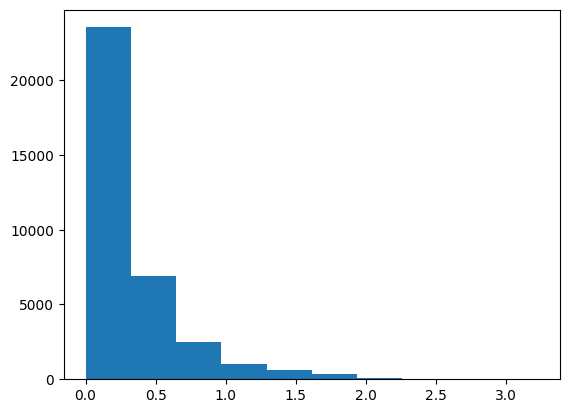

In [56]:
plt.hist(results["CRPS (5000 quantiles)"])

In [110]:
problematic_cases

,CRPS Linear,CRPS Hybrid,CRPS Normal,CRPS (5000 quantiles),NLL Linear,NLL Hybrid,NLL Normal,NLL (5000 quantiles),y values,logits,y_bin
460,0.577696,0.566201,0.580141,0.579964,4.254999,2.989063,15.545518,6.961960,-1.568240,"[-17.804929733276367, -18.633943557739258, -19...","(-2, -1.5)"
7666,1.443270,1.616771,1.596865,1.634027,4.396274,6.900997,17.388374,9.763720,-1.554226,"[-18.953983306884766, -15.717262268066406, -17...","(-2, -1.5)"
16221,0.863520,0.854462,0.874973,0.885684,4.273309,2.560494,5.154352,6.322978,-1.564858,"[-19.898113250732422, -20.565752029418945, -22...","(-2, -1.5)"
16222,0.857365,0.888165,0.900052,0.897113,4.293165,4.001174,10.713370,6.224456,-1.565984,"[-19.050254821777344, -19.528356552124023, -20...","(-2, -1.5)"
16223,0.811071,0.862399,0.864226,0.865075,4.299358,5.517999,22.053925,6.194545,-1.568522,"[-18.150318145751953, -18.707155227661133, -20...","(-2, -1.5)"
21695,0.766815,0.789740,0.739910,0.783393,4.272970,5.273041,2.001392,6.039246,-1.561208,None,"(-2, -1.5)"
27309,1.401440,1.551668,1.581748,1.570448,4.389256,5.988329,112.227402,8.287565,-1.561769,"[-20.55599021911621, -20.765430450439453, -22....","(-2, -1.5)"
28801,1.633134,1.788548,1.766854,1.817319,4.389185,6.256498,7.094728,9.570024,-1.575889,"[-19.41883659362793, -19.639083862304688, -20....","(-2, -1.5)"
28802,1.730648,1.884073,1.883281,1.894271,4.391750,6.028814,8.977326,9.411079,-1.565140,"[-20.05913734436035, -20.222633361816406, -20....","(-2, -1.5)"
28803,1.660303,1.819093,1.804183,1.844979,4.392887,6.149602,7.785744,8.856266,-1.558130,"[-20.25731086730957, -19.96438217163086, -20.9...","(-2, -1.5)"


In [87]:
from analysis.TabPFN_copy import fit_tail_distribution, plot_cdf_pdf_dynamic, plot_pdf_from_logits

In [78]:
results.loc[460]

CRPS Linear                                                       0.577696
CRPS Hybrid                                                       0.566201
CRPS Normal                                                       0.580141
CRPS (5000 quantiles)                                             0.579964
NLL Linear                                                        4.254999
NLL Hybrid                                                        2.989063
NLL Normal                                                       15.545518
NLL (5000 quantiles)                                               6.96196
y values                                                          -1.56824
logits                   [-17.804929733276367, -18.633943557739258, -19...
y_bin                                                           (-2, -1.5)
Name: 460, dtype: object

In [6]:
import pickle

# Load the dictionary from the pickle file
with open("results.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [10]:
type(results_dict["first_q"].logits)

pandas.core.series.Series

In [15]:
import torch

logits_np = np.array(results_dict["first_q"].logits.tolist()).shape

logits_tensor = torch.tensor(logits_np)

torch.Size([2])

In [16]:
logits_tensor

tensor([8640, 5000])

In [103]:
import ast

def fix_and_convert(x):
    if not x.endswith(']'):  # Check if the string is missing a closing bracket
        x = x + "]"  # Add the closing bracket
    try:
        return np.array(ast.literal_eval(x))  # Convert string to list, then to numpy array
    except (ValueError, SyntaxError):
        return None  # Return None if conversion fails

# Apply the function to the "logits" column
problematic_cases['logits'] = problematic_cases['logits'].apply(fix_and_convert)

C:\Users\Minu\AppData\Local\Temp\ipykernel_17396\2430241556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problematic_cases['logits'] = problematic_cases['logits'].apply(fix_and_convert)


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

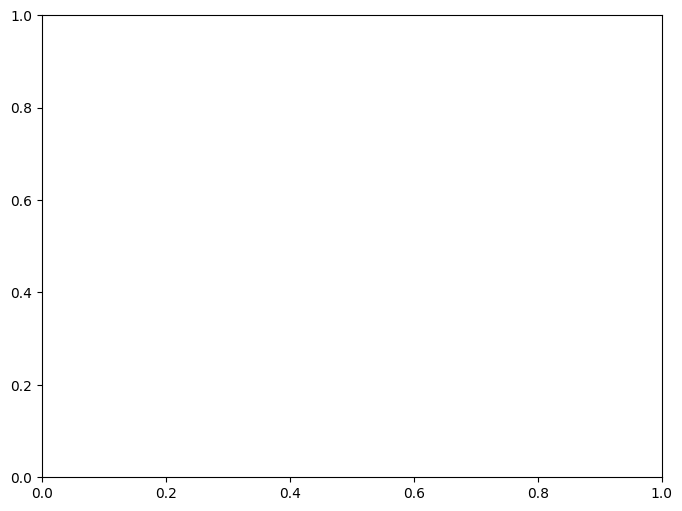

In [119]:
import torch

fig, ax = plt.subplots(figsize=(8, 6))

for idx, row in problematic_cases.iterrows():
    logits = torch.tensor(row['logits'])  # Convert to tensor
    # Assuming you have predefined x_lim, y_lim, and log_scale
    x_lim = (-2, 2)
    y_lim = (0, 1)
    log_scale = 'linear'  # or 'log' depending on your data

    plot_pdf_from_logits(ax, logits, borders, x_lim, y_lim, log_scale, id=0)

plt.show()

In [19]:
problematic_cases

NameError: name 'problematic_cases' is not defined

In [18]:
import torch

logits_list = problematic_cases["logits"]

logits_list

NameError: name 'problematic_cases' is not defined

In [111]:


logits_tensor = torch.tensor(logits_list, dtype=torch.float32)

logits_tensor

ValueError: could not determine the shape of object type 'Series'

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

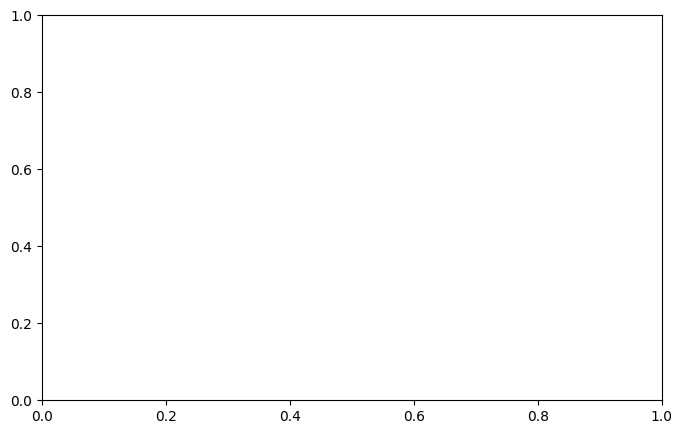

In [109]:
x_lim = (-5, 0)

y_lim = (1e-5, 20)  # Adjust as needed for log-scale compatibility
scale = "log"
#scale = "linear"
title = f"Conditional PDF of y | x for Entry #{id} in the Validation Dataset"
fig, ax = plt.subplots(figsize=(8, 5))

#probabilities = quantiles_custom
#yt = entsoe["power"]
#quantile_10 = np.percentile(yt, probabilities * 100)


# Fit left and right tails
#mu_left_asym, sigma_left_asym = fit_tail_distribution(quantile_10[:2], probabilities[:2])
#mu_right_asym, sigma_right_asym = fit_tail_distribution(quantile_10[-2:], probabilities[-2:])

#plot_cdf_pdf_dynamic(ax, all_quantiles_2[:,id], probabilities, -10, 5, x_lim, y_lim, title, log_scale=scale, case=3, 
                     #mu_left_asym=mu_left_asym, sigma_left_asym=sigma_left_asym, 
                     #mu_right_asym=mu_right_asym, sigma_right_asym=sigma_right_asym)


plot_pdf_from_logits(ax, logits_tensor, borders, x_lim, y_lim, log_scale=scale, id=id)

fig.show()



# Correct

In [ ]:
import pandas as pd
import numpy as np
import torch

file_path_t = "C:/Users/Minu/OneDrive/Arbeit/HTWG/Master/results/TabPFN/results_ws10m_ws100m_pt_96_3.xlsx"



# Define sheets to read (as a list)
sheets_to_read_t = ["first_q", "second_q", "third_q", "fourth_q"]

# Read the entire sheet (all columns) into a dictionary of DataFrames
sheets_dict_t = pd.read_excel(file_path_t, sheet_name=sheets_to_read_t, usecols="A:GJQ")

# Initialize an empty list to store final data from all sheets
final_data = []

# Iterate through each sheet in the dictionary
for sheet_name, df in sheets_dict_t.items():
    # Identify logit columns (J to GJQ, assuming these columns are consistent across sheets)
    logit_columns = df.columns[9:]  # Assuming logits start from the 10th column (index 9)

    original_columns = df.columns[:9]  # First 9 columns are the original ones

    # List comprehension that loops through each row (i), selecting only the logit columns
    # and converts that row into a NumPy array
    logits_array = np.array([df[logit_columns].iloc[i].values for i in range(len(df))])

    # Add the logits array as a new column
    df['Logits'] = logits_array.tolist()  # Convert numpy array to list for each row

    # Keep only the original columns plus the 'Logits' column
    final_df = df[original_columns.tolist() + ['Logits']]

    # Store the final DataFrame for this sheet into the list
    final_data.append(final_df)

# Concatenate all the final DataFrames from each sheet into one DataFrame
combined_final_df = pd.concat(final_data, ignore_index=True)

# Convert the 'Logits' column into a PyTorch tensor
logits_tensor = torch.tensor(combined_final_df['Logits'].tolist())

# Check the shape of the logits tensor (it should be of shape (num_rows, 5000) for all rows)
print(logits_tensor.shape)


## Works for one sheet with 2 days validation of q1

In [ ]:
#file_path = "C:/Users/Manuel/OneDrive/Arbeit/HTWG/Master/results/TabPFN/results_ws10m_ws100m_pt_96_2.xlsx"
file_path_t = "C:/Users/Minu/OneDrive/Arbeit/HTWG/Master/results/TabPFN/tests/4_results_ws10m_ws100m_pt_96.xlsx"

# Define sheets to read
sheets_to_read_t = ["first_q"]

# Read the entire sheet (all columns)
sheets_dict_t = pd.read_excel(file_path_t, sheet_name=sheets_to_read_t, usecols="A:GJQ")

# Extract the DataFrame from the dictionary
df = sheets_dict_t["first_q"]  # Extracts the "first_q" sheet

# Identify logit columns (J to GJQ)
logit_columns = df.columns[9:]  # J is the 10th column (index 9)

original_columns = df.columns[:9]

#list comprehension that loops through each row (i), selecting only the logit columns and converts that row into a NumPy array.
# the resulting logits_array is a 2D NumPy array, where each row contains the logits for that specific row in the DataFrame
logits_array = np.array([df[logit_columns].iloc[i].values for i in range(len(df))])

df['Logits'] = logits_array.tolist()  # Convert numpy array to list for each row

# Step 6: Keep only the original columns plus the 'Logits' column
final_df = df[original_columns.tolist() + ['Logits']]

logits_tensor = torch.tensor(final_df['Logits'].tolist())
logits_tensor.shape

In [105]:
pd.DataFrame(logits_array)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,-9.777493,-10.652269,-11.425621,-11.477307,-11.807205,-11.823038,-12.151751,-12.210792,-12.287467,-12.336717,...,-16.006924,-15.881761,-15.881761,-15.824602,-16.006924,-15.881761,-14.604100,-14.671923,-14.260627,-12.171062
1,-9.661783,-10.588937,-11.332597,-11.379257,-11.717108,-11.726112,-12.055038,-12.115431,-12.193030,-12.241148,...,-16.317080,-15.942385,-15.881761,-15.824602,-16.006924,-15.942385,-14.637437,-14.763730,-14.308254,-12.247275
2,-10.235591,-11.060241,-11.852883,-11.905236,-12.233748,-12.250007,-12.575531,-12.635286,-12.710060,-12.758561,...,-16.317080,-16.317080,-16.150024,-16.150024,-16.317080,-16.230068,-14.930784,-15.051413,-14.587839,-12.518530
3,-10.485958,-11.303462,-12.094520,-12.143156,-12.474396,-12.487591,-12.812039,-12.872320,-12.945562,-12.993866,...,-17.328680,-16.412390,-16.412390,-16.412390,-16.769064,-16.769064,-15.188613,-15.280987,-14.843773,-12.701259
4,-10.846961,-11.645921,-12.436274,-12.481948,-12.814686,-12.826197,-13.149735,-13.210485,-13.281837,-13.330215,...,-17.105536,-16.923214,-16.769064,-16.769064,-17.105536,-16.923214,-15.536921,-15.670451,-15.159626,-13.041651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-12.918017,-13.193109,-14.309832,-14.529206,-14.762595,-14.935195,-15.334330,-15.360346,-15.408213,-15.491614,...,-17.616362,-17.328680,-17.616362,-17.328680,-17.616362,-17.616362,-16.317080,-16.412390,-16.006924,-13.944289
284,-13.302549,-13.194482,-14.512556,-14.828527,-14.964240,-15.248042,-15.656939,-15.674808,-15.718178,-15.806520,...,-17.328680,-17.328680,-17.105536,-17.105536,-17.328680,-17.328680,-16.006924,-16.075916,-15.770535,-13.724542
285,-14.647602,-14.242371,-15.667592,-16.116011,-16.163801,-16.543230,-16.968727,-16.985674,-17.022543,-17.116535,...,-18.714973,-17.616362,-18.714973,-18.021828,-18.714973,-18.714973,-16.635532,-16.769064,-16.769064,-14.466478
286,-16.600939,-16.606869,-17.764936,-18.150108,-18.311102,-18.545233,-18.938620,-19.023031,-19.011997,-19.119970,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-18.714973,-15.881761


In [1]:
borders.shape

NameError: name 'borders' is not defined

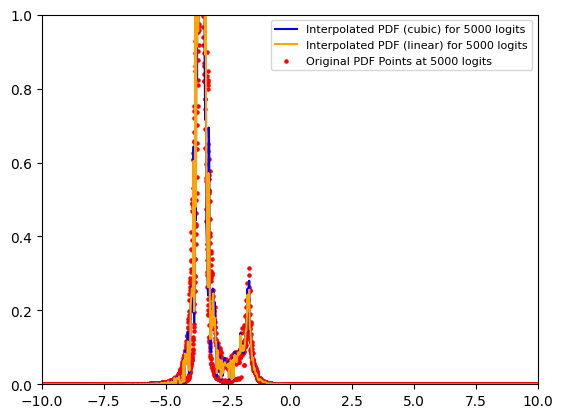

In [92]:
x_lim = (-10, 10)  # Example x limits
y_lim = (0, 1)  # Example y limits
log_scale = 'linear'  # Use 'linear' or 'log' for y-axis scale

# Define the row index (500th row)
row_index = 80

# Prepare the figure and axis for plotting
fig, ax = plt.subplots()

# Call the function for the 500th row (id=500)
plot_pdf_from_logits(ax, logits_tensor, borders, x_lim, y_lim, log_scale, id=row_index)

plt.show()

In [68]:
merged_data.columns

Index([          'CRPS Linear',           'CRPS Hybrid',
                 'CRPS Normal', 'CRPS (5000 quantiles)',
                  'NLL Linear',            'NLL Hybrid',
                  'NLL Normal',  'NLL (5000 quantiles)',
                    'y values',                       0,
       ...
                          4990,                    4991,
                          4992,                    4993,
                          4994,                    4995,
                          4996,                    4997,
                          4998,                    4999],
      dtype='object', length=5009)

In [64]:
logits_t = df["logits_array"].values

torch.tensor(logits_t)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [38]:
import ast

results_t["logits"] = results_t["logits"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


SyntaxError: '[' was never closed (<unknown>, line 1)

In [36]:
import torch

logits_q_array = np.array(results_t["logits"].tolist(), dtype=np.float32)  # Ensure it's float32

torch.tensor(logits_q_array)

ValueError: could not convert string to float: '[-9.77749252319336, -10.65226936340332, -11.425621032714844, -11.477307319641113, -11.807205200195312, -11.823038101196289, -12.151750564575195, -12.21079158782959, -12.287467002868652, -12.336716651916504, -12.30718994140625, -12.48808765411377, -12.504741668701172, -12.49532699584961, -12.54256820678711, -12.670879364013672, -12.820083618164062, -12.532124519348145, -12.717217445373535, -12.658510208129883, -12.954508781433105, -12.64602279663086, -12.877979278564453, -12.916210174560547, -12.562029838562012, -13.125494003295898, -12.543116569519043, -13.12732219696045, -12.699363708496094, -12.748220443725586, -12.973199844360352, -12.695859909057617, -13.060574531555176, -12.916579246520996, -12.973442077636719, -13.04025936126709, -12.608447074890137, -12.925041198730469, -12.911166191101074, -12.948282241821289, -12.883416175842285, -13.00757884979248, -12.908008575439453, -12.948272705078125, -12.847569465637207, -12.820538520812988, -12.919575691223145, -12.85356616973877, -12.782466888427734, -13.405407905578613, -12.775458335876465, -12.71286678314209, -12.906468391418457, -13.314854621887207, -12.66415023803711, -12.681547164916992, -13.402743339538574, -12.663359642028809, -12.751787185668945, -13.416211128234863, -12.697684288024902, -13.308124542236328, -13.3236665725708, -12.730008125305176, -13.26786994934082, -12.560904502868652, -13.223435401916504, -13.396463394165039, -12.689372062683105, -13.509093284606934, -12.723542213439941, -13.184212684631348, -12.609977722167969, -13.370232582092285, -12.66142463684082, -13.358495712280273, -13.35941219329834, -12.730034828186035, -13.548465728759766, -13.23288345336914, -13.45189380645752, -12.61646842956543, -13.446887969970703, -13.25133228302002, -13.487689971923828, -12.692487716674805, -13.263189315795898, -13.352484703063965, -12.615180969238281, -13.389564514160156, -13.505017280578613, -13.431300163269043, -12.456761360168457, -13.234621047973633, -13.148180961608887, -13.040168762207031, -13.192607879638672, -13.146069526672363, -13.18968677520752, -13.086597442626953, -12.459770202636719, -13.166635513305664, -13.13724136352539, -13.04926872253418, -13.132883071899414, -13.135900497436523, -13.197352409362793, -13.18570327758789, -12.89489459991455, -13.000837326049805, -13.030600547790527, -12.863609313964844, -13.055057525634766, -12.869976043701172, -17.272808074951172, -12.929656982421875, -12.848210334777832, -12.907581329345703, -13.049778938293457, -12.882087707519531, -12.92763900756836, -12.92003059387207, -12.818788528442383, -13.111144065856934, -17.24370574951172, -12.955191612243652, -13.040867805480957, -12.993327140808105, -12.872501373291016, -13.014083862304688, -12.850275993347168, -17.40141487121582, -12.834924697875977, -12.893007278442383, -12.860328674316406, -13.023520469665527, -12.889183044433594, -17.447792053222656, -12.802780151367188, -12.932817459106445, -12.917821884155273, -17.43889617919922, -12.874759674072266, -12.849873542785645, -12.95789909362793, -12.932440757751465, -17.526531219482422, -12.667637825012207, -17.547653198242188, -12.732392311096191, -12.902677536010742, -12.896482467651367, -12.97029972076416, -17.660982131958008, -12.819439888000488, -12.965592384338379, -17.574655532836914, -12.710759162902832, -12.6784086227417, -17.508344650268555, -12.593794822692871, -12.588415145874023, -17.523967742919922, -12.810277938842773, -12.656867027282715, -17.34814453125, -12.550455093383789, -12.699942588806152, -17.3455810546875, -12.7210111618042, -12.66312026977539, -17.48743438720703, -12.806647300720215, -12.64401912689209, -17.53987693786621, -12.68063735961914, -17.506603240966797, -12.73510456085205, -17.680070877075195, -12.651618003845215, -17.6531925201416, -12.787484169006348, -12.617812156677246, -17.360614776611328, -12.652870178222656, -17.63088035583496, -12.604052543640137, -17.677677154541016, -12.473224639892578, -12.775038719177246, -17.725528717041016, -12.776214599609375, -17.6492919921875, -12.737399101257324, -17.83260154724121, -12.587530136108398, -17.678504943847656, -12.465481758117676, -17.65262794494629, -12.58706283569336, -17.579442977905273, -12.525139808654785, -17.362070083618164, -12.576105117797852, -17.64446258544922, -12.66850757598877, -17.61808967590332, -12.654670715332031, -17.673635482788086, -12.619527816772461, -17.779630661010742, -12.419615745544434, -17.64956283569336, -12.696045875549316, -17.38015365600586, -12.445693016052246, -17.94756317138672, -12.531928062438965, -17.377769470214844, -12.31660270690918, -17.503463745117188, -12.505853652954102, -17.48040771484375, -12.358397483825684, -17.58216094970703, -12.29546070098877, -17.50313949584961, -12.386787414550781, -17.27595329284668, -12.341226577758789, -17.13593101501465, -12.4122314453125, -17.437658309936523, -12.435534477233887, -17.31119728088379, -12.462623596191406, -17.63450050354004, -12.543622016906738, -17.691822052001953, -12.43915843963623, -17.251941680908203, -12.383320808410645, -17.5789737701416, -12.426555633544922, -17.336591720581055, -12.426590919494629, -17.527687072753906, -12.47584056854248, -17.23203468322754, -12.341497421264648, -17.37339210510254, -12.231179237365723, -17.442779541015625, -17.172964096069336, -12.302888870239258, -17.401992797851562, -12.321250915527344, -17.287521362304688, -12.441008567810059, -17.478796005249023, -12.393948554992676, -17.397085189819336, -12.387594223022461, -17.40999984741211, -12.213281631469727, -17.34750747680664, -17.436803817749023, -12.524248123168945, -17.55210304260254, -12.276711463928223, -17.115127563476562, -12.260859489440918, -17.35912322998047, -12.265138626098633, -17.390600204467773, -12.168127059936523, -17.346107482910156, -17.696321487426758, -12.336624145507812, -17.41455078125, -17.556949615478516, -12.26163387298584, -17.86551856994629, -12.478747367858887, -17.341535568237305, -12.319499015808105, -17.22519302368164, -17.534955978393555, -12.334087371826172, -17.54276466369629, -12.282204627990723, -17.50632667541504, -17.48600196838379, -12.268861770629883, -17.28999137878418, -12.34183406829834, -17.148218154907227, -12.326414108276367, -17.31261444091797, -12.531742095947266, -17.441043853759766, -12.247393608093262, -17.275354385375977, -12.3655366897583, -17.158559799194336, -12.097192764282227, -17.294448852539062, -17.226579666137695, -12.146415710449219, -17.585126876831055, -12.383475303649902, -17.14632225036621, -12.323151588439941, -17.55728530883789, -17.5324649810791, -12.191265106201172, -17.236413955688477, -12.192304611206055, -17.14804458618164, -12.243839263916016, -17.28496551513672, -17.357202529907227, -12.18116569519043, -17.30063247680664, -12.230466842651367, -17.394407272338867, -12.156576156616211, -17.183229446411133, -17.572555541992188, -12.127591133117676, -17.185455322265625, -12.183061599731445, -16.837812423706055, -17.127784729003906, -12.243966102600098, -17.23934555053711, -12.339015007019043, -17.49604034423828, -12.112358093261719, -17.2326602935791, -17.246671676635742, -12.017970085144043, -17.134737014770508, -17.070409774780273, -12.054508209228516, -17.268648147583008, -12.191282272338867, -17.15357780456543, -17.061111450195312, -12.243346214294434, -17.45694923400879, -12.151633262634277, -17.105321884155273, -17.4349365234375, -12.202856063842773, -17.490299224853516, -12.20142936706543, -17.29744529724121, -12.02782154083252, -17.222997665405273, -17.028770446777344, -12.104714393615723, -17.300811767578125, -17.24795150756836, -12.098831176757812, -17.095584869384766, -17.18264389038086, -12.128262519836426, -17.386728286743164, -17.667470932006836, -12.180537223815918, -17.072065353393555, -12.068434715270996, -17.083667755126953, -17.214149475097656, -12.057099342346191, -17.244733810424805, -17.32391929626465, -12.11956787109375, -17.12212562561035, -12.103912353515625, -17.35768699645996, -17.23926544189453, -12.094535827636719, -17.37454605102539, -17.2001953125, -12.086584091186523, -17.1702823638916, -17.41237449645996, -12.119888305664062, -17.51593589782715, -12.099573135375977, -17.047603607177734, -17.102266311645508, -12.040995597839355, -17.281038284301758, -11.967957496643066, -16.962894439697266, -16.97113609313965, -12.078764915466309, -17.218711853027344, -17.350915908813477, -12.135217666625977, -17.068586349487305, -12.10499095916748, -17.20751190185547, -16.913610458374023, -12.140175819396973, -17.141679763793945, -16.979467391967773, -12.092911720275879, -16.684526443481445, -12.077420234680176, -16.834491729736328, -12.068127632141113, -16.985918045043945, -17.076269149780273, -12.050822257995605, -17.131526947021484, -16.86825942993164, -11.986617088317871, -16.87143898010254, -16.869707107543945, -12.148677825927734, -16.716053009033203, -12.058930397033691, -16.84639549255371, -12.040472984313965, -17.19855499267578, -16.804365158081055, -12.039405822753906, -16.833145141601562, -12.010878562927246, -16.79224967956543, -17.171123504638672, -12.040169715881348, -17.085350036621094, -16.96441650390625, -11.977008819580078, -16.834121704101562, -11.861555099487305, -16.826509475708008, -16.737092971801758, -11.839255332946777, -16.78643035888672, -16.781837463378906, -11.90117073059082, -16.722082138061523, -16.90426254272461, -12.082741737365723, -17.081336975097656, -11.99858283996582, -16.755615234375, -16.83598518371582, -11.843498229980469, -16.675188064575195, -11.824837684631348, -16.714181900024414, -16.667455673217773, -11.993096351623535, -16.593523025512695, -16.633665084838867, -12.019631385803223, -16.83342933654785, -11.935325622558594, -16.7816104888916, -16.848634719848633, -11.815974235534668, -16.682619094848633, -16.804216384887695, -11.910933494567871, -16.395166397094727, -12.061517715454102, -16.456960678100586, -11.946733474731445, -16.499038696289062, -16.61420249938965, -11.913009643554688, -16.608617782592773, -11.916732788085938, -16.56828498840332, -16.768632888793945, -11.849984169006348, -16.817399978637695, -16.605077743530273, -11.976125717163086, -16.46680450439453, -11.917749404907227, -16.756439208984375, -16.74016761779785, -11.812287330627441, -16.491506576538086, -16.543716430664062, -11.931327819824219, -16.45377540588379, -11.828150749206543, -16.694652557373047, -16.677703857421875, -11.873010635375977, -16.390119552612305, -16.831268310546875, -11.745565414428711, -16.845388412475586, -16.721309661865234, -11.760128021240234, -16.50556182861328, -11.915274620056152, -16.44681167602539, -16.660297393798828, -11.762870788574219, -16.84189224243164, -16.45182991027832, -11.813350677490234, -16.415016174316406, -16.700130462646484, -11.87069034576416, -16.676546096801758, -11.91052532196045, -16.485916137695312, -16.36573600769043, -11.671549797058105, -16.6689453125, -16.712194442749023, -11.765912055969238, -16.564298629760742, -16.57585334777832, -11.888212203979492, -16.702999114990234, -16.27359962463379, -11.841303825378418, -16.32003402709961, -11.926227569580078, -16.507919311523438, -16.718523025512695, -11.809032440185547, -16.39761734008789, -11.769283294677734, -16.517419815063477, -16.414140701293945, -11.842789649963379, -16.717586517333984, -16.73151397705078, -11.741195678710938, -16.514923095703125, -16.699209213256836, -11.778411865234375, -16.54800033569336, -16.642349243164062, -11.689369201660156, -16.210485458374023, -16.272926330566406, -11.717772483825684, -16.410512924194336, -11.630221366882324, -16.275365829467773, -16.49591827392578, -11.645721435546875, -16.269250869750977, -16.532272338867188, -11.645267486572266, -16.730300903320312, -16.405057907104492, -11.601227760314941, -16.447694778442383, -16.416011810302734, -11.566535949707031, -16.320859909057617, -16.42813491821289, -11.570026397705078, -16.192190170288086, -16.26819610595703, -11.506834983825684, -16.459386825561523, -16.113262176513672, -11.612499237060547, -16.423828125, -16.43901824951172, -11.662247657775879, -16.292573928833008, -16.1622314453125, -11.50857162475586, -16.417966842651367, -16.587848663330078, -11.582767486572266, -16.30820655822754, -16.349397659301758, -11.604639053344727, -16.406293869018555, -16.216552734375, -11.487005233764648, -16.154619216918945, -16.35921859741211, -11.54660701751709, -16.18227195739746, -16.18027114868164, -11.394270896911621, -16.31571388244629, -16.147573471069336, -11.586894989013672, -16.306476593017578, -16.420921325683594, -11.498990058898926, -16.42494010925293, -16.255212783813477, -11.49814224243164, -16.408491134643555, -16.144441604614258, -11.549386024475098, -16.144161224365234, -16.131383895874023, -11.510129928588867, -16.13813591003418, -16.103178024291992, -11.452960014343262, -16.075824737548828, -16.283803939819336, -11.445322036743164, -16.22760772705078, -15.876360893249512, -11.733911514282227, -16.09488296508789, -11.514498710632324, -16.02767562866211, -15.90047550201416, -11.404705047607422, -16.003786087036133, -16.21984100341797, -11.594555854797363, -16.335254669189453, -16.06743812561035, -11.418277740478516, -16.146820068359375, -16.116872787475586, -11.500372886657715, -16.1928768157959, -16.15739631652832, -11.524133682250977, -16.085111618041992, -16.17780303955078, -11.272201538085938, -16.179445266723633, -16.218469619750977, -11.390106201171875, -16.41356658935547, -16.290340423583984, -16.173011779785156, -11.486490249633789, -16.17237663269043, -16.174543380737305, -11.4708251953125, -16.079660415649414, -16.10102653503418, -11.434887886047363, -16.13547134399414, -16.139480590820312, -11.29151439666748, -16.300495147705078, -15.938138008117676, -11.42420482635498, -16.121789932250977, -16.007234573364258, -11.483625411987305, -16.133085250854492, -16.081010818481445, -11.355330467224121, -15.954815864562988, -15.839737892150879, -11.424345016479492, -15.936747550964355, -15.840651512145996, -11.48276138305664, -15.902116775512695, -15.940089225769043, -11.371155738830566, -15.948158264160156, -16.13763427734375, -11.48298454284668, -15.764598846435547, -11.402331352233887, -15.762642860412598, -15.986157417297363, -11.37667465209961, -15.851076126098633, -16.0867919921875, -11.28208065032959, -15.882049560546875, -15.939505577087402, -11.319977760314941, -15.832515716552734, -15.989645957946777, -11.431923866271973, -15.836146354675293, -15.767769813537598, -11.2406005859375, -15.931443214416504, -15.951946258544922, -11.306601524353027, -15.85069465637207, -15.906332015991211, -11.284788131713867, -16.04267692565918, -15.959457397460938, -11.45721435546875, -15.654359817504883, -15.727394104003906, -11.330548286437988, -15.708707809448242, -11.42042064666748, -15.826173782348633, -15.797541618347168, -11.282114028930664, -15.618229866027832, -15.674572944641113, -11.360894203186035, -15.514179229736328, -15.856009483337402, -11.364169120788574, -15.788094520568848, -11.411738395690918, -15.55223560333252, -15.74980640411377, -11.25348949432373, -15.827284812927246, -15.7249755859375, -11.242196083068848, -15.72584342956543, -15.696596145629883, -11.255203247070312, -15.720404624938965, -15.58918571472168, -11.278536796569824, -15.644543647766113, -15.858922958374023, -11.133885383605957, -15.683396339416504, -15.469704627990723, -11.205256462097168, -15.798023223876953, -15.457741737365723, -11.277288436889648, -15.706754684448242, -15.822371482849121, -11.21169662475586, -15.699213027954102, -15.748468399047852, -11.493109703063965, -15.648290634155273, -11.135333061218262, -15.725275039672852, -15.586920738220215, -11.273587226867676, -16.013647079467773, -15.601881980895996, -15.910557746887207, -11.249629020690918, -15.857728958129883, -15.711530685424805, -11.206245422363281, -15.608938217163086, -15.617859840393066, -11.366484642028809, -15.600847244262695, -15.898324012756348, -11.193042755126953, -15.444273948669434, -15.797429084777832, -11.216947555541992, -15.41552448272705, -15.63067626953125, -11.15980339050293, -15.518377304077148, -15.508989334106445, -11.048380851745605, -15.53868293762207, -15.379654884338379, -15.82294750213623, -11.09915828704834, -15.41892147064209, -15.771394729614258, -11.123790740966797, -15.3384428024292, -15.555289268493652, -11.1829252243042, -15.60060977935791, -15.572732925415039, -11.167340278625488, -15.53919792175293, -15.48731803894043, -11.186835289001465, -15.410550117492676, -15.403287887573242, -11.054186820983887, -15.438629150390625, -15.637770652770996, -11.198768615722656, -15.284200668334961, -15.400166511535645, -11.202862739562988, -15.338051795959473, -15.342325210571289, -11.047872543334961, -15.411908149719238, -15.485671997070312, -11.12462329864502, -15.481087684631348, -15.405827522277832, -11.174569129943848, -15.317596435546875, -15.516691207885742, -11.10976505279541, -15.49950122833252, -15.434967041015625, -11.219374656677246, -15.445259094238281, -11.237181663513184, -15.140947341918945, -15.342617988586426, -11.263187408447266, -15.544718742370605, -15.495904922485352, -11.221409797668457, -15.202057838439941, -11.179886817932129, -15.197108268737793, -15.142460823059082, -11.13228988647461, -15.271900177001953, -15.446831703186035, -11.041629791259766, -15.250763893127441, -15.206358909606934, -10.984370231628418, -15.378312110900879, -15.173982620239258, -11.028928756713867, -15.583085060119629, -15.487504005432129, -11.264317512512207, -15.371307373046875, -15.123398780822754, -10.979957580566406, -15.20683765411377, -15.377811431884766, -11.097123146057129, -15.352298736572266, -15.335046768188477, -11.04960823059082, -15.259700775146484, -15.550537109375, -11.062506675720215, -15.182287216186523, -15.20948600769043, -10.97381591796875, -15.324087142944336, -15.321622848510742, -11.204191207885742, -15.110848426818848, -15.303173065185547, -11.066987037658691, -15.454606056213379, -15.188077926635742, -10.935945510864258, -15.267007827758789, -15.012601852416992, -10.929678916931152, -15.303421974182129, -15.143033981323242, -11.071563720703125, -15.328717231750488, -15.342447280883789, -11.120267868041992, -15.265931129455566, -15.197858810424805, -10.91561222076416, -15.137749671936035, -15.233137130737305, -11.035941123962402, -15.337252616882324, -15.19670295715332, -10.96227741241455, -15.331592559814453, -15.40912914276123, -10.978485107421875, -15.124445915222168, -15.009088516235352, -10.911956787109375, -15.318056106567383, -15.150733947753906, -10.956571578979492, -15.099386215209961, -15.110289573669434, -11.095758438110352, -15.36552906036377, -10.941556930541992, -15.072736740112305, -15.150989532470703, -10.953466415405273, -14.961095809936523, -15.258055686950684, -10.917557716369629, -15.193635940551758, -15.030447959899902, -10.990657806396484, -15.236116409301758, -15.329241752624512, -10.957622528076172, -15.08963394165039, -15.19060230255127, -10.8579740524292, -15.036844253540039, -15.031736373901367, -15.107269287109375, -10.82563304901123, -15.139004707336426, -15.028607368469238, -10.715579986572266, -15.09034538269043, -14.935689926147461, -10.914395332336426, -15.129465103149414, -15.123679161071777, -10.79322624206543, -15.267227172851562, -15.038934707641602, -10.900594711303711, -15.031048774719238, -15.099501609802246, -10.665493965148926, -15.061698913574219, -15.172259330749512, -14.999757766723633, -10.818355560302734, -15.094836235046387, -14.888428688049316, -10.884483337402344, -14.96133804321289, -14.9783296585083, -10.960235595703125, -15.168659210205078, -15.099303245544434, -10.914478302001953, -15.04909896850586, -15.07445240020752, -10.84763240814209, -14.926891326904297, -15.008294105529785, -10.978508949279785, -14.895602226257324, -15.076748847961426, -10.955912590026855, -15.047219276428223, -10.780707359313965, -15.073139190673828, -14.919267654418945, -15.110321044921875, -10.840786933898926, -14.852383613586426, -15.000456809997559, -10.833072662353516, -14.943803787231445, -15.012697219848633, -10.827208518981934, -15.110224723815918, -15.26071548461914, -14.84991455078125, -10.756284713745117, -14.805630683898926, -14.964683532714844, -10.67933464050293, -15.032235145568848, -14.877626419067383, -15.046297073364258, -10.761073112487793, -14.94228744506836, -14.8650484085083, -10.907170295715332, -14.84943675994873, -14.78293514251709, -10.813156127929688, -14.919397354125977, -14.868566513061523, -10.824358940124512, -14.968703269958496, -14.882532119750977, -10.720076560974121, -14.771347045898438, -15.066590309143066, -14.85936450958252, -10.77409839630127, -14.834335327148438, -14.858922004699707, -10.853273391723633, -14.731592178344727, -14.77090072631836, -10.881291389465332, -14.817571640014648, -14.856100082397461, -10.921436309814453, -14.894271850585938, -14.643411636352539, -10.724893569946289, -14.98778247833252, -14.806723594665527, -10.782430648803711, -14.659811019897461, -14.794134140014648, -10.71985912322998, -14.729412078857422, -14.658485412597656, -10.714394569396973, -14.687151908874512, -14.652973175048828, -10.639937400817871, -14.738120079040527, -14.703372955322266, -10.67654037475586, -14.61844539642334, -14.725308418273926, -10.71851634979248, -14.678793907165527, -14.735018730163574, -10.816076278686523, -14.528325080871582, -14.69613265991211, -10.684120178222656, -14.537185668945312, -14.664281845092773, -10.676188468933105, -14.565382957458496, -14.739581108093262, -10.747763633728027, -14.5203857421875, -14.638458251953125, -10.610607147216797, -14.452972412109375, -14.699746131896973, -14.521336555480957, -10.736769676208496, -14.504673957824707, -14.614997863769531, -10.590906143188477, -14.591530799865723, -14.447227478027344, -10.62048625946045, -14.611884117126465, -14.63369369506836, -10.690252304077148, -14.355774879455566, -14.64445686340332, -10.73385238647461, -14.655973434448242, -14.530949592590332, -10.66694450378418, -14.510320663452148, -14.59379768371582, -10.822588920593262, -14.509306907653809, -14.578644752502441, -10.517529487609863, -14.62811279296875, -14.584357261657715, -10.611395835876465, -14.488043785095215, -14.483675003051758, -10.557101249694824, -14.405810356140137, -14.348959922790527, -10.609707832336426, -14.356954574584961, -14.489168167114258, -10.532962799072266, -14.334409713745117, -14.36259651184082, -10.60822582244873, -14.313044548034668, -14.225419998168945, -10.484869003295898, -14.37319278717041, -14.46898365020752, -10.552331924438477, -14.39428424835205, -14.407432556152344, -10.522945404052734, -14.389936447143555, -14.316930770874023, -10.565383911132812, -14.173660278320312, -14.2516450881958, -10.361540794372559, -14.274444580078125, -14.286280632019043, -10.496963500976562, -14.463644981384277, -14.261174201965332, -14.267274856567383, -10.571130752563477, -14.349742889404297, -10.55544662475586, -14.38068962097168, -14.113628387451172, -10.380206108093262, -14.197977066040039, -14.362444877624512, -14.208438873291016, -10.470255851745605, -14.212541580200195, -14.10633659362793, -10.64244270324707, -14.116514205932617, -14.318048477172852, -10.712328910827637, -14.168219566345215, -10.581266403198242, -14.093445777893066, -13.949374198913574, -10.503371238708496, -14.149922370910645, -14.078234672546387, -10.494911193847656, -14.067781448364258, -14.118257522583008, -10.517915725708008, -14.057851791381836, -13.905436515808105, -10.411084175109863, -14.117172241210938, -14.10344123840332, -10.362707138061523, -14.19956111907959, -14.014999389648438, -13.975321769714355, -10.560864448547363, -13.971501350402832, -10.485127449035645, -13.841804504394531, -13.777950286865234, -10.563302993774414, -14.0440673828125, -13.966331481933594, -10.619147300720215, -14.158245086669922, -14.227892875671387, -10.454156875610352, -13.912654876708984, -13.851743698120117, -10.445889472961426, -13.907556533813477, -14.018928527832031, -10.361839294433594, -13.92661190032959, -10.49740219116211, -13.79426097869873, -14.064535140991211, -10.39726734161377, -13.782721519470215, -13.848321914672852, -10.332138061523438, -13.873943328857422, -13.922258377075195, -10.520611763000488, -13.816542625427246, -13.854035377502441, -10.32040023803711, -13.863497734069824, -13.888185501098633, -10.366459846496582, -13.59978199005127, -10.422572135925293, -13.704472541809082, -13.770281791687012, -10.316428184509277, -13.696178436279297, -13.741531372070312, -10.384271621704102, -13.671048164367676, -13.676178932189941, -10.253318786621094, -13.745460510253906, -13.67908763885498, -10.395706176757812, -13.68397331237793, -13.746655464172363, -10.375199317932129, -13.550191879272461, -13.710302352905273, -10.234906196594238, -13.679287910461426, -13.661574363708496, -10.221022605895996, -13.467626571655273, -13.5202054977417, -10.33275318145752, -13.616251945495605, -13.528766632080078, -10.37973403930664, -13.545769691467285, -10.39086627960205, -13.37423038482666, -13.540562629699707, -10.290741920471191, -13.584920883178711, -13.522377967834473, -10.29505443572998, -13.466914176940918, -10.436527252197266, -13.440505027770996, -13.439799308776855, -10.311735153198242, -13.35392951965332, -13.603387832641602, -10.295920372009277, -13.345945358276367, -13.490285873413086, -10.215428352355957, -13.621832847595215, -13.387117385864258, -10.239020347595215, -13.406868934631348, -13.57536792755127, -10.359625816345215, -13.395429611206055, -13.323927879333496, -10.288787841796875, -13.494102478027344, -13.41562271118164, -10.236824035644531, -13.444916725158691, -13.27452278137207, -10.20882797241211, -13.27615737915039, -13.371313095092773, -10.352398872375488, -13.267354965209961, -13.17646312713623, -10.342733383178711, -13.491379737854004, -10.174610137939453, -13.208975791931152, -13.207276344299316, -10.25064468383789, -13.230182647705078, -13.277463912963867, -10.271951675415039, -13.050352096557617, -13.233773231506348, -10.363210678100586, -13.265874862670898, -13.170380592346191, -10.217447280883789, -13.20007610321045, -13.173334121704102, -10.221023559570312, -13.406164169311523, -13.082128524780273, -10.27651596069336, -13.044376373291016, -10.265786170959473, -13.272235870361328, -13.210695266723633, -10.044123649597168, -13.4033842086792, -13.339949607849121, -13.15019416809082, -10.182743072509766, -13.179123878479004, -10.046163558959961, -13.21868896484375, -13.134151458740234, -13.232011795043945, -10.089613914489746, -13.212520599365234, -13.254450798034668, -13.193727493286133, -10.314623832702637, -13.074631690979004, -13.296326637268066, -10.171198844909668, -13.176377296447754, -13.292970657348633, -10.092537879943848, -13.295501708984375, -13.315790176391602, -13.11225700378418, -10.25810718536377, -13.19327163696289, -13.24778938293457, -9.916553497314453, -13.183537483215332, -13.308122634887695, -13.250029563903809, -10.098517417907715, -12.870625495910645, -13.045957565307617, -10.203825950622559, -12.849016189575195, -10.079666137695312, -12.986747741699219, -13.068276405334473, -10.182973861694336, -13.04297924041748, -12.890442848205566, -10.200594902038574, -12.925870895385742, -12.854860305786133, -9.991973876953125, -12.93193531036377, -13.01929759979248, -9.960796356201172, -12.681638717651367, -12.813295364379883, -9.923906326293945, -12.648744583129883, -12.879505157470703, -10.110891342163086, -12.778736114501953, -12.649687767028809, -10.119002342224121, -12.835060119628906, -12.67131233215332, -10.028779029846191, -12.756837844848633, -10.101984977722168, -12.930468559265137, -12.729228973388672, -9.989181518554688, -12.780455589294434, -12.669601440429688, -10.10226058959961, -12.675436019897461, -12.627739906311035, -10.113102912902832, -12.720011711120605, -12.826407432556152, -10.039910316467285, -12.57540512084961, -12.70582389831543, -10.042993545532227, -12.66772174835205, -12.650792121887207, -10.112744331359863, -12.709824562072754, -9.963268280029297, -12.554619789123535, -12.718199729919434, -10.148197174072266, -12.783769607543945, -12.644083976745605, -10.015665054321289, -12.523051261901855, -12.472552299499512, -9.946440696716309, -12.428871154785156, -12.582948684692383, -10.031996726989746, -12.392075538635254, -10.106985092163086, -12.539328575134277, -12.459604263305664, -10.005353927612305, -12.431112289428711, -12.52784538269043, -9.986631393432617, -12.424118041992188, -12.573577880859375, -9.953309059143066, -12.491321563720703, -12.419330596923828, -9.853625297546387, -12.570426940917969, -12.560154914855957, -9.863486289978027, -12.400884628295898, -12.242159843444824, -9.9100923538208, -12.339310646057129, -12.400803565979004, -9.915515899658203, -12.460693359375, -12.425929069519043, -9.96723461151123, -12.49434757232666, -9.84533977508545, -12.36618423461914, -12.156126976013184, -9.867149353027344, -12.192852973937988, -12.12019157409668, -9.855475425720215, -12.147125244140625, -12.249141693115234, -9.976067543029785, -12.29538345336914, -12.38962173461914, -9.934164047241211, -12.226118087768555, -12.304830551147461, -9.980547904968262, -12.301263809204102, -9.850414276123047, -12.06976318359375, -12.203550338745117, -9.826624870300293, -12.29120922088623, -12.265998840332031, -10.017034530639648, -12.118707656860352, -12.385600090026855, -9.761280059814453, -12.135356903076172, -12.114319801330566, -9.841123580932617, -12.151716232299805, -9.949790000915527, -12.339917182922363, -12.215758323669434, -9.757734298706055, -12.117656707763672, -12.131123542785645, -9.794533729553223, -12.213951110839844, -12.419544219970703, -12.13473129272461, -9.914055824279785, -11.985755920410156, -9.921728134155273, -12.270491600036621, -12.180468559265137, -9.821455001831055, -12.093143463134766, -12.10504150390625, -9.823529243469238, -12.114153861999512, -12.017614364624023, -9.709732055664062, -12.015573501586914, -12.108487129211426, -9.728060722351074, -11.971860885620117, -11.908927917480469, -9.867693901062012, -12.05392837524414, -12.119285583496094, -9.735302925109863, -12.085014343261719, -12.066020965576172, -9.819892883300781, -12.005227088928223, -9.825370788574219, -11.994102478027344, -12.044468879699707, -9.781229019165039, -11.993253707885742, -12.0157470703125, -9.68631649017334, -12.037971496582031, -11.972049713134766, -9.900294303894043, -12.003327369689941, -9.724859237670898, -11.890869140625, -11.965473175048828, -9.827707290649414, -12.015107154846191, -12.027173042297363, -9.702371597290039, -11.96414852142334, -9.589706420898438, -11.980327606201172, -11.882383346557617, -9.626845359802246, -11.973835945129395, -11.97913932800293, -9.586647033691406, -11.885860443115234, -11.94801139831543, -11.87048053741455, -9.573996543884277, -11.71485710144043, -9.573431015014648, -12.0144624710083, -11.925658226013184, -9.687127113342285, -11.74538803100586, -11.8976469039917, -9.661663055419922, -11.788809776306152, -11.729976654052734, -9.517468452453613, -11.981541633605957, -11.821840286254883, -9.54228687286377, -11.803319931030273, -11.750297546386719, -9.629233360290527, -11.843042373657227, -11.738518714904785, -9.586060523986816, -11.757453918457031, -11.837630271911621, -9.567034721374512, -11.707816123962402, -11.86162281036377, -9.587810516357422, -11.712966918945312, -9.550180435180664, -11.81026840209961, -11.644458770751953, -9.646804809570312, -11.804193496704102, -11.8197660446167, -9.533447265625, -11.757073402404785, -11.716373443603516, -9.510726928710938, -11.691368103027344, -11.716198921203613, -9.495070457458496, -11.668207168579102, -9.427986145019531, -11.597260475158691, -11.576116561889648, -9.620420455932617, -11.515924453735352, -11.520353317260742, -9.518465995788574, -11.556596755981445, -9.472689628601074, -11.462982177734375, -11.550851821899414, -9.474035263061523, -11.440313339233398, -11.501323699951172, -9.516998291015625, -11.5255765914917, -9.487781524658203, -11.441259384155273, -11.501861572265625, -9.339221000671387, -11.408929824829102, -11.426562309265137, -9.53373908996582, -11.492666244506836, -9.487668991088867, -11.51972484588623, -11.408208847045898, -9.393750190734863, -11.471688270568848, -11.227935791015625, -9.4615478515625, -11.450090408325195, -9.44117259979248, -11.402884483337402, -11.278223037719727, -9.302631378173828, -11.487401962280273, -11.321353912353516, -9.462851524353027, -11.46910572052002, -11.374252319335938, -9.301626205444336, -11.406683921813965, -11.37101936340332, -9.37446403503418, -11.33185863494873, -9.483850479125977, -11.255441665649414, -11.320280075073242, -9.39168643951416, -11.444012641906738, -11.334470748901367, -9.39805793762207, -11.334284782409668, -9.421503067016602, -11.384511947631836, -11.425703048706055, -9.322979927062988, -11.279613494873047, -11.326445579528809, -9.497697830200195, -11.171292304992676, -9.331836700439453, -11.316824913024902, -11.276790618896484, -9.43489933013916, -11.1994533538'